## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Requirements

In [ ]:
!pip install --upgrade deepface
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


## Import Library

In [ ]:
import os
import pickle
import numpy as np
from tqdm import tqdm
from deepface import DeepFace
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# Path dataset dan hasil ekstraksi
path_val = "/content/drive/MyDrive/STKI/DatasetFinal/val"
path_output = "/content/drive/MyDrive/STKI/DatasetFinal/model"

# Pastikan folder output ada
os.makedirs(path_output, exist_ok=True)

In [ ]:
# Inisialisasi model
model_name = "VGG-Face"

# Inisialisasi model terlebih dahulu
DeepFace.build_model(model_name)

# Fungsi untuk ekstraksi fitur menggunakan DeepFace
def ekstraksi_fitur_val(folder_path):
    fitur = []
    label = []

    for kategori in ["Drowsy", "Non Drowsy"]:
        kategori_path = os.path.join(folder_path, kategori)
        for subfolder in os.listdir(kategori_path):
            subfolder_path = os.path.join(kategori_path, subfolder)
            for file in tqdm(os.listdir(subfolder_path), desc=f"Ekstraksi {kategori}/{subfolder}"):
                if file.endswith(".png"):
                    file_path = os.path.join(subfolder_path, file)
                    try:
                        # Ekstraksi fitur
                        embedding = DeepFace.represent(img_path=file_path, model_name=model_name, enforce_detection=False)
                        fitur.append(embedding[0]["embedding"])
                        label.append(kategori)
                        print(f"{file} pada folder {subfolder} dilakukan ekstraksi fitur dengan menggunakan {model_name}.")
                    except Exception as e:
                        print(f"Gagal memproses {file}: {e}")
    return np.array(fitur), np.array(label)

# Ekstraksi fitur dari folder val
print("Memulai ekstraksi fitur dari folder val...")
fitur_val, label_val = ekstraksi_fitur_val(path_val)

# Simpan hasil ekstraksi ke file pickle
output_file_val = os.path.join(path_output, "fitur_val_vggface.pkl")
with open(output_file_val, "wb") as f:
    pickle.dump({"features": fitur_val, "labels": label_val}, f)
print(f"Hasil ekstraksi disimpan di {output_file_val}")

Memulai ekstraksi fitur dari folder val...


Ekstraksi Drowsy/Y:   1%|          | 1/166 [00:01<04:12,  1.53s/it]

Y0002.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   1%|          | 2/166 [00:03<05:09,  1.89s/it]

Y0026.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   2%|▏         | 3/166 [00:04<03:56,  1.45s/it]

Y0028.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   2%|▏         | 4/166 [00:05<03:13,  1.20s/it]

Y0027.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   3%|▎         | 5/166 [00:06<02:47,  1.04s/it]

Y0041.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   4%|▎         | 6/166 [00:06<02:33,  1.04it/s]

Y0031.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   4%|▍         | 7/166 [00:08<02:47,  1.05s/it]

Y0034.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   5%|▍         | 8/166 [00:09<02:53,  1.09s/it]

Y0036.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   5%|▌         | 9/166 [00:10<03:01,  1.16s/it]

Y0038.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   6%|▌         | 10/166 [00:11<03:07,  1.20s/it]

Y0037.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   7%|▋         | 11/166 [00:13<03:11,  1.24s/it]

Y0051.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   7%|▋         | 12/166 [00:14<02:57,  1.15s/it]

Y0060.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   8%|▊         | 13/166 [00:15<03:03,  1.20s/it]

Y0062.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   8%|▊         | 14/166 [00:16<03:11,  1.26s/it]

Y0086.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:   9%|▉         | 15/166 [00:17<02:47,  1.11s/it]

Y0103.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  10%|▉         | 16/166 [00:18<02:29,  1.00it/s]

Y0089.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  10%|█         | 17/166 [00:19<02:18,  1.07it/s]

Y0082.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  11%|█         | 18/166 [00:20<02:10,  1.13it/s]

Y0097.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  11%|█▏        | 19/166 [00:20<02:04,  1.19it/s]

Y0090.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  12%|█▏        | 20/166 [00:22<02:48,  1.15s/it]

Y0085.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  13%|█▎        | 21/166 [00:24<03:26,  1.42s/it]

Y0117.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  13%|█▎        | 22/166 [00:27<04:25,  1.84s/it]

Y0108.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  14%|█▍        | 23/166 [00:29<04:14,  1.78s/it]

Y0116.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  14%|█▍        | 24/166 [00:30<03:46,  1.60s/it]

Y0112.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  15%|█▌        | 25/166 [00:31<03:08,  1.34s/it]

Y0115.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  16%|█▌        | 26/166 [00:31<02:42,  1.16s/it]

Y0145.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  16%|█▋        | 27/166 [00:32<02:25,  1.04s/it]

Y0142.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  17%|█▋        | 28/166 [00:33<02:11,  1.05it/s]

Y0144.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  17%|█▋        | 29/166 [00:34<02:02,  1.12it/s]

Y0132.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  18%|█▊        | 30/166 [00:34<01:57,  1.16it/s]

Y0146.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  19%|█▊        | 31/166 [00:35<01:51,  1.21it/s]

Y0168.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  19%|█▉        | 32/166 [00:36<01:49,  1.22it/s]

Y0173.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  20%|█▉        | 33/166 [00:37<01:47,  1.24it/s]

Y0166.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  20%|██        | 34/166 [00:37<01:44,  1.26it/s]

Y0193.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  21%|██        | 35/166 [00:38<01:42,  1.27it/s]

Y0185.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  22%|██▏       | 36/166 [00:39<01:40,  1.29it/s]

Y0186.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  22%|██▏       | 37/166 [00:40<01:40,  1.29it/s]

Y0225.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  23%|██▎       | 38/166 [00:41<01:59,  1.08it/s]

Y0226.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  23%|██▎       | 39/166 [00:42<02:09,  1.02s/it]

Y0214.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  24%|██▍       | 40/166 [00:44<02:19,  1.10s/it]

Y0217.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  25%|██▍       | 41/166 [00:45<02:23,  1.15s/it]

Y0241.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  25%|██▌       | 42/166 [00:46<02:24,  1.17s/it]

Y0258.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  26%|██▌       | 43/166 [00:47<02:08,  1.04s/it]

Y0261.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  27%|██▋       | 44/166 [00:48<01:57,  1.04it/s]

Y0238.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  27%|██▋       | 45/166 [00:48<01:49,  1.11it/s]

Y0266.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  28%|██▊       | 46/166 [00:49<01:43,  1.16it/s]

Y0280.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  28%|██▊       | 47/166 [00:50<01:39,  1.20it/s]

Y0270.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  29%|██▉       | 48/166 [00:51<01:35,  1.23it/s]

Y0267.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  30%|██▉       | 49/166 [00:51<01:33,  1.25it/s]

Y0303.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  30%|███       | 50/166 [00:52<01:31,  1.27it/s]

Y0300.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  31%|███       | 51/166 [00:53<01:29,  1.28it/s]

Y0319.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  31%|███▏      | 52/166 [00:54<01:28,  1.29it/s]

Y0317.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  32%|███▏      | 53/166 [00:54<01:26,  1.30it/s]

Y0321.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  33%|███▎      | 54/166 [00:55<01:25,  1.31it/s]

Y0314.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  33%|███▎      | 55/166 [00:56<01:23,  1.32it/s]

Y0357.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  34%|███▎      | 56/166 [00:57<01:37,  1.13it/s]

Y0339.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  34%|███▍      | 57/166 [00:58<01:48,  1.01it/s]

Y0330.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  35%|███▍      | 58/166 [01:00<01:57,  1.09s/it]

Y0351.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  36%|███▌      | 59/166 [01:01<02:00,  1.13s/it]

Y0334.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  36%|███▌      | 60/166 [01:02<02:02,  1.16s/it]

Y0359.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  37%|███▋      | 61/166 [01:03<01:48,  1.04s/it]

Y0362.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  37%|███▋      | 62/166 [01:04<01:39,  1.05it/s]

Y0370.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  38%|███▊      | 63/166 [01:04<01:31,  1.12it/s]

Y0408.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  39%|███▊      | 64/166 [01:05<01:26,  1.18it/s]

Y0389.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  39%|███▉      | 65/166 [01:06<01:22,  1.22it/s]

Y0390.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  40%|███▉      | 66/166 [01:07<01:19,  1.26it/s]

Y0470.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  40%|████      | 67/166 [01:07<01:17,  1.28it/s]

Y0468.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  41%|████      | 68/166 [01:08<01:15,  1.30it/s]

Y0455.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  42%|████▏     | 69/166 [01:09<01:14,  1.30it/s]

Y0492.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  42%|████▏     | 70/166 [01:10<01:13,  1.31it/s]

Y0474.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  43%|████▎     | 71/166 [01:10<01:12,  1.31it/s]

Y0491.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  43%|████▎     | 72/166 [01:11<01:11,  1.31it/s]

Y0490.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  44%|████▍     | 73/166 [01:12<01:10,  1.32it/s]

Y0498.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  45%|████▍     | 74/166 [01:13<01:19,  1.16it/s]

Y0497.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  45%|████▌     | 75/166 [01:14<01:28,  1.03it/s]

Y0521.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  46%|████▌     | 76/166 [01:16<01:36,  1.07s/it]

Y0505.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  46%|████▋     | 77/166 [01:17<01:37,  1.10s/it]

Y0515.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  47%|████▋     | 78/166 [01:18<01:42,  1.17s/it]

Y0504.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  48%|████▊     | 79/166 [01:19<01:38,  1.13s/it]

Y0499.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  48%|████▊     | 80/166 [01:20<01:28,  1.02s/it]

Y0524.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  49%|████▉     | 81/166 [01:21<01:20,  1.06it/s]

Y0550.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  49%|████▉     | 82/166 [01:21<01:14,  1.12it/s]

Y0556.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  50%|█████     | 83/166 [01:22<01:10,  1.17it/s]

Y0563.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  51%|█████     | 84/166 [01:23<01:08,  1.20it/s]

Y0558.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  51%|█████     | 85/166 [01:24<01:05,  1.23it/s]

Y0555.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  52%|█████▏    | 86/166 [01:24<01:03,  1.25it/s]

Y0583.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  52%|█████▏    | 87/166 [01:25<01:02,  1.27it/s]

Y0578.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  53%|█████▎    | 88/166 [01:26<01:01,  1.28it/s]

Y0587.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  54%|█████▎    | 89/166 [01:27<01:00,  1.28it/s]

Y0614.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  54%|█████▍    | 90/166 [01:28<00:59,  1.28it/s]

Y0604.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  55%|█████▍    | 91/166 [01:28<00:58,  1.28it/s]

Y0605.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  55%|█████▌    | 92/166 [01:30<01:06,  1.11it/s]

Y0624.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  56%|█████▌    | 93/166 [01:31<01:13,  1.00s/it]

Y0617.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  57%|█████▋    | 94/166 [01:32<01:18,  1.09s/it]

Y0619.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  57%|█████▋    | 95/166 [01:34<01:28,  1.25s/it]

Y0631.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  58%|█████▊    | 96/166 [01:35<01:32,  1.32s/it]

Y0654.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  58%|█████▊    | 97/166 [01:36<01:19,  1.15s/it]

Y0648.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  59%|█████▉    | 98/166 [01:37<01:09,  1.03s/it]

Y0660.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  60%|█████▉    | 99/166 [01:37<01:03,  1.06it/s]

Y0685.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  60%|██████    | 100/166 [01:38<00:57,  1.14it/s]

Y0665.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  61%|██████    | 101/166 [01:39<00:54,  1.19it/s]

Y0670.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  61%|██████▏   | 102/166 [01:40<00:52,  1.22it/s]

Y0709.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  62%|██████▏   | 103/166 [01:40<00:50,  1.25it/s]

Y0716.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  63%|██████▎   | 104/166 [01:41<00:48,  1.27it/s]

Y0719.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  63%|██████▎   | 105/166 [01:42<00:47,  1.28it/s]

Y0723.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  64%|██████▍   | 106/166 [01:43<00:46,  1.30it/s]

Y0740.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  64%|██████▍   | 107/166 [01:43<00:44,  1.32it/s]

Y0746.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  65%|██████▌   | 108/166 [01:44<00:43,  1.33it/s]

Y0768.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  66%|██████▌   | 109/166 [01:45<00:44,  1.28it/s]

Y0771.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  66%|██████▋   | 110/166 [01:46<00:52,  1.06it/s]

Y0774.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  67%|██████▋   | 111/166 [01:48<00:56,  1.03s/it]

Y0778.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  67%|██████▋   | 112/166 [01:49<00:58,  1.09s/it]

Y0769.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  68%|██████▊   | 113/166 [01:50<01:01,  1.16s/it]

Y0804.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  69%|██████▊   | 114/166 [01:53<01:29,  1.71s/it]

Y0806.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  69%|██████▉   | 115/166 [01:55<01:36,  1.89s/it]

Y0799.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  70%|██████▉   | 116/166 [01:56<01:22,  1.65s/it]

Y0826.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  70%|███████   | 117/166 [02:00<01:48,  2.22s/it]

Y0831.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  71%|███████   | 118/166 [02:01<01:31,  1.90s/it]

Y0811.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  72%|███████▏  | 119/166 [02:02<01:15,  1.61s/it]

Y0865.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  72%|███████▏  | 120/166 [02:03<01:09,  1.50s/it]

Y0847.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  73%|███████▎  | 121/166 [02:05<01:03,  1.40s/it]

Y0856.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  73%|███████▎  | 122/166 [02:06<01:00,  1.37s/it]

Y0842.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  74%|███████▍  | 123/166 [02:07<00:57,  1.33s/it]

Y0926.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  75%|███████▍  | 124/166 [02:08<00:56,  1.34s/it]

Y0911.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  75%|███████▌  | 125/166 [02:09<00:48,  1.18s/it]

Y0903.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  76%|███████▌  | 126/166 [02:10<00:42,  1.06s/it]

Y0904.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  77%|███████▋  | 127/166 [02:11<00:37,  1.03it/s]

Y0939.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  77%|███████▋  | 128/166 [02:12<00:34,  1.11it/s]

Y0960.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  78%|███████▊  | 129/166 [02:12<00:31,  1.17it/s]

Y0953.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  78%|███████▊  | 130/166 [02:13<00:29,  1.22it/s]

Y0969.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  79%|███████▉  | 131/166 [02:14<00:27,  1.25it/s]

Y0971.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  80%|███████▉  | 132/166 [02:15<00:26,  1.27it/s]

Y1012.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  80%|████████  | 133/166 [02:16<00:28,  1.17it/s]

Y1019.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  81%|████████  | 134/166 [02:16<00:27,  1.15it/s]

Y1021.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  81%|████████▏ | 135/166 [02:17<00:25,  1.20it/s]

Y1030.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  82%|████████▏ | 136/166 [02:18<00:24,  1.23it/s]

Y1026.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  83%|████████▎ | 137/166 [02:19<00:23,  1.23it/s]

Y1067.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  83%|████████▎ | 138/166 [02:20<00:26,  1.04it/s]

Y1085.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  84%|████████▎ | 139/166 [02:21<00:28,  1.04s/it]

Y1079.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  84%|████████▍ | 140/166 [02:23<00:28,  1.11s/it]

Y1082.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  85%|████████▍ | 141/166 [02:24<00:29,  1.17s/it]

Y1106.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  86%|████████▌ | 142/166 [02:25<00:28,  1.17s/it]

Y1103.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  86%|████████▌ | 143/166 [02:26<00:24,  1.05s/it]

Y1111.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  87%|████████▋ | 144/166 [02:27<00:21,  1.03it/s]

Y1112.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  87%|████████▋ | 145/166 [02:27<00:19,  1.10it/s]

Y1096.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  88%|████████▊ | 146/166 [02:28<00:17,  1.16it/s]

Y1092.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  89%|████████▊ | 147/166 [02:29<00:15,  1.20it/s]

Y1134.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  89%|████████▉ | 148/166 [02:30<00:14,  1.23it/s]

Y1126.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  90%|████████▉ | 149/166 [02:30<00:13,  1.26it/s]

Y1124.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  90%|█████████ | 150/166 [02:31<00:12,  1.29it/s]

Y1131.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  91%|█████████ | 151/166 [02:32<00:11,  1.29it/s]

Y1135.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  92%|█████████▏| 152/166 [02:33<00:10,  1.29it/s]

Y1116.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  92%|█████████▏| 153/166 [02:33<00:10,  1.30it/s]

Y1132.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  93%|█████████▎| 154/166 [02:34<00:09,  1.31it/s]

Y1125.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  93%|█████████▎| 155/166 [02:35<00:08,  1.28it/s]

Y1130.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  94%|█████████▍| 156/166 [02:36<00:09,  1.07it/s]

Y1153.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  95%|█████████▍| 157/166 [02:38<00:09,  1.07s/it]

Y1158.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  95%|█████████▌| 158/166 [02:39<00:08,  1.12s/it]

Y1160.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  96%|█████████▌| 159/166 [02:40<00:08,  1.16s/it]

Y1149.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  96%|█████████▋| 160/166 [02:41<00:06,  1.15s/it]

Y1165.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  97%|█████████▋| 161/166 [02:42<00:05,  1.03s/it]

Y1179.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  98%|█████████▊| 162/166 [02:43<00:03,  1.05it/s]

Y1234.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  98%|█████████▊| 163/166 [02:44<00:02,  1.12it/s]

Y1231.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  99%|█████████▉| 164/166 [02:44<00:01,  1.17it/s]

Y1221.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y:  99%|█████████▉| 165/166 [02:45<00:00,  1.21it/s]

Y1236.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Y: 100%|██████████| 166/166 [02:46<00:00,  1.00s/it]


Y1238.png pada folder Y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   0%|          | 1/262 [00:01<05:11,  1.19s/it]

X0001.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   1%|          | 2/262 [00:02<05:27,  1.26s/it]

X0005.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   1%|          | 3/262 [00:04<06:34,  1.52s/it]

X0008.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   2%|▏         | 4/262 [00:07<09:12,  2.14s/it]

X0014.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   2%|▏         | 5/262 [00:08<07:57,  1.86s/it]

X0019.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   2%|▏         | 6/262 [00:10<07:09,  1.68s/it]

X0013.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   3%|▎         | 7/262 [00:11<06:47,  1.60s/it]

X0033.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   3%|▎         | 8/262 [00:12<06:04,  1.43s/it]

X0023.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   3%|▎         | 9/262 [00:13<05:09,  1.22s/it]

X0027.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   4%|▍         | 10/262 [00:14<04:35,  1.09s/it]

X0040.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   4%|▍         | 11/262 [00:14<04:10,  1.00it/s]

X0058.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   5%|▍         | 12/262 [00:15<03:51,  1.08it/s]

X0041.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   5%|▍         | 13/262 [00:16<03:40,  1.13it/s]

X0050.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   5%|▌         | 14/262 [00:17<03:32,  1.16it/s]

X0083.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   6%|▌         | 15/262 [00:18<03:26,  1.20it/s]

X0094.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   6%|▌         | 16/262 [00:18<03:21,  1.22it/s]

X0095.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   6%|▋         | 17/262 [00:19<03:19,  1.23it/s]

X0124.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   7%|▋         | 18/262 [00:20<03:17,  1.24it/s]

X0109.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   7%|▋         | 19/262 [00:21<03:15,  1.24it/s]

X0174.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   8%|▊         | 20/262 [00:22<03:13,  1.25it/s]

X0167.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   8%|▊         | 21/262 [00:23<03:34,  1.13it/s]

X0190.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   8%|▊         | 22/262 [00:24<03:59,  1.00it/s]

X0184.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   9%|▉         | 23/262 [00:25<04:21,  1.10s/it]

X0200.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:   9%|▉         | 24/262 [00:26<04:28,  1.13s/it]

X0192.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  10%|▉         | 25/262 [00:28<04:44,  1.20s/it]

X0183.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  10%|▉         | 26/262 [00:29<04:52,  1.24s/it]

X0213.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  10%|█         | 27/262 [00:30<04:22,  1.12s/it]

X0216.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  11%|█         | 28/262 [00:31<03:58,  1.02s/it]

X0206.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  11%|█         | 29/262 [00:32<03:42,  1.05it/s]

X0240.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  11%|█▏        | 30/262 [00:32<03:27,  1.12it/s]

X0228.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  12%|█▏        | 31/262 [00:33<03:21,  1.15it/s]

X0267.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  12%|█▏        | 32/262 [00:34<03:15,  1.18it/s]

X0249.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  13%|█▎        | 33/262 [00:35<03:07,  1.22it/s]

X0251.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  13%|█▎        | 34/262 [00:35<03:03,  1.24it/s]

X0269.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  13%|█▎        | 35/262 [00:36<03:01,  1.25it/s]

X0296.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  14%|█▎        | 36/262 [00:37<03:00,  1.25it/s]

X0274.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  14%|█▍        | 37/262 [00:38<03:01,  1.24it/s]

X0280.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  15%|█▍        | 38/262 [00:39<02:58,  1.26it/s]

X0275.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  15%|█▍        | 39/262 [00:40<03:07,  1.19it/s]

X0283.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  15%|█▌        | 40/262 [00:41<03:42,  1.00s/it]

X0306.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  16%|█▌        | 41/262 [00:42<04:00,  1.09s/it]

X0313.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  16%|█▌        | 42/262 [00:44<04:11,  1.14s/it]

X0303.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  16%|█▋        | 43/262 [00:45<04:24,  1.21s/it]

X0298.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  17%|█▋        | 44/262 [00:46<04:26,  1.22s/it]

X0304.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  17%|█▋        | 45/262 [00:47<04:02,  1.12s/it]

X0315.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  18%|█▊        | 46/262 [00:48<03:41,  1.02s/it]

X0311.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  18%|█▊        | 47/262 [00:49<03:25,  1.05it/s]

X0314.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  18%|█▊        | 48/262 [00:49<03:12,  1.11it/s]

X0326.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  19%|█▊        | 49/262 [00:50<03:03,  1.16it/s]

X0324.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  19%|█▉        | 50/262 [00:51<02:58,  1.19it/s]

X0328.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  19%|█▉        | 51/262 [00:52<02:53,  1.21it/s]

X0320.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  20%|█▉        | 52/262 [00:53<02:50,  1.23it/s]

X0334.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  20%|██        | 53/262 [00:53<02:48,  1.24it/s]

X0347.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  21%|██        | 54/262 [00:54<02:46,  1.25it/s]

X0345.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  21%|██        | 55/262 [00:55<02:43,  1.27it/s]

X0349.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  21%|██▏       | 56/262 [00:56<02:42,  1.27it/s]

X0385.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  22%|██▏       | 57/262 [00:56<02:41,  1.27it/s]

X0378.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  22%|██▏       | 58/262 [00:58<03:13,  1.06it/s]

X0374.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  23%|██▎       | 59/262 [00:59<03:30,  1.04s/it]

X0371.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  23%|██▎       | 60/262 [01:00<03:44,  1.11s/it]

X0400.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  23%|██▎       | 61/262 [01:02<03:51,  1.15s/it]

X0403.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  24%|██▎       | 62/262 [01:03<04:00,  1.20s/it]

X0406.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  24%|██▍       | 63/262 [01:04<03:42,  1.12s/it]

X0423.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  24%|██▍       | 64/262 [01:05<03:21,  1.02s/it]

X0413.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  25%|██▍       | 65/262 [01:05<03:08,  1.05it/s]

X0432.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  25%|██▌       | 66/262 [01:06<02:57,  1.11it/s]

X0461.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  26%|██▌       | 67/262 [01:07<02:48,  1.16it/s]

X0457.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  26%|██▌       | 68/262 [01:08<02:42,  1.19it/s]

X0442.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  26%|██▋       | 69/262 [01:08<02:37,  1.22it/s]

X0467.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  27%|██▋       | 70/262 [01:09<02:34,  1.24it/s]

X0478.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  27%|██▋       | 71/262 [01:10<02:32,  1.25it/s]

X0482.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  27%|██▋       | 72/262 [01:11<02:30,  1.26it/s]

X0475.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  28%|██▊       | 73/262 [01:12<02:29,  1.26it/s]

X0499.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  28%|██▊       | 74/262 [01:12<02:28,  1.27it/s]

X0487.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  29%|██▊       | 75/262 [01:13<02:27,  1.27it/s]

X0493.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  29%|██▉       | 76/262 [01:14<02:53,  1.08it/s]

X0490.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  29%|██▉       | 77/262 [01:16<03:13,  1.05s/it]

X0514.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  30%|██▉       | 78/262 [01:17<03:27,  1.13s/it]

X0512.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  30%|███       | 79/262 [01:18<03:32,  1.16s/it]

X0510.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  31%|███       | 80/262 [01:20<03:38,  1.20s/it]

X0523.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  31%|███       | 81/262 [01:20<03:15,  1.08s/it]

X0537.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  31%|███▏      | 82/262 [01:21<02:59,  1.00it/s]

X0547.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  32%|███▏      | 83/262 [01:22<02:47,  1.07it/s]

X0533.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  32%|███▏      | 84/262 [01:23<02:38,  1.12it/s]

X0559.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  32%|███▏      | 85/262 [01:24<02:32,  1.16it/s]

X0576.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  33%|███▎      | 86/262 [01:24<02:29,  1.18it/s]

X0560.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  33%|███▎      | 87/262 [01:25<02:26,  1.19it/s]

X0572.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  34%|███▎      | 88/262 [01:26<02:23,  1.21it/s]

X0574.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  34%|███▍      | 89/262 [01:27<02:22,  1.22it/s]

X0567.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  34%|███▍      | 90/262 [01:28<02:20,  1.23it/s]

X0586.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  35%|███▍      | 91/262 [01:28<02:18,  1.23it/s]

X0593.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  35%|███▌      | 92/262 [01:29<02:17,  1.24it/s]

X0587.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  35%|███▌      | 93/262 [01:30<02:25,  1.16it/s]

X0602.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  36%|███▌      | 94/262 [01:32<02:45,  1.01it/s]

X0607.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  36%|███▋      | 95/262 [01:33<03:02,  1.09s/it]

X0605.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  37%|███▋      | 96/262 [01:34<03:13,  1.17s/it]

X0626.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  37%|███▋      | 97/262 [01:36<03:21,  1.22s/it]

X0604.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  37%|███▋      | 98/262 [01:36<03:06,  1.14s/it]

X0609.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  38%|███▊      | 99/262 [01:37<02:48,  1.04s/it]

X0619.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  38%|███▊      | 100/262 [01:38<02:36,  1.04it/s]

X0620.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  39%|███▊      | 101/262 [01:39<02:27,  1.09it/s]

X0632.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  39%|███▉      | 102/262 [01:40<02:19,  1.14it/s]

X0648.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  39%|███▉      | 103/262 [01:40<02:13,  1.19it/s]

X0646.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  40%|███▉      | 104/262 [01:41<02:12,  1.19it/s]

X0641.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  40%|████      | 105/262 [01:42<02:09,  1.21it/s]

X0649.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  40%|████      | 106/262 [01:43<02:06,  1.23it/s]

X0658.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  41%|████      | 107/262 [01:44<02:05,  1.23it/s]

X0654.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  41%|████      | 108/262 [01:44<02:03,  1.24it/s]

X0677.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  42%|████▏     | 109/262 [01:45<02:00,  1.26it/s]

X0680.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  42%|████▏     | 110/262 [01:46<01:59,  1.27it/s]

X0716.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  42%|████▏     | 111/262 [01:47<02:22,  1.06it/s]

X0706.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  43%|████▎     | 112/262 [01:49<02:35,  1.04s/it]

X0738.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  43%|████▎     | 113/262 [01:50<02:47,  1.13s/it]

X0725.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  44%|████▎     | 114/262 [01:51<02:50,  1.15s/it]

X0748.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  44%|████▍     | 115/262 [01:52<02:54,  1.19s/it]

X0762.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  44%|████▍     | 116/262 [01:53<02:35,  1.07s/it]

X0763.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  45%|████▍     | 117/262 [01:54<02:23,  1.01it/s]

X0750.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  45%|████▌     | 118/262 [01:55<02:13,  1.08it/s]

X0793.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  45%|████▌     | 119/262 [01:55<02:06,  1.13it/s]

X0781.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  46%|████▌     | 120/262 [01:56<02:01,  1.17it/s]

X0796.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  46%|████▌     | 121/262 [01:57<01:57,  1.20it/s]

X0804.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  47%|████▋     | 122/262 [01:58<01:55,  1.22it/s]

X0805.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  47%|████▋     | 123/262 [01:59<01:51,  1.25it/s]

X0817.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  47%|████▋     | 124/262 [01:59<01:49,  1.26it/s]

X0829.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  48%|████▊     | 125/262 [02:00<01:49,  1.26it/s]

X0862.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  48%|████▊     | 126/262 [02:01<01:48,  1.26it/s]

X0886.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  48%|████▊     | 127/262 [02:02<01:45,  1.28it/s]

X0879.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  49%|████▉     | 128/262 [02:03<01:51,  1.21it/s]

X0870.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  49%|████▉     | 129/262 [02:04<02:12,  1.00it/s]

X0877.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  50%|████▉     | 130/262 [02:05<02:24,  1.09s/it]

X0914.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  50%|█████     | 131/262 [02:07<02:29,  1.14s/it]

X0910.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  50%|█████     | 132/262 [02:08<02:40,  1.24s/it]

X0892.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  51%|█████     | 133/262 [02:09<02:30,  1.17s/it]

X0893.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  51%|█████     | 134/262 [02:10<02:13,  1.04s/it]

X0900.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  52%|█████▏    | 135/262 [02:11<02:02,  1.03it/s]

X0895.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  52%|█████▏    | 136/262 [02:11<01:54,  1.10it/s]

X0925.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  52%|█████▏    | 137/262 [02:12<01:49,  1.14it/s]

X0937.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  53%|█████▎    | 138/262 [02:13<01:45,  1.17it/s]

X0941.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  53%|█████▎    | 139/262 [02:14<01:43,  1.19it/s]

X0984.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  53%|█████▎    | 140/262 [02:15<01:41,  1.21it/s]

X0983.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  54%|█████▍    | 141/262 [02:15<01:38,  1.23it/s]

X0969.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  54%|█████▍    | 142/262 [02:16<01:37,  1.23it/s]

X0981.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  55%|█████▍    | 143/262 [02:17<01:35,  1.24it/s]

X0986.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  55%|█████▍    | 144/262 [02:18<01:34,  1.25it/s]

X0989.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  55%|█████▌    | 145/262 [02:19<01:33,  1.26it/s]

X1016.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  56%|█████▌    | 146/262 [02:20<01:45,  1.10it/s]

X1030.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  56%|█████▌    | 147/262 [02:21<01:56,  1.02s/it]

X1026.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  56%|█████▋    | 148/262 [02:22<02:07,  1.12s/it]

X1010.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  57%|█████▋    | 149/262 [02:24<02:09,  1.15s/it]

X1053.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  57%|█████▋    | 150/262 [02:25<02:14,  1.20s/it]

X1048.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  58%|█████▊    | 151/262 [02:26<02:00,  1.08s/it]

X1066.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  58%|█████▊    | 152/262 [02:26<01:48,  1.01it/s]

X1068.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  58%|█████▊    | 153/262 [02:27<01:40,  1.09it/s]

X1070.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  59%|█████▉    | 154/262 [02:28<01:34,  1.15it/s]

X1062.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  59%|█████▉    | 155/262 [02:29<01:30,  1.18it/s]

X1097.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  60%|█████▉    | 156/262 [02:30<01:27,  1.22it/s]

X1102.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  60%|█████▉    | 157/262 [02:30<01:24,  1.24it/s]

X1092.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  60%|██████    | 158/262 [02:31<01:24,  1.23it/s]

X1106.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  61%|██████    | 159/262 [02:32<01:23,  1.24it/s]

X1124.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  61%|██████    | 160/262 [02:33<01:22,  1.23it/s]

X1104.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  61%|██████▏   | 161/262 [02:34<01:34,  1.07it/s]

X1107.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  62%|██████▏   | 162/262 [02:35<01:31,  1.09it/s]

X1143.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  62%|██████▏   | 163/262 [02:36<01:38,  1.00it/s]

X1148.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  63%|██████▎   | 164/262 [02:37<01:44,  1.06s/it]

X1164.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  63%|██████▎   | 165/262 [02:39<01:50,  1.14s/it]

X1151.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  63%|██████▎   | 166/262 [02:40<01:54,  1.19s/it]

X1161.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  64%|██████▎   | 167/262 [02:41<01:59,  1.26s/it]

X1191.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  64%|██████▍   | 168/262 [02:42<01:47,  1.15s/it]

X1184.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  65%|██████▍   | 169/262 [02:43<01:36,  1.04s/it]

X1183.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  65%|██████▍   | 170/262 [02:44<01:28,  1.04it/s]

X1219.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  65%|██████▌   | 171/262 [02:45<01:22,  1.10it/s]

X1220.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  66%|██████▌   | 172/262 [02:45<01:19,  1.14it/s]

X1234.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  66%|██████▌   | 173/262 [02:46<01:16,  1.17it/s]

X1222.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  66%|██████▋   | 174/262 [02:47<01:13,  1.19it/s]

X1239.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  67%|██████▋   | 175/262 [02:48<01:12,  1.21it/s]

X1240.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  67%|██████▋   | 176/262 [02:49<01:10,  1.23it/s]

X1231.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  68%|██████▊   | 177/262 [02:49<01:08,  1.24it/s]

X1224.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  68%|██████▊   | 178/262 [02:50<01:07,  1.24it/s]

X1242.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  68%|██████▊   | 179/262 [02:51<01:06,  1.25it/s]

X1268.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  69%|██████▊   | 180/262 [02:52<01:06,  1.23it/s]

X1255.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  69%|██████▉   | 181/262 [02:53<01:17,  1.04it/s]

X1251.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  69%|██████▉   | 182/262 [02:54<01:25,  1.07s/it]

X1271.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  70%|██████▉   | 183/262 [02:56<01:30,  1.14s/it]

X1291.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  70%|███████   | 184/262 [02:57<01:35,  1.22s/it]

X1286.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  71%|███████   | 185/262 [02:58<01:33,  1.21s/it]

X1292.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  71%|███████   | 186/262 [02:59<01:22,  1.08s/it]

X1321.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  71%|███████▏  | 187/262 [03:00<01:14,  1.01it/s]

X1318.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  72%|███████▏  | 188/262 [03:01<01:09,  1.06it/s]

X1315.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  72%|███████▏  | 189/262 [03:02<01:06,  1.11it/s]

X1323.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  73%|███████▎  | 190/262 [03:02<01:02,  1.15it/s]

X1334.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  73%|███████▎  | 191/262 [03:03<00:59,  1.19it/s]

X1351.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  73%|███████▎  | 192/262 [03:04<00:57,  1.21it/s]

X1348.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  74%|███████▎  | 193/262 [03:05<00:56,  1.23it/s]

X1356.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  74%|███████▍  | 194/262 [03:05<00:54,  1.24it/s]

X1345.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  74%|███████▍  | 195/262 [03:06<00:53,  1.25it/s]

X1353.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  75%|███████▍  | 196/262 [03:07<00:52,  1.25it/s]

X1375.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  75%|███████▌  | 197/262 [03:08<00:51,  1.26it/s]

X1380.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  76%|███████▌  | 198/262 [03:09<00:57,  1.12it/s]

X1394.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  76%|███████▌  | 199/262 [03:10<01:02,  1.00it/s]

X1404.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  76%|███████▋  | 200/262 [03:12<01:07,  1.09s/it]

X1386.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  77%|███████▋  | 201/262 [03:13<01:08,  1.12s/it]

X1389.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  77%|███████▋  | 202/262 [03:14<01:13,  1.23s/it]

X1422.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  77%|███████▋  | 203/262 [03:15<01:08,  1.16s/it]

X1418.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  78%|███████▊  | 204/262 [03:16<01:00,  1.05s/it]

X1430.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  78%|███████▊  | 205/262 [03:17<00:54,  1.05it/s]

X1427.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  79%|███████▊  | 206/262 [03:17<00:50,  1.11it/s]

X1426.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  79%|███████▉  | 207/262 [03:18<00:47,  1.16it/s]

X1416.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  79%|███████▉  | 208/262 [03:19<00:45,  1.19it/s]

X1412.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  80%|███████▉  | 209/262 [03:20<00:43,  1.21it/s]

X1443.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  80%|████████  | 210/262 [03:21<00:42,  1.23it/s]

X1449.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  81%|████████  | 211/262 [03:21<00:41,  1.23it/s]

X1446.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  81%|████████  | 212/262 [03:22<00:40,  1.25it/s]

X1442.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  81%|████████▏ | 213/262 [03:23<00:38,  1.27it/s]

X1438.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  82%|████████▏ | 214/262 [03:24<00:37,  1.28it/s]

X1465.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  82%|████████▏ | 215/262 [03:25<00:36,  1.28it/s]

X1473.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  82%|████████▏ | 216/262 [03:26<00:41,  1.10it/s]

X1455.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  83%|████████▎ | 217/262 [03:27<00:45,  1.02s/it]

X1460.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  83%|████████▎ | 218/262 [03:28<00:48,  1.10s/it]

X1456.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  84%|████████▎ | 219/262 [03:30<00:51,  1.19s/it]

X1488.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  84%|████████▍ | 220/262 [03:31<00:51,  1.24s/it]

X1484.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  84%|████████▍ | 221/262 [03:32<00:45,  1.11s/it]

X1492.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  85%|████████▍ | 222/262 [03:33<00:40,  1.01s/it]

X1489.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  85%|████████▌ | 223/262 [03:33<00:37,  1.05it/s]

X1509.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  85%|████████▌ | 224/262 [03:34<00:34,  1.11it/s]

X1519.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  86%|████████▌ | 225/262 [03:35<00:32,  1.15it/s]

X1504.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  86%|████████▋ | 226/262 [03:36<00:30,  1.19it/s]

X1511.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  87%|████████▋ | 227/262 [03:37<00:28,  1.21it/s]

X1518.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  87%|████████▋ | 228/262 [03:37<00:27,  1.22it/s]

X1513.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  87%|████████▋ | 229/262 [03:38<00:26,  1.23it/s]

X1542.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  88%|████████▊ | 230/262 [03:39<00:25,  1.24it/s]

X1540.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  88%|████████▊ | 231/262 [03:40<00:24,  1.25it/s]

X1567.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  89%|████████▊ | 232/262 [03:41<00:23,  1.26it/s]

X1566.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  89%|████████▉ | 233/262 [03:41<00:24,  1.19it/s]

X1569.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  89%|████████▉ | 234/262 [03:43<00:27,  1.03it/s]

X1585.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  90%|████████▉ | 235/262 [03:44<00:28,  1.06s/it]

X1584.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  90%|█████████ | 236/262 [03:45<00:29,  1.14s/it]

X1592.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  90%|█████████ | 237/262 [03:47<00:30,  1.23s/it]

X1615.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  91%|█████████ | 238/262 [03:48<00:28,  1.18s/it]

X1603.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  91%|█████████ | 239/262 [03:49<00:24,  1.06s/it]

X1602.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  92%|█████████▏| 240/262 [03:49<00:21,  1.03it/s]

X1608.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  92%|█████████▏| 241/262 [03:50<00:19,  1.09it/s]

X1644.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  92%|█████████▏| 242/262 [03:51<00:17,  1.14it/s]

X1621.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  93%|█████████▎| 243/262 [03:52<00:16,  1.17it/s]

X1641.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  93%|█████████▎| 244/262 [03:53<00:15,  1.19it/s]

X1632.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  94%|█████████▎| 245/262 [03:53<00:14,  1.21it/s]

X1652.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  94%|█████████▍| 246/262 [03:54<00:13,  1.22it/s]

X1655.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  94%|█████████▍| 247/262 [03:55<00:12,  1.23it/s]

X1656.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  95%|█████████▍| 248/262 [03:56<00:11,  1.24it/s]

X1659.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  95%|█████████▌| 249/262 [03:57<00:10,  1.26it/s]

X1650.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  95%|█████████▌| 250/262 [03:57<00:09,  1.26it/s]

X1685.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  96%|█████████▌| 251/262 [03:58<00:09,  1.12it/s]

X1701.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  96%|█████████▌| 252/262 [04:00<00:10,  1.02s/it]

X1697.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  97%|█████████▋| 253/262 [04:01<00:10,  1.12s/it]

X1706.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  97%|█████████▋| 254/262 [04:02<00:09,  1.18s/it]

X1733.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  97%|█████████▋| 255/262 [04:04<00:08,  1.20s/it]

X1738.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  98%|█████████▊| 256/262 [04:05<00:06,  1.08s/it]

X1730.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  98%|█████████▊| 257/262 [04:05<00:04,  1.01it/s]

X1747.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  98%|█████████▊| 258/262 [04:06<00:03,  1.07it/s]

X1749.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  99%|█████████▉| 259/262 [04:07<00:02,  1.13it/s]

X1760.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X:  99%|█████████▉| 260/262 [04:08<00:01,  1.17it/s]

X1759.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X: 100%|█████████▉| 261/262 [04:08<00:00,  1.21it/s]

X1752.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/X: 100%|██████████| 262/262 [04:09<00:00,  1.05it/s]


X1744.png pada folder X dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   1%|          | 1/174 [00:01<03:31,  1.22s/it]

W0003.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   1%|          | 2/174 [00:03<04:58,  1.73s/it]

W0002.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   2%|▏         | 3/174 [00:04<03:48,  1.33s/it]

W0009.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   2%|▏         | 4/174 [00:05<03:32,  1.25s/it]

W0042.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   3%|▎         | 5/174 [00:06<03:31,  1.25s/it]

W0050.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   3%|▎         | 6/174 [00:07<03:33,  1.27s/it]

W0043.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   4%|▍         | 7/174 [00:09<03:32,  1.27s/it]

W0084.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   5%|▍         | 8/174 [00:10<03:36,  1.30s/it]

W0087.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   5%|▌         | 9/174 [00:11<03:28,  1.26s/it]

W0100.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   6%|▌         | 10/174 [00:12<03:03,  1.12s/it]

W0122.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   6%|▋         | 11/174 [00:13<02:49,  1.04s/it]

W0128.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   7%|▋         | 12/174 [00:14<02:36,  1.04it/s]

W0129.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   7%|▋         | 13/174 [00:14<02:25,  1.10it/s]

W0132.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   8%|▊         | 14/174 [00:15<02:18,  1.15it/s]

W0130.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   9%|▊         | 15/174 [00:16<02:13,  1.19it/s]

W0134.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:   9%|▉         | 16/174 [00:17<02:10,  1.21it/s]

W0156.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  10%|▉         | 17/174 [00:18<02:06,  1.24it/s]

W0157.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  10%|█         | 18/174 [00:18<02:04,  1.26it/s]

W0152.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  11%|█         | 19/174 [00:19<02:02,  1.26it/s]

W0150.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  11%|█▏        | 20/174 [00:20<01:59,  1.28it/s]

W0188.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  12%|█▏        | 21/174 [00:21<01:59,  1.28it/s]

W0194.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  13%|█▎        | 22/174 [00:22<02:07,  1.19it/s]

W0195.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  13%|█▎        | 23/174 [00:23<02:27,  1.03it/s]

W0207.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  14%|█▍        | 24/174 [00:24<02:41,  1.08s/it]

W0218.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  14%|█▍        | 25/174 [00:25<02:49,  1.14s/it]

W0246.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  15%|█▍        | 26/174 [00:27<02:56,  1.19s/it]

W0253.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  16%|█▌        | 27/174 [00:28<02:56,  1.20s/it]

W0255.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  16%|█▌        | 28/174 [00:29<02:39,  1.09s/it]

W0258.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  17%|█▋        | 29/174 [00:30<02:24,  1.00it/s]

W0247.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  17%|█▋        | 30/174 [00:30<02:13,  1.08it/s]

W0240.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  18%|█▊        | 31/174 [00:31<02:06,  1.13it/s]

W0266.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  18%|█▊        | 32/174 [00:32<02:02,  1.16it/s]

W0282.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  19%|█▉        | 33/174 [00:33<01:57,  1.20it/s]

W0270.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  20%|█▉        | 34/174 [00:34<01:55,  1.22it/s]

W0275.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  20%|██        | 35/174 [00:34<01:51,  1.25it/s]

W0309.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  21%|██        | 36/174 [00:35<01:49,  1.26it/s]

W0329.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  21%|██▏       | 37/174 [00:36<01:49,  1.26it/s]

W0332.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  22%|██▏       | 38/174 [00:37<01:47,  1.27it/s]

W0325.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  22%|██▏       | 39/174 [00:37<01:47,  1.26it/s]

W0339.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  23%|██▎       | 40/174 [00:38<01:47,  1.24it/s]

W0338.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  24%|██▎       | 41/174 [00:40<02:07,  1.04it/s]

W0343.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  24%|██▍       | 42/174 [00:41<02:20,  1.06s/it]

W0349.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  25%|██▍       | 43/174 [00:42<02:28,  1.14s/it]

W0357.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  25%|██▌       | 44/174 [00:44<02:35,  1.20s/it]

W0369.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  26%|██▌       | 45/174 [00:45<02:36,  1.21s/it]

W0381.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  26%|██▋       | 46/174 [00:46<02:17,  1.08s/it]

W0364.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  27%|██▋       | 47/174 [00:46<02:05,  1.01it/s]

W0374.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  28%|██▊       | 48/174 [00:47<01:56,  1.08it/s]

W0368.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  28%|██▊       | 49/174 [00:48<01:50,  1.13it/s]

W0372.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  29%|██▊       | 50/174 [00:49<01:46,  1.17it/s]

W0399.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  29%|██▉       | 51/174 [00:49<01:43,  1.19it/s]

W0400.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  30%|██▉       | 52/174 [00:50<01:40,  1.22it/s]

W0398.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  30%|███       | 53/174 [00:51<01:38,  1.23it/s]

W0391.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  31%|███       | 54/174 [00:52<01:38,  1.22it/s]

W0409.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  32%|███▏      | 55/174 [00:53<01:37,  1.23it/s]

W0410.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  32%|███▏      | 56/174 [00:53<01:34,  1.24it/s]

W0406.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  33%|███▎      | 57/174 [00:54<01:33,  1.26it/s]

W0422.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  33%|███▎      | 58/174 [00:55<01:36,  1.20it/s]

W0451.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  34%|███▍      | 59/174 [00:56<01:51,  1.03it/s]

W0453.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  34%|███▍      | 60/174 [00:58<02:01,  1.06s/it]

W0456.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  35%|███▌      | 61/174 [00:59<02:08,  1.14s/it]

W0457.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  36%|███▌      | 62/174 [01:00<02:14,  1.20s/it]

W0481.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  36%|███▌      | 63/174 [01:02<02:14,  1.21s/it]

W0487.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  37%|███▋      | 64/174 [01:02<01:58,  1.07s/it]

W0483.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  37%|███▋      | 65/174 [01:03<01:48,  1.01it/s]

W0491.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  38%|███▊      | 66/174 [01:04<01:39,  1.08it/s]

W0494.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  39%|███▊      | 67/174 [01:05<01:34,  1.13it/s]

W0504.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  39%|███▉      | 68/174 [01:06<01:30,  1.17it/s]

W0528.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  40%|███▉      | 69/174 [01:06<01:27,  1.20it/s]

W0515.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  40%|████      | 70/174 [01:07<01:25,  1.22it/s]

W0530.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  41%|████      | 71/174 [01:08<01:23,  1.24it/s]

W0527.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  41%|████▏     | 72/174 [01:09<01:21,  1.25it/s]

W0522.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  42%|████▏     | 73/174 [01:09<01:20,  1.25it/s]

W0542.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  43%|████▎     | 74/174 [01:10<01:18,  1.27it/s]

W0546.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  43%|████▎     | 75/174 [01:11<01:17,  1.27it/s]

W0571.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  44%|████▎     | 76/174 [01:12<01:20,  1.22it/s]

W0593.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  44%|████▍     | 77/174 [01:13<01:33,  1.04it/s]

W0600.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  45%|████▍     | 78/174 [01:14<01:41,  1.06s/it]

W0588.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  45%|████▌     | 79/174 [01:16<01:45,  1.11s/it]

W0616.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  46%|████▌     | 80/174 [01:17<01:50,  1.17s/it]

W0611.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  47%|████▋     | 81/174 [01:18<01:43,  1.11s/it]

W0622.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  47%|████▋     | 82/174 [01:19<01:33,  1.02s/it]

W0617.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  48%|████▊     | 83/174 [01:20<01:26,  1.06it/s]

W0614.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  48%|████▊     | 84/174 [01:20<01:20,  1.12it/s]

W0610.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  49%|████▉     | 85/174 [01:21<01:17,  1.15it/s]

W0640.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  49%|████▉     | 86/174 [01:22<01:13,  1.19it/s]

W0631.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  50%|█████     | 87/174 [01:23<01:11,  1.21it/s]

W0671.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  51%|█████     | 88/174 [01:24<01:10,  1.22it/s]

W0653.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  51%|█████     | 89/174 [01:24<01:08,  1.23it/s]

W0651.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  52%|█████▏    | 90/174 [01:25<01:07,  1.25it/s]

W0676.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  52%|█████▏    | 91/174 [01:26<01:05,  1.27it/s]

W0686.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  53%|█████▎    | 92/174 [01:27<01:04,  1.27it/s]

W0714.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  53%|█████▎    | 93/174 [01:27<01:04,  1.26it/s]

W0701.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  54%|█████▍    | 94/174 [01:29<01:11,  1.11it/s]

W0718.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  55%|█████▍    | 95/174 [01:30<01:18,  1.00it/s]

W0748.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  55%|█████▌    | 96/174 [01:31<01:26,  1.11s/it]

W0731.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  56%|█████▌    | 97/174 [01:32<01:30,  1.17s/it]

W0732.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  56%|█████▋    | 98/174 [01:34<01:33,  1.23s/it]

W0765.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  57%|█████▋    | 99/174 [01:35<01:22,  1.10s/it]

W0766.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  57%|█████▋    | 100/174 [01:35<01:14,  1.00s/it]

W0775.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  58%|█████▊    | 101/174 [01:36<01:08,  1.06it/s]

W0764.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  59%|█████▊    | 102/174 [01:37<01:04,  1.11it/s]

W0752.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  59%|█████▉    | 103/174 [01:38<01:01,  1.16it/s]

W0782.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  60%|█████▉    | 104/174 [01:39<00:58,  1.20it/s]

W0794.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  60%|██████    | 105/174 [01:39<00:56,  1.22it/s]

W0800.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  61%|██████    | 106/174 [01:40<00:54,  1.24it/s]

W0786.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  61%|██████▏   | 107/174 [01:41<00:53,  1.26it/s]

W0811.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  62%|██████▏   | 108/174 [01:42<00:52,  1.26it/s]

W0817.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  63%|██████▎   | 109/174 [01:42<00:51,  1.26it/s]

W0803.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  63%|██████▎   | 110/174 [01:43<00:50,  1.26it/s]

W0830.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  64%|██████▍   | 111/174 [01:44<00:51,  1.22it/s]

W0828.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  64%|██████▍   | 112/174 [01:46<01:00,  1.02it/s]

W0843.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  65%|██████▍   | 113/174 [01:47<01:05,  1.08s/it]

W0852.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  66%|██████▌   | 114/174 [01:48<01:08,  1.14s/it]

W0862.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  66%|██████▌   | 115/174 [01:50<01:11,  1.21s/it]

W0859.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  67%|██████▋   | 116/174 [01:50<01:05,  1.13s/it]

W0853.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  67%|██████▋   | 117/174 [01:51<00:58,  1.03s/it]

W0855.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  68%|██████▊   | 118/174 [01:52<00:54,  1.03it/s]

W0894.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  68%|██████▊   | 119/174 [01:53<00:50,  1.08it/s]

W0891.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  69%|██████▉   | 120/174 [01:54<00:48,  1.12it/s]

W0881.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  70%|██████▉   | 121/174 [01:54<00:45,  1.16it/s]

W0885.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  70%|███████   | 122/174 [01:55<00:43,  1.19it/s]

W0874.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  71%|███████   | 123/174 [01:56<00:42,  1.21it/s]

W0877.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  71%|███████▏  | 124/174 [01:57<00:41,  1.22it/s]

W0908.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  72%|███████▏  | 125/174 [01:58<00:39,  1.25it/s]

W0914.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  72%|███████▏  | 126/174 [01:58<00:38,  1.25it/s]

W0903.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  73%|███████▎  | 127/174 [01:59<00:37,  1.24it/s]

W0935.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  74%|███████▎  | 128/174 [02:00<00:37,  1.22it/s]

W0928.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  74%|███████▍  | 129/174 [02:01<00:44,  1.01it/s]

W0952.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  75%|███████▍  | 130/174 [02:03<00:47,  1.08s/it]

W0953.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  75%|███████▌  | 131/174 [02:04<00:49,  1.15s/it]

W0946.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  76%|███████▌  | 132/174 [02:05<00:50,  1.20s/it]

W0972.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  76%|███████▋  | 133/174 [02:07<00:48,  1.19s/it]

W0970.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  77%|███████▋  | 134/174 [02:07<00:42,  1.07s/it]

W0975.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  78%|███████▊  | 135/174 [02:08<00:38,  1.01it/s]

W0957.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  78%|███████▊  | 136/174 [02:09<00:35,  1.08it/s]

W0996.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  79%|███████▊  | 137/174 [02:10<00:33,  1.12it/s]

W0978.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  79%|███████▉  | 138/174 [02:11<00:31,  1.15it/s]

W0989.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  80%|███████▉  | 139/174 [02:11<00:29,  1.19it/s]

W0998.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  80%|████████  | 140/174 [02:12<00:28,  1.21it/s]

W0982.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  81%|████████  | 141/174 [02:13<00:27,  1.22it/s]

W1044.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  82%|████████▏ | 142/174 [02:14<00:26,  1.22it/s]

W1025.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  82%|████████▏ | 143/174 [02:15<00:25,  1.23it/s]

W1031.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  83%|████████▎ | 144/174 [02:15<00:23,  1.26it/s]

W1027.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  83%|████████▎ | 145/174 [02:16<00:22,  1.27it/s]

W1040.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  84%|████████▍ | 146/174 [02:17<00:25,  1.11it/s]

W1036.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  84%|████████▍ | 147/174 [02:19<00:27,  1.00s/it]

W1050.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  85%|████████▌ | 148/174 [02:20<00:28,  1.10s/it]

W1070.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  86%|████████▌ | 149/174 [02:21<00:28,  1.15s/it]

W1068.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  86%|████████▌ | 150/174 [02:22<00:29,  1.21s/it]

W1074.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  87%|████████▋ | 151/174 [02:23<00:25,  1.10s/it]

W1093.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  87%|████████▋ | 152/174 [02:24<00:22,  1.01s/it]

W1092.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  88%|████████▊ | 153/174 [02:25<00:20,  1.01it/s]

W1084.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  89%|████████▊ | 154/174 [02:26<00:18,  1.07it/s]

W1089.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  89%|████████▉ | 155/174 [02:27<00:16,  1.12it/s]

W1087.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  90%|████████▉ | 156/174 [02:27<00:15,  1.16it/s]

W1075.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  90%|█████████ | 157/174 [02:28<00:14,  1.19it/s]

W1090.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  91%|█████████ | 158/174 [02:29<00:13,  1.21it/s]

W1112.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  91%|█████████▏| 159/174 [02:30<00:12,  1.23it/s]

W1140.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  92%|█████████▏| 160/174 [02:31<00:11,  1.23it/s]

W1132.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  93%|█████████▎| 161/174 [02:31<00:10,  1.25it/s]

W1131.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  93%|█████████▎| 162/174 [02:32<00:09,  1.25it/s]

W1136.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  94%|█████████▎| 163/174 [02:33<00:09,  1.14it/s]

W1123.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  94%|█████████▍| 164/174 [02:35<00:09,  1.00it/s]

W1138.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  95%|█████████▍| 165/174 [02:36<00:10,  1.11s/it]

W1157.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  95%|█████████▌| 166/174 [02:37<00:09,  1.16s/it]

W1156.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  96%|█████████▌| 167/174 [02:39<00:08,  1.23s/it]

W1152.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  97%|█████████▋| 168/174 [02:39<00:06,  1.13s/it]

W1162.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  97%|█████████▋| 169/174 [02:40<00:05,  1.02s/it]

W1166.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  98%|█████████▊| 170/174 [02:41<00:03,  1.05it/s]

W1154.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  98%|█████████▊| 171/174 [02:42<00:02,  1.11it/s]

W1196.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  99%|█████████▉| 172/174 [02:43<00:01,  1.15it/s]

W1195.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W:  99%|█████████▉| 173/174 [02:43<00:00,  1.18it/s]

W1194.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/W: 100%|██████████| 174/174 [02:44<00:00,  1.06it/s]


W1192.png pada folder W dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   1%|          | 1/97 [00:01<02:00,  1.25s/it]

V0007.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   2%|▏         | 2/97 [00:02<02:02,  1.29s/it]

V0037.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   3%|▎         | 3/97 [00:03<01:56,  1.24s/it]

V0025.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   4%|▍         | 4/97 [00:05<01:59,  1.28s/it]

V0026.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   5%|▌         | 5/97 [00:06<02:10,  1.42s/it]

V0048.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   6%|▌         | 6/97 [00:08<02:16,  1.50s/it]

V0051.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   7%|▋         | 7/97 [00:09<02:11,  1.46s/it]

V0066.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   8%|▊         | 8/97 [00:10<02:01,  1.37s/it]

V0065.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:   9%|▉         | 9/97 [00:12<01:55,  1.31s/it]

V0076.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  10%|█         | 10/97 [00:13<01:50,  1.27s/it]

V0109.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  11%|█▏        | 11/97 [00:14<01:46,  1.24s/it]

V0111.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  12%|█▏        | 12/97 [00:15<01:46,  1.25s/it]

V0115.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  13%|█▎        | 13/97 [00:16<01:43,  1.23s/it]

V0119.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  14%|█▍        | 14/97 [00:18<01:40,  1.21s/it]

V0127.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  15%|█▌        | 15/97 [00:19<01:40,  1.22s/it]

V0133.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  16%|█▋        | 16/97 [00:20<01:48,  1.34s/it]

V0148.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  18%|█▊        | 17/97 [00:22<01:57,  1.47s/it]

V0137.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  19%|█▊        | 18/97 [00:24<01:53,  1.43s/it]

V0152.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  20%|█▉        | 19/97 [00:25<01:45,  1.36s/it]

V0178.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  21%|██        | 20/97 [00:26<01:41,  1.32s/it]

V0174.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  22%|██▏       | 21/97 [00:27<01:35,  1.26s/it]

V0180.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  23%|██▎       | 22/97 [00:28<01:32,  1.24s/it]

V0160.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  24%|██▎       | 23/97 [00:29<01:29,  1.20s/it]

V0173.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  25%|██▍       | 24/97 [00:31<01:27,  1.20s/it]

V0202.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  26%|██▌       | 25/97 [00:32<01:26,  1.21s/it]

V0201.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  27%|██▋       | 26/97 [00:33<01:25,  1.20s/it]

V0190.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  28%|██▊       | 27/97 [00:35<01:35,  1.36s/it]

V0196.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  29%|██▉       | 28/97 [00:36<01:39,  1.45s/it]

V0200.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  30%|██▉       | 29/97 [00:38<01:37,  1.43s/it]

V0223.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  31%|███       | 30/97 [00:39<01:30,  1.35s/it]

V0236.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  32%|███▏      | 31/97 [00:40<01:25,  1.29s/it]

V0235.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  33%|███▎      | 32/97 [00:42<01:27,  1.35s/it]

V0242.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  34%|███▍      | 33/97 [00:43<01:22,  1.29s/it]

V0230.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  35%|███▌      | 34/97 [00:44<01:19,  1.26s/it]

V0260.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  36%|███▌      | 35/97 [00:45<01:15,  1.22s/it]

V0255.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  37%|███▋      | 36/97 [00:46<01:12,  1.19s/it]

V0254.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  38%|███▊      | 37/97 [00:48<01:13,  1.23s/it]

V0285.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  39%|███▉      | 38/97 [00:49<01:20,  1.36s/it]

V0277.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  40%|████      | 39/97 [00:51<01:24,  1.46s/it]

V0289.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  41%|████      | 40/97 [00:52<01:21,  1.43s/it]

V0305.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  42%|████▏     | 41/97 [00:53<01:14,  1.34s/it]

V0312.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  43%|████▎     | 42/97 [00:54<01:10,  1.28s/it]

V0308.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  44%|████▍     | 43/97 [00:56<01:08,  1.27s/it]

V0325.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  45%|████▌     | 44/97 [00:57<01:07,  1.28s/it]

V0332.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  46%|████▋     | 45/97 [00:58<01:04,  1.24s/it]

V0327.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  47%|████▋     | 46/97 [00:59<01:03,  1.24s/it]

V0354.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  48%|████▊     | 47/97 [01:01<01:00,  1.21s/it]

V0362.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  49%|████▉     | 48/97 [01:02<00:59,  1.21s/it]

V0356.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  51%|█████     | 49/97 [01:03<01:04,  1.35s/it]

V0348.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  52%|█████▏    | 50/97 [01:05<01:08,  1.45s/it]

V0351.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  53%|█████▎    | 51/97 [01:07<01:05,  1.43s/it]

V0350.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  54%|█████▎    | 52/97 [01:08<01:02,  1.39s/it]

V0379.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  55%|█████▍    | 53/97 [01:09<00:58,  1.32s/it]

V0375.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  56%|█████▌    | 54/97 [01:10<00:54,  1.27s/it]

V0394.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  57%|█████▋    | 55/97 [01:11<00:52,  1.25s/it]

V0409.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  58%|█████▊    | 56/97 [01:13<00:50,  1.24s/it]

V0400.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  59%|█████▉    | 57/97 [01:14<00:49,  1.24s/it]

V0408.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  60%|█████▉    | 58/97 [01:15<00:47,  1.23s/it]

V0407.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  61%|██████    | 59/97 [01:16<00:49,  1.29s/it]

V0410.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  62%|██████▏   | 60/97 [01:18<00:52,  1.42s/it]

V0432.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  63%|██████▎   | 61/97 [01:20<00:55,  1.54s/it]

V0431.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  64%|██████▍   | 62/97 [01:21<00:50,  1.44s/it]

V0428.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  65%|██████▍   | 63/97 [01:22<00:46,  1.36s/it]

V0464.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  66%|██████▌   | 64/97 [01:24<00:44,  1.35s/it]

V0449.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  67%|██████▋   | 65/97 [01:25<00:41,  1.29s/it]

V0460.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  68%|██████▊   | 66/97 [01:26<00:39,  1.26s/it]

V0467.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  69%|██████▉   | 67/97 [01:27<00:37,  1.23s/it]

V0476.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  70%|███████   | 68/97 [01:28<00:35,  1.22s/it]

V0485.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  71%|███████   | 69/97 [01:30<00:34,  1.22s/it]

V0487.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  72%|███████▏  | 70/97 [01:31<00:33,  1.26s/it]

V0494.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  73%|███████▎  | 71/97 [01:33<00:35,  1.37s/it]

V0509.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  74%|███████▍  | 72/97 [01:34<00:36,  1.48s/it]

V0510.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  75%|███████▌  | 73/97 [01:36<00:34,  1.42s/it]

V0498.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  76%|███████▋  | 74/97 [01:37<00:30,  1.35s/it]

V0502.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  77%|███████▋  | 75/97 [01:38<00:28,  1.30s/it]

V0501.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  78%|███████▊  | 76/97 [01:39<00:26,  1.27s/it]

V0506.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  79%|███████▉  | 77/97 [01:40<00:24,  1.25s/it]

V0527.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  80%|████████  | 78/97 [01:42<00:23,  1.22s/it]

V0511.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  81%|████████▏ | 79/97 [01:43<00:21,  1.22s/it]

V0515.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  82%|████████▏ | 80/97 [01:44<00:20,  1.21s/it]

V0522.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  84%|████████▎ | 81/97 [01:45<00:19,  1.23s/it]

V0524.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  85%|████████▍ | 82/97 [01:47<00:20,  1.38s/it]

V0538.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  86%|████████▌ | 83/97 [01:49<00:20,  1.45s/it]

V0580.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  87%|████████▋ | 84/97 [01:50<00:18,  1.43s/it]

V0570.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  88%|████████▊ | 85/97 [01:51<00:16,  1.35s/it]

V0565.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  89%|████████▊ | 86/97 [01:52<00:14,  1.30s/it]

V0609.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  90%|████████▉ | 87/97 [01:53<00:12,  1.27s/it]

V0594.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  91%|█████████ | 88/97 [01:55<00:11,  1.27s/it]

V0603.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  92%|█████████▏| 89/97 [01:56<00:09,  1.24s/it]

V0601.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  93%|█████████▎| 90/97 [01:57<00:08,  1.21s/it]

V0619.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  94%|█████████▍| 91/97 [01:58<00:07,  1.19s/it]

V0637.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  95%|█████████▍| 92/97 [02:00<00:06,  1.25s/it]

V0651.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  96%|█████████▌| 93/97 [02:01<00:05,  1.36s/it]

V0658.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  97%|█████████▋| 94/97 [02:03<00:04,  1.46s/it]

V0640.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  98%|█████████▊| 95/97 [02:04<00:02,  1.42s/it]

V0639.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V:  99%|█████████▉| 96/97 [02:05<00:01,  1.34s/it]

V0665.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/V: 100%|██████████| 97/97 [02:07<00:00,  1.31s/it]


V0667.png pada folder V dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   1%|          | 1/139 [00:01<03:00,  1.31s/it]

T0015.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   1%|▏         | 2/139 [00:03<03:39,  1.61s/it]

T0003.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   2%|▏         | 3/139 [00:03<02:47,  1.23s/it]

T0017.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   3%|▎         | 4/139 [00:04<02:22,  1.06s/it]

T0014.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   4%|▎         | 5/139 [00:05<02:09,  1.03it/s]

T0024.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   4%|▍         | 6/139 [00:06<02:01,  1.09it/s]

T0041.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   5%|▌         | 7/139 [00:07<01:56,  1.14it/s]

T0033.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   6%|▌         | 8/139 [00:08<02:14,  1.02s/it]

T0034.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   6%|▋         | 9/139 [00:09<02:23,  1.10s/it]

T0045.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   7%|▋         | 10/139 [00:11<02:31,  1.17s/it]

T0047.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   8%|▊         | 11/139 [00:12<02:36,  1.22s/it]

T0060.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   9%|▊         | 12/139 [00:13<02:36,  1.23s/it]

T0052.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:   9%|▉         | 13/139 [00:14<02:28,  1.18s/it]

T0058.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  10%|█         | 14/139 [00:15<02:22,  1.14s/it]

T0077.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  11%|█         | 15/139 [00:16<02:18,  1.11s/it]

T0087.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  12%|█▏        | 16/139 [00:17<02:17,  1.12s/it]

T0082.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  12%|█▏        | 17/139 [00:20<03:04,  1.51s/it]

T0098.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  13%|█▎        | 18/139 [00:22<03:13,  1.60s/it]

T0108.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  14%|█▎        | 19/139 [00:23<03:00,  1.50s/it]

T0102.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  14%|█▍        | 20/139 [00:24<02:47,  1.40s/it]

T0095.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  15%|█▌        | 21/139 [00:25<02:42,  1.38s/it]

T0134.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  16%|█▌        | 22/139 [00:27<02:40,  1.37s/it]

T0148.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  17%|█▋        | 23/139 [00:28<02:33,  1.32s/it]

T0158.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  17%|█▋        | 24/139 [00:29<02:32,  1.33s/it]

T0154.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  18%|█▊        | 25/139 [00:30<02:13,  1.17s/it]

T0151.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  19%|█▊        | 26/139 [00:31<02:00,  1.07s/it]

T0149.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  19%|█▉        | 27/139 [00:32<01:50,  1.01it/s]

T0144.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  20%|██        | 28/139 [00:33<01:45,  1.05it/s]

T0180.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  21%|██        | 29/139 [00:33<01:38,  1.11it/s]

T0198.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  22%|██▏       | 30/139 [00:34<01:35,  1.14it/s]

T0193.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  22%|██▏       | 31/139 [00:35<01:31,  1.18it/s]

T0215.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  23%|██▎       | 32/139 [00:36<01:28,  1.21it/s]

T0233.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  24%|██▎       | 33/139 [00:37<01:25,  1.24it/s]

T0224.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  24%|██▍       | 34/139 [00:37<01:23,  1.25it/s]

T0229.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  25%|██▌       | 35/139 [00:38<01:23,  1.25it/s]

T0252.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  26%|██▌       | 36/139 [00:39<01:22,  1.25it/s]

T0248.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  27%|██▋       | 37/139 [00:40<01:23,  1.21it/s]

T0249.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  27%|██▋       | 38/139 [00:41<01:40,  1.01it/s]

T0261.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  28%|██▊       | 39/139 [00:42<01:47,  1.07s/it]

T0245.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  29%|██▉       | 40/139 [00:44<01:54,  1.15s/it]

T0259.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  29%|██▉       | 41/139 [00:45<02:01,  1.24s/it]

T0247.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  30%|███       | 42/139 [00:46<01:59,  1.23s/it]

T0268.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  31%|███       | 43/139 [00:47<01:45,  1.09s/it]

T0276.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  32%|███▏      | 44/139 [00:48<01:35,  1.01s/it]

T0281.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  32%|███▏      | 45/139 [00:49<01:28,  1.06it/s]

T0308.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  33%|███▎      | 46/139 [00:50<01:23,  1.12it/s]

T0311.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  34%|███▍      | 47/139 [00:50<01:19,  1.16it/s]

T0292.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  35%|███▍      | 48/139 [00:51<01:16,  1.18it/s]

T0318.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  35%|███▌      | 49/139 [00:52<01:14,  1.21it/s]

T0320.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  36%|███▌      | 50/139 [00:53<01:13,  1.22it/s]

T0330.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  37%|███▋      | 51/139 [00:54<01:10,  1.24it/s]

T0339.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  37%|███▋      | 52/139 [00:54<01:09,  1.24it/s]

T0361.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  38%|███▊      | 53/139 [00:55<01:08,  1.25it/s]

T0353.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  39%|███▉      | 54/139 [00:56<01:07,  1.27it/s]

T0380.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  40%|███▉      | 55/139 [00:57<01:11,  1.17it/s]

T0377.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  40%|████      | 56/139 [00:58<01:21,  1.02it/s]

T0379.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  41%|████      | 57/139 [00:59<01:27,  1.07s/it]

T0400.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  42%|████▏     | 58/139 [01:01<01:32,  1.15s/it]

T0410.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  42%|████▏     | 59/139 [01:02<01:37,  1.22s/it]

T0412.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  43%|████▎     | 60/139 [01:03<01:36,  1.23s/it]

T0414.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  44%|████▍     | 61/139 [01:04<01:25,  1.10s/it]

T0422.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  45%|████▍     | 62/139 [01:05<01:17,  1.00s/it]

T0434.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  45%|████▌     | 63/139 [01:06<01:11,  1.07it/s]

T0452.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  46%|████▌     | 64/139 [01:07<01:07,  1.12it/s]

T0447.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  47%|████▋     | 65/139 [01:07<01:03,  1.16it/s]

T0478.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  47%|████▋     | 66/139 [01:08<01:01,  1.19it/s]

T0471.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  48%|████▊     | 67/139 [01:09<00:59,  1.20it/s]

T0505.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  49%|████▉     | 68/139 [01:10<00:58,  1.21it/s]

T0485.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  50%|████▉     | 69/139 [01:11<00:57,  1.21it/s]

T0532.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  50%|█████     | 70/139 [01:11<00:56,  1.23it/s]

T0518.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  51%|█████     | 71/139 [01:12<00:55,  1.23it/s]

T0510.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  52%|█████▏    | 72/139 [01:13<00:54,  1.24it/s]

T0533.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  53%|█████▎    | 73/139 [01:14<00:58,  1.14it/s]

T0534.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  53%|█████▎    | 74/139 [01:15<01:06,  1.02s/it]

T0539.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  54%|█████▍    | 75/139 [01:17<01:10,  1.11s/it]

T0542.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  55%|█████▍    | 76/139 [01:18<01:15,  1.19s/it]

T0570.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  55%|█████▌    | 77/139 [01:20<01:18,  1.26s/it]

T0584.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  56%|█████▌    | 78/139 [01:21<01:12,  1.19s/it]

T0583.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  57%|█████▋    | 79/139 [01:21<01:04,  1.07s/it]

T0602.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  58%|█████▊    | 80/139 [01:22<00:58,  1.02it/s]

T0585.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  58%|█████▊    | 81/139 [01:23<00:53,  1.08it/s]

T0591.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  59%|█████▉    | 82/139 [01:24<00:50,  1.12it/s]

T0621.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  60%|█████▉    | 83/139 [01:24<00:47,  1.17it/s]

T0620.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  60%|██████    | 84/139 [01:26<00:55,  1.02s/it]

T0608.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  61%|██████    | 85/139 [01:27<01:00,  1.12s/it]

T0622.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  62%|██████▏   | 86/139 [01:28<01:00,  1.14s/it]

T0624.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  63%|██████▎   | 87/139 [01:29<00:57,  1.10s/it]

T0623.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  63%|██████▎   | 88/139 [01:30<00:51,  1.02s/it]

T0619.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  64%|██████▍   | 89/139 [01:32<00:55,  1.10s/it]

T0641.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  65%|██████▍   | 90/139 [01:33<00:56,  1.15s/it]

T0640.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  65%|██████▌   | 91/139 [01:34<00:59,  1.25s/it]

T0645.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  66%|██████▌   | 92/139 [01:36<00:59,  1.27s/it]

T0634.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  67%|██████▋   | 93/139 [01:37<00:54,  1.19s/it]

T0650.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  68%|██████▊   | 94/139 [01:37<00:47,  1.06s/it]

T0636.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  68%|██████▊   | 95/139 [01:38<00:43,  1.02it/s]

T0658.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  69%|██████▉   | 96/139 [01:39<00:40,  1.07it/s]

T0669.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  70%|██████▉   | 97/139 [01:40<00:37,  1.12it/s]

T0660.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  71%|███████   | 98/139 [01:41<00:35,  1.15it/s]

T0702.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  71%|███████   | 99/139 [01:41<00:33,  1.18it/s]

T0677.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  72%|███████▏  | 100/139 [01:42<00:31,  1.22it/s]

T0737.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  73%|███████▎  | 101/139 [01:43<00:30,  1.24it/s]

T0713.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  73%|███████▎  | 102/139 [01:44<00:29,  1.25it/s]

T0723.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  74%|███████▍  | 103/139 [01:44<00:28,  1.26it/s]

T0772.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  75%|███████▍  | 104/139 [01:45<00:27,  1.27it/s]

T0776.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  76%|███████▌  | 105/139 [01:46<00:26,  1.26it/s]

T0815.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  76%|███████▋  | 106/139 [01:47<00:31,  1.06it/s]

T0829.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  77%|███████▋  | 107/139 [01:49<00:32,  1.01s/it]

T0840.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  78%|███████▊  | 108/139 [01:50<00:34,  1.11s/it]

T0857.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  78%|███████▊  | 109/139 [01:51<00:35,  1.17s/it]

T0851.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  79%|███████▉  | 110/139 [01:53<00:35,  1.23s/it]

T0870.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  80%|███████▉  | 111/139 [01:53<00:30,  1.10s/it]

T0880.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  81%|████████  | 112/139 [01:54<00:27,  1.01s/it]

T0873.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  81%|████████▏ | 113/139 [01:55<00:24,  1.06it/s]

T0869.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  82%|████████▏ | 114/139 [01:56<00:22,  1.11it/s]

T0904.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  83%|████████▎ | 115/139 [01:57<00:20,  1.16it/s]

T0890.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  83%|████████▎ | 116/139 [01:57<00:19,  1.20it/s]

T0897.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  84%|████████▍ | 117/139 [01:58<00:17,  1.24it/s]

T0905.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  85%|████████▍ | 118/139 [01:59<00:16,  1.24it/s]

T0887.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  86%|████████▌ | 119/139 [02:00<00:15,  1.25it/s]

T0901.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  86%|████████▋ | 120/139 [02:00<00:15,  1.26it/s]

T0926.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  87%|████████▋ | 121/139 [02:01<00:14,  1.26it/s]

T0927.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  88%|████████▊ | 122/139 [02:02<00:13,  1.25it/s]

T0931.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  88%|████████▊ | 123/139 [02:03<00:13,  1.19it/s]

T0951.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  89%|████████▉ | 124/139 [02:04<00:14,  1.04it/s]

T0941.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  90%|████████▉ | 125/139 [02:05<00:14,  1.05s/it]

T0936.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  91%|█████████ | 126/139 [02:07<00:14,  1.14s/it]

T0972.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  91%|█████████▏| 127/139 [02:08<00:14,  1.22s/it]

T0964.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  92%|█████████▏| 128/139 [02:09<00:13,  1.20s/it]

T0975.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  93%|█████████▎| 129/139 [02:10<00:10,  1.08s/it]

T0971.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  94%|█████████▎| 130/139 [02:11<00:09,  1.00s/it]

T0965.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  94%|█████████▍| 131/139 [02:12<00:07,  1.07it/s]

T0987.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  95%|█████████▍| 132/139 [02:13<00:06,  1.11it/s]

T0994.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  96%|█████████▌| 133/139 [02:13<00:05,  1.14it/s]

T0977.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  96%|█████████▋| 134/139 [02:14<00:04,  1.17it/s]

T0993.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  97%|█████████▋| 135/139 [02:15<00:03,  1.21it/s]

T1006.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  98%|█████████▊| 136/139 [02:16<00:02,  1.23it/s]

T1027.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  99%|█████████▊| 137/139 [02:17<00:01,  1.23it/s]

T1032.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T:  99%|█████████▉| 138/139 [02:17<00:00,  1.23it/s]

T1017.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/T: 100%|██████████| 139/139 [02:18<00:00,  1.00it/s]


T1021.png pada folder T dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:   2%|▏         | 1/63 [00:01<01:23,  1.34s/it]

U0004.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:   3%|▎         | 2/63 [00:02<01:33,  1.53s/it]

U0032.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:   5%|▍         | 3/63 [00:04<01:39,  1.66s/it]

U0013.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:   6%|▋         | 4/63 [00:06<01:27,  1.48s/it]

U0010.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:   8%|▊         | 5/63 [00:07<01:18,  1.36s/it]

U0028.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  10%|▉         | 6/63 [00:08<01:15,  1.32s/it]

U0015.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  11%|█         | 7/63 [00:09<01:11,  1.28s/it]

U0042.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  13%|█▎        | 8/63 [00:10<01:08,  1.25s/it]

U0055.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  14%|█▍        | 9/63 [00:11<01:05,  1.22s/it]

U0057.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  16%|█▌        | 10/63 [00:13<01:03,  1.20s/it]

U0047.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  17%|█▋        | 11/63 [00:14<01:02,  1.19s/it]

U0085.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  19%|█▉        | 12/63 [00:15<01:02,  1.22s/it]

U0077.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  21%|██        | 13/63 [00:17<01:07,  1.35s/it]

U0096.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  22%|██▏       | 14/63 [00:18<01:10,  1.44s/it]

U0103.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  24%|██▍       | 15/63 [00:20<01:07,  1.41s/it]

U0104.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  25%|██▌       | 16/63 [00:21<01:02,  1.34s/it]

U0109.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  27%|██▋       | 17/63 [00:22<00:59,  1.29s/it]

U0126.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  29%|██▊       | 18/63 [00:23<00:56,  1.26s/it]

U0157.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  30%|███       | 19/63 [00:24<00:54,  1.24s/it]

U0154.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  32%|███▏      | 20/63 [00:26<00:52,  1.22s/it]

U0150.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  33%|███▎      | 21/63 [00:27<00:50,  1.21s/it]

U0147.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  35%|███▍      | 22/63 [00:28<00:49,  1.21s/it]

U0138.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  37%|███▋      | 23/63 [00:29<00:48,  1.20s/it]

U0140.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  38%|███▊      | 24/63 [00:31<00:52,  1.34s/it]

U0159.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  40%|███▉      | 25/63 [00:33<00:54,  1.44s/it]

U0166.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  41%|████▏     | 26/63 [00:34<00:53,  1.44s/it]

U0187.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  43%|████▎     | 27/63 [00:35<00:49,  1.36s/it]

U0190.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  44%|████▍     | 28/63 [00:36<00:45,  1.31s/it]

U0192.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  46%|████▌     | 29/63 [00:37<00:42,  1.26s/it]

U0199.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  48%|████▊     | 30/63 [00:39<00:40,  1.23s/it]

U0195.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  49%|████▉     | 31/63 [00:40<00:38,  1.20s/it]

U0193.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  51%|█████     | 32/63 [00:41<00:36,  1.19s/it]

U0241.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  52%|█████▏    | 33/63 [00:42<00:35,  1.18s/it]

U0245.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  54%|█████▍    | 34/63 [00:43<00:33,  1.17s/it]

U0222.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  56%|█████▌    | 35/63 [00:45<00:36,  1.29s/it]

U0286.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  57%|█████▋    | 36/63 [00:46<00:38,  1.41s/it]

U0253.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  59%|█████▊    | 37/63 [00:48<00:38,  1.48s/it]

U0258.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  60%|██████    | 38/63 [00:49<00:34,  1.38s/it]

U0308.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  62%|██████▏   | 39/63 [00:50<00:31,  1.32s/it]

U0340.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  63%|██████▎   | 40/63 [00:52<00:29,  1.28s/it]

U0343.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  65%|██████▌   | 41/63 [00:53<00:27,  1.24s/it]

U0371.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  67%|██████▋   | 42/63 [00:54<00:25,  1.22s/it]

U0359.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  68%|██████▊   | 43/63 [00:55<00:24,  1.21s/it]

U0381.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  70%|██████▉   | 44/63 [00:56<00:22,  1.20s/it]

U0402.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  71%|███████▏  | 45/63 [00:58<00:21,  1.19s/it]

U0386.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  73%|███████▎  | 46/63 [00:59<00:20,  1.22s/it]

U0407.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  75%|███████▍  | 47/63 [01:00<00:21,  1.33s/it]

U0398.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  76%|███████▌  | 48/63 [01:02<00:21,  1.42s/it]

U0422.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  78%|███████▊  | 49/63 [01:03<00:19,  1.38s/it]

U0432.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  79%|███████▉  | 50/63 [01:04<00:17,  1.31s/it]

U0444.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  81%|████████  | 51/63 [01:06<00:15,  1.29s/it]

U0466.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  83%|████████▎ | 52/63 [01:07<00:13,  1.25s/it]

U0473.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  84%|████████▍ | 53/63 [01:08<00:12,  1.22s/it]

U0457.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  86%|████████▌ | 54/63 [01:09<00:10,  1.20s/it]

U0460.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  87%|████████▋ | 55/63 [01:10<00:09,  1.19s/it]

U0482.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  89%|████████▉ | 56/63 [01:11<00:08,  1.17s/it]

U0488.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  90%|█████████ | 57/63 [01:13<00:06,  1.16s/it]

U0495.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  92%|█████████▏| 58/63 [01:14<00:06,  1.32s/it]

U0476.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  94%|█████████▎| 59/63 [01:16<00:05,  1.42s/it]

U0505.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  95%|█████████▌| 60/63 [01:18<00:04,  1.53s/it]

U0500.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  97%|█████████▋| 61/63 [01:19<00:02,  1.40s/it]

U0524.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U:  98%|█████████▊| 62/63 [01:20<00:01,  1.32s/it]

U0519.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/U: 100%|██████████| 63/63 [01:21<00:00,  1.30s/it]


U0526.png pada folder U dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   1%|▏         | 1/73 [00:01<01:25,  1.19s/it]

S0027.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   3%|▎         | 2/73 [00:02<01:23,  1.18s/it]

S0033.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   4%|▍         | 3/73 [00:03<01:21,  1.17s/it]

S0038.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   5%|▌         | 4/73 [00:04<01:21,  1.18s/it]

S0039.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   7%|▋         | 5/73 [00:05<01:21,  1.20s/it]

S0031.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:   8%|▊         | 6/73 [00:07<01:22,  1.23s/it]

S0026.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  10%|▉         | 7/73 [00:08<01:28,  1.34s/it]

S0061.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  11%|█         | 8/73 [00:10<01:32,  1.42s/it]

S0081.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  12%|█▏        | 9/73 [00:11<01:31,  1.43s/it]

S0071.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  14%|█▎        | 10/73 [00:12<01:24,  1.34s/it]

S0070.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  15%|█▌        | 11/73 [00:14<01:19,  1.28s/it]

S0074.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  16%|█▋        | 12/73 [00:15<01:16,  1.25s/it]

S0111.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  18%|█▊        | 13/73 [00:16<01:13,  1.22s/it]

S0129.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  19%|█▉        | 14/73 [00:17<01:11,  1.20s/it]

S0132.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  21%|██        | 15/73 [00:18<01:08,  1.18s/it]

S0118.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  22%|██▏       | 16/73 [00:19<01:06,  1.17s/it]

S0140.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  23%|██▎       | 17/73 [00:21<01:04,  1.16s/it]

S0150.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  25%|██▍       | 18/73 [00:22<01:12,  1.32s/it]

S0144.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  26%|██▌       | 19/73 [00:24<01:17,  1.43s/it]

S0159.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  27%|██▋       | 20/73 [00:25<01:17,  1.46s/it]

S0153.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  29%|██▉       | 21/73 [00:27<01:12,  1.39s/it]

S0172.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  30%|███       | 22/73 [00:28<01:07,  1.33s/it]

S0182.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  32%|███▏      | 23/73 [00:29<01:04,  1.30s/it]

S0162.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  33%|███▎      | 24/73 [00:30<01:01,  1.26s/it]

S0166.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  34%|███▍      | 25/73 [00:31<00:59,  1.23s/it]

S0201.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  36%|███▌      | 26/73 [00:33<00:57,  1.22s/it]

S0192.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  37%|███▋      | 27/73 [00:34<00:55,  1.20s/it]

S0193.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  38%|███▊      | 28/73 [00:35<00:53,  1.19s/it]

S0187.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  40%|███▉      | 29/73 [00:36<00:53,  1.21s/it]

S0190.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  41%|████      | 30/73 [00:38<00:57,  1.33s/it]

S0216.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  42%|████▏     | 31/73 [00:39<01:00,  1.43s/it]

S0220.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  44%|████▍     | 32/73 [00:41<00:57,  1.40s/it]

S0219.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  45%|████▌     | 33/73 [00:42<00:53,  1.34s/it]

S0234.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  47%|████▋     | 34/73 [00:43<00:50,  1.29s/it]

S0235.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  48%|████▊     | 35/73 [00:44<00:47,  1.24s/it]

S0253.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  49%|████▉     | 36/73 [00:45<00:45,  1.22s/it]

S0237.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  51%|█████     | 37/73 [00:47<00:42,  1.19s/it]

S0268.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  52%|█████▏    | 38/73 [00:48<00:41,  1.19s/it]

S0275.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  53%|█████▎    | 39/73 [00:49<00:40,  1.18s/it]

S0270.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  55%|█████▍    | 40/73 [00:50<00:38,  1.18s/it]

S0278.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  56%|█████▌    | 41/73 [00:52<00:42,  1.33s/it]

S0291.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  58%|█████▊    | 42/73 [00:53<00:44,  1.44s/it]

S0284.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  59%|█████▉    | 43/73 [00:55<00:45,  1.53s/it]

S0287.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  60%|██████    | 44/73 [00:56<00:41,  1.44s/it]

S0281.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  62%|██████▏   | 45/73 [00:58<00:37,  1.35s/it]

S0301.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  63%|██████▎   | 46/73 [00:59<00:34,  1.29s/it]

S0311.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  64%|██████▍   | 47/73 [01:00<00:32,  1.25s/it]

S0318.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  66%|██████▌   | 48/73 [01:01<00:30,  1.22s/it]

S0308.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  67%|██████▋   | 49/73 [01:02<00:29,  1.21s/it]

S0325.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  68%|██████▊   | 50/73 [01:03<00:27,  1.19s/it]

S0303.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  70%|██████▉   | 51/73 [01:05<00:26,  1.18s/it]

S0327.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  71%|███████   | 52/73 [01:06<00:25,  1.21s/it]

S0346.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  73%|███████▎  | 53/73 [01:07<00:26,  1.33s/it]

S0339.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  74%|███████▍  | 54/73 [01:09<00:27,  1.47s/it]

S0369.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  75%|███████▌  | 55/73 [01:10<00:25,  1.39s/it]

S0366.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  77%|███████▋  | 56/73 [01:12<00:22,  1.32s/it]

S0358.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  78%|███████▊  | 57/73 [01:13<00:20,  1.27s/it]

S0374.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  79%|███████▉  | 58/73 [01:14<00:18,  1.24s/it]

S0403.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  81%|████████  | 59/73 [01:15<00:16,  1.21s/it]

S0404.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  82%|████████▏ | 60/73 [01:16<00:15,  1.19s/it]

S0400.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  84%|████████▎ | 61/73 [01:17<00:14,  1.18s/it]

S0432.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  85%|████████▍ | 62/73 [01:19<00:12,  1.17s/it]

S0426.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  86%|████████▋ | 63/73 [01:20<00:11,  1.16s/it]

S0441.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  88%|████████▊ | 64/73 [01:21<00:11,  1.31s/it]

S0436.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  89%|████████▉ | 65/73 [01:23<00:11,  1.40s/it]

S0445.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  90%|█████████ | 66/73 [01:25<00:10,  1.47s/it]

S0469.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  92%|█████████▏| 67/73 [01:26<00:08,  1.39s/it]

S0463.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  93%|█████████▎| 68/73 [01:27<00:06,  1.31s/it]

S0460.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  95%|█████████▍| 69/73 [01:28<00:05,  1.26s/it]

S0468.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  96%|█████████▌| 70/73 [01:29<00:03,  1.22s/it]

S0493.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  97%|█████████▋| 71/73 [01:30<00:02,  1.19s/it]

S0491.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S:  99%|█████████▊| 72/73 [01:31<00:01,  1.18s/it]

S0507.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/S: 100%|██████████| 73/73 [01:33<00:00,  1.28s/it]


S0509.png pada folder S dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   1%|          | 1/144 [00:01<02:54,  1.22s/it]

P0007.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   1%|▏         | 2/144 [00:03<04:53,  2.07s/it]

P0010.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   2%|▏         | 3/144 [00:05<04:04,  1.73s/it]

P0023.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   3%|▎         | 4/144 [00:06<03:37,  1.55s/it]

P0038.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   3%|▎         | 5/144 [00:07<03:30,  1.52s/it]

P0041.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   4%|▍         | 6/144 [00:09<03:15,  1.42s/it]

P0039.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   5%|▍         | 7/144 [00:09<02:45,  1.21s/it]

P0037.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   6%|▌         | 8/144 [00:10<02:25,  1.07s/it]

P0053.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   6%|▋         | 9/144 [00:11<02:13,  1.01it/s]

P0069.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   7%|▋         | 10/144 [00:12<02:04,  1.08it/s]

P0058.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   8%|▊         | 11/144 [00:13<01:56,  1.14it/s]

P0066.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   8%|▊         | 12/144 [00:13<01:52,  1.17it/s]

P0063.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:   9%|▉         | 13/144 [00:14<01:49,  1.19it/s]

P0065.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  10%|▉         | 14/144 [00:15<01:46,  1.22it/s]

P0060.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  10%|█         | 15/144 [00:16<01:44,  1.23it/s]

P0081.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  11%|█         | 16/144 [00:17<01:43,  1.23it/s]

P0083.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  12%|█▏        | 17/144 [00:17<01:43,  1.23it/s]

P0109.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  12%|█▎        | 18/144 [00:18<01:42,  1.23it/s]

P0103.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  13%|█▎        | 19/144 [00:19<01:46,  1.18it/s]

P0106.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  14%|█▍        | 20/144 [00:20<02:03,  1.00it/s]

P0104.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  15%|█▍        | 21/144 [00:22<02:12,  1.08s/it]

P0105.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  15%|█▌        | 22/144 [00:23<02:19,  1.14s/it]

P0140.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  16%|█▌        | 23/144 [00:24<02:24,  1.20s/it]

P0138.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  17%|█▋        | 24/144 [00:26<02:28,  1.24s/it]

P0126.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  17%|█▋        | 25/144 [00:27<02:14,  1.13s/it]

P0133.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  18%|█▊        | 26/144 [00:27<02:02,  1.04s/it]

P0148.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  19%|█▉        | 27/144 [00:28<01:53,  1.03it/s]

P0150.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  19%|█▉        | 28/144 [00:29<01:45,  1.10it/s]

P0191.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  20%|██        | 29/144 [00:30<01:40,  1.14it/s]

P0196.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  21%|██        | 30/144 [00:31<01:37,  1.17it/s]

P0185.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  22%|██▏       | 31/144 [00:31<01:35,  1.19it/s]

P0195.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  22%|██▏       | 32/144 [00:32<01:33,  1.20it/s]

P0201.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  23%|██▎       | 33/144 [00:33<01:31,  1.21it/s]

P0199.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  24%|██▎       | 34/144 [00:34<01:29,  1.23it/s]

P0189.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  24%|██▍       | 35/144 [00:35<01:28,  1.23it/s]

P0204.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  25%|██▌       | 36/144 [00:35<01:27,  1.24it/s]

P0212.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  26%|██▌       | 37/144 [00:36<01:31,  1.18it/s]

P0213.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  26%|██▋       | 38/144 [00:38<01:45,  1.00it/s]

P0217.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  27%|██▋       | 39/144 [00:39<01:55,  1.10s/it]

P0237.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  28%|██▊       | 40/144 [00:40<01:59,  1.15s/it]

P0238.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  28%|██▊       | 41/144 [00:42<02:03,  1.20s/it]

P0234.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  29%|██▉       | 42/144 [00:43<02:01,  1.19s/it]

P0263.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  30%|██▉       | 43/144 [00:44<01:47,  1.06s/it]

P0258.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  31%|███       | 44/144 [00:44<01:37,  1.02it/s]

P0257.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  31%|███▏      | 45/144 [00:45<01:31,  1.08it/s]

P0262.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  32%|███▏      | 46/144 [00:46<01:26,  1.13it/s]

P0266.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  33%|███▎      | 47/144 [00:47<01:21,  1.19it/s]

P0272.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  33%|███▎      | 48/144 [00:47<01:19,  1.21it/s]

P0279.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  34%|███▍      | 49/144 [00:48<01:17,  1.23it/s]

P0274.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  35%|███▍      | 50/144 [00:49<01:15,  1.24it/s]

P0289.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  35%|███▌      | 51/144 [00:50<01:13,  1.26it/s]

P0278.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  36%|███▌      | 52/144 [00:51<01:12,  1.27it/s]

P0299.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  37%|███▋      | 53/144 [00:51<01:12,  1.25it/s]

P0310.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  38%|███▊      | 54/144 [00:52<01:11,  1.26it/s]

P0308.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  38%|███▊      | 55/144 [00:53<01:15,  1.17it/s]

P0295.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  39%|███▉      | 56/144 [00:54<01:25,  1.02it/s]

P0329.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  40%|███▉      | 57/144 [00:56<01:33,  1.07s/it]

P0318.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  40%|████      | 58/144 [00:57<01:37,  1.14s/it]

P0334.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  41%|████      | 59/144 [00:58<01:42,  1.21s/it]

P0342.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  42%|████▏     | 60/144 [01:00<01:40,  1.20s/it]

P0359.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  42%|████▏     | 61/144 [01:00<01:28,  1.07s/it]

P0357.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  43%|████▎     | 62/144 [01:01<01:20,  1.02it/s]

P0347.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  44%|████▍     | 63/144 [01:02<01:14,  1.08it/s]

P0365.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  44%|████▍     | 64/144 [01:03<01:10,  1.13it/s]

P0394.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  45%|████▌     | 65/144 [01:03<01:06,  1.19it/s]

P0393.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  46%|████▌     | 66/144 [01:04<01:04,  1.21it/s]

P0396.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  47%|████▋     | 67/144 [01:05<01:02,  1.23it/s]

P0398.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  47%|████▋     | 68/144 [01:06<01:01,  1.25it/s]

P0417.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  48%|████▊     | 69/144 [01:07<00:59,  1.27it/s]

P0449.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  49%|████▊     | 70/144 [01:07<00:58,  1.27it/s]

P0458.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  49%|████▉     | 71/144 [01:08<00:57,  1.27it/s]

P0463.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  50%|█████     | 72/144 [01:09<00:55,  1.29it/s]

P0468.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  51%|█████     | 73/144 [01:10<00:56,  1.26it/s]

P0476.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  51%|█████▏    | 74/144 [01:11<01:05,  1.06it/s]

P0492.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  52%|█████▏    | 75/144 [01:12<01:11,  1.04s/it]

P0499.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  53%|█████▎    | 76/144 [01:14<01:15,  1.11s/it]

P0508.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  53%|█████▎    | 77/144 [01:15<01:17,  1.16s/it]

P0504.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  54%|█████▍    | 78/144 [01:16<01:17,  1.18s/it]

P0539.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  55%|█████▍    | 79/144 [01:17<01:08,  1.06s/it]

P0544.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  56%|█████▌    | 80/144 [01:18<01:02,  1.02it/s]

P0527.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  56%|█████▋    | 81/144 [01:18<00:58,  1.08it/s]

P0534.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  57%|█████▋    | 82/144 [01:19<00:54,  1.13it/s]

P0531.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  58%|█████▊    | 83/144 [01:20<00:51,  1.18it/s]

P0538.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  58%|█████▊    | 84/144 [01:21<00:49,  1.21it/s]

P0528.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  59%|█████▉    | 85/144 [01:22<00:48,  1.22it/s]

P0551.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  60%|█████▉    | 86/144 [01:22<00:46,  1.24it/s]

P0569.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  60%|██████    | 87/144 [01:23<00:45,  1.25it/s]

P0583.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  61%|██████    | 88/144 [01:24<00:44,  1.26it/s]

P0603.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  62%|██████▏   | 89/144 [01:25<00:43,  1.28it/s]

P0581.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  62%|██████▎   | 90/144 [01:25<00:42,  1.28it/s]

P0601.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  63%|██████▎   | 91/144 [01:26<00:43,  1.23it/s]

P0613.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  64%|██████▍   | 92/144 [01:28<00:48,  1.06it/s]

P0609.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  65%|██████▍   | 93/144 [01:29<00:53,  1.05s/it]

P0623.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  65%|██████▌   | 94/144 [01:30<00:55,  1.11s/it]

P0621.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  66%|██████▌   | 95/144 [01:31<00:57,  1.18s/it]

P0622.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  67%|██████▋   | 96/144 [01:33<00:58,  1.21s/it]

P0615.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  67%|██████▋   | 97/144 [01:34<00:52,  1.11s/it]

P0627.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  68%|██████▊   | 98/144 [01:34<00:46,  1.01s/it]

P0631.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  69%|██████▉   | 99/144 [01:35<00:42,  1.06it/s]

P0630.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  69%|██████▉   | 100/144 [01:36<00:39,  1.12it/s]

P0646.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  70%|███████   | 101/144 [01:37<00:36,  1.17it/s]

P0643.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  71%|███████   | 102/144 [01:37<00:35,  1.20it/s]

P0690.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  72%|███████▏  | 103/144 [01:38<00:33,  1.23it/s]

P0683.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  72%|███████▏  | 104/144 [01:39<00:32,  1.25it/s]

P0684.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  73%|███████▎  | 105/144 [01:40<00:31,  1.26it/s]

P0722.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  74%|███████▎  | 106/144 [01:41<00:29,  1.27it/s]

P0714.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  74%|███████▍  | 107/144 [01:41<00:28,  1.28it/s]

P0720.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  75%|███████▌  | 108/144 [01:42<00:28,  1.28it/s]

P0716.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  76%|███████▌  | 109/144 [01:43<00:27,  1.28it/s]

P0712.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  76%|███████▋  | 110/144 [01:44<00:30,  1.13it/s]

P0740.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  77%|███████▋  | 111/144 [01:45<00:33,  1.01s/it]

P0764.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  78%|███████▊  | 112/144 [01:47<00:35,  1.10s/it]

P0770.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  78%|███████▊  | 113/144 [01:48<00:35,  1.15s/it]

P0778.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  79%|███████▉  | 114/144 [01:49<00:35,  1.19s/it]

P0780.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  80%|███████▉  | 115/144 [01:50<00:31,  1.08s/it]

P0781.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  81%|████████  | 116/144 [01:51<00:27,  1.01it/s]

P0818.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  81%|████████▏ | 117/144 [01:52<00:25,  1.07it/s]

P0798.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  82%|████████▏ | 118/144 [01:52<00:23,  1.12it/s]

P0804.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  83%|████████▎ | 119/144 [01:53<00:21,  1.17it/s]

P0801.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  83%|████████▎ | 120/144 [01:54<00:19,  1.20it/s]

P0836.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  84%|████████▍ | 121/144 [01:55<00:18,  1.23it/s]

P0827.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  85%|████████▍ | 122/144 [01:55<00:17,  1.23it/s]

P0838.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  85%|████████▌ | 123/144 [01:56<00:16,  1.25it/s]

P0839.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  86%|████████▌ | 124/144 [01:57<00:15,  1.25it/s]

P0831.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  87%|████████▋ | 125/144 [01:58<00:15,  1.25it/s]

P0856.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  88%|████████▊ | 126/144 [01:59<00:14,  1.26it/s]

P0866.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  88%|████████▊ | 127/144 [01:59<00:13,  1.25it/s]

P0849.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  89%|████████▉ | 128/144 [02:01<00:15,  1.06it/s]

P0877.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  90%|████████▉ | 129/144 [02:02<00:15,  1.03s/it]

P0891.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  90%|█████████ | 130/144 [02:03<00:15,  1.09s/it]

P0880.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  91%|█████████ | 131/144 [02:04<00:14,  1.14s/it]

P0888.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  92%|█████████▏| 132/144 [02:06<00:14,  1.17s/it]

P0909.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  92%|█████████▏| 133/144 [02:06<00:11,  1.05s/it]

P0910.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  93%|█████████▎| 134/144 [02:07<00:09,  1.03it/s]

P0903.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  94%|█████████▍| 135/144 [02:08<00:08,  1.09it/s]

P0912.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  94%|█████████▍| 136/144 [02:09<00:07,  1.14it/s]

P0920.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  95%|█████████▌| 137/144 [02:10<00:05,  1.18it/s]

P0921.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  96%|█████████▌| 138/144 [02:10<00:04,  1.21it/s]

P0926.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  97%|█████████▋| 139/144 [02:11<00:04,  1.23it/s]

P0952.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  97%|█████████▋| 140/144 [02:12<00:03,  1.25it/s]

P0994.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  98%|█████████▊| 141/144 [02:13<00:02,  1.26it/s]

P0968.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  99%|█████████▊| 142/144 [02:14<00:01,  1.27it/s]

P1007.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P:  99%|█████████▉| 143/144 [02:14<00:00,  1.28it/s]

P1000.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/P: 100%|██████████| 144/144 [02:15<00:00,  1.06it/s]


P1014.png pada folder P dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   1%|          | 1/84 [00:01<02:03,  1.49s/it]

Q0026.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   2%|▏         | 2/84 [00:03<02:22,  1.73s/it]

Q0010.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   4%|▎         | 3/84 [00:05<02:23,  1.77s/it]

Q0007.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   5%|▍         | 4/84 [00:06<02:02,  1.53s/it]

Q0042.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   6%|▌         | 5/84 [00:07<01:50,  1.40s/it]

Q0048.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   7%|▋         | 6/84 [00:08<01:44,  1.34s/it]

Q0055.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:   8%|▊         | 7/84 [00:09<01:38,  1.28s/it]

Q0059.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  10%|▉         | 8/84 [00:11<01:34,  1.25s/it]

Q0077.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  11%|█         | 9/84 [00:12<01:32,  1.24s/it]

Q0099.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  12%|█▏        | 10/84 [00:13<01:29,  1.21s/it]

Q0095.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  13%|█▎        | 11/84 [00:14<01:27,  1.19s/it]

Q0081.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  14%|█▍        | 12/84 [00:15<01:26,  1.20s/it]

Q0089.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  15%|█▌        | 13/84 [00:17<01:33,  1.32s/it]

Q0098.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  17%|█▋        | 14/84 [00:19<01:40,  1.44s/it]

Q0121.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  18%|█▊        | 15/84 [00:20<01:41,  1.48s/it]

Q0115.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  19%|█▉        | 16/84 [00:21<01:33,  1.38s/it]

Q0108.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  20%|██        | 17/84 [00:22<01:27,  1.31s/it]

Q0118.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  21%|██▏       | 18/84 [00:24<01:23,  1.26s/it]

Q0117.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  23%|██▎       | 19/84 [00:25<01:20,  1.25s/it]

Q0139.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  24%|██▍       | 20/84 [00:26<01:18,  1.23s/it]

Q0141.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  25%|██▌       | 21/84 [00:27<01:16,  1.21s/it]

Q0157.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  26%|██▌       | 22/84 [00:28<01:14,  1.20s/it]

Q0171.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  27%|██▋       | 23/84 [00:30<01:15,  1.23s/it]

Q0168.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  29%|██▊       | 24/84 [00:31<01:22,  1.38s/it]

Q0155.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  30%|██▉       | 25/84 [00:33<01:26,  1.46s/it]

Q0158.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  31%|███       | 26/84 [00:35<01:33,  1.60s/it]

Q0190.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  32%|███▏      | 27/84 [00:36<01:26,  1.51s/it]

Q0218.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  33%|███▎      | 28/84 [00:37<01:19,  1.41s/it]

Q0202.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  35%|███▍      | 29/84 [00:39<01:14,  1.35s/it]

Q0216.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  36%|███▌      | 30/84 [00:40<01:09,  1.30s/it]

Q0193.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  37%|███▋      | 31/84 [00:41<01:06,  1.25s/it]

Q0230.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  38%|███▊      | 32/84 [00:42<01:03,  1.23s/it]

Q0234.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  39%|███▉      | 33/84 [00:43<01:01,  1.20s/it]

Q0238.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  40%|████      | 34/84 [00:44<00:59,  1.19s/it]

Q0237.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  42%|████▏     | 35/84 [00:46<00:57,  1.18s/it]

Q0219.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  43%|████▎     | 36/84 [00:47<01:03,  1.33s/it]

Q0220.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  44%|████▍     | 37/84 [00:49<01:08,  1.45s/it]

Q0256.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  45%|████▌     | 38/84 [00:51<01:10,  1.53s/it]

Q0249.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  46%|████▋     | 39/84 [00:52<01:08,  1.51s/it]

Q0266.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  48%|████▊     | 40/84 [00:53<01:01,  1.41s/it]

Q0271.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  49%|████▉     | 41/84 [00:55<00:57,  1.34s/it]

Q0280.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  50%|█████     | 42/84 [00:56<00:53,  1.28s/it]

Q0275.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  51%|█████     | 43/84 [00:57<00:51,  1.26s/it]

Q0265.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  52%|█████▏    | 44/84 [00:58<00:49,  1.23s/it]

Q0288.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  54%|█████▎    | 45/84 [00:59<00:47,  1.21s/it]

Q0296.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  55%|█████▍    | 46/84 [01:00<00:45,  1.21s/it]

Q0297.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  56%|█████▌    | 47/84 [01:02<00:50,  1.35s/it]

Q0294.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  57%|█████▋    | 48/84 [01:04<00:52,  1.47s/it]

Q0293.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  58%|█████▊    | 49/84 [01:06<00:54,  1.54s/it]

Q0302.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  60%|█████▉    | 50/84 [01:07<00:50,  1.49s/it]

Q0319.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  61%|██████    | 51/84 [01:08<00:45,  1.39s/it]

Q0318.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  62%|██████▏   | 52/84 [01:09<00:43,  1.36s/it]

Q0360.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  63%|██████▎   | 53/84 [01:11<00:40,  1.30s/it]

Q0340.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  64%|██████▍   | 54/84 [01:12<00:37,  1.25s/it]

Q0352.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  65%|██████▌   | 55/84 [01:13<00:35,  1.23s/it]

Q0351.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  67%|██████▋   | 56/84 [01:14<00:34,  1.22s/it]

Q0381.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  68%|██████▊   | 57/84 [01:15<00:33,  1.24s/it]

Q0378.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  69%|██████▉   | 58/84 [01:17<00:32,  1.24s/it]

Q0409.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  70%|███████   | 59/84 [01:18<00:34,  1.37s/it]

Q0388.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  71%|███████▏  | 60/84 [01:20<00:35,  1.48s/it]

Q0392.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  73%|███████▎  | 61/84 [01:22<00:34,  1.50s/it]

Q0412.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  74%|███████▍  | 62/84 [01:23<00:31,  1.42s/it]

Q0413.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  75%|███████▌  | 63/84 [01:24<00:28,  1.35s/it]

Q0414.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  76%|███████▌  | 64/84 [01:25<00:26,  1.32s/it]

Q0424.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  77%|███████▋  | 65/84 [01:26<00:24,  1.27s/it]

Q0426.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  79%|███████▊  | 66/84 [01:28<00:22,  1.25s/it]

Q0451.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  80%|███████▉  | 67/84 [01:29<00:21,  1.24s/it]

Q0457.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  81%|████████  | 68/84 [01:30<00:19,  1.22s/it]

Q0493.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  82%|████████▏ | 69/84 [01:31<00:17,  1.20s/it]

Q0474.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  83%|████████▎ | 70/84 [01:33<00:19,  1.36s/it]

Q0471.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  85%|████████▍ | 71/84 [01:35<00:19,  1.47s/it]

Q0464.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  86%|████████▌ | 72/84 [01:36<00:18,  1.57s/it]

Q0496.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  87%|████████▋ | 73/84 [01:38<00:16,  1.46s/it]

Q0516.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  88%|████████▊ | 74/84 [01:39<00:13,  1.37s/it]

Q0510.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  89%|████████▉ | 75/84 [01:40<00:11,  1.31s/it]

Q0550.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  90%|█████████ | 76/84 [01:41<00:10,  1.28s/it]

Q0552.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  92%|█████████▏| 77/84 [01:42<00:08,  1.26s/it]

Q0547.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  93%|█████████▎| 78/84 [01:44<00:07,  1.24s/it]

Q0569.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  94%|█████████▍| 79/84 [01:45<00:06,  1.22s/it]

Q0574.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  95%|█████████▌| 80/84 [01:46<00:04,  1.24s/it]

Q0571.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  96%|█████████▋| 81/84 [01:48<00:04,  1.39s/it]

Q0567.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  98%|█████████▊| 82/84 [01:49<00:02,  1.50s/it]

Q0579.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q:  99%|█████████▉| 83/84 [01:51<00:01,  1.57s/it]

Q0580.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/Q: 100%|██████████| 84/84 [01:53<00:00,  1.35s/it]


Q0603.png pada folder Q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:   3%|▎         | 1/30 [00:01<00:34,  1.17s/it]

R0005.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:   7%|▋         | 2/30 [00:02<00:32,  1.17s/it]

R0007.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  10%|█         | 3/30 [00:03<00:30,  1.14s/it]

R0020.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  13%|█▎        | 4/30 [00:04<00:29,  1.14s/it]

R0012.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  17%|█▋        | 5/30 [00:05<00:28,  1.16s/it]

R0018.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  20%|██        | 6/30 [00:06<00:27,  1.15s/it]

R0013.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  23%|██▎       | 7/30 [00:08<00:26,  1.14s/it]

R0032.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  27%|██▋       | 8/30 [00:09<00:25,  1.15s/it]

R0035.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  30%|███       | 9/30 [00:10<00:27,  1.32s/it]

R0051.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  33%|███▎      | 10/30 [00:12<00:30,  1.54s/it]

R0050.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  37%|███▋      | 11/30 [00:14<00:30,  1.60s/it]

R0058.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  40%|████      | 12/30 [00:15<00:26,  1.48s/it]

R0092.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  43%|████▎     | 13/30 [00:16<00:23,  1.37s/it]

R0095.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  47%|████▋     | 14/30 [00:18<00:20,  1.30s/it]

R0146.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  50%|█████     | 15/30 [00:19<00:18,  1.26s/it]

R0166.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  53%|█████▎    | 16/30 [00:20<00:17,  1.23s/it]

R0155.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  57%|█████▋    | 17/30 [00:21<00:15,  1.19s/it]

R0158.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  60%|██████    | 18/30 [00:22<00:14,  1.19s/it]

R0181.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  63%|██████▎   | 19/30 [00:23<00:12,  1.18s/it]

R0163.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  67%|██████▋   | 20/30 [00:25<00:11,  1.19s/it]

R0193.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  70%|███████   | 21/30 [00:26<00:11,  1.33s/it]

R0204.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  73%|███████▎  | 22/30 [00:28<00:11,  1.43s/it]

R0219.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  77%|███████▋  | 23/30 [00:30<00:10,  1.54s/it]

R0212.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  80%|████████  | 24/30 [00:31<00:08,  1.43s/it]

R0236.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  83%|████████▎ | 25/30 [00:32<00:06,  1.33s/it]

R0237.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  87%|████████▋ | 26/30 [00:33<00:05,  1.27s/it]

R0251.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  90%|█████████ | 27/30 [00:34<00:03,  1.28s/it]

R0244.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  93%|█████████▎| 28/30 [00:36<00:02,  1.24s/it]

R0238.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R:  97%|█████████▋| 29/30 [00:37<00:01,  1.22s/it]

R0262.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/R: 100%|██████████| 30/30 [00:38<00:00,  1.28s/it]


R0261.png pada folder R dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   1%|          | 1/164 [00:01<03:09,  1.16s/it]

O0006.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   1%|          | 2/164 [00:03<04:50,  1.79s/it]

O0020.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   2%|▏         | 3/164 [00:04<04:18,  1.60s/it]

O0042.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   2%|▏         | 4/164 [00:06<04:02,  1.51s/it]

O0038.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   3%|▎         | 5/164 [00:07<03:41,  1.39s/it]

O0056.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   4%|▎         | 6/164 [00:08<03:35,  1.36s/it]

O0051.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   4%|▍         | 7/164 [00:09<03:28,  1.33s/it]

O0072.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   5%|▍         | 8/164 [00:10<02:57,  1.14s/it]

O0082.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   5%|▌         | 9/164 [00:11<02:38,  1.02s/it]

O0081.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   6%|▌         | 10/164 [00:12<02:25,  1.06it/s]

O0077.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   7%|▋         | 11/164 [00:12<02:16,  1.12it/s]

O0070.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   7%|▋         | 12/164 [00:13<02:08,  1.18it/s]

O0076.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   8%|▊         | 13/164 [00:14<02:04,  1.21it/s]

O0063.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   9%|▊         | 14/164 [00:15<02:00,  1.24it/s]

O0089.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:   9%|▉         | 15/164 [00:15<01:57,  1.27it/s]

O0093.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  10%|▉         | 16/164 [00:16<01:55,  1.28it/s]

O0087.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  10%|█         | 17/164 [00:17<01:54,  1.28it/s]

O0097.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  11%|█         | 18/164 [00:18<01:53,  1.29it/s]

O0109.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  12%|█▏        | 19/164 [00:19<01:51,  1.30it/s]

O0114.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  12%|█▏        | 20/164 [00:19<01:51,  1.29it/s]

O0127.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  13%|█▎        | 21/164 [00:21<02:11,  1.09it/s]

O0129.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  13%|█▎        | 22/164 [00:22<02:22,  1.00s/it]

O0115.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  14%|█▍        | 23/164 [00:23<02:40,  1.14s/it]

O0116.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  15%|█▍        | 24/164 [00:25<03:08,  1.35s/it]

O0139.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  15%|█▌        | 25/164 [00:27<03:14,  1.40s/it]

O0150.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  16%|█▌        | 26/164 [00:28<03:29,  1.52s/it]

O0134.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  16%|█▋        | 27/164 [00:31<04:14,  1.86s/it]

O0144.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  17%|█▋        | 28/164 [00:32<03:51,  1.70s/it]

O0192.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  18%|█▊        | 29/164 [00:34<03:28,  1.55s/it]

O0191.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  18%|█▊        | 30/164 [00:34<02:58,  1.33s/it]

O0211.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  19%|█▉        | 31/164 [00:35<02:33,  1.16s/it]

O0214.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  20%|█▉        | 32/164 [00:36<02:19,  1.06s/it]

O0207.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  20%|██        | 33/164 [00:37<02:08,  1.02it/s]

O0234.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  21%|██        | 34/164 [00:38<01:58,  1.09it/s]

O0233.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  21%|██▏       | 35/164 [00:38<01:52,  1.15it/s]

O0267.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  22%|██▏       | 36/164 [00:39<02:04,  1.03it/s]

O0289.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  23%|██▎       | 37/164 [00:41<02:13,  1.05s/it]

O0303.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  23%|██▎       | 38/164 [00:42<02:20,  1.12s/it]

O0300.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  24%|██▍       | 39/164 [00:43<02:22,  1.14s/it]

O0298.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  24%|██▍       | 40/164 [00:45<02:32,  1.23s/it]

O0287.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  25%|██▌       | 41/164 [00:46<02:27,  1.20s/it]

O0318.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  26%|██▌       | 42/164 [00:47<02:10,  1.07s/it]

O0330.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  26%|██▌       | 43/164 [00:47<01:57,  1.03it/s]

O0317.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  27%|██▋       | 44/164 [00:48<01:49,  1.10it/s]

O0331.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  27%|██▋       | 45/164 [00:49<01:43,  1.14it/s]

O0326.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  28%|██▊       | 46/164 [00:50<01:39,  1.19it/s]

O0328.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  29%|██▊       | 47/164 [00:50<01:35,  1.22it/s]

O0323.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  29%|██▉       | 48/164 [00:51<01:33,  1.23it/s]

O0340.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  30%|██▉       | 49/164 [00:52<01:31,  1.26it/s]

O0336.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  30%|███       | 50/164 [00:53<01:30,  1.26it/s]

O0351.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  31%|███       | 51/164 [00:53<01:29,  1.27it/s]

O0385.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  32%|███▏      | 52/164 [00:54<01:27,  1.28it/s]

O0381.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  32%|███▏      | 53/164 [00:55<01:26,  1.29it/s]

O0399.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  33%|███▎      | 54/164 [00:56<01:26,  1.27it/s]

O0409.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  34%|███▎      | 55/164 [00:57<01:39,  1.09it/s]

O0429.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  34%|███▍      | 56/164 [00:58<01:50,  1.02s/it]

O0431.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  35%|███▍      | 57/164 [01:00<01:57,  1.10s/it]

O0420.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  35%|███▌      | 58/164 [01:01<02:00,  1.13s/it]

O0418.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  36%|███▌      | 59/164 [01:02<02:03,  1.17s/it]

O0440.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  37%|███▋      | 60/164 [01:03<01:53,  1.09s/it]

O0442.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  37%|███▋      | 61/164 [01:04<01:43,  1.00s/it]

O0451.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  38%|███▊      | 62/164 [01:04<01:33,  1.09it/s]

O0455.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  38%|███▊      | 63/164 [01:05<01:28,  1.14it/s]

O0466.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  39%|███▉      | 64/164 [01:06<01:25,  1.17it/s]

O0468.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  40%|███▉      | 65/164 [01:07<01:22,  1.20it/s]

O0470.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  40%|████      | 66/164 [01:08<01:20,  1.21it/s]

O0461.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  41%|████      | 67/164 [01:08<01:17,  1.25it/s]

O0467.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  41%|████▏     | 68/164 [01:09<01:16,  1.26it/s]

O0480.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  42%|████▏     | 69/164 [01:10<01:14,  1.27it/s]

O0494.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  43%|████▎     | 70/164 [01:11<01:13,  1.28it/s]

O0492.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  43%|████▎     | 71/164 [01:11<01:11,  1.29it/s]

O0499.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  44%|████▍     | 72/164 [01:12<01:10,  1.30it/s]

O0498.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  45%|████▍     | 73/164 [01:13<01:18,  1.17it/s]

O0503.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  45%|████▌     | 74/164 [01:15<01:26,  1.04it/s]

O0509.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  46%|████▌     | 75/164 [01:16<01:33,  1.05s/it]

O0525.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  46%|████▋     | 76/164 [01:17<01:38,  1.12s/it]

O0505.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  47%|████▋     | 77/164 [01:18<01:44,  1.20s/it]

O0528.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  48%|████▊     | 78/164 [01:20<01:41,  1.18s/it]

O0534.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  48%|████▊     | 79/164 [01:20<01:30,  1.06s/it]

O0529.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  49%|████▉     | 80/164 [01:21<01:22,  1.02it/s]

O0527.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  49%|████▉     | 81/164 [01:22<01:16,  1.09it/s]

O0562.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  50%|█████     | 82/164 [01:23<01:12,  1.13it/s]

O0563.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  51%|█████     | 83/164 [01:23<01:09,  1.17it/s]

O0548.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  51%|█████     | 84/164 [01:24<01:06,  1.20it/s]

O0550.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  52%|█████▏    | 85/164 [01:25<01:04,  1.22it/s]

O0559.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  52%|█████▏    | 86/164 [01:26<01:02,  1.24it/s]

O0580.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  53%|█████▎    | 87/164 [01:27<01:01,  1.25it/s]

O0572.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  54%|█████▎    | 88/164 [01:27<01:00,  1.26it/s]

O0578.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  54%|█████▍    | 89/164 [01:28<00:59,  1.26it/s]

O0584.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  55%|█████▍    | 90/164 [01:29<00:58,  1.27it/s]

O0592.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  55%|█████▌    | 91/164 [01:30<01:00,  1.21it/s]

O0599.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  56%|█████▌    | 92/164 [01:31<01:10,  1.02it/s]

O0613.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  57%|█████▋    | 93/164 [01:33<01:16,  1.08s/it]

O0623.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  57%|█████▋    | 94/164 [01:34<01:18,  1.13s/it]

O0697.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  58%|█████▊    | 95/164 [01:35<01:23,  1.21s/it]

O0702.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  59%|█████▊    | 96/164 [01:36<01:20,  1.18s/it]

O0719.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  59%|█████▉    | 97/164 [01:37<01:11,  1.07s/it]

O0714.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  60%|█████▉    | 98/164 [01:38<01:04,  1.02it/s]

O0722.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  60%|██████    | 99/164 [01:39<00:59,  1.08it/s]

O0713.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  61%|██████    | 100/164 [01:39<00:56,  1.14it/s]

O0792.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  62%|██████▏   | 101/164 [01:40<00:53,  1.18it/s]

O0818.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  62%|██████▏   | 102/164 [01:41<00:51,  1.21it/s]

O0823.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  63%|██████▎   | 103/164 [01:42<00:49,  1.23it/s]

O0827.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  63%|██████▎   | 104/164 [01:43<00:47,  1.26it/s]

O0817.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  64%|██████▍   | 105/164 [01:43<00:46,  1.28it/s]

O0822.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  65%|██████▍   | 106/164 [01:44<00:45,  1.28it/s]

O0820.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  65%|██████▌   | 107/164 [01:45<00:43,  1.30it/s]

O0876.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  66%|██████▌   | 108/164 [01:46<00:42,  1.31it/s]

O0882.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  66%|██████▋   | 109/164 [01:46<00:42,  1.29it/s]

O0840.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  67%|██████▋   | 110/164 [01:48<00:48,  1.10it/s]

O0877.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  68%|██████▊   | 111/164 [01:49<00:53,  1.01s/it]

O0839.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  68%|██████▊   | 112/164 [01:50<00:56,  1.08s/it]

O0933.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  69%|██████▉   | 113/164 [01:51<00:57,  1.12s/it]

O0945.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  70%|██████▉   | 114/164 [01:53<00:58,  1.17s/it]

O0934.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  70%|███████   | 115/164 [01:53<00:52,  1.07s/it]

O0940.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  71%|███████   | 116/164 [01:54<00:47,  1.01it/s]

O0997.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  71%|███████▏  | 117/164 [01:55<00:43,  1.09it/s]

O1107.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  72%|███████▏  | 118/164 [01:56<00:40,  1.14it/s]

O1019.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  73%|███████▎  | 119/164 [01:56<00:37,  1.19it/s]

O1013.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  73%|███████▎  | 120/164 [01:57<00:35,  1.22it/s]

O1010.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  74%|███████▍  | 121/164 [01:58<00:34,  1.25it/s]

O1023.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  74%|███████▍  | 122/164 [01:59<00:33,  1.26it/s]

O1110.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  75%|███████▌  | 123/164 [02:00<00:32,  1.28it/s]

O1143.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  76%|███████▌  | 124/164 [02:00<00:31,  1.27it/s]

O1155.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  76%|███████▌  | 125/164 [02:01<00:30,  1.28it/s]

O1151.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  77%|███████▋  | 126/164 [02:02<00:29,  1.28it/s]

O1108.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  77%|███████▋  | 127/164 [02:03<00:28,  1.30it/s]

O1141.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  78%|███████▊  | 128/164 [02:04<00:31,  1.15it/s]

O1206.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  79%|███████▊  | 129/164 [02:05<00:34,  1.03it/s]

O1188.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  79%|███████▉  | 130/164 [02:06<00:36,  1.07s/it]

O1185.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  80%|███████▉  | 131/164 [02:07<00:36,  1.11s/it]

O1190.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  80%|████████  | 132/164 [02:09<00:36,  1.15s/it]

O1213.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  81%|████████  | 133/164 [02:10<00:37,  1.21s/it]

O1239.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  82%|████████▏ | 134/164 [02:11<00:32,  1.09s/it]

O1223.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  82%|████████▏ | 135/164 [02:12<00:28,  1.00it/s]

O1237.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  83%|████████▎ | 136/164 [02:12<00:25,  1.08it/s]

O1238.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  84%|████████▎ | 137/164 [02:13<00:23,  1.13it/s]

O1261.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  84%|████████▍ | 138/164 [02:14<00:22,  1.18it/s]

O1253.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  85%|████████▍ | 139/164 [02:15<00:20,  1.21it/s]

O1248.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  85%|████████▌ | 140/164 [02:15<00:19,  1.23it/s]

O1255.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  86%|████████▌ | 141/164 [02:16<00:18,  1.24it/s]

O1252.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  87%|████████▋ | 142/164 [02:17<00:17,  1.26it/s]

O1247.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  87%|████████▋ | 143/164 [02:18<00:16,  1.26it/s]

O1243.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  88%|████████▊ | 144/164 [02:19<00:15,  1.28it/s]

O1258.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  88%|████████▊ | 145/164 [02:19<00:14,  1.28it/s]

O1272.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  89%|████████▉ | 146/164 [02:20<00:14,  1.28it/s]

O1271.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  90%|████████▉ | 147/164 [02:21<00:15,  1.07it/s]

O1310.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  90%|█████████ | 148/164 [02:23<00:16,  1.03s/it]

O1305.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  91%|█████████ | 149/164 [02:24<00:16,  1.10s/it]

O1296.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  91%|█████████▏| 150/164 [02:25<00:16,  1.16s/it]

O1318.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  92%|█████████▏| 151/164 [02:26<00:15,  1.18s/it]

O1327.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  93%|█████████▎| 152/164 [02:27<00:12,  1.06s/it]

O1314.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  93%|█████████▎| 153/164 [02:28<00:10,  1.02it/s]

O1340.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  94%|█████████▍| 154/164 [02:29<00:09,  1.09it/s]

O1364.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  95%|█████████▍| 155/164 [02:30<00:07,  1.16it/s]

O1361.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  95%|█████████▌| 156/164 [02:30<00:06,  1.21it/s]

O1376.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  96%|█████████▌| 157/164 [02:31<00:05,  1.23it/s]

O1381.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  96%|█████████▋| 158/164 [02:32<00:04,  1.27it/s]

O1402.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  97%|█████████▋| 159/164 [02:33<00:03,  1.26it/s]

O1401.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  98%|█████████▊| 160/164 [02:33<00:03,  1.28it/s]

O1406.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  98%|█████████▊| 161/164 [02:34<00:02,  1.30it/s]

O1404.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  99%|█████████▉| 162/164 [02:35<00:01,  1.32it/s]

O1407.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O:  99%|█████████▉| 163/164 [02:36<00:00,  1.31it/s]

O1510.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/O: 100%|██████████| 164/164 [02:36<00:00,  1.05it/s]


O1620.png pada folder O dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   1%|          | 1/173 [00:01<04:57,  1.73s/it]

N0007.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   1%|          | 2/173 [00:04<06:15,  2.19s/it]

N0015.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   2%|▏         | 3/173 [00:06<06:02,  2.13s/it]

N0023.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   2%|▏         | 4/173 [00:07<04:32,  1.61s/it]

N0060.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   3%|▎         | 5/173 [00:07<03:42,  1.33s/it]

N0046.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   3%|▎         | 6/173 [00:08<03:12,  1.15s/it]

N0075.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   4%|▍         | 7/173 [00:09<02:52,  1.04s/it]

N0068.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   5%|▍         | 8/173 [00:10<02:37,  1.05it/s]

N0071.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   5%|▌         | 9/173 [00:11<02:28,  1.10it/s]

N0077.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   6%|▌         | 10/173 [00:11<02:22,  1.14it/s]

N0084.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   6%|▋         | 11/173 [00:12<02:19,  1.16it/s]

N0082.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   7%|▋         | 12/173 [00:13<02:15,  1.19it/s]

N0079.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   8%|▊         | 13/173 [00:14<02:11,  1.22it/s]

N0098.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   8%|▊         | 14/173 [00:15<02:10,  1.22it/s]

N0097.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   9%|▊         | 15/173 [00:15<02:09,  1.22it/s]

N0095.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:   9%|▉         | 16/173 [00:16<02:13,  1.18it/s]

N0096.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  10%|▉         | 17/173 [00:18<02:33,  1.02it/s]

N0125.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  10%|█         | 18/173 [00:19<02:49,  1.09s/it]

N0133.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  11%|█         | 19/173 [00:20<02:56,  1.15s/it]

N0116.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  12%|█▏        | 20/173 [00:22<03:04,  1.21s/it]

N0124.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  12%|█▏        | 21/173 [00:23<03:07,  1.24s/it]

N0121.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  13%|█▎        | 22/173 [00:24<02:58,  1.18s/it]

N0153.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  13%|█▎        | 23/173 [00:25<02:39,  1.06s/it]

N0152.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  14%|█▍        | 24/173 [00:26<02:28,  1.01it/s]

N0159.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  14%|█▍        | 25/173 [00:26<02:18,  1.07it/s]

N0172.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  15%|█▌        | 26/173 [00:27<02:11,  1.11it/s]

N0171.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  16%|█▌        | 27/173 [00:28<02:07,  1.15it/s]

N0173.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  16%|█▌        | 28/173 [00:29<02:01,  1.19it/s]

N0178.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  17%|█▋        | 29/173 [00:30<01:58,  1.22it/s]

N0175.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  17%|█▋        | 30/173 [00:30<01:56,  1.23it/s]

N0162.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  18%|█▊        | 31/173 [00:31<01:54,  1.24it/s]

N0174.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  18%|█▊        | 32/173 [00:32<01:53,  1.25it/s]

N0204.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  19%|█▉        | 33/173 [00:33<01:52,  1.24it/s]

N0202.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  20%|█▉        | 34/173 [00:34<01:50,  1.25it/s]

N0201.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  20%|██        | 35/173 [00:35<02:06,  1.09it/s]

N0205.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  21%|██        | 36/173 [00:36<02:21,  1.03s/it]

N0203.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  21%|██▏       | 37/173 [00:37<02:34,  1.13s/it]

N0194.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  22%|██▏       | 38/173 [00:39<02:39,  1.18s/it]

N0226.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  23%|██▎       | 39/173 [00:40<02:43,  1.22s/it]

N0229.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  23%|██▎       | 40/173 [00:41<02:34,  1.16s/it]

N0222.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  24%|██▎       | 41/173 [00:42<02:19,  1.06s/it]

N0223.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  24%|██▍       | 42/173 [00:43<02:07,  1.03it/s]

N0212.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  25%|██▍       | 43/173 [00:43<01:58,  1.10it/s]

N0213.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  25%|██▌       | 44/173 [00:44<01:52,  1.15it/s]

N0224.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  26%|██▌       | 45/173 [00:45<01:48,  1.18it/s]

N0225.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  27%|██▋       | 46/173 [00:46<01:45,  1.20it/s]

N0238.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  27%|██▋       | 47/173 [00:47<01:43,  1.22it/s]

N0234.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  28%|██▊       | 48/173 [00:47<01:41,  1.23it/s]

N0252.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  28%|██▊       | 49/173 [00:48<01:41,  1.22it/s]

N0264.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  29%|██▉       | 50/173 [00:49<01:40,  1.22it/s]

N0273.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  29%|██▉       | 51/173 [00:50<01:38,  1.23it/s]

N0267.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  30%|███       | 52/173 [00:51<01:37,  1.24it/s]

N0305.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  31%|███       | 53/173 [00:52<01:52,  1.07it/s]

N0326.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  31%|███       | 54/173 [00:53<02:03,  1.04s/it]

N0328.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  32%|███▏      | 55/173 [00:54<02:13,  1.13s/it]

N0329.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  32%|███▏      | 56/173 [00:56<02:13,  1.14s/it]

N0339.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  33%|███▎      | 57/173 [00:57<02:22,  1.23s/it]

N0374.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  34%|███▎      | 58/173 [00:58<02:22,  1.24s/it]

N0367.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  34%|███▍      | 59/173 [00:59<02:07,  1.12s/it]

N0373.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  35%|███▍      | 60/173 [01:00<01:54,  1.01s/it]

N0392.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  35%|███▌      | 61/173 [01:01<01:47,  1.04it/s]

N0403.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  36%|███▌      | 62/173 [01:02<01:40,  1.10it/s]

N0428.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  36%|███▋      | 63/173 [01:02<01:36,  1.14it/s]

N0410.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  37%|███▋      | 64/173 [01:03<01:33,  1.17it/s]

N0408.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  38%|███▊      | 65/173 [01:04<01:30,  1.19it/s]

N0418.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  38%|███▊      | 66/173 [01:05<01:28,  1.21it/s]

N0427.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  39%|███▊      | 67/173 [01:06<01:27,  1.22it/s]

N0452.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  39%|███▉      | 68/173 [01:06<01:25,  1.23it/s]

N0446.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  40%|███▉      | 69/173 [01:07<01:23,  1.24it/s]

N0434.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  40%|████      | 70/173 [01:08<01:23,  1.24it/s]

N0463.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  41%|████      | 71/173 [01:09<01:27,  1.16it/s]

N0473.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  42%|████▏     | 72/173 [01:10<01:41,  1.01s/it]

N0474.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  42%|████▏     | 73/173 [01:12<01:49,  1.09s/it]

N0466.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  43%|████▎     | 74/173 [01:13<01:53,  1.14s/it]

N0494.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  43%|████▎     | 75/173 [01:14<02:00,  1.23s/it]

N0483.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  44%|████▍     | 76/173 [01:16<02:00,  1.24s/it]

N0486.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  45%|████▍     | 77/173 [01:16<01:45,  1.10s/it]

N0520.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  45%|████▌     | 78/173 [01:17<01:35,  1.01s/it]

N0504.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  46%|████▌     | 79/173 [01:18<01:29,  1.05it/s]

N0509.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  46%|████▌     | 80/173 [01:19<01:23,  1.11it/s]

N0516.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  47%|████▋     | 81/173 [01:20<01:19,  1.16it/s]

N0534.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  47%|████▋     | 82/173 [01:20<01:16,  1.19it/s]

N0526.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  48%|████▊     | 83/173 [01:21<01:14,  1.21it/s]

N0548.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  49%|████▊     | 84/173 [01:22<01:13,  1.22it/s]

N0566.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  49%|████▉     | 85/173 [01:23<01:11,  1.23it/s]

N0558.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  50%|████▉     | 86/173 [01:24<01:10,  1.23it/s]

N0561.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  50%|█████     | 87/173 [01:24<01:09,  1.23it/s]

N0550.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  51%|█████     | 88/173 [01:25<01:08,  1.23it/s]

N0577.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  51%|█████▏    | 89/173 [01:26<01:13,  1.14it/s]

N0579.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  52%|█████▏    | 90/173 [01:27<01:23,  1.01s/it]

N0595.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  53%|█████▎    | 91/173 [01:29<01:28,  1.08s/it]

N0586.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  53%|█████▎    | 92/173 [01:30<01:32,  1.14s/it]

N0596.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  54%|█████▍    | 93/173 [01:31<01:37,  1.22s/it]

N0597.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  54%|█████▍    | 94/173 [01:33<01:33,  1.19s/it]

N0629.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  55%|█████▍    | 95/173 [01:33<01:22,  1.06s/it]

N0638.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  55%|█████▌    | 96/173 [01:34<01:16,  1.01it/s]

N0625.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  56%|█████▌    | 97/173 [01:35<01:10,  1.08it/s]

N0633.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  57%|█████▋    | 98/173 [01:36<01:06,  1.13it/s]

N0621.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  57%|█████▋    | 99/173 [01:36<01:03,  1.16it/s]

N0657.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  58%|█████▊    | 100/173 [01:37<01:01,  1.19it/s]

N0660.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  58%|█████▊    | 101/173 [01:38<00:59,  1.20it/s]

N0663.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  59%|█████▉    | 102/173 [01:39<00:58,  1.21it/s]

N0662.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  60%|█████▉    | 103/173 [01:40<00:57,  1.21it/s]

N0664.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  60%|██████    | 104/173 [01:41<00:56,  1.23it/s]

N0671.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  61%|██████    | 105/173 [01:41<00:54,  1.24it/s]

N0685.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  61%|██████▏   | 106/173 [01:42<00:53,  1.24it/s]

N0667.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  62%|██████▏   | 107/173 [01:43<01:03,  1.04it/s]

N0683.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  62%|██████▏   | 108/173 [01:45<01:06,  1.03s/it]

N0689.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  63%|██████▎   | 109/173 [01:46<01:10,  1.10s/it]

N0697.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  64%|██████▎   | 110/173 [01:47<01:12,  1.15s/it]

N0698.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  64%|██████▍   | 111/173 [01:49<01:16,  1.23s/it]

N0695.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  65%|██████▍   | 112/173 [01:49<01:07,  1.11s/it]

N0708.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  65%|██████▌   | 113/173 [01:50<01:01,  1.02s/it]

N0731.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  66%|██████▌   | 114/173 [01:51<00:55,  1.05it/s]

N0729.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  66%|██████▋   | 115/173 [01:52<00:52,  1.10it/s]

N0714.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  67%|██████▋   | 116/173 [01:53<00:49,  1.15it/s]

N0711.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  68%|██████▊   | 117/173 [01:53<00:47,  1.18it/s]

N0748.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  68%|██████▊   | 118/173 [01:54<00:45,  1.21it/s]

N0745.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  69%|██████▉   | 119/173 [01:55<00:44,  1.21it/s]

N0764.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  69%|██████▉   | 120/173 [01:56<00:43,  1.22it/s]

N0761.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  70%|██████▉   | 121/173 [01:57<00:42,  1.22it/s]

N0780.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  71%|███████   | 122/173 [01:57<00:41,  1.23it/s]

N0768.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  71%|███████   | 123/173 [01:58<00:40,  1.23it/s]

N0763.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  72%|███████▏  | 124/173 [01:59<00:41,  1.18it/s]

N0799.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  72%|███████▏  | 125/173 [02:00<00:46,  1.03it/s]

N0793.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  73%|███████▎  | 126/173 [02:02<00:49,  1.06s/it]

N0788.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  73%|███████▎  | 127/173 [02:03<00:52,  1.15s/it]

N0823.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  74%|███████▍  | 128/173 [02:04<00:52,  1.17s/it]

N0826.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  75%|███████▍  | 129/173 [02:06<00:53,  1.22s/it]

N0806.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  75%|███████▌  | 130/173 [02:06<00:47,  1.10s/it]

N0815.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  76%|███████▌  | 131/173 [02:07<00:42,  1.02s/it]

N0849.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  76%|███████▋  | 132/173 [02:08<00:39,  1.05it/s]

N0842.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  77%|███████▋  | 133/173 [02:09<00:36,  1.10it/s]

N0832.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  77%|███████▋  | 134/173 [02:10<00:34,  1.14it/s]

N0863.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  78%|███████▊  | 135/173 [02:10<00:32,  1.17it/s]

N0856.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  79%|███████▊  | 136/173 [02:11<00:30,  1.20it/s]

N0870.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  79%|███████▉  | 137/173 [02:12<00:29,  1.20it/s]

N0895.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  80%|███████▉  | 138/173 [02:13<00:28,  1.21it/s]

N0899.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  80%|████████  | 139/173 [02:14<00:27,  1.23it/s]

N0883.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  81%|████████  | 140/173 [02:14<00:26,  1.25it/s]

N0913.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  82%|████████▏ | 141/173 [02:15<00:25,  1.25it/s]

N0902.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  82%|████████▏ | 142/173 [02:16<00:26,  1.19it/s]

N0904.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  83%|████████▎ | 143/173 [02:17<00:29,  1.03it/s]

N0908.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  83%|████████▎ | 144/173 [02:19<00:31,  1.08s/it]

N0930.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  84%|████████▍ | 145/173 [02:20<00:31,  1.14s/it]

N0960.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  84%|████████▍ | 146/173 [02:21<00:32,  1.21s/it]

N0966.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  85%|████████▍ | 147/173 [02:22<00:30,  1.18s/it]

N0963.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  86%|████████▌ | 148/173 [02:23<00:26,  1.06s/it]

N0994.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  86%|████████▌ | 149/173 [02:24<00:23,  1.02it/s]

N0986.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  87%|████████▋ | 150/173 [02:25<00:21,  1.08it/s]

N0977.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  87%|████████▋ | 151/173 [02:26<00:19,  1.13it/s]

N0997.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  88%|████████▊ | 152/173 [02:26<00:17,  1.17it/s]

N1003.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  88%|████████▊ | 153/173 [02:27<00:16,  1.20it/s]

N0996.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  89%|████████▉ | 154/173 [02:28<00:15,  1.23it/s]

N1019.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  90%|████████▉ | 155/173 [02:29<00:14,  1.23it/s]

N1028.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  90%|█████████ | 156/173 [02:30<00:13,  1.23it/s]

N1023.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  91%|█████████ | 157/173 [02:30<00:12,  1.24it/s]

N1021.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  91%|█████████▏| 158/173 [02:31<00:11,  1.27it/s]

N1033.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  92%|█████████▏| 159/173 [02:32<00:11,  1.24it/s]

N1025.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  92%|█████████▏| 160/173 [02:33<00:11,  1.13it/s]

N1054.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  93%|█████████▎| 161/173 [02:34<00:12,  1.01s/it]

N1050.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  94%|█████████▎| 162/173 [02:36<00:12,  1.12s/it]

N1071.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  94%|█████████▍| 163/173 [02:37<00:11,  1.16s/it]

N1086.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  95%|█████████▍| 164/173 [02:38<00:11,  1.24s/it]

N1066.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  95%|█████████▌| 165/173 [02:39<00:09,  1.14s/it]

N1101.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  96%|█████████▌| 166/173 [02:40<00:07,  1.04s/it]

N1110.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  97%|█████████▋| 167/173 [02:41<00:05,  1.03it/s]

N1129.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  97%|█████████▋| 168/173 [02:42<00:04,  1.08it/s]

N1125.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  98%|█████████▊| 169/173 [02:43<00:03,  1.12it/s]

N1149.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  98%|█████████▊| 170/173 [02:43<00:02,  1.16it/s]

N1141.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  99%|█████████▉| 171/173 [02:44<00:01,  1.18it/s]

N1148.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N:  99%|█████████▉| 172/173 [02:45<00:00,  1.20it/s]

N1160.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/N: 100%|██████████| 173/173 [02:46<00:00,  1.04it/s]


N1176.png pada folder N dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   1%|          | 1/116 [00:01<02:16,  1.19s/it]

M0023.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   2%|▏         | 2/116 [00:02<02:49,  1.48s/it]

M0027.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   3%|▎         | 3/116 [00:04<02:34,  1.37s/it]

M0012.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   3%|▎         | 4/116 [00:05<02:26,  1.31s/it]

M0032.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   4%|▍         | 5/116 [00:06<02:29,  1.35s/it]

M0056.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   5%|▌         | 6/116 [00:08<02:26,  1.33s/it]

M0042.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   6%|▌         | 7/116 [00:09<02:24,  1.33s/it]

M0071.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   7%|▋         | 8/116 [00:10<02:13,  1.24s/it]

M0069.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   8%|▊         | 9/116 [00:11<01:57,  1.10s/it]

M0081.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   9%|▊         | 10/116 [00:12<01:46,  1.01s/it]

M0073.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:   9%|▉         | 11/116 [00:12<01:37,  1.07it/s]

M0114.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  10%|█         | 12/116 [00:13<01:32,  1.13it/s]

M0143.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  11%|█         | 13/116 [00:14<01:28,  1.17it/s]

M0130.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  12%|█▏        | 14/116 [00:15<01:25,  1.20it/s]

M0150.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  13%|█▎        | 15/116 [00:15<01:22,  1.23it/s]

M0162.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  14%|█▍        | 16/116 [00:16<01:21,  1.23it/s]

M0154.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  15%|█▍        | 17/116 [00:17<01:20,  1.23it/s]

M0189.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  16%|█▌        | 18/116 [00:18<01:20,  1.22it/s]

M0168.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  16%|█▋        | 19/116 [00:19<01:18,  1.24it/s]

M0192.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  17%|█▋        | 20/116 [00:19<01:16,  1.25it/s]

M0191.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  18%|█▊        | 21/116 [00:21<01:28,  1.07it/s]

M0198.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  19%|█▉        | 22/116 [00:22<01:36,  1.02s/it]

M0213.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  20%|█▉        | 23/116 [00:23<01:43,  1.11s/it]

M0195.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  21%|██        | 24/116 [00:24<01:45,  1.15s/it]

M0208.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  22%|██▏       | 25/116 [00:26<01:50,  1.21s/it]

M0228.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  22%|██▏       | 26/116 [00:27<01:42,  1.14s/it]

M0232.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  23%|██▎       | 27/116 [00:28<01:32,  1.04s/it]

M0218.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  24%|██▍       | 28/116 [00:28<01:24,  1.04it/s]

M0249.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  25%|██▌       | 29/116 [00:29<01:18,  1.11it/s]

M0246.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  26%|██▌       | 30/116 [00:30<01:14,  1.15it/s]

M0283.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  27%|██▋       | 31/116 [00:31<01:11,  1.19it/s]

M0296.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  28%|██▊       | 32/116 [00:31<01:09,  1.21it/s]

M0302.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  28%|██▊       | 33/116 [00:32<01:07,  1.23it/s]

M0346.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  29%|██▉       | 34/116 [00:33<01:05,  1.24it/s]

M0339.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  30%|███       | 35/116 [00:34<01:04,  1.25it/s]

M0334.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  31%|███       | 36/116 [00:35<01:03,  1.27it/s]

M0338.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  32%|███▏      | 37/116 [00:35<01:02,  1.26it/s]

M0368.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  33%|███▎      | 38/116 [00:36<01:02,  1.25it/s]

M0384.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  34%|███▎      | 39/116 [00:37<01:10,  1.09it/s]

M0379.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  34%|███▍      | 40/116 [00:39<01:17,  1.02s/it]

M0376.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  35%|███▌      | 41/116 [00:40<01:21,  1.09s/it]

M0391.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  36%|███▌      | 42/116 [00:41<01:24,  1.15s/it]

M0399.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  37%|███▋      | 43/116 [00:43<01:28,  1.21s/it]

M0403.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  38%|███▊      | 44/116 [00:44<01:26,  1.21s/it]

M0404.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  39%|███▉      | 45/116 [00:45<01:16,  1.08s/it]

M0417.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  40%|███▉      | 46/116 [00:45<01:09,  1.01it/s]

M0407.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  41%|████      | 47/116 [00:46<01:04,  1.07it/s]

M0419.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  41%|████▏     | 48/116 [00:47<01:00,  1.12it/s]

M0420.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  42%|████▏     | 49/116 [00:48<00:58,  1.15it/s]

M0406.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  43%|████▎     | 50/116 [00:49<00:55,  1.19it/s]

M0444.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  44%|████▍     | 51/116 [00:49<00:53,  1.22it/s]

M0427.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  45%|████▍     | 52/116 [00:50<00:51,  1.23it/s]

M0426.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  46%|████▌     | 53/116 [00:51<00:50,  1.24it/s]

M0438.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  47%|████▋     | 54/116 [00:52<00:49,  1.26it/s]

M0431.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  47%|████▋     | 55/116 [00:52<00:47,  1.27it/s]

M0425.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  48%|████▊     | 56/116 [00:53<00:47,  1.27it/s]

M0432.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  49%|████▉     | 57/116 [00:54<00:48,  1.21it/s]

M0433.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  50%|█████     | 58/116 [00:55<00:56,  1.02it/s]

M0450.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  51%|█████     | 59/116 [00:57<01:01,  1.08s/it]

M0447.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  52%|█████▏    | 60/116 [00:58<01:03,  1.14s/it]

M0457.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  53%|█████▎    | 61/116 [00:59<01:05,  1.18s/it]

M0463.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  53%|█████▎    | 62/116 [01:01<01:05,  1.22s/it]

M0483.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  54%|█████▍    | 63/116 [01:01<00:58,  1.10s/it]

M0488.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  55%|█████▌    | 64/116 [01:02<00:52,  1.00s/it]

M0475.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  56%|█████▌    | 65/116 [01:03<00:47,  1.06it/s]

M0504.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  57%|█████▋    | 66/116 [01:04<00:44,  1.12it/s]

M0509.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  58%|█████▊    | 67/116 [01:05<00:42,  1.16it/s]

M0512.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  59%|█████▊    | 68/116 [01:05<00:39,  1.21it/s]

M0511.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  59%|█████▉    | 69/116 [01:06<00:38,  1.23it/s]

M0494.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  60%|██████    | 70/116 [01:07<00:37,  1.24it/s]

M0532.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  61%|██████    | 71/116 [01:08<00:36,  1.25it/s]

M0536.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  62%|██████▏   | 72/116 [01:08<00:34,  1.26it/s]

M0527.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  63%|██████▎   | 73/116 [01:09<00:34,  1.26it/s]

M0521.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  64%|██████▍   | 74/116 [01:10<00:33,  1.27it/s]

M0542.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  65%|██████▍   | 75/116 [01:11<00:32,  1.25it/s]

M0540.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  66%|██████▌   | 76/116 [01:12<00:37,  1.07it/s]

M0548.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  66%|██████▋   | 77/116 [01:13<00:39,  1.01s/it]

M0546.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  67%|██████▋   | 78/116 [01:15<00:42,  1.11s/it]

M0562.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  68%|██████▊   | 79/116 [01:16<00:42,  1.14s/it]

M0574.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  69%|██████▉   | 80/116 [01:17<00:43,  1.21s/it]

M0606.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  70%|██████▉   | 81/116 [01:18<00:38,  1.09s/it]

M0597.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  71%|███████   | 82/116 [01:19<00:34,  1.01s/it]

M0624.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  72%|███████▏  | 83/116 [01:20<00:31,  1.06it/s]

M0612.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  72%|███████▏  | 84/116 [01:20<00:28,  1.11it/s]

M0633.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  73%|███████▎  | 85/116 [01:21<00:26,  1.16it/s]

M0632.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  74%|███████▍  | 86/116 [01:22<00:25,  1.19it/s]

M0628.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  75%|███████▌  | 87/116 [01:23<00:23,  1.21it/s]

M0630.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  76%|███████▌  | 88/116 [01:24<00:22,  1.23it/s]

M0647.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  77%|███████▋  | 89/116 [01:24<00:21,  1.25it/s]

M0645.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  78%|███████▊  | 90/116 [01:25<00:20,  1.25it/s]

M0648.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  78%|███████▊  | 91/116 [01:26<00:19,  1.25it/s]

M0670.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  79%|███████▉  | 92/116 [01:27<00:19,  1.26it/s]

M0659.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  80%|████████  | 93/116 [01:28<00:18,  1.26it/s]

M0674.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  81%|████████  | 94/116 [01:29<00:20,  1.06it/s]

M0671.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  82%|████████▏ | 95/116 [01:30<00:21,  1.01s/it]

M0701.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  83%|████████▎ | 96/116 [01:31<00:21,  1.07s/it]

M0684.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  84%|████████▎ | 97/116 [01:32<00:21,  1.12s/it]

M0702.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  84%|████████▍ | 98/116 [01:34<00:21,  1.21s/it]

M0686.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  85%|████████▌ | 99/116 [01:35<00:19,  1.13s/it]

M0692.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  86%|████████▌ | 100/116 [01:36<00:16,  1.03s/it]

M0705.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  87%|████████▋ | 101/116 [01:36<00:14,  1.04it/s]

M0719.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  88%|████████▊ | 102/116 [01:37<00:12,  1.10it/s]

M0717.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  89%|████████▉ | 103/116 [01:38<00:11,  1.14it/s]

M0720.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  90%|████████▉ | 104/116 [01:39<00:10,  1.18it/s]

M0711.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  91%|█████████ | 105/116 [01:40<00:09,  1.19it/s]

M0743.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  91%|█████████▏| 106/116 [01:40<00:08,  1.21it/s]

M0733.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  92%|█████████▏| 107/116 [01:41<00:07,  1.22it/s]

M0748.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  93%|█████████▎| 108/116 [01:42<00:06,  1.22it/s]

M0735.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  94%|█████████▍| 109/116 [01:43<00:05,  1.22it/s]

M0780.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  95%|█████████▍| 110/116 [01:44<00:04,  1.23it/s]

M0755.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  96%|█████████▌| 111/116 [01:44<00:04,  1.25it/s]

M0757.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  97%|█████████▋| 112/116 [01:46<00:03,  1.06it/s]

M0766.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  97%|█████████▋| 113/116 [01:47<00:03,  1.02s/it]

M0785.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  98%|█████████▊| 114/116 [01:48<00:02,  1.10s/it]

M0816.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M:  99%|█████████▉| 115/116 [01:49<00:01,  1.14s/it]

M0797.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/M: 100%|██████████| 116/116 [01:51<00:00,  1.04it/s]


M0782.png pada folder M dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   1%|          | 1/109 [00:01<02:18,  1.28s/it]

L0026.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   2%|▏         | 2/109 [00:03<02:50,  1.59s/it]

L0030.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   3%|▎         | 3/109 [00:03<02:12,  1.25s/it]

L0062.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   4%|▎         | 4/109 [00:04<01:54,  1.09s/it]

L0083.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   5%|▍         | 5/109 [00:05<01:43,  1.00it/s]

L0084.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   6%|▌         | 6/109 [00:06<01:36,  1.06it/s]

L0110.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   6%|▋         | 7/109 [00:07<01:32,  1.10it/s]

L0104.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   7%|▋         | 8/109 [00:08<01:29,  1.13it/s]

L0099.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   8%|▊         | 9/109 [00:08<01:27,  1.14it/s]

L0109.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:   9%|▉         | 10/109 [00:09<01:25,  1.16it/s]

L0098.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  10%|█         | 11/109 [00:11<01:34,  1.04it/s]

L0106.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  11%|█         | 12/109 [00:12<01:43,  1.07s/it]

L0135.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  12%|█▏        | 13/109 [00:13<01:51,  1.16s/it]

L0140.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  13%|█▎        | 14/109 [00:14<01:53,  1.19s/it]

L0155.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  14%|█▍        | 15/109 [00:16<01:59,  1.27s/it]

L0198.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  15%|█▍        | 16/109 [00:17<01:53,  1.22s/it]

L0191.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  16%|█▌        | 17/109 [00:18<01:40,  1.09s/it]

L0186.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  17%|█▋        | 18/109 [00:19<01:31,  1.00s/it]

L0199.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  17%|█▋        | 19/109 [00:19<01:25,  1.05it/s]

L0200.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  18%|█▊        | 20/109 [00:20<01:21,  1.10it/s]

L0223.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  19%|█▉        | 21/109 [00:21<01:17,  1.13it/s]

L0237.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  20%|██        | 22/109 [00:22<01:15,  1.16it/s]

L0233.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  21%|██        | 23/109 [00:23<01:13,  1.18it/s]

L0228.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  22%|██▏       | 24/109 [00:24<01:11,  1.18it/s]

L0236.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  23%|██▎       | 25/109 [00:24<01:10,  1.19it/s]

L0243.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  24%|██▍       | 26/109 [00:25<01:09,  1.20it/s]

L0259.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  25%|██▍       | 27/109 [00:26<01:08,  1.19it/s]

L0260.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  26%|██▌       | 28/109 [00:27<01:09,  1.16it/s]

L0257.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  27%|██▋       | 29/109 [00:28<01:21,  1.02s/it]

L0262.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  28%|██▊       | 30/109 [00:30<01:28,  1.12s/it]

L0287.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  28%|██▊       | 31/109 [00:31<01:31,  1.18s/it]

L0306.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  29%|██▉       | 32/109 [00:32<01:36,  1.25s/it]

L0309.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  30%|███       | 33/109 [00:34<01:35,  1.26s/it]

L0319.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  31%|███       | 34/109 [00:35<01:24,  1.13s/it]

L0307.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  32%|███▏      | 35/109 [00:35<01:16,  1.03s/it]

L0305.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  33%|███▎      | 36/109 [00:36<01:10,  1.03it/s]

L0368.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  34%|███▍      | 37/109 [00:37<01:06,  1.08it/s]

L0336.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  35%|███▍      | 38/109 [00:38<01:03,  1.12it/s]

L0362.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  36%|███▌      | 39/109 [00:39<01:01,  1.14it/s]

L0390.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  37%|███▋      | 40/109 [00:39<00:59,  1.16it/s]

L0404.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  38%|███▊      | 41/109 [00:40<00:58,  1.17it/s]

L0397.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  39%|███▊      | 42/109 [00:41<00:57,  1.17it/s]

L0399.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  39%|███▉      | 43/109 [00:42<00:55,  1.19it/s]

L0409.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  40%|████      | 44/109 [00:43<00:54,  1.19it/s]

L0412.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  41%|████▏     | 45/109 [00:44<00:53,  1.19it/s]

L0413.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  42%|████▏     | 46/109 [00:45<01:03,  1.01s/it]

L0454.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  43%|████▎     | 47/109 [00:46<01:08,  1.10s/it]

L0442.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  44%|████▍     | 48/109 [00:48<01:10,  1.16s/it]

L0482.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  45%|████▍     | 49/109 [00:49<01:12,  1.21s/it]

L0496.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  46%|████▌     | 50/109 [00:50<01:13,  1.25s/it]

L0536.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  47%|████▋     | 51/109 [00:51<01:05,  1.12s/it]

L0534.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  48%|████▊     | 52/109 [00:52<00:59,  1.04s/it]

L0552.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  49%|████▊     | 53/109 [00:53<00:54,  1.03it/s]

L0561.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  50%|████▉     | 54/109 [00:54<00:50,  1.08it/s]

L0556.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  50%|█████     | 55/109 [00:54<00:48,  1.12it/s]

L0557.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  51%|█████▏    | 56/109 [00:55<00:46,  1.14it/s]

L0584.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  52%|█████▏    | 57/109 [00:56<00:45,  1.15it/s]

L0590.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  53%|█████▎    | 58/109 [00:57<00:43,  1.16it/s]

L0578.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  54%|█████▍    | 59/109 [00:58<00:42,  1.18it/s]

L0598.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  55%|█████▌    | 60/109 [00:59<00:41,  1.19it/s]

L0599.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  56%|█████▌    | 61/109 [00:59<00:40,  1.20it/s]

L0601.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  57%|█████▋    | 62/109 [01:00<00:39,  1.20it/s]

L0604.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  58%|█████▊    | 63/109 [01:02<00:44,  1.02it/s]

L0605.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  59%|█████▊    | 64/109 [01:03<00:48,  1.07s/it]

L0615.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  60%|█████▉    | 65/109 [01:04<00:50,  1.15s/it]

L0648.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  61%|██████    | 66/109 [01:05<00:51,  1.19s/it]

L0622.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  61%|██████▏   | 67/109 [01:07<00:52,  1.26s/it]

L0621.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  62%|██████▏   | 68/109 [01:08<00:48,  1.19s/it]

L0655.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  63%|██████▎   | 69/109 [01:09<00:43,  1.09s/it]

L0657.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  64%|██████▍   | 70/109 [01:10<00:39,  1.01s/it]

L0670.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  65%|██████▌   | 71/109 [01:10<00:36,  1.05it/s]

L0665.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  66%|██████▌   | 72/109 [01:11<00:33,  1.09it/s]

L0659.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  67%|██████▋   | 73/109 [01:12<00:32,  1.12it/s]

L0702.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  68%|██████▊   | 74/109 [01:13<00:30,  1.15it/s]

L0699.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  69%|██████▉   | 75/109 [01:14<00:29,  1.17it/s]

L0682.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  70%|██████▉   | 76/109 [01:15<00:27,  1.18it/s]

L0695.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  71%|███████   | 77/109 [01:15<00:26,  1.19it/s]

L0698.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  72%|███████▏  | 78/109 [01:16<00:26,  1.19it/s]

L0715.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  72%|███████▏  | 79/109 [01:17<00:25,  1.19it/s]

L0725.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  73%|███████▎  | 80/109 [01:18<00:25,  1.13it/s]

L0744.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  74%|███████▍  | 81/109 [01:19<00:28,  1.03s/it]

L0743.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  75%|███████▌  | 82/109 [01:21<00:30,  1.11s/it]

L0750.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  76%|███████▌  | 83/109 [01:22<00:30,  1.18s/it]

L0733.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  77%|███████▋  | 84/109 [01:23<00:30,  1.23s/it]

L0746.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  78%|███████▊  | 85/109 [01:25<00:30,  1.27s/it]

L0751.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  79%|███████▉  | 86/109 [01:26<00:26,  1.14s/it]

L0758.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  80%|███████▉  | 87/109 [01:26<00:22,  1.04s/it]

L0780.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  81%|████████  | 88/109 [01:27<00:20,  1.01it/s]

L0773.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  82%|████████▏ | 89/109 [01:28<00:18,  1.06it/s]

L0803.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  83%|████████▎ | 90/109 [01:29<00:17,  1.10it/s]

L0809.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  83%|████████▎ | 91/109 [01:30<00:16,  1.12it/s]

L0801.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  84%|████████▍ | 92/109 [01:31<00:14,  1.15it/s]

L0797.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  85%|████████▌ | 93/109 [01:31<00:13,  1.17it/s]

L0808.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  86%|████████▌ | 94/109 [01:32<00:12,  1.18it/s]

L0817.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  87%|████████▋ | 95/109 [01:33<00:11,  1.18it/s]

L0827.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  88%|████████▊ | 96/109 [01:34<00:10,  1.19it/s]

L0856.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  89%|████████▉ | 97/109 [01:35<00:10,  1.18it/s]

L0857.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  90%|████████▉ | 98/109 [01:36<00:11,  1.00s/it]

L0862.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  91%|█████████ | 99/109 [01:37<00:10,  1.10s/it]

L0842.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  92%|█████████▏| 100/109 [01:39<00:10,  1.17s/it]

L0847.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  93%|█████████▎| 101/109 [01:40<00:10,  1.26s/it]

L0845.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  94%|█████████▎| 102/109 [01:41<00:08,  1.23s/it]

L0850.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  94%|█████████▍| 103/109 [01:42<00:06,  1.11s/it]

L0879.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  95%|█████████▌| 104/109 [01:43<00:05,  1.02s/it]

L0882.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  96%|█████████▋| 105/109 [01:44<00:03,  1.04it/s]

L0872.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  97%|█████████▋| 106/109 [01:45<00:02,  1.08it/s]

L0877.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  98%|█████████▊| 107/109 [01:46<00:01,  1.11it/s]

L0875.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L:  99%|█████████▉| 108/109 [01:46<00:00,  1.14it/s]

L0869.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/L: 100%|██████████| 109/109 [01:47<00:00,  1.01it/s]


L0885.png pada folder L dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   1%|          | 1/94 [00:01<01:51,  1.19s/it]

K0013.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   2%|▏         | 2/94 [00:02<01:52,  1.22s/it]

K0025.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   3%|▎         | 3/94 [00:03<01:51,  1.22s/it]

K0018.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   4%|▍         | 4/94 [00:05<02:06,  1.41s/it]

K0016.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   5%|▌         | 5/94 [00:07<02:16,  1.54s/it]

K0012.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   6%|▋         | 6/94 [00:08<02:21,  1.61s/it]

K0027.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   7%|▋         | 7/94 [00:10<02:09,  1.49s/it]

K0048.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:   9%|▊         | 8/94 [00:11<02:02,  1.43s/it]

K0057.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  10%|▉         | 9/94 [00:12<01:54,  1.35s/it]

K0040.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  11%|█         | 10/94 [00:13<01:49,  1.31s/it]

K0043.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  12%|█▏        | 11/94 [00:15<01:45,  1.28s/it]

K0063.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  13%|█▎        | 12/94 [00:16<01:42,  1.25s/it]

K0081.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  14%|█▍        | 13/94 [00:17<01:42,  1.27s/it]

K0059.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  15%|█▍        | 14/94 [00:18<01:43,  1.30s/it]

K0077.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  16%|█▌        | 15/94 [00:20<01:53,  1.44s/it]

K0064.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  17%|█▋        | 16/94 [00:22<01:57,  1.50s/it]

K0079.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  18%|█▊        | 17/94 [00:23<01:57,  1.52s/it]

K0068.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  19%|█▉        | 18/94 [00:25<01:49,  1.44s/it]

K0106.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  20%|██        | 19/94 [00:26<01:42,  1.37s/it]

K0083.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  21%|██▏       | 20/94 [00:27<01:42,  1.39s/it]

K0084.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  22%|██▏       | 21/94 [00:29<01:42,  1.41s/it]

K0090.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  23%|██▎       | 22/94 [00:30<01:38,  1.37s/it]

K0100.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  24%|██▍       | 23/94 [00:31<01:35,  1.35s/it]

K0112.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  26%|██▌       | 24/94 [00:33<01:34,  1.35s/it]

K0129.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  27%|██▋       | 25/94 [00:35<01:44,  1.52s/it]

K0150.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  28%|██▊       | 26/94 [00:36<01:50,  1.62s/it]

K0133.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  29%|██▊       | 27/94 [00:38<01:45,  1.58s/it]

K0134.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  30%|██▉       | 28/94 [00:39<01:39,  1.51s/it]

K0147.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  31%|███       | 29/94 [00:40<01:31,  1.42s/it]

K0168.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  32%|███▏      | 30/94 [00:42<01:26,  1.35s/it]

K0165.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  33%|███▎      | 31/94 [00:43<01:22,  1.31s/it]

K0172.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  34%|███▍      | 32/94 [00:44<01:21,  1.31s/it]

K0194.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  35%|███▌      | 33/94 [00:45<01:18,  1.29s/it]

K0193.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  36%|███▌      | 34/94 [00:47<01:15,  1.26s/it]

K0198.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  37%|███▋      | 35/94 [00:48<01:20,  1.36s/it]

K0195.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  38%|███▊      | 36/94 [00:50<01:26,  1.50s/it]

K0217.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  39%|███▉      | 37/94 [00:52<01:30,  1.59s/it]

K0212.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  40%|████      | 38/94 [00:53<01:23,  1.48s/it]

K0227.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  41%|████▏     | 39/94 [00:54<01:18,  1.42s/it]

K0249.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  43%|████▎     | 40/94 [00:56<01:18,  1.45s/it]

K0234.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  44%|████▎     | 41/94 [00:57<01:13,  1.39s/it]

K0233.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  45%|████▍     | 42/94 [00:58<01:09,  1.34s/it]

K0258.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  46%|████▌     | 43/94 [01:00<01:07,  1.33s/it]

K0283.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  47%|████▋     | 44/94 [01:01<01:04,  1.30s/it]

K0292.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  48%|████▊     | 45/94 [01:02<01:01,  1.26s/it]

K0276.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  49%|████▉     | 46/94 [01:04<01:08,  1.43s/it]

K0289.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  50%|█████     | 47/94 [01:06<01:12,  1.53s/it]

K0298.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  51%|█████     | 48/94 [01:08<01:15,  1.64s/it]

K0301.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  52%|█████▏    | 49/94 [01:09<01:09,  1.54s/it]

K0327.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  53%|█████▎    | 50/94 [01:10<01:04,  1.46s/it]

K0323.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  54%|█████▍    | 51/94 [01:11<01:00,  1.42s/it]

K0337.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  55%|█████▌    | 52/94 [01:13<00:57,  1.36s/it]

K0341.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  56%|█████▋    | 53/94 [01:14<00:54,  1.34s/it]

K0325.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  57%|█████▋    | 54/94 [01:15<00:52,  1.32s/it]

K0368.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  59%|█████▊    | 55/94 [01:16<00:50,  1.29s/it]

K0351.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  60%|█████▉    | 56/94 [01:18<00:48,  1.27s/it]

K0350.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  61%|██████    | 57/94 [01:19<00:52,  1.42s/it]

K0384.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  62%|██████▏   | 58/94 [01:21<00:53,  1.48s/it]

K0389.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  63%|██████▎   | 59/94 [01:23<00:56,  1.61s/it]

K0392.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  64%|██████▍   | 60/94 [01:24<00:50,  1.49s/it]

K0407.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  65%|██████▍   | 61/94 [01:25<00:47,  1.43s/it]

K0416.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  66%|██████▌   | 62/94 [01:27<00:43,  1.37s/it]

K0440.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  67%|██████▋   | 63/94 [01:28<00:41,  1.33s/it]

K0438.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  68%|██████▊   | 64/94 [01:29<00:39,  1.32s/it]

K0423.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  69%|██████▉   | 65/94 [01:30<00:37,  1.28s/it]

K0434.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  70%|███████   | 66/94 [01:32<00:35,  1.27s/it]

K0433.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  71%|███████▏  | 67/94 [01:33<00:33,  1.25s/it]

K0436.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  72%|███████▏  | 68/94 [01:35<00:36,  1.40s/it]

K0442.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  73%|███████▎  | 69/94 [01:36<00:37,  1.51s/it]

K0428.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  74%|███████▍  | 70/94 [01:38<00:38,  1.61s/it]

K0463.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  76%|███████▌  | 71/94 [01:40<00:35,  1.53s/it]

K0469.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  77%|███████▋  | 72/94 [01:41<00:31,  1.43s/it]

K0478.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  78%|███████▊  | 73/94 [01:42<00:28,  1.36s/it]

K0484.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  79%|███████▊  | 74/94 [01:43<00:26,  1.34s/it]

K0513.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  80%|███████▉  | 75/94 [01:44<00:24,  1.29s/it]

K0497.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  81%|████████  | 76/94 [01:46<00:22,  1.26s/it]

K0518.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  82%|████████▏ | 77/94 [01:47<00:21,  1.26s/it]

K0512.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  83%|████████▎ | 78/94 [01:48<00:20,  1.26s/it]

K0511.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  84%|████████▍ | 79/94 [01:50<00:21,  1.41s/it]

K0517.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  85%|████████▌ | 80/94 [01:52<00:21,  1.55s/it]

K0543.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  86%|████████▌ | 81/94 [01:54<00:21,  1.65s/it]

K0536.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  87%|████████▋ | 82/94 [01:55<00:18,  1.55s/it]

K0524.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  88%|████████▊ | 83/94 [01:56<00:15,  1.44s/it]

K0546.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  89%|████████▉ | 84/94 [01:57<00:13,  1.37s/it]

K0565.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  90%|█████████ | 85/94 [01:59<00:12,  1.35s/it]

K0585.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  91%|█████████▏| 86/94 [02:00<00:10,  1.33s/it]

K0575.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  93%|█████████▎| 87/94 [02:01<00:09,  1.29s/it]

K0572.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  94%|█████████▎| 88/94 [02:02<00:07,  1.25s/it]

K0589.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  95%|█████████▍| 89/94 [02:03<00:06,  1.23s/it]

K0599.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  96%|█████████▌| 90/94 [02:05<00:05,  1.36s/it]

K0617.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  97%|█████████▋| 91/94 [02:07<00:04,  1.48s/it]

K0637.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  98%|█████████▊| 92/94 [02:09<00:03,  1.56s/it]

K0632.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K:  99%|█████████▉| 93/94 [02:10<00:01,  1.52s/it]

K0640.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/K: 100%|██████████| 94/94 [02:11<00:00,  1.40s/it]


K0635.png pada folder K dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   1%|          | 1/164 [00:01<03:09,  1.16s/it]

I0010.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   1%|          | 2/164 [00:03<04:16,  1.58s/it]

I0018.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   2%|▏         | 3/164 [00:03<03:16,  1.22s/it]

I0004.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   2%|▏         | 4/164 [00:04<02:50,  1.07s/it]

I0037.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   3%|▎         | 5/164 [00:05<02:35,  1.02it/s]

I0032.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   4%|▎         | 6/164 [00:06<02:26,  1.08it/s]

I0039.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   4%|▍         | 7/164 [00:07<02:19,  1.13it/s]

I0042.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   5%|▍         | 8/164 [00:07<02:15,  1.15it/s]

I0045.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   5%|▌         | 9/164 [00:09<02:28,  1.04it/s]

I0043.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   6%|▌         | 10/164 [00:10<02:43,  1.06s/it]

I0038.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   7%|▋         | 11/164 [00:11<02:55,  1.15s/it]

I0062.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   7%|▋         | 12/164 [00:13<03:00,  1.19s/it]

I0084.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   8%|▊         | 13/164 [00:14<03:10,  1.26s/it]

I0075.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   9%|▊         | 14/164 [00:15<03:11,  1.28s/it]

I0079.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:   9%|▉         | 15/164 [00:16<02:53,  1.17s/it]

I0099.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  10%|▉         | 16/164 [00:17<02:36,  1.06s/it]

I0102.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  10%|█         | 17/164 [00:18<02:25,  1.01it/s]

I0101.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  11%|█         | 18/164 [00:19<02:17,  1.06it/s]

I0078.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  12%|█▏        | 19/164 [00:19<02:09,  1.12it/s]

I0072.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  12%|█▏        | 20/164 [00:20<02:05,  1.15it/s]

I0082.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  13%|█▎        | 21/164 [00:21<02:02,  1.17it/s]

I0107.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  13%|█▎        | 22/164 [00:22<02:00,  1.18it/s]

I0136.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  14%|█▍        | 23/164 [00:23<01:58,  1.19it/s]

I0132.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  15%|█▍        | 24/164 [00:23<01:55,  1.21it/s]

I0163.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  15%|█▌        | 25/164 [00:24<01:54,  1.22it/s]

I0139.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  16%|█▌        | 26/164 [00:25<01:52,  1.23it/s]

I0156.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  16%|█▋        | 27/164 [00:26<02:01,  1.13it/s]

I0172.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  17%|█▋        | 28/164 [00:28<02:19,  1.02s/it]

I0189.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  18%|█▊        | 29/164 [00:29<02:30,  1.12s/it]

I0175.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  18%|█▊        | 30/164 [00:30<02:38,  1.18s/it]

I0210.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  19%|█▉        | 31/164 [00:32<02:45,  1.24s/it]

I0209.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  20%|█▉        | 32/164 [00:33<02:46,  1.26s/it]

I0198.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  20%|██        | 33/164 [00:34<02:35,  1.19s/it]

I0228.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  21%|██        | 34/164 [00:35<02:18,  1.07s/it]

I0200.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  21%|██▏       | 35/164 [00:35<02:07,  1.01it/s]

I0248.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  22%|██▏       | 36/164 [00:36<01:58,  1.08it/s]

I0247.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  23%|██▎       | 37/164 [00:37<01:53,  1.12it/s]

I0241.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  23%|██▎       | 38/164 [00:38<01:50,  1.14it/s]

I0269.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  24%|██▍       | 39/164 [00:39<01:47,  1.16it/s]

I0274.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  24%|██▍       | 40/164 [00:40<01:45,  1.18it/s]

I0282.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  25%|██▌       | 41/164 [00:40<01:42,  1.20it/s]

I0266.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  26%|██▌       | 42/164 [00:41<01:40,  1.21it/s]

I0280.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  26%|██▌       | 43/164 [00:42<01:40,  1.21it/s]

I0291.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  27%|██▋       | 44/164 [00:43<01:38,  1.22it/s]

I0301.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  27%|██▋       | 45/164 [00:44<01:37,  1.22it/s]

I0297.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  28%|██▊       | 46/164 [00:45<01:56,  1.01it/s]

I0296.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  29%|██▊       | 47/164 [00:46<02:07,  1.09s/it]

I0292.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  29%|██▉       | 48/164 [00:48<02:13,  1.15s/it]

I0306.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  30%|██▉       | 49/164 [00:49<02:20,  1.22s/it]

I0312.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  30%|███       | 50/164 [00:50<02:22,  1.25s/it]

I0315.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  31%|███       | 51/164 [00:52<02:21,  1.26s/it]

I0326.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  32%|███▏      | 52/164 [00:52<02:04,  1.11s/it]

I0313.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  32%|███▏      | 53/164 [00:53<01:53,  1.02s/it]

I0349.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  33%|███▎      | 54/164 [00:54<01:46,  1.03it/s]

I0468.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  34%|███▎      | 55/164 [00:55<01:39,  1.09it/s]

I0354.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  34%|███▍      | 56/164 [00:56<01:34,  1.14it/s]

I0473.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  35%|███▍      | 57/164 [00:56<01:30,  1.18it/s]

I0489.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  35%|███▌      | 58/164 [00:57<01:28,  1.19it/s]

I0520.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  36%|███▌      | 59/164 [00:58<01:27,  1.20it/s]

I0542.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  37%|███▋      | 60/164 [00:59<01:27,  1.19it/s]

I0527.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  37%|███▋      | 61/164 [01:00<01:26,  1.19it/s]

I0529.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  38%|███▊      | 62/164 [01:01<01:24,  1.20it/s]

I0562.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  38%|███▊      | 63/164 [01:01<01:23,  1.21it/s]

I0552.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  39%|███▉      | 64/164 [01:02<01:32,  1.08it/s]

I0577.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  40%|███▉      | 65/164 [01:04<01:42,  1.04s/it]

I0593.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  40%|████      | 66/164 [01:05<01:51,  1.14s/it]

I0601.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  41%|████      | 67/164 [01:06<01:52,  1.16s/it]

I0616.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  41%|████▏     | 68/164 [01:08<01:59,  1.24s/it]

I0619.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  42%|████▏     | 69/164 [01:09<01:58,  1.25s/it]

I0614.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  43%|████▎     | 70/164 [01:10<01:45,  1.12s/it]

I0625.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  43%|████▎     | 71/164 [01:11<01:34,  1.02s/it]

I0629.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  44%|████▍     | 72/164 [01:11<01:27,  1.05it/s]

I0630.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  45%|████▍     | 73/164 [01:12<01:21,  1.11it/s]

I0644.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  45%|████▌     | 74/164 [01:13<01:18,  1.15it/s]

I0628.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  46%|████▌     | 75/164 [01:14<01:16,  1.16it/s]

I0641.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  46%|████▋     | 76/164 [01:15<01:14,  1.18it/s]

I0660.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  47%|████▋     | 77/164 [01:16<01:12,  1.20it/s]

I0652.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  48%|████▊     | 78/164 [01:16<01:10,  1.22it/s]

I0665.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  48%|████▊     | 79/164 [01:17<01:09,  1.23it/s]

I0679.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  49%|████▉     | 80/164 [01:18<01:07,  1.24it/s]

I0699.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  49%|████▉     | 81/164 [01:19<01:07,  1.24it/s]

I0695.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  50%|█████     | 82/164 [01:20<01:13,  1.11it/s]

I0693.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  51%|█████     | 83/164 [01:21<01:21,  1.01s/it]

I0706.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  51%|█████     | 84/164 [01:22<01:26,  1.09s/it]

I0708.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  52%|█████▏    | 85/164 [01:24<01:29,  1.13s/it]

I0729.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  52%|█████▏    | 86/164 [01:25<01:32,  1.19s/it]

I0727.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  53%|█████▎    | 87/164 [01:26<01:33,  1.21s/it]

I0718.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  54%|█████▎    | 88/164 [01:27<01:22,  1.08s/it]

I0717.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  54%|█████▍    | 89/164 [01:28<01:15,  1.00s/it]

I0743.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  55%|█████▍    | 90/164 [01:29<01:09,  1.07it/s]

I0730.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  55%|█████▌    | 91/164 [01:29<01:06,  1.11it/s]

I0760.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  56%|█████▌    | 92/164 [01:30<01:02,  1.15it/s]

I0773.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  57%|█████▋    | 93/164 [01:31<01:00,  1.16it/s]

I0779.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  57%|█████▋    | 94/164 [01:32<00:58,  1.19it/s]

I0794.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  58%|█████▊    | 95/164 [01:33<00:57,  1.21it/s]

I0786.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  59%|█████▊    | 96/164 [01:33<00:56,  1.21it/s]

I0799.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  59%|█████▉    | 97/164 [01:34<00:54,  1.23it/s]

I0782.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  60%|█████▉    | 98/164 [01:35<00:53,  1.23it/s]

I0831.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  60%|██████    | 99/164 [01:36<00:52,  1.24it/s]

I0823.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  61%|██████    | 100/164 [01:37<00:57,  1.12it/s]

I0825.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  62%|██████▏   | 101/164 [01:38<01:03,  1.01s/it]

I0844.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  62%|██████▏   | 102/164 [01:40<01:08,  1.11s/it]

I0838.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  63%|██████▎   | 103/164 [01:41<01:11,  1.17s/it]

I0843.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  63%|██████▎   | 104/164 [01:42<01:12,  1.21s/it]

I0834.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  64%|██████▍   | 105/164 [01:43<01:04,  1.09s/it]

I0867.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  65%|██████▍   | 106/164 [01:44<00:58,  1.01s/it]

I0875.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  65%|██████▌   | 107/164 [01:45<00:54,  1.05it/s]

I0873.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  66%|██████▌   | 108/164 [01:45<00:51,  1.10it/s]

I0865.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  66%|██████▋   | 109/164 [01:46<00:49,  1.12it/s]

I0893.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  67%|██████▋   | 110/164 [01:47<00:46,  1.15it/s]

I0890.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  68%|██████▊   | 111/164 [01:48<00:45,  1.17it/s]

I0891.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  68%|██████▊   | 112/164 [01:49<00:43,  1.19it/s]

I0908.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  69%|██████▉   | 113/164 [01:50<00:42,  1.20it/s]

I0906.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  70%|██████▉   | 114/164 [01:50<00:40,  1.22it/s]

I0925.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  70%|███████   | 115/164 [01:51<00:39,  1.23it/s]

I0919.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  71%|███████   | 116/164 [01:52<00:39,  1.22it/s]

I0933.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  71%|███████▏  | 117/164 [01:53<00:41,  1.12it/s]

I0936.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  72%|███████▏  | 118/164 [01:54<00:46,  1.00s/it]

I0954.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  73%|███████▎  | 119/164 [01:56<00:49,  1.11s/it]

I0941.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  73%|███████▎  | 120/164 [01:57<00:51,  1.16s/it]

I0962.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  74%|███████▍  | 121/164 [01:58<00:51,  1.19s/it]

I0965.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  74%|███████▍  | 122/164 [01:59<00:47,  1.13s/it]

I0960.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  75%|███████▌  | 123/164 [02:00<00:42,  1.04s/it]

I0970.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  76%|███████▌  | 124/164 [02:01<00:38,  1.04it/s]

I0990.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  76%|███████▌  | 125/164 [02:02<00:35,  1.09it/s]

I0995.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  77%|███████▋  | 126/164 [02:02<00:33,  1.14it/s]

I1012.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  77%|███████▋  | 127/164 [02:03<00:31,  1.17it/s]

I1023.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  78%|███████▊  | 128/164 [02:04<00:29,  1.20it/s]

I1003.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  79%|███████▊  | 129/164 [02:05<00:28,  1.21it/s]

I1002.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  79%|███████▉  | 130/164 [02:06<00:27,  1.22it/s]

I1032.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  80%|███████▉  | 131/164 [02:06<00:27,  1.21it/s]

I1059.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  80%|████████  | 132/164 [02:07<00:25,  1.24it/s]

I1038.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  81%|████████  | 133/164 [02:08<00:25,  1.24it/s]

I1029.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  82%|████████▏ | 134/164 [02:09<00:24,  1.23it/s]

I1069.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  82%|████████▏ | 135/164 [02:10<00:27,  1.06it/s]

I1099.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  83%|████████▎ | 136/164 [02:11<00:29,  1.06s/it]

I1086.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  84%|████████▎ | 137/164 [02:13<00:30,  1.14s/it]

I1110.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  84%|████████▍ | 138/164 [02:14<00:30,  1.18s/it]

I1121.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  85%|████████▍ | 139/164 [02:15<00:30,  1.23s/it]

I1119.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  85%|████████▌ | 140/164 [02:16<00:27,  1.13s/it]

I1120.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  86%|████████▌ | 141/164 [02:17<00:23,  1.03s/it]

I1139.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  87%|████████▋ | 142/164 [02:18<00:21,  1.03it/s]

I1156.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  87%|████████▋ | 143/164 [02:19<00:19,  1.09it/s]

I1179.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  88%|████████▊ | 144/164 [02:19<00:17,  1.13it/s]

I1167.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  88%|████████▊ | 145/164 [02:20<00:16,  1.16it/s]

I1170.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  89%|████████▉ | 146/164 [02:21<00:15,  1.17it/s]

I1163.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  90%|████████▉ | 147/164 [02:22<00:14,  1.20it/s]

I1180.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  90%|█████████ | 148/164 [02:23<00:13,  1.20it/s]

I1196.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  91%|█████████ | 149/164 [02:24<00:12,  1.21it/s]

I1192.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  91%|█████████▏| 150/164 [02:24<00:11,  1.22it/s]

I1188.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  92%|█████████▏| 151/164 [02:25<00:10,  1.22it/s]

I1205.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  93%|█████████▎| 152/164 [02:26<00:10,  1.15it/s]

I1216.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  93%|█████████▎| 153/164 [02:27<00:10,  1.01it/s]

I1240.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  94%|█████████▍| 154/164 [02:29<00:10,  1.08s/it]

I1241.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  95%|█████████▍| 155/164 [02:30<00:10,  1.17s/it]

I1234.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  95%|█████████▌| 156/164 [02:31<00:09,  1.19s/it]

I1257.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  96%|█████████▌| 157/164 [02:32<00:07,  1.10s/it]

I1259.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  96%|█████████▋| 158/164 [02:33<00:06,  1.02s/it]

I1247.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  97%|█████████▋| 159/164 [02:34<00:04,  1.05it/s]

I1286.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  98%|█████████▊| 160/164 [02:35<00:03,  1.10it/s]

I1267.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  98%|█████████▊| 161/164 [02:35<00:02,  1.13it/s]

I1277.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  99%|█████████▉| 162/164 [02:36<00:01,  1.15it/s]

I1275.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I:  99%|█████████▉| 163/164 [02:37<00:00,  1.17it/s]

I1273.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/I: 100%|██████████| 164/164 [02:38<00:00,  1.04it/s]


I1278.png pada folder I dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   1%|▏         | 1/71 [00:01<01:29,  1.28s/it]

J0027.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   3%|▎         | 2/71 [00:02<01:23,  1.22s/it]

J0021.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   4%|▍         | 3/71 [00:03<01:23,  1.22s/it]

J0035.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   6%|▌         | 4/71 [00:05<01:33,  1.40s/it]

J0053.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   7%|▋         | 5/71 [00:07<01:41,  1.54s/it]

J0042.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:   8%|▊         | 6/71 [00:08<01:36,  1.48s/it]

J0076.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  10%|▉         | 7/71 [00:09<01:30,  1.42s/it]

J0059.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  11%|█▏        | 8/71 [00:11<01:26,  1.37s/it]

J0083.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  13%|█▎        | 9/71 [00:12<01:23,  1.35s/it]

J0096.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  14%|█▍        | 10/71 [00:13<01:21,  1.34s/it]

J0108.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  15%|█▌        | 11/71 [00:14<01:17,  1.29s/it]

J0101.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  17%|█▋        | 12/71 [00:16<01:14,  1.27s/it]

J0125.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  18%|█▊        | 13/71 [00:17<01:13,  1.26s/it]

J0123.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  20%|█▉        | 14/71 [00:18<01:15,  1.33s/it]

J0127.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  21%|██        | 15/71 [00:20<01:21,  1.45s/it]

J0155.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  23%|██▎       | 16/71 [00:22<01:22,  1.51s/it]

J0137.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  24%|██▍       | 17/71 [00:23<01:16,  1.42s/it]

J0136.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  25%|██▌       | 18/71 [00:24<01:12,  1.37s/it]

J0154.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  27%|██▋       | 19/71 [00:25<01:09,  1.33s/it]

J0156.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  28%|██▊       | 20/71 [00:27<01:05,  1.29s/it]

J0143.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  30%|██▉       | 21/71 [00:28<01:03,  1.28s/it]

J0179.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  31%|███       | 22/71 [00:29<01:02,  1.28s/it]

J0159.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  32%|███▏      | 23/71 [00:30<01:00,  1.27s/it]

J0194.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  34%|███▍      | 24/71 [00:32<01:02,  1.34s/it]

J0199.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  35%|███▌      | 25/71 [00:34<01:07,  1.46s/it]

J0186.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  37%|███▋      | 26/71 [00:35<01:09,  1.55s/it]

J0202.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  38%|███▊      | 27/71 [00:37<01:13,  1.67s/it]

J0201.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  39%|███▉      | 28/71 [00:39<01:05,  1.53s/it]

J0185.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  41%|████      | 29/71 [00:40<01:00,  1.43s/it]

J0207.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  42%|████▏     | 30/71 [00:41<00:55,  1.35s/it]

J0221.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  44%|████▎     | 31/71 [00:42<00:51,  1.30s/it]

J0220.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  45%|████▌     | 32/71 [00:43<00:49,  1.26s/it]

J0242.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  46%|████▋     | 33/71 [00:45<00:48,  1.28s/it]

J0237.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  48%|████▊     | 34/71 [00:46<00:46,  1.25s/it]

J0251.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  49%|████▉     | 35/71 [00:47<00:44,  1.23s/it]

J0248.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  51%|█████     | 36/71 [00:48<00:46,  1.32s/it]

J0256.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  52%|█████▏    | 37/71 [00:50<00:47,  1.41s/it]

J0262.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  54%|█████▎    | 38/71 [00:52<00:49,  1.49s/it]

J0254.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  55%|█████▍    | 39/71 [00:53<00:45,  1.41s/it]

J0277.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  56%|█████▋    | 40/71 [00:54<00:41,  1.35s/it]

J0271.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  58%|█████▊    | 41/71 [00:55<00:39,  1.31s/it]

J0259.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  59%|█████▉    | 42/71 [00:57<00:37,  1.28s/it]

J0266.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  61%|██████    | 43/71 [00:58<00:34,  1.23s/it]

J0263.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  62%|██████▏   | 44/71 [00:59<00:34,  1.29s/it]

J0265.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  63%|██████▎   | 45/71 [01:00<00:32,  1.26s/it]

J0287.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  65%|██████▍   | 46/71 [01:02<00:31,  1.26s/it]

J0318.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  66%|██████▌   | 47/71 [01:03<00:31,  1.32s/it]

J0301.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  68%|██████▊   | 48/71 [01:05<00:33,  1.44s/it]

J0300.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  69%|██████▉   | 49/71 [01:06<00:33,  1.50s/it]

J0326.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  70%|███████   | 50/71 [01:08<00:30,  1.43s/it]

J0336.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  72%|███████▏  | 51/71 [01:09<00:27,  1.36s/it]

J0346.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  73%|███████▎  | 52/71 [01:10<00:24,  1.30s/it]

J0344.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  75%|███████▍  | 53/71 [01:11<00:22,  1.26s/it]

J0342.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  76%|███████▌  | 54/71 [01:12<00:20,  1.23s/it]

J0327.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  77%|███████▋  | 55/71 [01:14<00:19,  1.22s/it]

J0352.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  79%|███████▉  | 56/71 [01:15<00:18,  1.22s/it]

J0359.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  80%|████████  | 57/71 [01:16<00:17,  1.23s/it]

J0347.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  82%|████████▏ | 58/71 [01:17<00:16,  1.25s/it]

J0366.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  83%|████████▎ | 59/71 [01:19<00:16,  1.39s/it]

J0393.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  85%|████████▍ | 60/71 [01:21<00:16,  1.47s/it]

J0382.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  86%|████████▌ | 61/71 [01:22<00:14,  1.44s/it]

J0387.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  87%|████████▋ | 62/71 [01:23<00:12,  1.35s/it]

J0386.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  89%|████████▊ | 63/71 [01:24<00:10,  1.30s/it]

J0402.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  90%|█████████ | 64/71 [01:26<00:08,  1.27s/it]

J0410.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  92%|█████████▏| 65/71 [01:27<00:07,  1.25s/it]

J0422.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  93%|█████████▎| 66/71 [01:28<00:06,  1.23s/it]

J0423.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  94%|█████████▍| 67/71 [01:29<00:04,  1.21s/it]

J0433.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  96%|█████████▌| 68/71 [01:30<00:03,  1.21s/it]

J0448.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  97%|█████████▋| 69/71 [01:32<00:02,  1.34s/it]

J0456.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J:  99%|█████████▊| 70/71 [01:34<00:01,  1.44s/it]

J0461.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/J: 100%|██████████| 71/71 [01:35<00:00,  1.35s/it]


J0476.png pada folder J dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   1%|▏         | 1/76 [00:01<01:37,  1.30s/it]

H0013.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   3%|▎         | 2/76 [00:02<01:29,  1.22s/it]

H0012.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   4%|▍         | 3/76 [00:03<01:27,  1.20s/it]

H0035.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   5%|▌         | 4/76 [00:04<01:25,  1.19s/it]

H0034.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   7%|▋         | 5/76 [00:05<01:24,  1.18s/it]

H0015.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   8%|▊         | 6/76 [00:07<01:23,  1.19s/it]

H0014.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:   9%|▉         | 7/76 [00:08<01:25,  1.23s/it]

H0036.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  11%|█         | 8/76 [00:09<01:24,  1.24s/it]

H0033.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  12%|█▏        | 9/76 [00:11<01:29,  1.34s/it]

H0054.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  13%|█▎        | 10/76 [00:13<01:35,  1.45s/it]

H0085.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  14%|█▍        | 11/76 [00:14<01:38,  1.51s/it]

H0080.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  16%|█▌        | 12/76 [00:15<01:32,  1.45s/it]

H0088.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  17%|█▋        | 13/76 [00:17<01:27,  1.40s/it]

H0064.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  18%|█▊        | 14/76 [00:18<01:22,  1.33s/it]

H0068.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  20%|█▉        | 15/76 [00:19<01:18,  1.28s/it]

H0076.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  21%|██        | 16/76 [00:20<01:15,  1.25s/it]

H0104.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  22%|██▏       | 17/76 [00:22<01:14,  1.26s/it]

H0117.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  24%|██▎       | 18/76 [00:23<01:11,  1.24s/it]

H0141.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  25%|██▌       | 19/76 [00:24<01:09,  1.22s/it]

H0142.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  26%|██▋       | 20/76 [00:25<01:11,  1.27s/it]

H0148.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  28%|██▊       | 21/76 [00:27<01:17,  1.40s/it]

H0154.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  29%|██▉       | 22/76 [00:29<01:20,  1.49s/it]

H0161.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  30%|███       | 23/76 [00:30<01:14,  1.41s/it]

H0145.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  32%|███▏      | 24/76 [00:31<01:10,  1.35s/it]

H0178.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  33%|███▎      | 25/76 [00:32<01:06,  1.30s/it]

H0171.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  34%|███▍      | 26/76 [00:34<01:03,  1.26s/it]

H0177.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  36%|███▌      | 27/76 [00:35<01:00,  1.23s/it]

H0176.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  37%|███▋      | 28/76 [00:36<00:58,  1.21s/it]

H0198.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  38%|███▊      | 29/76 [00:37<00:56,  1.19s/it]

H0208.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  39%|███▉      | 30/76 [00:38<00:54,  1.19s/it]

H0235.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  41%|████      | 31/76 [00:39<00:54,  1.22s/it]

H0239.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  42%|████▏     | 32/76 [00:41<00:59,  1.36s/it]

H0228.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  43%|████▎     | 33/76 [00:43<01:02,  1.46s/it]

H0226.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  45%|████▍     | 34/76 [00:44<01:00,  1.44s/it]

H0250.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  46%|████▌     | 35/76 [00:45<00:55,  1.36s/it]

H0275.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  47%|████▋     | 36/76 [00:47<00:51,  1.30s/it]

H0273.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  49%|████▊     | 37/76 [00:48<00:49,  1.26s/it]

H0276.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  50%|█████     | 38/76 [00:49<00:48,  1.26s/it]

H0258.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  51%|█████▏    | 39/76 [00:50<00:45,  1.24s/it]

H0300.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  53%|█████▎    | 40/76 [00:51<00:43,  1.21s/it]

H0288.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  54%|█████▍    | 41/76 [00:52<00:41,  1.19s/it]

H0292.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  55%|█████▌    | 42/76 [00:54<00:39,  1.17s/it]

H0306.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  57%|█████▋    | 43/76 [00:55<00:42,  1.30s/it]

H0311.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  58%|█████▊    | 44/76 [00:57<00:45,  1.42s/it]

H0319.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  59%|█████▉    | 45/76 [00:59<00:47,  1.52s/it]

H0335.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  61%|██████    | 46/76 [01:00<00:42,  1.41s/it]

H0340.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  62%|██████▏   | 47/76 [01:01<00:38,  1.33s/it]

H0360.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  63%|██████▎   | 48/76 [01:02<00:36,  1.30s/it]

H0362.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  64%|██████▍   | 49/76 [01:03<00:34,  1.27s/it]

H0369.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  66%|██████▌   | 50/76 [01:05<00:32,  1.27s/it]

H0371.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  67%|██████▋   | 51/76 [01:06<00:30,  1.24s/it]

H0357.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  68%|██████▊   | 52/76 [01:07<00:29,  1.21s/it]

H0374.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  70%|██████▉   | 53/76 [01:08<00:27,  1.20s/it]

H0380.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  71%|███████   | 54/76 [01:09<00:27,  1.23s/it]

H0385.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  72%|███████▏  | 55/76 [01:11<00:28,  1.35s/it]

H0373.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  74%|███████▎  | 56/76 [01:13<00:29,  1.45s/it]

H0375.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  75%|███████▌  | 57/76 [01:14<00:26,  1.42s/it]

H0386.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  76%|███████▋  | 58/76 [01:15<00:24,  1.34s/it]

H0401.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  78%|███████▊  | 59/76 [01:16<00:22,  1.30s/it]

H0399.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  79%|███████▉  | 60/76 [01:18<00:20,  1.27s/it]

H0413.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  80%|████████  | 61/76 [01:19<00:18,  1.24s/it]

H0418.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  82%|████████▏ | 62/76 [01:20<00:17,  1.22s/it]

H0405.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  83%|████████▎ | 63/76 [01:21<00:15,  1.20s/it]

H0442.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  84%|████████▍ | 64/76 [01:22<00:14,  1.19s/it]

H0473.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  86%|████████▌ | 65/76 [01:23<00:13,  1.18s/it]

H0458.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  87%|████████▋ | 66/76 [01:25<00:13,  1.32s/it]

H0459.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  88%|████████▊ | 67/76 [01:27<00:13,  1.45s/it]

H0448.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  89%|████████▉ | 68/76 [01:28<00:11,  1.46s/it]

H0512.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  91%|█████████ | 69/76 [01:30<00:09,  1.37s/it]

H0508.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  92%|█████████▏| 70/76 [01:31<00:08,  1.34s/it]

H0542.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  93%|█████████▎| 71/76 [01:32<00:06,  1.29s/it]

H0550.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  95%|█████████▍| 72/76 [01:33<00:05,  1.26s/it]

H0559.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  96%|█████████▌| 73/76 [01:34<00:03,  1.24s/it]

H0580.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  97%|█████████▋| 74/76 [01:36<00:02,  1.22s/it]

H0554.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H:  99%|█████████▊| 75/76 [01:37<00:01,  1.20s/it]

H0585.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/H: 100%|██████████| 76/76 [01:38<00:00,  1.29s/it]


H0566.png pada folder H dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:   2%|▏         | 1/62 [00:01<01:46,  1.75s/it]

F0014.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:   3%|▎         | 2/62 [00:03<01:43,  1.73s/it]

F0025.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:   5%|▍         | 3/62 [00:04<01:34,  1.60s/it]

F0023.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:   6%|▋         | 4/62 [00:06<01:25,  1.48s/it]

F0018.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:   8%|▊         | 5/62 [00:07<01:18,  1.37s/it]

F0048.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  10%|▉         | 6/62 [00:08<01:13,  1.31s/it]

F0041.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  11%|█▏        | 7/62 [00:09<01:10,  1.28s/it]

F0046.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  13%|█▎        | 8/62 [00:11<01:08,  1.26s/it]

F0071.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  15%|█▍        | 9/62 [00:12<01:04,  1.23s/it]

F0062.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  16%|█▌        | 10/62 [00:13<01:02,  1.21s/it]

F0079.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  18%|█▊        | 11/62 [00:14<01:01,  1.20s/it]

F0070.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  19%|█▉        | 12/62 [00:16<01:06,  1.34s/it]

F0085.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  21%|██        | 13/62 [00:17<01:11,  1.46s/it]

F0092.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  23%|██▎       | 14/62 [00:19<01:11,  1.49s/it]

F0102.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  24%|██▍       | 15/62 [00:20<01:08,  1.45s/it]

F0133.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  26%|██▌       | 16/62 [00:22<01:02,  1.37s/it]

F0123.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  27%|██▋       | 17/62 [00:23<01:00,  1.34s/it]

F0159.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  29%|██▉       | 18/62 [00:24<00:56,  1.29s/it]

F0155.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  31%|███       | 19/62 [00:25<00:55,  1.28s/it]

F0152.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  32%|███▏      | 20/62 [00:26<00:52,  1.26s/it]

F0173.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  34%|███▍      | 21/62 [00:28<00:51,  1.26s/it]

F0174.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  35%|███▌      | 22/62 [00:29<00:50,  1.27s/it]

F0177.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  37%|███▋      | 23/62 [00:31<00:53,  1.38s/it]

F0192.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  39%|███▊      | 24/62 [00:32<00:56,  1.49s/it]

F0207.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  40%|████      | 25/62 [00:34<00:54,  1.47s/it]

F0196.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  42%|████▏     | 26/62 [00:35<00:49,  1.38s/it]

F0200.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  44%|████▎     | 27/62 [00:36<00:46,  1.32s/it]

F0216.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  45%|████▌     | 28/62 [00:37<00:43,  1.28s/it]

F0212.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  47%|████▋     | 29/62 [00:39<00:41,  1.27s/it]

F0215.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  48%|████▊     | 30/62 [00:40<00:40,  1.27s/it]

F0213.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  50%|█████     | 31/62 [00:41<00:39,  1.28s/it]

F0234.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  52%|█████▏    | 32/62 [00:42<00:37,  1.25s/it]

F0237.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  53%|█████▎    | 33/62 [00:44<00:36,  1.26s/it]

F0233.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  55%|█████▍    | 34/62 [00:45<00:38,  1.38s/it]

F0252.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  56%|█████▋    | 35/62 [00:47<00:39,  1.46s/it]

F0231.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  58%|█████▊    | 36/62 [00:48<00:38,  1.49s/it]

F0254.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  60%|█████▉    | 37/62 [00:50<00:34,  1.40s/it]

F0239.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  61%|██████▏   | 38/62 [00:51<00:31,  1.33s/it]

F0284.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  63%|██████▎   | 39/62 [00:52<00:29,  1.28s/it]

F0283.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  65%|██████▍   | 40/62 [00:53<00:27,  1.26s/it]

F0313.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  66%|██████▌   | 41/62 [00:54<00:25,  1.23s/it]

F0308.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  68%|██████▊   | 42/62 [00:56<00:24,  1.21s/it]

F0299.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  69%|██████▉   | 43/62 [00:57<00:22,  1.20s/it]

F0322.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  71%|███████   | 44/62 [00:58<00:21,  1.20s/it]

F0334.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  73%|███████▎  | 45/62 [01:00<00:22,  1.35s/it]

F0325.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  74%|███████▍  | 46/62 [01:01<00:23,  1.47s/it]

F0326.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  76%|███████▌  | 47/62 [01:03<00:23,  1.58s/it]

F0323.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  77%|███████▋  | 48/62 [01:04<00:20,  1.45s/it]

F0366.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  79%|███████▉  | 49/62 [01:06<00:18,  1.40s/it]

F0360.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  81%|████████  | 50/62 [01:07<00:15,  1.33s/it]

F0354.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  82%|████████▏ | 51/62 [01:08<00:14,  1.31s/it]

F0363.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  84%|████████▍ | 52/62 [01:09<00:12,  1.28s/it]

F0350.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  85%|████████▌ | 53/62 [01:10<00:11,  1.26s/it]

F0348.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  87%|████████▋ | 54/62 [01:12<00:09,  1.25s/it]

F0380.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  89%|████████▊ | 55/62 [01:13<00:09,  1.29s/it]

F0375.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  90%|█████████ | 56/62 [01:15<00:08,  1.41s/it]

F0371.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  92%|█████████▏| 57/62 [01:17<00:07,  1.54s/it]

F0382.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  94%|█████████▎| 58/62 [01:19<00:06,  1.65s/it]

F0388.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  95%|█████████▌| 59/62 [01:20<00:04,  1.53s/it]

F0373.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  97%|█████████▋| 60/62 [01:21<00:03,  1.51s/it]

F0399.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F:  98%|█████████▊| 61/62 [01:22<00:01,  1.42s/it]

F0394.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/F: 100%|██████████| 62/62 [01:24<00:00,  1.36s/it]


F0418.png pada folder F dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   1%|▏         | 1/74 [00:01<01:22,  1.13s/it]

G0010.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   3%|▎         | 2/74 [00:02<01:21,  1.13s/it]

G0039.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   4%|▍         | 3/74 [00:03<01:20,  1.14s/it]

G0030.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   5%|▌         | 4/74 [00:04<01:19,  1.14s/it]

G0035.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   7%|▋         | 5/74 [00:06<01:36,  1.41s/it]

G0024.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   8%|▊         | 6/74 [00:08<01:41,  1.49s/it]

G0025.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:   9%|▉         | 7/74 [00:09<01:45,  1.58s/it]

G0041.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  11%|█         | 8/74 [00:11<01:36,  1.46s/it]

G0046.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  12%|█▏        | 9/74 [00:12<01:30,  1.40s/it]

G0047.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  14%|█▎        | 10/74 [00:13<01:26,  1.34s/it]

G0048.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  15%|█▍        | 11/74 [00:14<01:19,  1.27s/it]

G0070.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  16%|█▌        | 12/74 [00:15<01:17,  1.26s/it]

G0059.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  18%|█▊        | 13/74 [00:17<01:15,  1.24s/it]

G0050.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  19%|█▉        | 14/74 [00:18<01:12,  1.21s/it]

G0058.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  20%|██        | 15/74 [00:19<01:10,  1.19s/it]

G0091.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  22%|██▏       | 16/74 [00:20<01:12,  1.24s/it]

G0103.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  23%|██▎       | 17/74 [00:22<01:16,  1.34s/it]

G0137.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  24%|██▍       | 18/74 [00:23<01:19,  1.43s/it]

G0128.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  26%|██▌       | 19/74 [00:25<01:17,  1.42s/it]

G0129.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  27%|██▋       | 20/74 [00:26<01:11,  1.32s/it]

G0139.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  28%|██▊       | 21/74 [00:27<01:07,  1.28s/it]

G0130.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  30%|██▉       | 22/74 [00:28<01:05,  1.27s/it]

G0127.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  31%|███       | 23/74 [00:29<01:03,  1.24s/it]

G0162.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  32%|███▏      | 24/74 [00:31<01:00,  1.21s/it]

G0152.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  34%|███▍      | 25/74 [00:32<00:58,  1.20s/it]

G0151.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  35%|███▌      | 26/74 [00:33<00:56,  1.17s/it]

G0183.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  36%|███▋      | 27/74 [00:34<00:54,  1.16s/it]

G0174.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  38%|███▊      | 28/74 [00:36<01:01,  1.33s/it]

G0166.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  39%|███▉      | 29/74 [00:37<01:04,  1.43s/it]

G0187.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  41%|████      | 30/74 [00:39<01:06,  1.51s/it]

G0171.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  42%|████▏     | 31/74 [00:40<00:59,  1.39s/it]

G0206.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  43%|████▎     | 32/74 [00:41<00:54,  1.30s/it]

G0208.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  45%|████▍     | 33/74 [00:42<00:51,  1.26s/it]

G0195.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  46%|████▌     | 34/74 [00:44<00:48,  1.22s/it]

G0241.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  47%|████▋     | 35/74 [00:45<00:47,  1.22s/it]

G0224.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  49%|████▊     | 36/74 [00:46<00:47,  1.25s/it]

G0227.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  50%|█████     | 37/74 [00:47<00:45,  1.22s/it]

G0264.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  51%|█████▏    | 38/74 [00:48<00:43,  1.20s/it]

G0290.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  53%|█████▎    | 39/74 [00:50<00:41,  1.19s/it]

G0280.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  54%|█████▍    | 40/74 [00:51<00:45,  1.33s/it]

G0277.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  55%|█████▌    | 41/74 [00:53<00:47,  1.43s/it]

G0312.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  57%|█████▋    | 42/74 [00:54<00:45,  1.43s/it]

G0306.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  58%|█████▊    | 43/74 [00:55<00:41,  1.33s/it]

G0293.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  59%|█████▉    | 44/74 [00:57<00:38,  1.27s/it]

G0305.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  61%|██████    | 45/74 [00:58<00:35,  1.23s/it]

G0337.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  62%|██████▏   | 46/74 [00:59<00:34,  1.25s/it]

G0331.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  64%|██████▎   | 47/74 [01:00<00:32,  1.20s/it]

G0327.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  65%|██████▍   | 48/74 [01:01<00:30,  1.18s/it]

G0339.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  66%|██████▌   | 49/74 [01:02<00:29,  1.17s/it]

G0338.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  68%|██████▊   | 50/74 [01:04<00:28,  1.18s/it]

G0321.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  69%|██████▉   | 51/74 [01:05<00:30,  1.33s/it]

G0323.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  70%|███████   | 52/74 [01:07<00:31,  1.41s/it]

G0350.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  72%|███████▏  | 53/74 [01:09<00:31,  1.49s/it]

G0385.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  73%|███████▎  | 54/74 [01:10<00:27,  1.38s/it]

G0365.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  74%|███████▍  | 55/74 [01:11<00:24,  1.31s/it]

G0364.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  76%|███████▌  | 56/74 [01:12<00:22,  1.25s/it]

G0374.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  77%|███████▋  | 57/74 [01:13<00:20,  1.22s/it]

G0398.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  78%|███████▊  | 58/74 [01:14<00:19,  1.19s/it]

G0389.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  80%|███████▉  | 59/74 [01:15<00:17,  1.17s/it]

G0386.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  81%|████████  | 60/74 [01:16<00:16,  1.15s/it]

G0431.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  82%|████████▏ | 61/74 [01:18<00:15,  1.16s/it]

G0433.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  84%|████████▍ | 62/74 [01:19<00:13,  1.15s/it]

G0443.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  85%|████████▌ | 63/74 [01:20<00:14,  1.29s/it]

G0442.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  86%|████████▋ | 64/74 [01:22<00:13,  1.40s/it]

G0462.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  88%|████████▊ | 65/74 [01:24<00:13,  1.50s/it]

G0477.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  89%|████████▉ | 66/74 [01:25<00:11,  1.40s/it]

G0484.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  91%|█████████ | 67/74 [01:26<00:09,  1.34s/it]

G0497.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  92%|█████████▏| 68/74 [01:27<00:07,  1.29s/it]

G0495.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  93%|█████████▎| 69/74 [01:28<00:06,  1.25s/it]

G0491.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  95%|█████████▍| 70/74 [01:30<00:04,  1.21s/it]

G0512.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  96%|█████████▌| 71/74 [01:31<00:03,  1.19s/it]

G0525.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  97%|█████████▋| 72/74 [01:32<00:02,  1.21s/it]

G0507.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G:  99%|█████████▊| 73/74 [01:33<00:01,  1.20s/it]

G0519.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/G: 100%|██████████| 74/74 [01:34<00:00,  1.28s/it]


G0530.png pada folder G dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   1%|          | 1/146 [00:01<03:51,  1.60s/it]

E0041.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   1%|▏         | 2/146 [00:04<05:23,  2.24s/it]

E0035.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   2%|▏         | 3/146 [00:05<04:25,  1.86s/it]

E0033.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   3%|▎         | 4/146 [00:06<03:46,  1.59s/it]

E0034.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   3%|▎         | 5/146 [00:07<03:04,  1.31s/it]

E0038.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   4%|▍         | 6/146 [00:08<02:39,  1.14s/it]

E0067.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   5%|▍         | 7/146 [00:09<02:21,  1.02s/it]

E0053.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   5%|▌         | 8/146 [00:10<02:12,  1.04it/s]

E0069.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   6%|▌         | 9/146 [00:10<02:03,  1.11it/s]

E0055.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   7%|▋         | 10/146 [00:11<01:59,  1.14it/s]

E0074.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   8%|▊         | 11/146 [00:12<01:55,  1.17it/s]

E0076.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   8%|▊         | 12/146 [00:13<01:52,  1.19it/s]

E0086.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:   9%|▉         | 13/146 [00:14<01:51,  1.19it/s]

E0088.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  10%|▉         | 14/146 [00:15<01:52,  1.17it/s]

E0109.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  10%|█         | 15/146 [00:15<01:50,  1.18it/s]

E0093.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  11%|█         | 16/146 [00:16<01:48,  1.20it/s]

E0108 (1).png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  12%|█▏        | 17/146 [00:17<02:03,  1.05it/s]

E0107.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  12%|█▏        | 18/146 [00:19<02:13,  1.04s/it]

E0108.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  13%|█▎        | 19/146 [00:20<02:24,  1.14s/it]

E0102.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  14%|█▎        | 20/146 [00:21<02:30,  1.19s/it]

E0160.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  14%|█▍        | 21/146 [00:23<02:37,  1.26s/it]

E0157.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  15%|█▌        | 22/146 [00:24<02:31,  1.22s/it]

E0174.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  16%|█▌        | 23/146 [00:25<02:15,  1.10s/it]

E0178.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  16%|█▋        | 24/146 [00:26<02:03,  1.01s/it]

E0192.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  17%|█▋        | 25/146 [00:26<01:55,  1.05it/s]

E0199.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  18%|█▊        | 26/146 [00:27<01:47,  1.11it/s]

E0207.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  18%|█▊        | 27/146 [00:28<01:43,  1.15it/s]

E0210.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  19%|█▉        | 28/146 [00:29<01:39,  1.18it/s]

E0205.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  20%|█▉        | 29/146 [00:29<01:36,  1.21it/s]

E0222.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  21%|██        | 30/146 [00:30<01:34,  1.23it/s]

E0229.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  21%|██        | 31/146 [00:31<01:32,  1.25it/s]

E0248.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  22%|██▏       | 32/146 [00:32<01:31,  1.24it/s]

E0239.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  23%|██▎       | 33/146 [00:33<01:31,  1.24it/s]

E0257.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  23%|██▎       | 34/146 [00:33<01:30,  1.23it/s]

E0258.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  24%|██▍       | 35/146 [00:35<01:44,  1.07it/s]

E0273.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  25%|██▍       | 36/146 [00:36<01:54,  1.04s/it]

E0281.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  25%|██▌       | 37/146 [00:37<02:02,  1.13s/it]

E0287.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  26%|██▌       | 38/146 [00:39<02:05,  1.16s/it]

E0302.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  27%|██▋       | 39/146 [00:40<02:11,  1.23s/it]

E0316.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  27%|██▋       | 40/146 [00:41<02:09,  1.22s/it]

E0306.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  28%|██▊       | 41/146 [00:42<01:56,  1.11s/it]

E0305.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  29%|██▉       | 42/146 [00:43<01:45,  1.01s/it]

E0325.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  29%|██▉       | 43/146 [00:44<01:38,  1.05it/s]

E0347.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  30%|███       | 44/146 [00:44<01:32,  1.11it/s]

E0346.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  31%|███       | 45/146 [00:45<01:28,  1.14it/s]

E0367.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  32%|███▏      | 46/146 [00:46<01:25,  1.17it/s]

E0366.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  32%|███▏      | 47/146 [00:47<01:22,  1.20it/s]

E0363.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  33%|███▎      | 48/146 [00:48<01:21,  1.20it/s]

E0372.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  34%|███▎      | 49/146 [00:48<01:19,  1.22it/s]

E0357.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  34%|███▍      | 50/146 [00:49<01:18,  1.22it/s]

E0391.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  35%|███▍      | 51/146 [00:50<01:18,  1.22it/s]

E0390.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  36%|███▌      | 52/146 [00:51<01:17,  1.21it/s]

E0400.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  36%|███▋      | 53/146 [00:52<01:27,  1.07it/s]

E0421.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  37%|███▋      | 54/146 [00:53<01:32,  1.01s/it]

E0404.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  38%|███▊      | 55/146 [00:55<01:41,  1.11s/it]

E0420.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  38%|███▊      | 56/146 [00:56<01:44,  1.16s/it]

E0407.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  39%|███▉      | 57/146 [00:57<01:52,  1.26s/it]

E0417.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  40%|███▉      | 58/146 [00:59<01:48,  1.23s/it]

E0433.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  40%|████      | 59/146 [00:59<01:36,  1.11s/it]

E0425.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  41%|████      | 60/146 [01:00<01:27,  1.02s/it]

E0432.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  42%|████▏     | 61/146 [01:01<01:20,  1.05it/s]

E0453.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  42%|████▏     | 62/146 [01:02<01:16,  1.10it/s]

E0451.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  43%|████▎     | 63/146 [01:03<01:13,  1.13it/s]

E0469.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  44%|████▍     | 64/146 [01:03<01:10,  1.17it/s]

E0493.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  45%|████▍     | 65/146 [01:04<01:06,  1.21it/s]

E0476.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  45%|████▌     | 66/146 [01:05<01:04,  1.24it/s]

E0475.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  46%|████▌     | 67/146 [01:06<01:02,  1.26it/s]

E0502.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  47%|████▋     | 68/146 [01:06<01:01,  1.26it/s]

E0474.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  47%|████▋     | 69/146 [01:07<00:59,  1.29it/s]

E0526.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  48%|████▊     | 70/146 [01:08<00:59,  1.28it/s]

E0508.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  49%|████▊     | 71/146 [01:09<01:02,  1.20it/s]

E0541.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  49%|████▉     | 72/146 [01:10<01:11,  1.04it/s]

E0542.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  50%|█████     | 73/146 [01:11<01:17,  1.06s/it]

E0545.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  51%|█████     | 74/146 [01:13<01:20,  1.12s/it]

E0548.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  51%|█████▏    | 75/146 [01:14<01:25,  1.20s/it]

E0531.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  52%|█████▏    | 76/146 [01:15<01:20,  1.15s/it]

E0534.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  53%|█████▎    | 77/146 [01:16<01:12,  1.04s/it]

E0560.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  53%|█████▎    | 78/146 [01:17<01:05,  1.03it/s]

E0558.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  54%|█████▍    | 79/146 [01:18<01:01,  1.08it/s]

E0566.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  55%|█████▍    | 80/146 [01:18<00:58,  1.12it/s]

E0554.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  55%|█████▌    | 81/146 [01:19<00:56,  1.15it/s]

E0567.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  56%|█████▌    | 82/146 [01:20<00:54,  1.18it/s]

E0601.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  57%|█████▋    | 83/146 [01:21<00:53,  1.19it/s]

E0597.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  58%|█████▊    | 84/146 [01:22<00:50,  1.22it/s]

E0583.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  58%|█████▊    | 85/146 [01:22<00:49,  1.24it/s]

E0620.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  59%|█████▉    | 86/146 [01:23<00:48,  1.25it/s]

E0610.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  60%|█████▉    | 87/146 [01:24<00:47,  1.23it/s]

E0619.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  60%|██████    | 88/146 [01:25<00:47,  1.23it/s]

E0648.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  61%|██████    | 89/146 [01:26<00:55,  1.03it/s]

E0656.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  62%|██████▏   | 90/146 [01:27<01:00,  1.08s/it]

E0671.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  62%|██████▏   | 91/146 [01:29<01:02,  1.14s/it]

E0674.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  63%|██████▎   | 92/146 [01:30<01:03,  1.17s/it]

E0653.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  64%|██████▎   | 93/146 [01:31<01:05,  1.24s/it]

E0683.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  64%|██████▍   | 94/146 [01:32<00:58,  1.12s/it]

E0695.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  65%|██████▌   | 95/146 [01:33<00:52,  1.03s/it]

E0677.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  66%|██████▌   | 96/146 [01:34<00:47,  1.05it/s]

E0703.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  66%|██████▋   | 97/146 [01:35<00:43,  1.12it/s]

E0705.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  67%|██████▋   | 98/146 [01:35<00:41,  1.17it/s]

E0699.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  68%|██████▊   | 99/146 [01:36<00:39,  1.20it/s]

E0708.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  68%|██████▊   | 100/146 [01:37<00:37,  1.23it/s]

E0740.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  69%|██████▉   | 101/146 [01:38<00:36,  1.25it/s]

E0734.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  70%|██████▉   | 102/146 [01:38<00:34,  1.26it/s]

E0750.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  71%|███████   | 103/146 [01:39<00:33,  1.28it/s]

E0757.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  71%|███████   | 104/146 [01:40<00:32,  1.28it/s]

E0754.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  72%|███████▏  | 105/146 [01:41<00:32,  1.27it/s]

E0748.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  73%|███████▎  | 106/146 [01:42<00:31,  1.27it/s]

E0776.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  73%|███████▎  | 107/146 [01:43<00:35,  1.11it/s]

E0788.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  74%|███████▍  | 108/146 [01:44<00:37,  1.00it/s]

E0783.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  75%|███████▍  | 109/146 [01:45<00:38,  1.05s/it]

E0773.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  75%|███████▌  | 110/146 [01:46<00:39,  1.09s/it]

E0824.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  76%|███████▌  | 111/146 [01:48<00:40,  1.14s/it]

E0831.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  77%|███████▋  | 112/146 [01:49<00:38,  1.13s/it]

E0817.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  77%|███████▋  | 113/146 [01:49<00:33,  1.02s/it]

E0834.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  78%|███████▊  | 114/146 [01:50<00:30,  1.05it/s]

E0812.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  79%|███████▉  | 115/146 [01:51<00:27,  1.12it/s]

E0825.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  79%|███████▉  | 116/146 [01:52<00:25,  1.18it/s]

E0864.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  80%|████████  | 117/146 [01:53<00:23,  1.22it/s]

E0858.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  81%|████████  | 118/146 [01:53<00:22,  1.26it/s]

E0848.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  82%|████████▏ | 119/146 [01:54<00:21,  1.27it/s]

E0847.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  82%|████████▏ | 120/146 [01:55<00:20,  1.29it/s]

E0878.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  83%|████████▎ | 121/146 [01:56<00:19,  1.31it/s]

E0887.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  84%|████████▎ | 122/146 [01:56<00:18,  1.31it/s]

E0871.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  84%|████████▍ | 123/146 [01:57<00:17,  1.32it/s]

E0869.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  85%|████████▍ | 124/146 [01:58<00:16,  1.31it/s]

E0879.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  86%|████████▌ | 125/146 [01:59<00:16,  1.31it/s]

E0872.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  86%|████████▋ | 126/146 [02:00<00:17,  1.15it/s]

E0899.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  87%|████████▋ | 127/146 [02:01<00:18,  1.04it/s]

E0904.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  88%|████████▊ | 128/146 [02:02<00:18,  1.05s/it]

E0908.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  88%|████████▊ | 129/146 [02:03<00:18,  1.08s/it]

E0931.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  89%|████████▉ | 130/146 [02:05<00:18,  1.14s/it]

E0930.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  90%|████████▉ | 131/146 [02:06<00:16,  1.12s/it]

E0924.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  90%|█████████ | 132/146 [02:06<00:14,  1.02s/it]

E0942.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  91%|█████████ | 133/146 [02:07<00:12,  1.07it/s]

E0952.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  92%|█████████▏| 134/146 [02:08<00:10,  1.14it/s]

E0946.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  92%|█████████▏| 135/146 [02:09<00:09,  1.20it/s]

E0953.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  93%|█████████▎| 136/146 [02:09<00:08,  1.22it/s]

E0949.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  94%|█████████▍| 137/146 [02:10<00:07,  1.24it/s]

E0962.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  95%|█████████▍| 138/146 [02:11<00:06,  1.27it/s]

E0982.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  95%|█████████▌| 139/146 [02:12<00:05,  1.27it/s]

E0965.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  96%|█████████▌| 140/146 [02:12<00:04,  1.27it/s]

E0972.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  97%|█████████▋| 141/146 [02:13<00:03,  1.29it/s]

E1029.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  97%|█████████▋| 142/146 [02:14<00:03,  1.31it/s]

E1016.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  98%|█████████▊| 143/146 [02:15<00:02,  1.31it/s]

E1004.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  99%|█████████▊| 144/146 [02:16<00:01,  1.28it/s]

E1026.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E:  99%|█████████▉| 145/146 [02:17<00:00,  1.08it/s]

E0998.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/E: 100%|██████████| 146/146 [02:18<00:00,  1.05it/s]


E1039.png pada folder E dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   0%|          | 1/213 [00:01<06:21,  1.80s/it]

A0013.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   1%|          | 2/213 [00:03<05:33,  1.58s/it]

A0022.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   1%|▏         | 3/213 [00:05<07:14,  2.07s/it]

A0014.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   2%|▏         | 4/213 [00:06<05:39,  1.63s/it]

A0023.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   2%|▏         | 5/213 [00:07<04:41,  1.35s/it]

A0024.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   3%|▎         | 6/213 [00:08<04:02,  1.17s/it]

A0033.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   3%|▎         | 7/213 [00:09<03:35,  1.05s/it]

A0054.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   4%|▍         | 8/213 [00:10<03:20,  1.02it/s]

A0053.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   4%|▍         | 9/213 [00:10<03:09,  1.08it/s]

A0059.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   5%|▍         | 10/213 [00:11<03:00,  1.13it/s]

A0089.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   5%|▌         | 11/213 [00:12<03:04,  1.10it/s]

A0081.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   6%|▌         | 12/213 [00:14<03:27,  1.03s/it]

A0088.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   6%|▌         | 13/213 [00:15<03:37,  1.09s/it]

A0096.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   7%|▋         | 14/213 [00:16<03:49,  1.15s/it]

A0093.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   7%|▋         | 15/213 [00:17<04:01,  1.22s/it]

A0100.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   8%|▊         | 16/213 [00:19<04:04,  1.24s/it]

A0123.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   8%|▊         | 17/213 [00:20<03:38,  1.12s/it]

A0140.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   8%|▊         | 18/213 [00:20<03:19,  1.02s/it]

A0143.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   9%|▉         | 19/213 [00:21<03:06,  1.04it/s]

A0129.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:   9%|▉         | 20/213 [00:22<02:56,  1.10it/s]

A0153.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  10%|▉         | 21/213 [00:23<02:48,  1.14it/s]

A0151.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  10%|█         | 22/213 [00:24<02:44,  1.16it/s]

A0180.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  11%|█         | 23/213 [00:24<02:39,  1.19it/s]

A0193.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  11%|█▏        | 24/213 [00:25<02:35,  1.21it/s]

A0196.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  12%|█▏        | 25/213 [00:26<02:33,  1.23it/s]

A0207.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  12%|█▏        | 26/213 [00:27<02:32,  1.23it/s]

A0216.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  13%|█▎        | 27/213 [00:28<02:31,  1.22it/s]

A0222.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  13%|█▎        | 28/213 [00:28<02:31,  1.22it/s]

A0215.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  14%|█▎        | 29/213 [00:29<02:43,  1.13it/s]

A0214.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  14%|█▍        | 30/213 [00:31<03:05,  1.01s/it]

A0232.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  15%|█▍        | 31/213 [00:32<03:17,  1.09s/it]

A0246.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  15%|█▌        | 32/213 [00:33<03:25,  1.13s/it]

A0260.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  15%|█▌        | 33/213 [00:35<03:35,  1.20s/it]

A0262.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  16%|█▌        | 34/213 [00:36<03:32,  1.19s/it]

A0264.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  16%|█▋        | 35/213 [00:37<03:10,  1.07s/it]

A0258.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  17%|█▋        | 36/213 [00:37<02:55,  1.01it/s]

A0254.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  17%|█▋        | 37/213 [00:38<02:45,  1.06it/s]

A0290.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  18%|█▊        | 38/213 [00:39<02:38,  1.10it/s]

A0269.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  18%|█▊        | 39/213 [00:40<02:32,  1.14it/s]

A0297.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  19%|█▉        | 40/213 [00:41<02:27,  1.18it/s]

A0293.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  19%|█▉        | 41/213 [00:41<02:24,  1.19it/s]

A0298.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  20%|█▉        | 42/213 [00:42<02:21,  1.21it/s]

A0296.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  20%|██        | 43/213 [00:43<02:20,  1.21it/s]

A0305.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  21%|██        | 44/213 [00:44<02:17,  1.23it/s]

A0327.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  21%|██        | 45/213 [00:45<02:16,  1.23it/s]

A0319.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  22%|██▏       | 46/213 [00:45<02:17,  1.22it/s]

A0325.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  22%|██▏       | 47/213 [00:47<02:36,  1.06it/s]

A0330.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  23%|██▎       | 48/213 [00:48<02:47,  1.02s/it]

A0354.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  23%|██▎       | 49/213 [00:49<03:04,  1.12s/it]

A0372.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  23%|██▎       | 50/213 [00:51<03:08,  1.16s/it]

A0387.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  24%|██▍       | 51/213 [00:52<03:17,  1.22s/it]

A0400.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  24%|██▍       | 52/213 [00:53<03:16,  1.22s/it]

A0409.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  25%|██▍       | 53/213 [00:54<02:57,  1.11s/it]

A0394.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  25%|██▌       | 54/213 [00:55<02:40,  1.01s/it]

A0392.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  26%|██▌       | 55/213 [00:56<02:30,  1.05it/s]

A0422.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  26%|██▋       | 56/213 [00:56<02:22,  1.10it/s]

A0445.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  27%|██▋       | 57/213 [00:57<02:16,  1.15it/s]

A0442.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  27%|██▋       | 58/213 [00:58<02:12,  1.17it/s]

A0437.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  28%|██▊       | 59/213 [00:59<02:07,  1.21it/s]

A0456.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  28%|██▊       | 60/213 [00:59<02:04,  1.23it/s]

A0463.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  29%|██▊       | 61/213 [01:00<02:02,  1.24it/s]

A0476.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  29%|██▉       | 62/213 [01:01<02:02,  1.24it/s]

A0478.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  30%|██▉       | 63/213 [01:02<02:00,  1.25it/s]

A0498.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  30%|███       | 64/213 [01:03<01:58,  1.25it/s]

A0513.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  31%|███       | 65/213 [01:04<02:04,  1.19it/s]

A0519.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  31%|███       | 66/213 [01:05<02:25,  1.01it/s]

A0511.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  31%|███▏      | 67/213 [01:06<02:38,  1.09s/it]

A0517.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  32%|███▏      | 68/213 [01:08<02:48,  1.16s/it]

A0544.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  32%|███▏      | 69/213 [01:09<02:56,  1.23s/it]

A0529.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  33%|███▎      | 70/213 [01:10<02:44,  1.15s/it]

A0541.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  33%|███▎      | 71/213 [01:11<02:42,  1.14s/it]

A0537.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  34%|███▍      | 72/213 [01:12<02:28,  1.05s/it]

A0534.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  34%|███▍      | 73/213 [01:13<02:16,  1.02it/s]

A0549.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  35%|███▍      | 74/213 [01:13<02:07,  1.09it/s]

A0582.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  35%|███▌      | 75/213 [01:14<02:01,  1.14it/s]

A0577.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  36%|███▌      | 76/213 [01:15<01:56,  1.17it/s]

A0602.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  36%|███▌      | 77/213 [01:16<01:54,  1.19it/s]

A0595.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  37%|███▋      | 78/213 [01:17<01:50,  1.22it/s]

A0596.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  37%|███▋      | 79/213 [01:17<01:48,  1.24it/s]

A0600.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  38%|███▊      | 80/213 [01:18<01:47,  1.24it/s]

A0587.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  38%|███▊      | 81/213 [01:19<01:45,  1.25it/s]

A0609.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  38%|███▊      | 82/213 [01:20<01:54,  1.14it/s]

A0626.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  39%|███▉      | 83/213 [01:21<02:09,  1.01it/s]

A0639.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  39%|███▉      | 84/213 [01:23<02:20,  1.09s/it]

A0625.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  40%|███▉      | 85/213 [01:24<02:27,  1.15s/it]

A0641.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  40%|████      | 86/213 [01:25<02:35,  1.22s/it]

A0630.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  41%|████      | 87/213 [01:27<02:34,  1.22s/it]

A0657.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  41%|████▏     | 88/213 [01:27<02:16,  1.09s/it]

A0649.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  42%|████▏     | 89/213 [01:28<02:05,  1.01s/it]

A0663.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  42%|████▏     | 90/213 [01:29<01:56,  1.05it/s]

A0659.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  43%|████▎     | 91/213 [01:30<01:49,  1.11it/s]

A0648.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  43%|████▎     | 92/213 [01:31<01:45,  1.15it/s]

A0647.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  44%|████▎     | 93/213 [01:31<01:41,  1.18it/s]

A0656.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  44%|████▍     | 94/213 [01:32<01:38,  1.21it/s]

A0666.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  45%|████▍     | 95/213 [01:33<01:37,  1.20it/s]

A0670.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  45%|████▌     | 96/213 [01:34<01:36,  1.22it/s]

A0669.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  46%|████▌     | 97/213 [01:35<01:34,  1.23it/s]

A0685.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  46%|████▌     | 98/213 [01:35<01:32,  1.24it/s]

A0702.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  46%|████▋     | 99/213 [01:36<01:32,  1.24it/s]

A0701.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  47%|████▋     | 100/213 [01:37<01:38,  1.15it/s]

A0720.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  47%|████▋     | 101/213 [01:38<01:51,  1.01it/s]

A0708.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  48%|████▊     | 102/213 [01:40<01:56,  1.05s/it]

A0741.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  48%|████▊     | 103/213 [01:41<02:03,  1.13s/it]

A0755.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  49%|████▉     | 104/213 [01:42<02:08,  1.18s/it]

A0744.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  49%|████▉     | 105/213 [01:43<02:06,  1.17s/it]

A0750.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  50%|████▉     | 106/213 [01:44<01:53,  1.06s/it]

A0777.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  50%|█████     | 107/213 [01:45<01:43,  1.02it/s]

A0763.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  51%|█████     | 108/213 [01:46<01:36,  1.08it/s]

A0774.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  51%|█████     | 109/213 [01:47<01:33,  1.11it/s]

A0770.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  52%|█████▏    | 110/213 [01:47<01:29,  1.15it/s]

A0784.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  52%|█████▏    | 111/213 [01:48<01:27,  1.17it/s]

A0780.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  53%|█████▎    | 112/213 [01:49<01:24,  1.19it/s]

A0797.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  53%|█████▎    | 113/213 [01:50<01:23,  1.20it/s]

A0808.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  54%|█████▎    | 114/213 [01:51<01:22,  1.20it/s]

A0811.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  54%|█████▍    | 115/213 [01:52<01:20,  1.22it/s]

A0805.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  54%|█████▍    | 116/213 [01:52<01:18,  1.23it/s]

A0826.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  55%|█████▍    | 117/213 [01:53<01:17,  1.23it/s]

A0836.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  55%|█████▌    | 118/213 [01:54<01:29,  1.06it/s]

A0831.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  56%|█████▌    | 119/213 [01:56<01:36,  1.03s/it]

A0824.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  56%|█████▋    | 120/213 [01:57<01:45,  1.14s/it]

A0833.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  57%|█████▋    | 121/213 [01:58<01:50,  1.20s/it]

A0819.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  57%|█████▋    | 122/213 [02:00<01:53,  1.25s/it]

A0844.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  58%|█████▊    | 123/213 [02:01<01:42,  1.14s/it]

A0853.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  58%|█████▊    | 124/213 [02:01<01:32,  1.04s/it]

A0845.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  59%|█████▊    | 125/213 [02:02<01:25,  1.03it/s]

A0847.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  59%|█████▉    | 126/213 [02:03<01:20,  1.08it/s]

A0851.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  60%|█████▉    | 127/213 [02:04<01:16,  1.12it/s]

A0850.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  60%|██████    | 128/213 [02:05<01:13,  1.15it/s]

A0856.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  61%|██████    | 129/213 [02:05<01:12,  1.17it/s]

A0868.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  61%|██████    | 130/213 [02:06<01:09,  1.19it/s]

A0866.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  62%|██████▏   | 131/213 [02:07<01:08,  1.19it/s]

A0883.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  62%|██████▏   | 132/213 [02:08<01:06,  1.21it/s]

A0878.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  62%|██████▏   | 133/213 [02:09<01:05,  1.22it/s]

A0890.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  63%|██████▎   | 134/213 [02:09<01:03,  1.24it/s]

A0910.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  63%|██████▎   | 135/213 [02:11<01:08,  1.14it/s]

A0897.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  64%|██████▍   | 136/213 [02:12<01:17,  1.00s/it]

A0912.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  64%|██████▍   | 137/213 [02:13<01:23,  1.10s/it]

A0933.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  65%|██████▍   | 138/213 [02:14<01:26,  1.15s/it]

A0921.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  65%|██████▌   | 139/213 [02:16<01:29,  1.21s/it]

A0937.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  66%|██████▌   | 140/213 [02:17<01:26,  1.19s/it]

A0942.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  66%|██████▌   | 141/213 [02:18<01:17,  1.07s/it]

A0934.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  67%|██████▋   | 142/213 [02:18<01:10,  1.00it/s]

A0967.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  67%|██████▋   | 143/213 [02:19<01:05,  1.07it/s]

A0988.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  68%|██████▊   | 144/213 [02:20<01:01,  1.13it/s]

A0990.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  68%|██████▊   | 145/213 [02:21<00:58,  1.17it/s]

A1005.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  69%|██████▊   | 146/213 [02:22<00:56,  1.18it/s]

A1010.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  69%|██████▉   | 147/213 [02:22<00:54,  1.20it/s]

A0996.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  69%|██████▉   | 148/213 [02:23<00:53,  1.22it/s]

A0998.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  70%|██████▉   | 149/213 [02:24<00:52,  1.22it/s]

A1021.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  70%|███████   | 150/213 [02:25<00:51,  1.22it/s]

A1036.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  71%|███████   | 151/213 [02:26<00:50,  1.23it/s]

A1029.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  71%|███████▏  | 152/213 [02:27<00:49,  1.23it/s]

A1053.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  72%|███████▏  | 153/213 [02:28<00:55,  1.08it/s]

A1075.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  72%|███████▏  | 154/213 [02:29<01:00,  1.03s/it]

A1065.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  73%|███████▎  | 155/213 [02:30<01:04,  1.11s/it]

A1060.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  73%|███████▎  | 156/213 [02:32<01:06,  1.16s/it]

A1063.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  74%|███████▎  | 157/213 [02:33<01:08,  1.21s/it]

A1066.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  74%|███████▍  | 158/213 [02:34<01:00,  1.09s/it]

A1090.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  75%|███████▍  | 159/213 [02:35<00:54,  1.01s/it]

A1105.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  75%|███████▌  | 160/213 [02:35<00:49,  1.06it/s]

A1099.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  76%|███████▌  | 161/213 [02:36<00:46,  1.12it/s]

A1107.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  76%|███████▌  | 162/213 [02:37<00:44,  1.16it/s]

A1119.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  77%|███████▋  | 163/213 [02:38<00:42,  1.18it/s]

A1156.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  77%|███████▋  | 164/213 [02:39<00:41,  1.19it/s]

A1136.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  77%|███████▋  | 165/213 [02:39<00:39,  1.20it/s]

A1169.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  78%|███████▊  | 166/213 [02:40<00:38,  1.22it/s]

A1164.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  78%|███████▊  | 167/213 [02:41<00:37,  1.22it/s]

A1165.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  79%|███████▉  | 168/213 [02:42<00:36,  1.22it/s]

A1175.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  79%|███████▉  | 169/213 [02:43<00:35,  1.23it/s]

A1161.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  80%|███████▉  | 170/213 [02:44<00:37,  1.14it/s]

A1191.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  80%|████████  | 171/213 [02:45<00:41,  1.02it/s]

A1213.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  81%|████████  | 172/213 [02:46<00:44,  1.08s/it]

A1207.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  81%|████████  | 173/213 [02:47<00:45,  1.14s/it]

A1210.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  82%|████████▏ | 174/213 [02:49<00:46,  1.20s/it]

A1211.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  82%|████████▏ | 175/213 [02:50<00:43,  1.15s/it]

A1204.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  83%|████████▎ | 176/213 [02:51<00:38,  1.04s/it]

A1209.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  83%|████████▎ | 177/213 [02:51<00:34,  1.03it/s]

A1215.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  84%|████████▎ | 178/213 [02:52<00:32,  1.08it/s]

A1228.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  84%|████████▍ | 179/213 [02:53<00:30,  1.13it/s]

A1238.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  85%|████████▍ | 180/213 [02:54<00:28,  1.16it/s]

A1261.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  85%|████████▍ | 181/213 [02:55<00:26,  1.19it/s]

A1268.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  85%|████████▌ | 182/213 [02:55<00:26,  1.19it/s]

A1252.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  86%|████████▌ | 183/213 [02:56<00:24,  1.21it/s]

A1267.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  86%|████████▋ | 184/213 [02:57<00:23,  1.22it/s]

A1285.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  87%|████████▋ | 185/213 [02:58<00:22,  1.22it/s]

A1279.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  87%|████████▋ | 186/213 [02:59<00:22,  1.23it/s]

A1278.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  88%|████████▊ | 187/213 [02:59<00:21,  1.21it/s]

A1281.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  88%|████████▊ | 188/213 [03:01<00:24,  1.03it/s]

A1296.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  89%|████████▊ | 189/213 [03:02<00:25,  1.06s/it]

A1309.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  89%|████████▉ | 190/213 [03:03<00:25,  1.12s/it]

A1310.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  90%|████████▉ | 191/213 [03:04<00:25,  1.14s/it]

A1291.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  90%|█████████ | 192/213 [03:06<00:23,  1.12s/it]

A1328.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  91%|█████████ | 193/213 [03:06<00:20,  1.03s/it]

A1332.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  91%|█████████ | 194/213 [03:07<00:18,  1.04it/s]

A1316.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  92%|█████████▏| 195/213 [03:08<00:16,  1.09it/s]

A1331.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  92%|█████████▏| 196/213 [03:09<00:15,  1.13it/s]

A1325.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  92%|█████████▏| 197/213 [03:10<00:13,  1.16it/s]

A1326.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  93%|█████████▎| 198/213 [03:10<00:12,  1.18it/s]

A1319.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  93%|█████████▎| 199/213 [03:11<00:11,  1.20it/s]

A1353.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  94%|█████████▍| 200/213 [03:12<00:10,  1.22it/s]

A1347.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  94%|█████████▍| 201/213 [03:13<00:09,  1.24it/s]

A1374.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  95%|█████████▍| 202/213 [03:14<00:08,  1.24it/s]

A1366.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  95%|█████████▌| 203/213 [03:14<00:08,  1.24it/s]

A1370.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  96%|█████████▌| 204/213 [03:15<00:07,  1.26it/s]

A1373.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  96%|█████████▌| 205/213 [03:16<00:07,  1.08it/s]

A1401.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  97%|█████████▋| 206/213 [03:18<00:07,  1.03s/it]

A1402.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  97%|█████████▋| 207/213 [03:19<00:06,  1.13s/it]

A1415.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  98%|█████████▊| 208/213 [03:20<00:05,  1.18s/it]

A1426.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  98%|█████████▊| 209/213 [03:22<00:04,  1.17s/it]

A1427.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  99%|█████████▊| 210/213 [03:22<00:03,  1.06s/it]

A1419.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A:  99%|█████████▉| 211/213 [03:23<00:01,  1.01it/s]

A1413.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A: 100%|█████████▉| 212/213 [03:24<00:00,  1.07it/s]

A1430.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/A: 100%|██████████| 213/213 [03:25<00:00,  1.04it/s]


A1431.png pada folder A dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:   2%|▏         | 1/47 [00:01<00:52,  1.15s/it]

B0008.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:   4%|▍         | 2/47 [00:02<00:50,  1.12s/it]

B0012.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:   6%|▋         | 3/47 [00:03<00:49,  1.13s/it]

B0002.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:   9%|▊         | 4/47 [00:04<00:51,  1.19s/it]

B0032.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  11%|█         | 5/47 [00:05<00:48,  1.16s/it]

B0026.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  13%|█▎        | 6/47 [00:07<00:50,  1.23s/it]

B0025.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  15%|█▍        | 7/47 [00:08<00:55,  1.38s/it]

B0023.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  17%|█▋        | 8/47 [00:10<00:58,  1.49s/it]

B0039.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  19%|█▉        | 9/47 [00:11<00:52,  1.39s/it]

B0028.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  21%|██▏       | 10/47 [00:12<00:49,  1.35s/it]

B0031.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  23%|██▎       | 11/47 [00:14<00:47,  1.32s/it]

B0060.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  26%|██▌       | 12/47 [00:15<00:44,  1.27s/it]

B0056.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  28%|██▊       | 13/47 [00:16<00:41,  1.23s/it]

B0059.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  30%|██▉       | 14/47 [00:17<00:40,  1.22s/it]

B0061.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  32%|███▏      | 15/47 [00:18<00:38,  1.19s/it]

B0045.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  34%|███▍      | 16/47 [00:20<00:37,  1.21s/it]

B0057.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  36%|███▌      | 17/47 [00:21<00:36,  1.21s/it]

B0058.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  38%|███▊      | 18/47 [00:23<00:40,  1.38s/it]

B0084.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  40%|████      | 19/47 [00:24<00:41,  1.48s/it]

B0071.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  43%|████▎     | 20/47 [00:26<00:37,  1.40s/it]

B0088.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  45%|████▍     | 21/47 [00:27<00:35,  1.38s/it]

B0077.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  47%|████▋     | 22/47 [00:28<00:32,  1.31s/it]

B0073.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  49%|████▉     | 23/47 [00:29<00:30,  1.26s/it]

B0107.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  51%|█████     | 24/47 [00:30<00:29,  1.26s/it]

B0092.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  53%|█████▎    | 25/47 [00:32<00:26,  1.23s/it]

B0109.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  55%|█████▌    | 26/47 [00:33<00:25,  1.20s/it]

B0120.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  57%|█████▋    | 27/47 [00:34<00:24,  1.21s/it]

B0136.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  60%|█████▉    | 28/47 [00:35<00:22,  1.20s/it]

B0121.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  62%|██████▏   | 29/47 [00:37<00:23,  1.30s/it]

B0118.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  64%|██████▍   | 30/47 [00:38<00:24,  1.42s/it]

B0119.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  66%|██████▌   | 31/47 [00:40<00:23,  1.48s/it]

B0126.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  68%|██████▊   | 32/47 [00:41<00:20,  1.38s/it]

B0139.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  70%|███████   | 33/47 [00:42<00:18,  1.31s/it]

B0149.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  72%|███████▏  | 34/47 [00:43<00:16,  1.26s/it]

B0181.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  74%|███████▍  | 35/47 [00:45<00:14,  1.24s/it]

B0178.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  77%|███████▋  | 36/47 [00:46<00:13,  1.20s/it]

B0204.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  79%|███████▊  | 37/47 [00:47<00:12,  1.22s/it]

B0221.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  81%|████████  | 38/47 [00:48<00:11,  1.24s/it]

B0223.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  83%|████████▎ | 39/47 [00:49<00:09,  1.22s/it]

B0211.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  85%|████████▌ | 40/47 [00:51<00:09,  1.29s/it]

B0224.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  87%|████████▋ | 41/47 [00:53<00:08,  1.40s/it]

B0214.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  89%|████████▉ | 42/47 [00:54<00:07,  1.48s/it]

B0250.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  91%|█████████▏| 43/47 [00:55<00:05,  1.40s/it]

B0234.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  94%|█████████▎| 44/47 [00:57<00:04,  1.36s/it]

B0249.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  96%|█████████▌| 45/47 [00:58<00:02,  1.29s/it]

B0263.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B:  98%|█████████▊| 46/47 [00:59<00:01,  1.26s/it]

B0269.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/B: 100%|██████████| 47/47 [01:00<00:00,  1.29s/it]


B0307.png pada folder B dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:   2%|▏         | 1/51 [00:01<00:57,  1.16s/it]

C0002.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:   4%|▍         | 2/51 [00:02<00:56,  1.15s/it]

C0003.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:   6%|▌         | 3/51 [00:03<00:55,  1.16s/it]

C0013.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:   8%|▊         | 4/51 [00:04<00:56,  1.20s/it]

C0033.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  10%|▉         | 5/51 [00:06<01:01,  1.34s/it]

C0021.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  12%|█▏        | 6/51 [00:08<01:05,  1.46s/it]

C0023.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  14%|█▎        | 7/51 [00:09<01:03,  1.45s/it]

C0050.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  16%|█▌        | 8/51 [00:10<00:58,  1.36s/it]

C0054.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  18%|█▊        | 9/51 [00:11<00:54,  1.29s/it]

C0071.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  20%|█▉        | 10/51 [00:12<00:51,  1.25s/it]

C0125.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  22%|██▏       | 11/51 [00:14<00:48,  1.22s/it]

C0115.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  24%|██▎       | 12/51 [00:15<00:46,  1.20s/it]

C0118.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  25%|██▌       | 13/51 [00:16<00:44,  1.18s/it]

C0137.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  27%|██▋       | 14/51 [00:17<00:43,  1.17s/it]

C0135.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  29%|██▉       | 15/51 [00:18<00:43,  1.21s/it]

C0147.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  31%|███▏      | 16/51 [00:20<00:47,  1.35s/it]

C0130.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  33%|███▎      | 17/51 [00:22<00:49,  1.47s/it]

C0158.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  35%|███▌      | 18/51 [00:24<00:51,  1.56s/it]

C0167.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  37%|███▋      | 19/51 [00:25<00:46,  1.44s/it]

C0157.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  39%|███▉      | 20/51 [00:26<00:43,  1.40s/it]

C0166.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  41%|████      | 21/51 [00:27<00:39,  1.32s/it]

C0153.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  43%|████▎     | 22/51 [00:28<00:36,  1.27s/it]

C0186.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  45%|████▌     | 23/51 [00:29<00:34,  1.25s/it]

C0187.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  47%|████▋     | 24/51 [00:31<00:32,  1.20s/it]

C0189.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  49%|████▉     | 25/51 [00:32<00:30,  1.18s/it]

C0192.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  51%|█████     | 26/51 [00:33<00:29,  1.17s/it]

C0191.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  53%|█████▎    | 27/51 [00:34<00:29,  1.21s/it]

C0215.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  55%|█████▍    | 28/51 [00:36<00:30,  1.32s/it]

C0203.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  57%|█████▋    | 29/51 [00:37<00:31,  1.43s/it]

C0207.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  59%|█████▉    | 30/51 [00:39<00:30,  1.45s/it]

C0194.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  61%|██████    | 31/51 [00:40<00:27,  1.36s/it]

C0221.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  63%|██████▎   | 32/51 [00:41<00:24,  1.29s/it]

C0230.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  65%|██████▍   | 33/51 [00:42<00:23,  1.29s/it]

C0235.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  67%|██████▋   | 34/51 [00:44<00:21,  1.27s/it]

C0229.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  69%|██████▊   | 35/51 [00:45<00:20,  1.27s/it]

C0236.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  71%|███████   | 36/51 [00:46<00:18,  1.23s/it]

C0247.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  73%|███████▎  | 37/51 [00:47<00:17,  1.23s/it]

C0264.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  75%|███████▍  | 38/51 [00:48<00:15,  1.21s/it]

C0246.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  76%|███████▋  | 39/51 [00:50<00:16,  1.40s/it]

C0269.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  78%|███████▊  | 40/51 [00:52<00:16,  1.49s/it]

C0268.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  80%|████████  | 41/51 [00:53<00:14,  1.45s/it]

C0281.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  82%|████████▏ | 42/51 [00:55<00:12,  1.39s/it]

C0270.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  84%|████████▍ | 43/51 [00:56<00:10,  1.32s/it]

C0308.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  86%|████████▋ | 44/51 [00:57<00:09,  1.31s/it]

C0303.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  88%|████████▊ | 45/51 [00:58<00:07,  1.27s/it]

C0292.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  90%|█████████ | 46/51 [00:59<00:06,  1.25s/it]

C0325.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  92%|█████████▏| 47/51 [01:01<00:04,  1.21s/it]

C0317.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  94%|█████████▍| 48/51 [01:02<00:03,  1.20s/it]

C0331.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  96%|█████████▌| 49/51 [01:03<00:02,  1.19s/it]

C0315.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C:  98%|█████████▊| 50/51 [01:05<00:01,  1.32s/it]

C0332.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/C: 100%|██████████| 51/51 [01:06<00:00,  1.31s/it]


C0354.png pada folder C dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:   4%|▍         | 1/26 [00:01<00:44,  1.77s/it]

D0001.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:   8%|▊         | 2/26 [00:02<00:33,  1.40s/it]

D0033.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  12%|█▏        | 3/26 [00:04<00:30,  1.33s/it]

D0026.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  15%|█▌        | 4/26 [00:05<00:27,  1.26s/it]

D0021.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  19%|█▉        | 5/26 [00:06<00:25,  1.23s/it]

D0028.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  23%|██▎       | 6/26 [00:07<00:23,  1.18s/it]

D0041.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  27%|██▋       | 7/26 [00:08<00:22,  1.16s/it]

D0040.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  31%|███       | 8/26 [00:09<00:20,  1.15s/it]

D0019.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  35%|███▍      | 9/26 [00:10<00:19,  1.13s/it]

D0046.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  38%|███▊      | 10/26 [00:12<00:18,  1.16s/it]

D0076.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  42%|████▏     | 11/26 [00:13<00:19,  1.29s/it]

D0093.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  46%|████▌     | 12/26 [00:15<00:19,  1.40s/it]

D0089.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  50%|█████     | 13/26 [00:16<00:18,  1.39s/it]

D0105.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  54%|█████▍    | 14/26 [00:18<00:16,  1.35s/it]

D0098.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  58%|█████▊    | 15/26 [00:19<00:14,  1.30s/it]

D0127.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  62%|██████▏   | 16/26 [00:20<00:12,  1.26s/it]

D0134.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  65%|██████▌   | 17/26 [00:21<00:11,  1.25s/it]

D0133.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  69%|██████▉   | 18/26 [00:22<00:09,  1.24s/it]

D0125.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  73%|███████▎  | 19/26 [00:24<00:08,  1.23s/it]

D0149.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  77%|███████▋  | 20/26 [00:25<00:07,  1.22s/it]

D0138.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  81%|████████  | 21/26 [00:26<00:06,  1.27s/it]

D0160.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  85%|████████▍ | 22/26 [00:28<00:05,  1.38s/it]

D0186.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  88%|████████▊ | 23/26 [00:29<00:04,  1.49s/it]

D0177.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  92%|█████████▏| 24/26 [00:31<00:02,  1.44s/it]

D0204.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D:  96%|█████████▌| 25/26 [00:32<00:01,  1.35s/it]

D0181.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/D: 100%|██████████| 26/26 [00:33<00:00,  1.29s/it]


D0187.png pada folder D dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   0%|          | 1/201 [00:01<03:56,  1.18s/it]

ZC0022.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   1%|          | 2/201 [00:02<03:48,  1.15s/it]

ZC0031.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   1%|▏         | 3/201 [00:04<05:02,  1.53s/it]

ZC0023.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   2%|▏         | 4/201 [00:05<04:34,  1.39s/it]

ZC0053.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   2%|▏         | 5/201 [00:06<03:56,  1.21s/it]

ZC0035.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   3%|▎         | 6/201 [00:07<03:30,  1.08s/it]

ZC0074.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   3%|▎         | 7/201 [00:08<03:42,  1.15s/it]

ZC0066.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   4%|▍         | 8/201 [00:09<03:49,  1.19s/it]

ZC0058.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   4%|▍         | 9/201 [00:11<03:57,  1.24s/it]

ZC0092.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   5%|▍         | 10/201 [00:12<03:57,  1.24s/it]

ZC0121.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   5%|▌         | 11/201 [00:13<04:00,  1.26s/it]

ZC0143.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   6%|▌         | 12/201 [00:14<03:35,  1.14s/it]

ZC0144.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   6%|▋         | 13/201 [00:15<03:14,  1.04s/it]

ZC0147.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   7%|▋         | 14/201 [00:16<03:00,  1.03it/s]

ZC0134.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   7%|▋         | 15/201 [00:16<02:51,  1.08it/s]

ZC0137.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   8%|▊         | 16/201 [00:17<02:43,  1.13it/s]

ZC0146.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   8%|▊         | 17/201 [00:18<02:39,  1.16it/s]

ZC0163.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   9%|▉         | 18/201 [00:19<02:35,  1.18it/s]

ZC0150.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:   9%|▉         | 19/201 [00:20<02:32,  1.19it/s]

ZC0154.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  10%|▉         | 20/201 [00:21<02:32,  1.19it/s]

ZC0151.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  10%|█         | 21/201 [00:21<02:29,  1.20it/s]

ZC0185.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  11%|█         | 22/201 [00:22<02:27,  1.22it/s]

ZC0168.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  11%|█▏        | 23/201 [00:23<02:26,  1.22it/s]

ZC0175.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  12%|█▏        | 24/201 [00:24<02:36,  1.13it/s]

ZC0193.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  12%|█▏        | 25/201 [00:25<03:06,  1.06s/it]

ZC0191.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  13%|█▎        | 26/201 [00:27<03:25,  1.17s/it]

ZC0206.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  13%|█▎        | 27/201 [00:28<03:27,  1.20s/it]

ZC0226.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  14%|█▍        | 28/201 [00:30<03:38,  1.26s/it]

ZC0214.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  14%|█▍        | 29/201 [00:31<03:23,  1.18s/it]

ZC0211.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  15%|█▍        | 30/201 [00:31<03:03,  1.07s/it]

ZC0242.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  15%|█▌        | 31/201 [00:32<02:49,  1.00it/s]

ZC0271.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  16%|█▌        | 32/201 [00:33<02:37,  1.07it/s]

ZC0255.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  16%|█▋        | 33/201 [00:34<02:30,  1.12it/s]

ZC0270.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  17%|█▋        | 34/201 [00:35<02:24,  1.15it/s]

ZC0294.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  17%|█▋        | 35/201 [00:35<02:21,  1.17it/s]

ZC0279.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  18%|█▊        | 36/201 [00:36<02:19,  1.19it/s]

ZC0304.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  18%|█▊        | 37/201 [00:37<02:16,  1.21it/s]

ZC0300.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  19%|█▉        | 38/201 [00:38<02:14,  1.21it/s]

ZC0316.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  19%|█▉        | 39/201 [00:39<02:14,  1.20it/s]

ZC0296.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  20%|█▉        | 40/201 [00:39<02:11,  1.23it/s]

ZC0297.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  20%|██        | 41/201 [00:40<02:14,  1.19it/s]

ZC0326.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  21%|██        | 42/201 [00:42<02:36,  1.01it/s]

ZC0350.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  21%|██▏       | 43/201 [00:43<02:48,  1.07s/it]

ZC0341.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  22%|██▏       | 44/201 [00:44<02:58,  1.14s/it]

ZC0349.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  22%|██▏       | 45/201 [00:46<03:08,  1.21s/it]

ZC0343.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  23%|██▎       | 46/201 [00:47<03:11,  1.24s/it]

ZC0355.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  23%|██▎       | 47/201 [00:48<02:54,  1.14s/it]

ZC0364.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  24%|██▍       | 48/201 [00:49<02:38,  1.04s/it]

ZC0370.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  24%|██▍       | 49/201 [00:49<02:27,  1.03it/s]

ZC0365.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  25%|██▍       | 50/201 [00:50<02:21,  1.07it/s]

ZC0383.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  25%|██▌       | 51/201 [00:51<02:15,  1.11it/s]

ZC0399.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  26%|██▌       | 52/201 [00:52<02:10,  1.14it/s]

ZC0392.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  26%|██▋       | 53/201 [00:53<02:06,  1.17it/s]

ZC0387.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  27%|██▋       | 54/201 [00:54<02:05,  1.17it/s]

ZC0401.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  27%|██▋       | 55/201 [00:54<02:03,  1.18it/s]

ZC0421.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  28%|██▊       | 56/201 [00:55<02:00,  1.20it/s]

ZC0431.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  28%|██▊       | 57/201 [00:56<01:58,  1.21it/s]

ZC0424.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  29%|██▉       | 58/201 [00:57<01:57,  1.22it/s]

ZC0412.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  29%|██▉       | 59/201 [00:58<02:06,  1.12it/s]

ZC0423.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  30%|██▉       | 60/201 [00:59<02:25,  1.03s/it]

ZC0453.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  30%|███       | 61/201 [01:01<02:37,  1.13s/it]

ZC0477.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  31%|███       | 62/201 [01:02<02:45,  1.19s/it]

ZC0464.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  31%|███▏      | 63/201 [01:03<02:53,  1.26s/it]

ZC0502.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  32%|███▏      | 64/201 [01:05<02:49,  1.24s/it]

ZC0486.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  32%|███▏      | 65/201 [01:05<02:30,  1.11s/it]

ZC0496.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  33%|███▎      | 66/201 [01:06<02:16,  1.01s/it]

ZC0498.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  33%|███▎      | 67/201 [01:07<02:08,  1.04it/s]

ZC0489.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  34%|███▍      | 68/201 [01:08<02:01,  1.10it/s]

ZC0484.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  34%|███▍      | 69/201 [01:09<01:56,  1.14it/s]

ZC0491.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  35%|███▍      | 70/201 [01:09<01:52,  1.16it/s]

ZC0501.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  35%|███▌      | 71/201 [01:10<01:50,  1.17it/s]

ZC0506.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  36%|███▌      | 72/201 [01:11<01:48,  1.19it/s]

ZC0513.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  36%|███▋      | 73/201 [01:12<01:47,  1.20it/s]

ZC0523.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  37%|███▋      | 74/201 [01:13<01:45,  1.21it/s]

ZC0511.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  37%|███▋      | 75/201 [01:14<01:43,  1.21it/s]

ZC0504.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  38%|███▊      | 76/201 [01:14<01:42,  1.22it/s]

ZC0514.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  38%|███▊      | 77/201 [01:15<01:53,  1.09it/s]

ZC0537.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  39%|███▉      | 78/201 [01:17<02:04,  1.01s/it]

ZC0543.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  39%|███▉      | 79/201 [01:18<02:16,  1.12s/it]

ZC0563.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  40%|███▉      | 80/201 [01:19<02:19,  1.15s/it]

ZC0565.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  40%|████      | 81/201 [01:21<02:28,  1.23s/it]

ZC0569.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  41%|████      | 82/201 [01:22<02:26,  1.23s/it]

ZC0553.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  41%|████▏     | 83/201 [01:23<02:10,  1.10s/it]

ZC0579.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  42%|████▏     | 84/201 [01:24<01:58,  1.02s/it]

ZC0589.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  42%|████▏     | 85/201 [01:24<01:49,  1.06it/s]

ZC0575.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  43%|████▎     | 86/201 [01:25<01:44,  1.10it/s]

ZC0585.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  43%|████▎     | 87/201 [01:26<01:40,  1.14it/s]

ZC0573.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  44%|████▍     | 88/201 [01:27<01:37,  1.16it/s]

ZC0606.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  44%|████▍     | 89/201 [01:28<01:34,  1.18it/s]

ZC0610.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  45%|████▍     | 90/201 [01:28<01:33,  1.19it/s]

ZC0605.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  45%|████▌     | 91/201 [01:29<01:32,  1.20it/s]

ZC0599.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  46%|████▌     | 92/201 [01:30<01:30,  1.20it/s]

ZC0623.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  46%|████▋     | 93/201 [01:31<01:29,  1.21it/s]

ZC0619.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  47%|████▋     | 94/201 [01:32<01:28,  1.20it/s]

ZC0644.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  47%|████▋     | 95/201 [01:33<01:37,  1.09it/s]

ZC0649.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  48%|████▊     | 96/201 [01:34<01:47,  1.03s/it]

ZC0637.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  48%|████▊     | 97/201 [01:35<01:56,  1.12s/it]

ZC0638.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  49%|████▉     | 98/201 [01:37<02:00,  1.17s/it]

ZC0655.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  49%|████▉     | 99/201 [01:38<02:06,  1.24s/it]

ZC0657.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  50%|████▉     | 100/201 [01:39<01:57,  1.16s/it]

ZC0693.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  50%|█████     | 101/201 [01:40<01:46,  1.06s/it]

ZC0681.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  51%|█████     | 102/201 [01:41<01:37,  1.01it/s]

ZC0677.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  51%|█████     | 103/201 [01:42<01:31,  1.07it/s]

ZC0715.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  52%|█████▏    | 104/201 [01:42<01:27,  1.11it/s]

ZC0705.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  52%|█████▏    | 105/201 [01:43<01:24,  1.14it/s]

ZC0717.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  53%|█████▎    | 106/201 [01:44<01:22,  1.15it/s]

ZC0708.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  53%|█████▎    | 107/201 [01:45<01:19,  1.18it/s]

ZC0719.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  54%|█████▎    | 108/201 [01:46<01:17,  1.19it/s]

ZC0742.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  54%|█████▍    | 109/201 [01:47<01:16,  1.20it/s]

ZC0728.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  55%|█████▍    | 110/201 [01:47<01:15,  1.20it/s]

ZC0756.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  55%|█████▌    | 111/201 [01:48<01:14,  1.22it/s]

ZC0746.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  56%|█████▌    | 112/201 [01:49<01:17,  1.14it/s]

ZC0764.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  56%|█████▌    | 113/201 [01:50<01:29,  1.01s/it]

ZC0761.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  57%|█████▋    | 114/201 [01:52<01:36,  1.11s/it]

ZC0779.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  57%|█████▋    | 115/201 [01:53<01:40,  1.16s/it]

ZC0776.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  58%|█████▊    | 116/201 [01:54<01:41,  1.19s/it]

ZC0780.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  58%|█████▊    | 117/201 [01:55<01:37,  1.16s/it]

ZC0802.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  59%|█████▊    | 118/201 [01:56<01:27,  1.06s/it]

ZC0794.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  59%|█████▉    | 119/201 [01:57<01:20,  1.01it/s]

ZC0795.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  60%|█████▉    | 120/201 [01:58<01:16,  1.06it/s]

ZC0796.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  60%|██████    | 121/201 [01:59<01:12,  1.10it/s]

ZC0800.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  61%|██████    | 122/201 [02:00<01:09,  1.13it/s]

ZC0813.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  61%|██████    | 123/201 [02:00<01:07,  1.16it/s]

ZC0822.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  62%|██████▏   | 124/201 [02:01<01:05,  1.18it/s]

ZC0815.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  62%|██████▏   | 125/201 [02:02<01:03,  1.19it/s]

ZC0854.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  63%|██████▎   | 126/201 [02:03<01:02,  1.21it/s]

ZC0852.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  63%|██████▎   | 127/201 [02:04<01:01,  1.21it/s]

ZC0840.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  64%|██████▎   | 128/201 [02:04<01:00,  1.21it/s]

ZC0842.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  64%|██████▍   | 129/201 [02:05<01:01,  1.17it/s]

ZC0882.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  65%|██████▍   | 130/201 [02:07<01:11,  1.00s/it]

ZC0873.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  65%|██████▌   | 131/201 [02:08<01:17,  1.11s/it]

ZC0869.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  66%|██████▌   | 132/201 [02:09<01:21,  1.18s/it]

ZC0877.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  66%|██████▌   | 133/201 [02:11<01:24,  1.25s/it]

ZC0867.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  67%|██████▋   | 134/201 [02:12<01:19,  1.18s/it]

ZC0902.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  67%|██████▋   | 135/201 [02:13<01:11,  1.08s/it]

ZC0892.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  68%|██████▊   | 136/201 [02:14<01:04,  1.00it/s]

ZC0894.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  68%|██████▊   | 137/201 [02:14<00:59,  1.07it/s]

ZC0924.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  69%|██████▊   | 138/201 [02:15<00:57,  1.10it/s]

ZC0922.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  69%|██████▉   | 139/201 [02:16<00:54,  1.13it/s]

ZC0908.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  70%|██████▉   | 140/201 [02:17<00:52,  1.16it/s]

ZC0915.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  70%|███████   | 141/201 [02:18<00:50,  1.18it/s]

ZC0906.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  71%|███████   | 142/201 [02:18<00:50,  1.18it/s]

ZC0923.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  71%|███████   | 143/201 [02:19<00:49,  1.18it/s]

ZC0948.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  72%|███████▏  | 144/201 [02:20<00:47,  1.19it/s]

ZC0932.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  72%|███████▏  | 145/201 [02:21<00:46,  1.19it/s]

ZC0949.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  73%|███████▎  | 146/201 [02:22<00:48,  1.14it/s]

ZC0930.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  73%|███████▎  | 147/201 [02:23<00:54,  1.02s/it]

ZC0978.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  74%|███████▎  | 148/201 [02:25<00:59,  1.12s/it]

ZC0960.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  74%|███████▍  | 149/201 [02:26<01:00,  1.17s/it]

ZC0966.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  75%|███████▍  | 150/201 [02:27<01:02,  1.22s/it]

ZC0982.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  75%|███████▌  | 151/201 [02:28<01:00,  1.21s/it]

ZC0959.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  76%|███████▌  | 152/201 [02:29<00:54,  1.10s/it]

ZC1002.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  76%|███████▌  | 153/201 [02:30<00:48,  1.02s/it]

ZC1004.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  77%|███████▋  | 154/201 [02:31<00:45,  1.04it/s]

ZC0991.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  77%|███████▋  | 155/201 [02:32<00:42,  1.09it/s]

ZC1011.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  78%|███████▊  | 156/201 [02:33<00:39,  1.13it/s]

ZC1020.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  78%|███████▊  | 157/201 [02:33<00:37,  1.16it/s]

ZC1036.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  79%|███████▊  | 158/201 [02:34<00:36,  1.17it/s]

ZC1053.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  79%|███████▉  | 159/201 [02:35<00:35,  1.18it/s]

ZC1047.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  80%|███████▉  | 160/201 [02:36<00:33,  1.21it/s]

ZC1054.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  80%|████████  | 161/201 [02:37<00:32,  1.22it/s]

ZC1059.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  81%|████████  | 162/201 [02:37<00:31,  1.23it/s]

ZC1089.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  81%|████████  | 163/201 [02:38<00:31,  1.22it/s]

ZC1078.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  82%|████████▏ | 164/201 [02:40<00:36,  1.02it/s]

ZC1096.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  82%|████████▏ | 165/201 [02:41<00:38,  1.06s/it]

ZC1079.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  83%|████████▎ | 166/201 [02:42<00:40,  1.15s/it]

ZC1084.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  83%|████████▎ | 167/201 [02:44<00:40,  1.19s/it]

ZC1091.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  84%|████████▎ | 168/201 [02:45<00:38,  1.18s/it]

ZC1077.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  84%|████████▍ | 169/201 [02:45<00:33,  1.06s/it]

ZC1105.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  85%|████████▍ | 170/201 [02:46<00:30,  1.00it/s]

ZC1106.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  85%|████████▌ | 171/201 [02:47<00:28,  1.05it/s]

ZC1130.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  86%|████████▌ | 172/201 [02:48<00:26,  1.09it/s]

ZC1137.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  86%|████████▌ | 173/201 [02:49<00:24,  1.13it/s]

ZC1141.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  87%|████████▋ | 174/201 [02:50<00:23,  1.16it/s]

ZC1124.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  87%|████████▋ | 175/201 [02:50<00:22,  1.17it/s]

ZC1123.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  88%|████████▊ | 176/201 [02:51<00:21,  1.18it/s]

ZC1140.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  88%|████████▊ | 177/201 [02:52<00:20,  1.17it/s]

ZC1153.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  89%|████████▊ | 178/201 [02:53<00:19,  1.18it/s]

ZC1190.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  89%|████████▉ | 179/201 [02:54<00:18,  1.20it/s]

ZC1181.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  90%|████████▉ | 180/201 [02:55<00:18,  1.15it/s]

ZC1208.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  90%|█████████ | 181/201 [02:56<00:20,  1.01s/it]

ZC1195.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  91%|█████████ | 182/201 [02:57<00:20,  1.09s/it]

ZC1210.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  91%|█████████ | 183/201 [02:59<00:21,  1.18s/it]

ZC1234.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  92%|█████████▏| 184/201 [03:00<00:20,  1.22s/it]

ZC1236.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  92%|█████████▏| 185/201 [03:01<00:19,  1.25s/it]

ZC1218.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  93%|█████████▎| 186/201 [03:02<00:16,  1.11s/it]

ZC1217.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  93%|█████████▎| 187/201 [03:03<00:14,  1.03s/it]

ZC1215.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  94%|█████████▎| 188/201 [03:04<00:12,  1.04it/s]

ZC1247.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  94%|█████████▍| 189/201 [03:05<00:11,  1.08it/s]

ZC1285.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  95%|█████████▍| 190/201 [03:06<00:11,  1.02s/it]

ZC1283.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  95%|█████████▌| 191/201 [03:07<00:09,  1.04it/s]

ZC1269.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  96%|█████████▌| 192/201 [03:08<00:08,  1.09it/s]

ZC1267.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  96%|█████████▌| 193/201 [03:08<00:07,  1.12it/s]

ZC1265.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  97%|█████████▋| 194/201 [03:09<00:06,  1.15it/s]

ZC1281.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  97%|█████████▋| 195/201 [03:10<00:05,  1.17it/s]

ZC1297.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  98%|█████████▊| 196/201 [03:11<00:04,  1.19it/s]

ZC1308.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  98%|█████████▊| 197/201 [03:12<00:03,  1.13it/s]

ZC1331.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  99%|█████████▊| 198/201 [03:13<00:03,  1.04s/it]

ZC1316.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC:  99%|█████████▉| 199/201 [03:15<00:02,  1.14s/it]

ZC1315.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC: 100%|█████████▉| 200/201 [03:16<00:01,  1.19s/it]

ZC1338.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZC: 100%|██████████| 201/201 [03:17<00:00,  1.02it/s]


ZC1351.png pada folder ZC dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   0%|          | 1/232 [00:01<04:30,  1.17s/it]

ZB0011.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   1%|          | 2/232 [00:02<04:27,  1.16s/it]

ZB0019.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   1%|▏         | 3/232 [00:05<07:22,  1.93s/it]

ZB0007.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   2%|▏         | 4/232 [00:05<05:34,  1.47s/it]

ZB0003.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   2%|▏         | 5/232 [00:06<04:37,  1.22s/it]

ZB0009.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   3%|▎         | 6/232 [00:07<04:06,  1.09s/it]

ZB0037.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   3%|▎         | 7/232 [00:08<03:43,  1.01it/s]

ZB0027.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   3%|▎         | 8/232 [00:09<03:26,  1.09it/s]

ZB0022.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   4%|▍         | 9/232 [00:09<03:16,  1.13it/s]

ZB0035.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   4%|▍         | 10/232 [00:10<03:23,  1.09it/s]

ZB0045.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   5%|▍         | 11/232 [00:12<03:47,  1.03s/it]

ZB0053.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   5%|▌         | 12/232 [00:13<04:02,  1.10s/it]

ZB0048.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   6%|▌         | 13/232 [00:14<04:12,  1.15s/it]

ZB0044.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   6%|▌         | 14/232 [00:15<04:15,  1.17s/it]

ZB0054.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   6%|▋         | 15/232 [00:17<04:26,  1.23s/it]

ZB0046.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   7%|▋         | 16/232 [00:18<04:18,  1.20s/it]

ZB0060.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   7%|▋         | 17/232 [00:19<03:51,  1.08s/it]

ZB0071.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   8%|▊         | 18/232 [00:20<03:32,  1.01it/s]

ZB0066.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   8%|▊         | 19/232 [00:20<03:16,  1.08it/s]

ZB0082.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   9%|▊         | 20/232 [00:21<03:09,  1.12it/s]

ZB0098.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   9%|▉         | 21/232 [00:22<03:02,  1.16it/s]

ZB0079.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:   9%|▉         | 22/232 [00:23<02:58,  1.18it/s]

ZB0099.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  10%|▉         | 23/232 [00:23<02:52,  1.21it/s]

ZB0117.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  10%|█         | 24/232 [00:24<02:49,  1.23it/s]

ZB0108.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  11%|█         | 25/232 [00:25<02:48,  1.23it/s]

ZB0113.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  11%|█         | 26/232 [00:26<02:45,  1.25it/s]

ZB0114.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  12%|█▏        | 27/232 [00:27<02:42,  1.26it/s]

ZB0123.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  12%|█▏        | 28/232 [00:27<02:41,  1.26it/s]

ZB0129.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  12%|█▎        | 29/232 [00:29<03:02,  1.11it/s]

ZB0130.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  13%|█▎        | 30/232 [00:30<03:19,  1.01it/s]

ZB0124.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  13%|█▎        | 31/232 [00:31<03:35,  1.07s/it]

ZB0143.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  14%|█▍        | 32/232 [00:32<03:43,  1.12s/it]

ZB0160.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  14%|█▍        | 33/232 [00:34<03:54,  1.18s/it]

ZB0156.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  15%|█▍        | 34/232 [00:35<04:02,  1.23s/it]

ZB0155.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  15%|█▌        | 35/232 [00:36<04:08,  1.26s/it]

ZB0158.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  16%|█▌        | 36/232 [00:37<03:52,  1.19s/it]

ZB0185.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  16%|█▌        | 37/232 [00:38<03:38,  1.12s/it]

ZB0202.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  16%|█▋        | 38/232 [00:39<03:28,  1.07s/it]

ZB0205.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  17%|█▋        | 39/232 [00:41<03:43,  1.16s/it]

ZB0196.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  17%|█▋        | 40/232 [00:43<05:13,  1.63s/it]

ZB0201.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  18%|█▊        | 41/232 [00:45<04:52,  1.53s/it]

ZB0226.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  18%|█▊        | 42/232 [00:46<04:23,  1.38s/it]

ZB0218.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  19%|█▊        | 43/232 [00:47<04:02,  1.29s/it]

ZB0213.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  19%|█▉        | 44/232 [00:48<03:51,  1.23s/it]

ZB0234.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  19%|█▉        | 45/232 [00:49<03:54,  1.25s/it]

ZB0251.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  20%|█▉        | 46/232 [00:50<03:56,  1.27s/it]

ZB0244.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  20%|██        | 47/232 [00:52<03:47,  1.23s/it]

ZB0252.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  21%|██        | 48/232 [00:53<03:53,  1.27s/it]

ZB0236.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  21%|██        | 49/232 [00:54<03:48,  1.25s/it]

ZB0246.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  22%|██▏       | 50/232 [00:55<03:29,  1.15s/it]

ZB0269.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  22%|██▏       | 51/232 [00:56<03:08,  1.04s/it]

ZB0274.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  22%|██▏       | 52/232 [00:57<02:54,  1.03it/s]

ZB0268.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  23%|██▎       | 53/232 [00:57<02:44,  1.09it/s]

ZB0285.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  23%|██▎       | 54/232 [00:58<02:37,  1.13it/s]

ZB0310.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  24%|██▎       | 55/232 [00:59<02:30,  1.17it/s]

ZB0345.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  24%|██▍       | 56/232 [01:00<02:26,  1.20it/s]

ZB0332.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  25%|██▍       | 57/232 [01:01<02:23,  1.22it/s]

ZB0335.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  25%|██▌       | 58/232 [01:01<02:21,  1.23it/s]

ZB0328.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  25%|██▌       | 59/232 [01:02<02:19,  1.24it/s]

ZB0367.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  26%|██▌       | 60/232 [01:03<02:17,  1.25it/s]

ZB0354.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  26%|██▋       | 61/232 [01:04<02:15,  1.26it/s]

ZB0370.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  27%|██▋       | 62/232 [01:05<02:16,  1.25it/s]

ZB0355.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  27%|██▋       | 63/232 [01:06<02:38,  1.07it/s]

ZB0357.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  28%|██▊       | 64/232 [01:07<02:52,  1.03s/it]

ZB0359.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  28%|██▊       | 65/232 [01:08<03:08,  1.13s/it]

ZB0368.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  28%|██▊       | 66/232 [01:10<03:12,  1.16s/it]

ZB0402.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  29%|██▉       | 67/232 [01:11<03:16,  1.19s/it]

ZB0398.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  29%|██▉       | 68/232 [01:12<02:57,  1.08s/it]

ZB0372.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  30%|██▉       | 69/232 [01:13<02:42,  1.00it/s]

ZB0382.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  30%|███       | 70/232 [01:13<02:32,  1.06it/s]

ZB0391.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  31%|███       | 71/232 [01:14<02:24,  1.12it/s]

ZB0371.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  31%|███       | 72/232 [01:15<02:17,  1.16it/s]

ZB0394.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  31%|███▏      | 73/232 [01:16<02:13,  1.20it/s]

ZB0399.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  32%|███▏      | 74/232 [01:16<02:09,  1.22it/s]

ZB0423.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  32%|███▏      | 75/232 [01:17<02:08,  1.22it/s]

ZB0418.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  33%|███▎      | 76/232 [01:18<02:04,  1.25it/s]

ZB0433.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  33%|███▎      | 77/232 [01:19<02:03,  1.26it/s]

ZB0444.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  34%|███▎      | 78/232 [01:20<02:02,  1.26it/s]

ZB0434.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  34%|███▍      | 79/232 [01:20<02:00,  1.27it/s]

ZB0459.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  34%|███▍      | 80/232 [01:21<01:59,  1.27it/s]

ZB0469.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  35%|███▍      | 81/232 [01:22<02:21,  1.07it/s]

ZB0482.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  35%|███▌      | 82/232 [01:24<02:32,  1.02s/it]

ZB0495.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  36%|███▌      | 83/232 [01:25<02:45,  1.11s/it]

ZB0479.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  36%|███▌      | 84/232 [01:26<02:51,  1.16s/it]

ZB0513.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  37%|███▋      | 85/232 [01:28<02:57,  1.21s/it]

ZB0498.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  37%|███▋      | 86/232 [01:28<02:41,  1.11s/it]

ZB0550.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  38%|███▊      | 87/232 [01:29<02:26,  1.01s/it]

ZB0551.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  38%|███▊      | 88/232 [01:30<02:15,  1.06it/s]

ZB0541.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  38%|███▊      | 89/232 [01:31<02:07,  1.12it/s]

ZB0521.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  39%|███▉      | 90/232 [01:32<02:02,  1.16it/s]

ZB0577.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  39%|███▉      | 91/232 [01:32<01:58,  1.19it/s]

ZB0569.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  40%|███▉      | 92/232 [01:33<01:55,  1.21it/s]

ZB0597.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  40%|████      | 93/232 [01:34<01:51,  1.24it/s]

ZB0599.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  41%|████      | 94/232 [01:35<01:51,  1.24it/s]

ZB0594.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  41%|████      | 95/232 [01:36<01:49,  1.25it/s]

ZB0586.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  41%|████▏     | 96/232 [01:36<01:48,  1.25it/s]

ZB0592.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  42%|████▏     | 97/232 [01:37<01:46,  1.27it/s]

ZB0579.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  42%|████▏     | 98/232 [01:38<01:45,  1.26it/s]

ZB0584.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  43%|████▎     | 99/232 [01:39<02:02,  1.09it/s]

ZB0632.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  43%|████▎     | 100/232 [01:40<02:15,  1.03s/it]

ZB0652.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  44%|████▎     | 101/232 [01:42<02:27,  1.12s/it]

ZB0668.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  44%|████▍     | 102/232 [01:43<02:27,  1.13s/it]

ZB0677.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  44%|████▍     | 103/232 [01:44<02:32,  1.18s/it]

ZB0673.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  45%|████▍     | 104/232 [01:45<02:16,  1.06s/it]

ZB0704.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  45%|████▌     | 105/232 [01:46<02:04,  1.02it/s]

ZB0703.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  46%|████▌     | 106/232 [01:47<01:55,  1.09it/s]

ZB0692.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  46%|████▌     | 107/232 [01:47<01:49,  1.14it/s]

ZB0713.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  47%|████▋     | 108/232 [01:48<01:44,  1.18it/s]

ZB0731.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  47%|████▋     | 109/232 [01:49<01:41,  1.21it/s]

ZB0726.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  47%|████▋     | 110/232 [01:50<01:38,  1.24it/s]

ZB0724.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  48%|████▊     | 111/232 [01:50<01:36,  1.25it/s]

ZB0754.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  48%|████▊     | 112/232 [01:51<01:36,  1.24it/s]

ZB0739.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  49%|████▊     | 113/232 [01:52<01:35,  1.25it/s]

ZB0738.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  49%|████▉     | 114/232 [01:53<01:33,  1.26it/s]

ZB0787.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  50%|████▉     | 115/232 [01:54<01:32,  1.27it/s]

ZB0786.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  50%|█████     | 116/232 [01:54<01:33,  1.24it/s]

ZB0788.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  50%|█████     | 117/232 [01:56<01:48,  1.06it/s]

ZB0829.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  51%|█████     | 118/232 [01:57<01:59,  1.05s/it]

ZB0816.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  51%|█████▏    | 119/232 [01:58<02:07,  1.13s/it]

ZB0842.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  52%|█████▏    | 120/232 [02:00<02:10,  1.16s/it]

ZB0846.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  52%|█████▏    | 121/232 [02:01<02:09,  1.17s/it]

ZB0839.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  53%|█████▎    | 122/232 [02:02<01:56,  1.06s/it]

ZB0840.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  53%|█████▎    | 123/232 [02:02<01:46,  1.03it/s]

ZB0865.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  53%|█████▎    | 124/232 [02:03<01:40,  1.08it/s]

ZB0875.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  54%|█████▍    | 125/232 [02:04<01:35,  1.12it/s]

ZB0866.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  54%|█████▍    | 126/232 [02:05<01:33,  1.14it/s]

ZB0879.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  55%|█████▍    | 127/232 [02:06<01:28,  1.18it/s]

ZB0897.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  55%|█████▌    | 128/232 [02:06<01:25,  1.21it/s]

ZB0899.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  56%|█████▌    | 129/232 [02:07<01:23,  1.23it/s]

ZB0884.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  56%|█████▌    | 130/232 [02:08<01:22,  1.24it/s]

ZB0911.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  56%|█████▋    | 131/232 [02:09<01:20,  1.26it/s]

ZB0923.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  57%|█████▋    | 132/232 [02:09<01:18,  1.27it/s]

ZB0929.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  57%|█████▋    | 133/232 [02:10<01:18,  1.27it/s]

ZB0924.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  58%|█████▊    | 134/232 [02:11<01:24,  1.16it/s]

ZB0931.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  58%|█████▊    | 135/232 [02:13<01:35,  1.02it/s]

ZB0936.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  59%|█████▊    | 136/232 [02:14<01:45,  1.10s/it]

ZB0953.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  59%|█████▉    | 137/232 [02:15<01:47,  1.13s/it]

ZB0943.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  59%|█████▉    | 138/232 [02:16<01:51,  1.19s/it]

ZB0973.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  60%|█████▉    | 139/232 [02:17<01:44,  1.12s/it]

ZB0956.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  60%|██████    | 140/232 [02:18<01:34,  1.02s/it]

ZB0971.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  61%|██████    | 141/232 [02:19<01:26,  1.05it/s]

ZB0982.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  61%|██████    | 142/232 [02:20<01:21,  1.11it/s]

ZB0991.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  62%|██████▏   | 143/232 [02:21<01:16,  1.16it/s]

ZB0988.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  62%|██████▏   | 144/232 [02:21<01:13,  1.19it/s]

ZB0995.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  62%|██████▎   | 145/232 [02:22<01:11,  1.22it/s]

ZB1018.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  63%|██████▎   | 146/232 [02:23<01:09,  1.23it/s]

ZB1001.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  63%|██████▎   | 147/232 [02:24<01:08,  1.25it/s]

ZB1024.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  64%|██████▍   | 148/232 [02:24<01:07,  1.25it/s]

ZB1031.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  64%|██████▍   | 149/232 [02:25<01:06,  1.25it/s]

ZB1037.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  65%|██████▍   | 150/232 [02:26<01:05,  1.25it/s]

ZB1047.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  65%|██████▌   | 151/232 [02:27<01:04,  1.25it/s]

ZB1070.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  66%|██████▌   | 152/232 [02:28<01:13,  1.09it/s]

ZB1059.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  66%|██████▌   | 153/232 [02:29<01:20,  1.02s/it]

ZB1071.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  66%|██████▋   | 154/232 [02:31<01:24,  1.09s/it]

ZB1054.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  67%|██████▋   | 155/232 [02:32<01:27,  1.13s/it]

ZB1056.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  67%|██████▋   | 156/232 [02:33<01:31,  1.21s/it]

ZB1078.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  68%|██████▊   | 157/232 [02:34<01:26,  1.15s/it]

ZB1094.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  68%|██████▊   | 158/232 [02:35<01:18,  1.06s/it]

ZB1090.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  69%|██████▊   | 159/232 [02:36<01:11,  1.02it/s]

ZB1089.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  69%|██████▉   | 160/232 [02:37<01:06,  1.09it/s]

ZB1084.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  69%|██████▉   | 161/232 [02:37<01:03,  1.12it/s]

ZB1101.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  70%|██████▉   | 162/232 [02:38<01:00,  1.16it/s]

ZB1110.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  70%|███████   | 163/232 [02:39<00:57,  1.19it/s]

ZB1102.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  71%|███████   | 164/232 [02:40<00:56,  1.20it/s]

ZB1117.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  71%|███████   | 165/232 [02:41<00:54,  1.23it/s]

ZB1136.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  72%|███████▏  | 166/232 [02:41<00:53,  1.23it/s]

ZB1126.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  72%|███████▏  | 167/232 [02:42<00:52,  1.23it/s]

ZB1123.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  72%|███████▏  | 168/232 [02:43<00:52,  1.23it/s]

ZB1132.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  73%|███████▎  | 169/232 [02:44<00:51,  1.21it/s]

ZB1152.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  73%|███████▎  | 170/232 [02:45<01:00,  1.02it/s]

ZB1187.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  74%|███████▎  | 171/232 [02:46<01:04,  1.06s/it]

ZB1195.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  74%|███████▍  | 172/232 [02:48<01:08,  1.14s/it]

ZB1234.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  75%|███████▍  | 173/232 [02:49<01:09,  1.18s/it]

ZB1223.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  75%|███████▌  | 174/232 [02:50<01:06,  1.15s/it]

ZB1259.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  75%|███████▌  | 175/232 [02:51<00:59,  1.05s/it]

ZB1251.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  76%|███████▌  | 176/232 [02:52<00:54,  1.02it/s]

ZB1260.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  76%|███████▋  | 177/232 [02:53<00:51,  1.08it/s]

ZB1277.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  77%|███████▋  | 178/232 [02:53<00:48,  1.10it/s]

ZB1261.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  77%|███████▋  | 179/232 [02:54<00:46,  1.15it/s]

ZB1289.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  78%|███████▊  | 180/232 [02:55<00:44,  1.17it/s]

ZB1304.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  78%|███████▊  | 181/232 [02:56<00:43,  1.19it/s]

ZB1291.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  78%|███████▊  | 182/232 [02:57<00:41,  1.20it/s]

ZB1300.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  79%|███████▉  | 183/232 [02:57<00:40,  1.21it/s]

ZB1331.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  79%|███████▉  | 184/232 [02:58<00:39,  1.21it/s]

ZB1312.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  80%|███████▉  | 185/232 [02:59<00:38,  1.22it/s]

ZB1324.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  80%|████████  | 186/232 [03:00<00:38,  1.19it/s]

ZB1335.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  81%|████████  | 187/232 [03:01<00:44,  1.01it/s]

ZB1336.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  81%|████████  | 188/232 [03:03<00:47,  1.09s/it]

ZB1376.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  81%|████████▏ | 189/232 [03:04<00:49,  1.15s/it]

ZB1347.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  82%|████████▏ | 190/232 [03:05<00:51,  1.22s/it]

ZB1393.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  82%|████████▏ | 191/232 [03:06<00:47,  1.15s/it]

ZB1394.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  83%|████████▎ | 192/232 [03:07<00:41,  1.05s/it]

ZB1398.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  83%|████████▎ | 193/232 [03:08<00:37,  1.03it/s]

ZB1391.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  84%|████████▎ | 194/232 [03:09<00:34,  1.09it/s]

ZB1406.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  84%|████████▍ | 195/232 [03:10<00:32,  1.13it/s]

ZB1430.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  84%|████████▍ | 196/232 [03:10<00:31,  1.16it/s]

ZB1442.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  85%|████████▍ | 197/232 [03:11<00:29,  1.18it/s]

ZB1471.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  85%|████████▌ | 198/232 [03:12<00:28,  1.20it/s]

ZB1470.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  86%|████████▌ | 199/232 [03:13<00:27,  1.21it/s]

ZB1469.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  86%|████████▌ | 200/232 [03:14<00:26,  1.21it/s]

ZB1456.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  87%|████████▋ | 201/232 [03:14<00:25,  1.22it/s]

ZB1455.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  87%|████████▋ | 202/232 [03:15<00:24,  1.23it/s]

ZB1457.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  88%|████████▊ | 203/232 [03:16<00:24,  1.20it/s]

ZB1480.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  88%|████████▊ | 204/232 [03:17<00:27,  1.02it/s]

ZB1500.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  88%|████████▊ | 205/232 [03:19<00:29,  1.08s/it]

ZB1501.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  89%|████████▉ | 206/232 [03:20<00:29,  1.15s/it]

ZB1514.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  89%|████████▉ | 207/232 [03:21<00:29,  1.20s/it]

ZB1510.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  90%|████████▉ | 208/232 [03:23<00:28,  1.20s/it]

ZB1506.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  90%|█████████ | 209/232 [03:23<00:25,  1.09s/it]

ZB1541.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  91%|█████████ | 210/232 [03:24<00:22,  1.01s/it]

ZB1527.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  91%|█████████ | 211/232 [03:25<00:20,  1.04it/s]

ZB1524.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  91%|█████████▏| 212/232 [03:26<00:18,  1.10it/s]

ZB1542.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  92%|█████████▏| 213/232 [03:27<00:16,  1.14it/s]

ZB1534.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  92%|█████████▏| 214/232 [03:27<00:15,  1.17it/s]

ZB1535.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  93%|█████████▎| 215/232 [03:28<00:14,  1.19it/s]

ZB1549.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  93%|█████████▎| 216/232 [03:29<00:13,  1.21it/s]

ZB1557.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  94%|█████████▎| 217/232 [03:30<00:12,  1.22it/s]

ZB1561.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  94%|█████████▍| 218/232 [03:31<00:11,  1.23it/s]

ZB1559.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  94%|█████████▍| 219/232 [03:31<00:10,  1.23it/s]

ZB1563.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  95%|█████████▍| 220/232 [03:32<00:09,  1.24it/s]

ZB1577.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  95%|█████████▌| 221/232 [03:33<00:10,  1.07it/s]

ZB1569.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  96%|█████████▌| 222/232 [03:35<00:10,  1.03s/it]

ZB1572.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  96%|█████████▌| 223/232 [03:36<00:10,  1.13s/it]

ZB1583.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  97%|█████████▋| 224/232 [03:37<00:09,  1.17s/it]

ZB1614.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  97%|█████████▋| 225/232 [03:39<00:08,  1.25s/it]

ZB1602.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  97%|█████████▋| 226/232 [03:40<00:06,  1.16s/it]

ZB1593.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  98%|█████████▊| 227/232 [03:41<00:05,  1.06s/it]

ZB1599.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  98%|█████████▊| 228/232 [03:41<00:03,  1.00it/s]

ZB1622.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  99%|█████████▊| 229/232 [03:42<00:02,  1.06it/s]

ZB1637.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB:  99%|█████████▉| 230/232 [03:43<00:01,  1.12it/s]

ZB1654.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB: 100%|█████████▉| 231/232 [03:44<00:00,  1.14it/s]

ZB1653.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZB: 100%|██████████| 232/232 [03:45<00:00,  1.03it/s]


ZB1644.png pada folder ZB dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   1%|          | 1/93 [00:01<01:55,  1.25s/it]

ZA0019.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   2%|▏         | 2/93 [00:02<01:49,  1.20s/it]

ZA0045.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   3%|▎         | 3/93 [00:03<01:52,  1.25s/it]

ZA0033.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   4%|▍         | 4/93 [00:05<02:22,  1.60s/it]

ZA0034.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   5%|▌         | 5/93 [00:07<02:29,  1.70s/it]

ZA0031.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   6%|▋         | 6/93 [00:09<02:32,  1.76s/it]

ZA0074.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   8%|▊         | 7/93 [00:10<02:19,  1.62s/it]

ZA0064.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:   9%|▊         | 8/93 [00:12<02:06,  1.48s/it]

ZA0087.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  10%|▉         | 9/93 [00:13<01:59,  1.42s/it]

ZA0078.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  11%|█         | 10/93 [00:14<01:58,  1.43s/it]

ZA0100.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  12%|█▏        | 11/93 [00:16<01:52,  1.37s/it]

ZA0125.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  13%|█▎        | 12/93 [00:17<01:49,  1.35s/it]

ZA0130.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  14%|█▍        | 13/93 [00:18<01:47,  1.34s/it]

ZA0109.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  15%|█▌        | 14/93 [00:20<01:47,  1.36s/it]

ZA0127.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  16%|█▌        | 15/93 [00:21<01:53,  1.46s/it]

ZA0123.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  17%|█▋        | 16/93 [00:23<02:00,  1.56s/it]

ZA0155.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  18%|█▊        | 17/93 [00:24<01:54,  1.50s/it]

ZA0133.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  19%|█▉        | 18/93 [00:26<01:45,  1.40s/it]

ZA0174.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  20%|██        | 19/93 [00:27<01:39,  1.34s/it]

ZA0167.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  22%|██▏       | 20/93 [00:28<01:33,  1.28s/it]

ZA0190.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  23%|██▎       | 21/93 [00:29<01:31,  1.27s/it]

ZA0159.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  24%|██▎       | 22/93 [00:31<01:30,  1.27s/it]

ZA0161.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  25%|██▍       | 23/93 [00:32<01:29,  1.28s/it]

ZA0198.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  26%|██▌       | 24/93 [00:33<01:25,  1.24s/it]

ZA0200.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  27%|██▋       | 25/93 [00:35<01:31,  1.35s/it]

ZA0197.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  28%|██▊       | 26/93 [00:36<01:39,  1.49s/it]

ZA0204.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  29%|██▉       | 27/93 [00:38<01:44,  1.59s/it]

ZA0193.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  30%|███       | 28/93 [00:39<01:35,  1.47s/it]

ZA0210.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  31%|███       | 29/93 [00:41<01:33,  1.45s/it]

ZA0241.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  32%|███▏      | 30/93 [00:42<01:27,  1.39s/it]

ZA0239.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  33%|███▎      | 31/93 [00:43<01:24,  1.36s/it]

ZA0231.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  34%|███▍      | 32/93 [00:44<01:19,  1.30s/it]

ZA0233.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  35%|███▌      | 33/93 [00:46<01:16,  1.28s/it]

ZA0244.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  37%|███▋      | 34/93 [00:47<01:14,  1.27s/it]

ZA0278.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  38%|███▊      | 35/93 [00:48<01:13,  1.27s/it]

ZA0285.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  39%|███▊      | 36/93 [00:50<01:17,  1.36s/it]

ZA0301.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  40%|███▉      | 37/93 [00:52<01:23,  1.49s/it]

ZA0282.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  41%|████      | 38/93 [00:53<01:27,  1.59s/it]

ZA0308.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  42%|████▏     | 39/93 [00:55<01:21,  1.51s/it]

ZA0310.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  43%|████▎     | 40/93 [00:56<01:17,  1.45s/it]

ZA0355.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  44%|████▍     | 41/93 [00:57<01:13,  1.40s/it]

ZA0309.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  45%|████▌     | 42/93 [00:59<01:09,  1.37s/it]

ZA0385.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  46%|████▌     | 43/93 [01:00<01:07,  1.35s/it]

ZA0388.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  47%|████▋     | 44/93 [01:01<01:05,  1.33s/it]

ZA0371.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  48%|████▊     | 45/93 [01:02<01:02,  1.30s/it]

ZA0409.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  49%|████▉     | 46/93 [01:04<01:00,  1.30s/it]

ZA0398.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  51%|█████     | 47/93 [01:05<01:05,  1.41s/it]

ZA0413.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  52%|█████▏    | 48/93 [01:07<01:08,  1.52s/it]

ZA0425.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  53%|█████▎    | 49/93 [01:09<01:10,  1.59s/it]

ZA0422.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  54%|█████▍    | 50/93 [01:10<01:02,  1.46s/it]

ZA0484.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  55%|█████▍    | 51/93 [01:11<00:58,  1.40s/it]

ZA0504.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  56%|█████▌    | 52/93 [01:13<00:54,  1.33s/it]

ZA0486.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  57%|█████▋    | 53/93 [01:14<00:50,  1.27s/it]

ZA0502.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  58%|█████▊    | 54/93 [01:15<00:48,  1.25s/it]

ZA0535.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  59%|█████▉    | 55/93 [01:16<00:47,  1.25s/it]

ZA0517.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  60%|██████    | 56/93 [01:17<00:45,  1.23s/it]

ZA0511.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  61%|██████▏   | 57/93 [01:18<00:43,  1.20s/it]

ZA0530.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  62%|██████▏   | 58/93 [01:20<00:46,  1.33s/it]

ZA0598.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  63%|██████▎   | 59/93 [01:22<00:49,  1.45s/it]

ZA0635.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  65%|██████▍   | 60/93 [01:24<00:50,  1.52s/it]

ZA0654.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  66%|██████▌   | 61/93 [01:25<00:44,  1.40s/it]

ZA0683.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  67%|██████▋   | 62/93 [01:26<00:41,  1.34s/it]

ZA0698.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  68%|██████▊   | 63/93 [01:27<00:39,  1.31s/it]

ZA0674.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  69%|██████▉   | 64/93 [01:28<00:37,  1.28s/it]

ZA0688.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  70%|██████▉   | 65/93 [01:29<00:34,  1.25s/it]

ZA0672.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  71%|███████   | 66/93 [01:31<00:33,  1.22s/it]

ZA0678.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  72%|███████▏  | 67/93 [01:32<00:31,  1.20s/it]

ZA0731.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  73%|███████▎  | 68/93 [01:33<00:29,  1.20s/it]

ZA0732.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  74%|███████▍  | 69/93 [01:34<00:28,  1.21s/it]

ZA0730.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  75%|███████▌  | 70/93 [01:36<00:30,  1.33s/it]

ZA0725.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  76%|███████▋  | 71/93 [01:37<00:31,  1.42s/it]

ZA0735.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  77%|███████▋  | 72/93 [01:39<00:30,  1.43s/it]

ZA0743.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  78%|███████▊  | 73/93 [01:40<00:27,  1.37s/it]

ZA0741.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  80%|███████▉  | 74/93 [01:41<00:24,  1.30s/it]

ZA0740.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  81%|████████  | 75/93 [01:42<00:22,  1.26s/it]

ZA0777.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  82%|████████▏ | 76/93 [01:44<00:21,  1.25s/it]

ZA0875.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  83%|████████▎ | 77/93 [01:45<00:19,  1.21s/it]

ZA0889.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  84%|████████▍ | 78/93 [01:46<00:18,  1.20s/it]

ZA0861.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  85%|████████▍ | 79/93 [01:47<00:16,  1.20s/it]

ZA0855.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  86%|████████▌ | 80/93 [01:48<00:15,  1.20s/it]

ZA0907.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  87%|████████▋ | 81/93 [01:50<00:16,  1.35s/it]

ZA0922.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  88%|████████▊ | 82/93 [01:52<00:15,  1.44s/it]

ZA0902.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  89%|████████▉ | 83/93 [01:53<00:15,  1.53s/it]

ZA0940.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  90%|█████████ | 84/93 [01:55<00:12,  1.41s/it]

ZA0938.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  91%|█████████▏| 85/93 [01:56<00:10,  1.34s/it]

ZA0995.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  92%|█████████▏| 86/93 [01:57<00:08,  1.28s/it]

ZA0970.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  94%|█████████▎| 87/93 [01:58<00:07,  1.25s/it]

ZA0985.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  95%|█████████▍| 88/93 [01:59<00:06,  1.23s/it]

ZA0997.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  96%|█████████▌| 89/93 [02:00<00:04,  1.22s/it]

ZA1018.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  97%|█████████▋| 90/93 [02:02<00:03,  1.20s/it]

ZA1027.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  98%|█████████▊| 91/93 [02:03<00:02,  1.19s/it]

ZA1035.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA:  99%|█████████▉| 92/93 [02:04<00:01,  1.19s/it]

ZA1044.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Drowsy/ZA: 100%|██████████| 93/93 [02:06<00:00,  1.36s/it]

ZA1051.png pada folder ZA dilakukan ekstraksi fitur dengan menggunakan VGG-Face.



Ekstraksi Non Drowsy/y:   0%|          | 1/225 [00:02<08:07,  2.18s/it]

y0007.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   1%|          | 2/225 [00:03<06:22,  1.72s/it]

y0002.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   1%|▏         | 3/225 [00:05<06:26,  1.74s/it]

y0005.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   2%|▏         | 4/225 [00:07<06:54,  1.88s/it]

y0029.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   2%|▏         | 5/225 [00:08<05:29,  1.50s/it]

y0024.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   3%|▎         | 6/225 [00:09<04:38,  1.27s/it]

y0025.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   3%|▎         | 7/225 [00:09<04:06,  1.13s/it]

y0035.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   4%|▎         | 8/225 [00:10<03:44,  1.04s/it]

y0033.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   4%|▍         | 9/225 [00:11<03:30,  1.03it/s]

y0080.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   4%|▍         | 10/225 [00:12<03:28,  1.03it/s]

y0056.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   5%|▍         | 11/225 [00:13<03:50,  1.08s/it]

y0068.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   5%|▌         | 12/225 [00:15<04:04,  1.15s/it]

y0067.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   6%|▌         | 13/225 [00:16<04:14,  1.20s/it]

y0079.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   6%|▌         | 14/225 [00:17<04:28,  1.27s/it]

y0083.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   7%|▋         | 15/225 [00:19<04:34,  1.31s/it]

y0090.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   7%|▋         | 16/225 [00:20<04:12,  1.21s/it]

y0101.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   8%|▊         | 17/225 [00:21<03:45,  1.09s/it]

y0114.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   8%|▊         | 18/225 [00:21<03:28,  1.01s/it]

y0117.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   8%|▊         | 19/225 [00:22<03:16,  1.05it/s]

y0135.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   9%|▉         | 20/225 [00:23<03:09,  1.08it/s]

y0129.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:   9%|▉         | 21/225 [00:24<03:06,  1.09it/s]

y0112.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  10%|▉         | 22/225 [00:25<02:59,  1.13it/s]

y0139.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  10%|█         | 23/225 [00:26<02:54,  1.16it/s]

y0142.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  11%|█         | 24/225 [00:26<02:50,  1.18it/s]

y0157.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  11%|█         | 25/225 [00:27<02:49,  1.18it/s]

y0176.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  12%|█▏        | 26/225 [00:28<02:46,  1.19it/s]

y0199.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  12%|█▏        | 27/225 [00:29<02:44,  1.20it/s]

y0202.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  12%|█▏        | 28/225 [00:30<02:58,  1.10it/s]

y0188.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  13%|█▎        | 29/225 [00:31<03:22,  1.04s/it]

y0206.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  13%|█▎        | 30/225 [00:33<03:40,  1.13s/it]

y0212.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  14%|█▍        | 31/225 [00:34<03:47,  1.17s/it]

y0213.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  14%|█▍        | 32/225 [00:35<03:57,  1.23s/it]

y0226.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  15%|█▍        | 33/225 [00:37<04:01,  1.26s/it]

y0244.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  15%|█▌        | 34/225 [00:38<03:46,  1.18s/it]

y0230.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  16%|█▌        | 35/225 [00:38<03:23,  1.07s/it]

y0263.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  16%|█▌        | 36/225 [00:39<03:09,  1.00s/it]

y0265.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  16%|█▋        | 37/225 [00:40<02:58,  1.05it/s]

y0271.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  17%|█▋        | 38/225 [00:41<02:50,  1.10it/s]

y0286.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  17%|█▋        | 39/225 [00:42<02:42,  1.14it/s]

y0277.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  18%|█▊        | 40/225 [00:43<02:38,  1.17it/s]

y0284.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  18%|█▊        | 41/225 [00:43<02:35,  1.18it/s]

y0294.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  19%|█▊        | 42/225 [00:44<02:33,  1.19it/s]

y0292.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  19%|█▉        | 43/225 [00:45<02:32,  1.19it/s]

y0279.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  20%|█▉        | 44/225 [00:46<02:30,  1.20it/s]

y0308.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  20%|██        | 45/225 [00:47<02:29,  1.20it/s]

y0313.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  20%|██        | 46/225 [00:48<02:35,  1.15it/s]

y0314.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  21%|██        | 47/225 [00:49<03:01,  1.02s/it]

y0312.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  21%|██▏       | 48/225 [00:50<03:15,  1.10s/it]

y0303.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  22%|██▏       | 49/225 [00:52<03:27,  1.18s/it]

y0337.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  22%|██▏       | 50/225 [00:53<03:35,  1.23s/it]

y0329.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  23%|██▎       | 51/225 [00:54<03:39,  1.26s/it]

y0325.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  23%|██▎       | 52/225 [00:55<03:28,  1.21s/it]

y0333.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  24%|██▎       | 53/225 [00:56<03:07,  1.09s/it]

y0364.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  24%|██▍       | 54/225 [00:57<02:53,  1.01s/it]

y0358.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  24%|██▍       | 55/225 [00:58<02:42,  1.05it/s]

y0357.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  25%|██▍       | 56/225 [00:59<02:33,  1.10it/s]

y0353.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  25%|██▌       | 57/225 [01:00<02:28,  1.13it/s]

y0363.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  26%|██▌       | 58/225 [01:00<02:24,  1.15it/s]

y0386.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  26%|██▌       | 59/225 [01:01<02:21,  1.17it/s]

y0381.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  27%|██▋       | 60/225 [01:02<02:19,  1.18it/s]

y0373.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  27%|██▋       | 61/225 [01:03<02:17,  1.19it/s]

y0389.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  28%|██▊       | 62/225 [01:04<02:16,  1.20it/s]

y0398.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  28%|██▊       | 63/225 [01:05<02:14,  1.20it/s]

y0404.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  28%|██▊       | 64/225 [01:05<02:17,  1.17it/s]

y0435.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  29%|██▉       | 65/225 [01:07<02:38,  1.01it/s]

y0423.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  29%|██▉       | 66/225 [01:08<02:52,  1.08s/it]

y0444.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  30%|██▉       | 67/225 [01:09<03:01,  1.15s/it]

y0438.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  30%|███       | 68/225 [01:11<03:07,  1.19s/it]

y0480.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  31%|███       | 69/225 [01:12<03:11,  1.23s/it]

y0479.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  31%|███       | 70/225 [01:13<03:06,  1.20s/it]

y0504.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  32%|███▏      | 71/225 [01:14<02:48,  1.09s/it]

y0505.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  32%|███▏      | 72/225 [01:15<02:33,  1.01s/it]

y0495.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  32%|███▏      | 73/225 [01:16<02:25,  1.04it/s]

y0496.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  33%|███▎      | 74/225 [01:16<02:17,  1.09it/s]

y0502.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  33%|███▎      | 75/225 [01:17<02:13,  1.12it/s]

y0500.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  34%|███▍      | 76/225 [01:18<02:10,  1.14it/s]

y0516.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  34%|███▍      | 77/225 [01:19<02:06,  1.17it/s]

y0507.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  35%|███▍      | 78/225 [01:20<02:04,  1.18it/s]

y0520.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  35%|███▌      | 79/225 [01:20<02:01,  1.20it/s]

y0517.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  36%|███▌      | 80/225 [01:21<01:59,  1.21it/s]

y0534.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  36%|███▌      | 81/225 [01:22<01:56,  1.23it/s]

y0535.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  36%|███▋      | 82/225 [01:23<01:56,  1.23it/s]

y0565.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  37%|███▋      | 83/225 [01:24<02:15,  1.05it/s]

y0552.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  37%|███▋      | 84/225 [01:25<02:28,  1.05s/it]

y0590.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  38%|███▊      | 85/225 [01:27<02:40,  1.14s/it]

y0577.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  38%|███▊      | 86/225 [01:28<02:45,  1.19s/it]

y0591.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  39%|███▊      | 87/225 [01:29<02:51,  1.25s/it]

y0592.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  39%|███▉      | 88/225 [01:30<02:33,  1.12s/it]

y0581.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  40%|███▉      | 89/225 [01:31<02:20,  1.04s/it]

y0586.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  40%|████      | 90/225 [01:32<02:11,  1.03it/s]

y0612.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  40%|████      | 91/225 [01:33<02:04,  1.08it/s]

y0598.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  41%|████      | 92/225 [01:34<01:58,  1.12it/s]

y0599.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  41%|████▏     | 93/225 [01:34<01:54,  1.15it/s]

y0602.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  42%|████▏     | 94/225 [01:35<01:51,  1.17it/s]

y0611.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  42%|████▏     | 95/225 [01:36<01:49,  1.19it/s]

y0613.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  43%|████▎     | 96/225 [01:37<01:47,  1.20it/s]

y0635.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  43%|████▎     | 97/225 [01:38<01:45,  1.21it/s]

y0639.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  44%|████▎     | 98/225 [01:38<01:44,  1.21it/s]

y0633.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  44%|████▍     | 99/225 [01:39<01:43,  1.22it/s]

y0630.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  44%|████▍     | 100/225 [01:40<01:54,  1.09it/s]

y0643.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  45%|████▍     | 101/225 [01:42<02:06,  1.02s/it]

y0627.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  45%|████▌     | 102/225 [01:43<02:16,  1.11s/it]

y0658.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  46%|████▌     | 103/225 [01:44<02:22,  1.17s/it]

y0654.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  46%|████▌     | 104/225 [01:46<02:30,  1.24s/it]

y0651.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  47%|████▋     | 105/225 [01:47<02:21,  1.18s/it]

y0650.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  47%|████▋     | 106/225 [01:48<02:06,  1.06s/it]

y0660.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  48%|████▊     | 107/225 [01:48<01:56,  1.01it/s]

y0645.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  48%|████▊     | 108/225 [01:49<01:50,  1.06it/s]

y0672.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  48%|████▊     | 109/225 [01:50<01:44,  1.11it/s]

y0670.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  49%|████▉     | 110/225 [01:51<01:41,  1.13it/s]

y0688.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  49%|████▉     | 111/225 [01:52<01:38,  1.16it/s]

y0689.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  50%|████▉     | 112/225 [01:53<01:35,  1.18it/s]

y0687.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  50%|█████     | 113/225 [01:53<01:34,  1.19it/s]

y0708.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  51%|█████     | 114/225 [01:54<01:32,  1.20it/s]

y0694.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  51%|█████     | 115/225 [01:55<01:31,  1.20it/s]

y0723.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  52%|█████▏    | 116/225 [01:56<01:29,  1.22it/s]

y0729.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  52%|█████▏    | 117/225 [01:57<01:31,  1.17it/s]

y0717.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  52%|█████▏    | 118/225 [01:58<01:47,  1.00s/it]

y0726.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  53%|█████▎    | 119/225 [01:59<01:56,  1.10s/it]

y0716.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  53%|█████▎    | 120/225 [02:01<02:04,  1.19s/it]

y0746.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  54%|█████▍    | 121/225 [02:02<02:10,  1.26s/it]

y0758.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  54%|█████▍    | 122/225 [02:03<02:06,  1.23s/it]

y0750.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  55%|█████▍    | 123/225 [02:04<01:52,  1.11s/it]

y0768.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  55%|█████▌    | 124/225 [02:05<01:43,  1.03s/it]

y0801.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  56%|█████▌    | 125/225 [02:06<01:37,  1.03it/s]

y0789.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  56%|█████▌    | 126/225 [02:07<01:31,  1.09it/s]

y0792.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  56%|█████▋    | 127/225 [02:07<01:27,  1.12it/s]

y0788.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  57%|█████▋    | 128/225 [02:08<01:24,  1.15it/s]

y0781.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  57%|█████▋    | 129/225 [02:09<01:21,  1.17it/s]

y0825.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  58%|█████▊    | 130/225 [02:10<01:20,  1.18it/s]

y0820.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  58%|█████▊    | 131/225 [02:11<01:18,  1.19it/s]

y0809.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  59%|█████▊    | 132/225 [02:12<01:17,  1.21it/s]

y0817.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  59%|█████▉    | 133/225 [02:12<01:16,  1.20it/s]

y0826.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  60%|█████▉    | 134/225 [02:13<01:17,  1.18it/s]

y0833.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  60%|██████    | 135/225 [02:15<01:29,  1.01it/s]

y0827.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  60%|██████    | 136/225 [02:16<01:37,  1.09s/it]

y0864.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  61%|██████    | 137/225 [02:17<01:43,  1.18s/it]

y0852.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  61%|██████▏   | 138/225 [02:19<01:44,  1.21s/it]

y0860.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  62%|██████▏   | 139/225 [02:20<01:46,  1.24s/it]

y0884.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  62%|██████▏   | 140/225 [02:21<01:34,  1.11s/it]

y0881.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  63%|██████▎   | 141/225 [02:22<01:26,  1.03s/it]

y0874.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  63%|██████▎   | 142/225 [02:22<01:19,  1.04it/s]

y0906.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  64%|██████▎   | 143/225 [02:23<01:16,  1.08it/s]

y0907.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  64%|██████▍   | 144/225 [02:24<01:12,  1.11it/s]

y0914.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  64%|██████▍   | 145/225 [02:25<01:10,  1.13it/s]

y0909.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  65%|██████▍   | 146/225 [02:26<01:08,  1.15it/s]

y0894.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  65%|██████▌   | 147/225 [02:27<01:06,  1.17it/s]

y0930.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  66%|██████▌   | 148/225 [02:27<01:04,  1.19it/s]

y0927.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  66%|██████▌   | 149/225 [02:28<01:03,  1.19it/s]

y0932.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  67%|██████▋   | 150/225 [02:29<01:02,  1.19it/s]

y0950.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  67%|██████▋   | 151/225 [02:30<01:01,  1.21it/s]

y0941.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  68%|██████▊   | 152/225 [02:31<01:10,  1.04it/s]

y0981.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  68%|██████▊   | 153/225 [02:32<01:15,  1.05s/it]

y0991.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  68%|██████▊   | 154/225 [02:34<01:20,  1.13s/it]

y0989.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  69%|██████▉   | 155/225 [02:35<01:23,  1.19s/it]

y0995.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  69%|██████▉   | 156/225 [02:36<01:20,  1.17s/it]

y1012.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  70%|██████▉   | 157/225 [02:37<01:12,  1.06s/it]

y1026.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  70%|███████   | 158/225 [02:38<01:06,  1.00it/s]

y1027.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  71%|███████   | 159/225 [02:39<01:02,  1.06it/s]

y1018.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  71%|███████   | 160/225 [02:39<00:58,  1.11it/s]

y1032.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  72%|███████▏  | 161/225 [02:40<00:56,  1.14it/s]

y1064.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  72%|███████▏  | 162/225 [02:41<00:53,  1.17it/s]

y1059.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  72%|███████▏  | 163/225 [02:42<00:52,  1.19it/s]

y1079.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  73%|███████▎  | 164/225 [02:43<00:51,  1.19it/s]

y1076.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  73%|███████▎  | 165/225 [02:44<00:49,  1.20it/s]

y1058.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  74%|███████▍  | 166/225 [02:44<00:48,  1.22it/s]

y1081.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  74%|███████▍  | 167/225 [02:45<00:47,  1.21it/s]

y1101.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  75%|███████▍  | 168/225 [02:46<00:48,  1.18it/s]

y1098.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  75%|███████▌  | 169/225 [02:47<00:55,  1.01it/s]

y1083.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  76%|███████▌  | 170/225 [02:49<01:00,  1.10s/it]

y1122.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  76%|███████▌  | 171/225 [02:50<01:03,  1.17s/it]

y1103.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  76%|███████▋  | 172/225 [02:51<01:03,  1.21s/it]

y1147.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  77%|███████▋  | 173/225 [02:53<01:02,  1.20s/it]

y1128.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  77%|███████▋  | 174/225 [02:53<00:55,  1.08s/it]

y1145.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  78%|███████▊  | 175/225 [02:54<00:50,  1.01s/it]

y1171.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  78%|███████▊  | 176/225 [02:55<00:46,  1.06it/s]

y1168.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  79%|███████▊  | 177/225 [02:56<00:43,  1.10it/s]

y1163.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  79%|███████▉  | 178/225 [02:57<00:41,  1.13it/s]

y1155.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  80%|███████▉  | 179/225 [02:57<00:40,  1.14it/s]

y1153.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  80%|████████  | 180/225 [02:58<00:38,  1.16it/s]

y1169.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  80%|████████  | 181/225 [02:59<00:37,  1.17it/s]

y1192.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  81%|████████  | 182/225 [03:00<00:36,  1.19it/s]

y1180.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  81%|████████▏ | 183/225 [03:01<00:35,  1.18it/s]

y1217.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  82%|████████▏ | 184/225 [03:02<00:34,  1.20it/s]

y1210.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  82%|████████▏ | 185/225 [03:02<00:33,  1.21it/s]

y1195.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  83%|████████▎ | 186/225 [03:04<00:37,  1.05it/s]

y1206.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  83%|████████▎ | 187/225 [03:05<00:39,  1.05s/it]

y1250.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  84%|████████▎ | 188/225 [03:06<00:42,  1.14s/it]

y1253.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  84%|████████▍ | 189/225 [03:08<00:42,  1.19s/it]

y1246.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  84%|████████▍ | 190/225 [03:09<00:41,  1.19s/it]

y1284.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  85%|████████▍ | 191/225 [03:10<00:36,  1.08s/it]

y1278.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  85%|████████▌ | 192/225 [03:11<00:33,  1.01s/it]

y1275.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  86%|████████▌ | 193/225 [03:11<00:30,  1.05it/s]

y1272.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  86%|████████▌ | 194/225 [03:12<00:28,  1.10it/s]

y1268.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  87%|████████▋ | 195/225 [03:13<00:26,  1.12it/s]

y1300.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  87%|████████▋ | 196/225 [03:14<00:25,  1.14it/s]

y1327.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  88%|████████▊ | 197/225 [03:15<00:24,  1.17it/s]

y1326.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  88%|████████▊ | 198/225 [03:15<00:22,  1.18it/s]

y1324.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  88%|████████▊ | 199/225 [03:16<00:22,  1.17it/s]

y1323.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  89%|████████▉ | 200/225 [03:17<00:21,  1.19it/s]

y1337.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  89%|████████▉ | 201/225 [03:18<00:20,  1.19it/s]

y1336.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  90%|████████▉ | 202/225 [03:19<00:19,  1.16it/s]

y1374.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  90%|█████████ | 203/225 [03:20<00:22,  1.01s/it]

y1369.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  91%|█████████ | 204/225 [03:22<00:23,  1.12s/it]

y1366.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  91%|█████████ | 205/225 [03:23<00:23,  1.19s/it]

y1396.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  92%|█████████▏| 206/225 [03:24<00:23,  1.25s/it]

y1406.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  92%|█████████▏| 207/225 [03:25<00:21,  1.22s/it]

y1414.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  92%|█████████▏| 208/225 [03:26<00:18,  1.10s/it]

y1404.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  93%|█████████▎| 209/225 [03:27<00:16,  1.02s/it]

y1413.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  93%|█████████▎| 210/225 [03:28<00:14,  1.05it/s]

y1434.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  94%|█████████▍| 211/225 [03:29<00:12,  1.09it/s]

y1421.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  94%|█████████▍| 212/225 [03:30<00:11,  1.13it/s]

y1438.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  95%|█████████▍| 213/225 [03:30<00:10,  1.15it/s]

y1432.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  95%|█████████▌| 214/225 [03:31<00:09,  1.16it/s]

y1426.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  96%|█████████▌| 215/225 [03:32<00:08,  1.18it/s]

y1435.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  96%|█████████▌| 216/225 [03:33<00:07,  1.20it/s]

y1459.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  96%|█████████▋| 217/225 [03:34<00:06,  1.20it/s]

y1466.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  97%|█████████▋| 218/225 [03:35<00:05,  1.21it/s]

y1490.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  97%|█████████▋| 219/225 [03:35<00:05,  1.19it/s]

y1499.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  98%|█████████▊| 220/225 [03:37<00:05,  1.00s/it]

y1488.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  98%|█████████▊| 221/225 [03:38<00:04,  1.11s/it]

y1502.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  99%|█████████▊| 222/225 [03:39<00:03,  1.17s/it]

y1520.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y:  99%|█████████▉| 223/225 [03:41<00:02,  1.22s/it]

y1510.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y: 100%|█████████▉| 224/225 [03:42<00:01,  1.21s/it]

y1517.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/y: 100%|██████████| 225/225 [03:43<00:00,  1.01it/s]


y1509.png pada folder y dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   1%|          | 1/171 [00:01<03:46,  1.33s/it]

x0023.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   1%|          | 2/171 [00:03<05:01,  1.78s/it]

x0025.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   2%|▏         | 3/171 [00:04<03:52,  1.38s/it]

x0017.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   2%|▏         | 4/171 [00:05<03:16,  1.18s/it]

x0026.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   3%|▎         | 5/171 [00:06<02:55,  1.06s/it]

x0055.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   4%|▎         | 6/171 [00:06<02:43,  1.01it/s]

x0053.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   4%|▍         | 7/171 [00:07<02:34,  1.06it/s]

x0054.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   5%|▍         | 8/171 [00:08<02:28,  1.10it/s]

x0061.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   5%|▌         | 9/171 [00:09<02:39,  1.02it/s]

x0056.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   6%|▌         | 10/171 [00:11<02:53,  1.08s/it]

x0073.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   6%|▋         | 11/171 [00:12<03:09,  1.19s/it]

x0078.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   7%|▋         | 12/171 [00:13<03:14,  1.22s/it]

x0091.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   8%|▊         | 13/171 [00:15<03:26,  1.31s/it]

x0089.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   8%|▊         | 14/171 [00:16<03:22,  1.29s/it]

x0098.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   9%|▉         | 15/171 [00:17<03:01,  1.16s/it]

x0115.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:   9%|▉         | 16/171 [00:18<02:45,  1.07s/it]

x0120.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  10%|▉         | 17/171 [00:19<02:33,  1.00it/s]

x0110.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  11%|█         | 18/171 [00:19<02:26,  1.05it/s]

x0122.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  11%|█         | 19/171 [00:20<02:20,  1.08it/s]

x0100.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  12%|█▏        | 20/171 [00:21<02:14,  1.12it/s]

x0108.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  12%|█▏        | 21/171 [00:22<02:11,  1.14it/s]

x0162.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  13%|█▎        | 22/171 [00:23<02:09,  1.15it/s]

x0147.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  13%|█▎        | 23/171 [00:24<02:08,  1.16it/s]

x0159.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  14%|█▍        | 24/171 [00:24<02:06,  1.16it/s]

x0133.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  15%|█▍        | 25/171 [00:25<02:05,  1.16it/s]

x0180.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  15%|█▌        | 26/171 [00:26<02:04,  1.16it/s]

x0168.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  16%|█▌        | 27/171 [00:27<02:20,  1.02it/s]

x0196.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  16%|█▋        | 28/171 [00:29<02:32,  1.07s/it]

x0222.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  17%|█▋        | 29/171 [00:30<02:43,  1.15s/it]

x0228.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  18%|█▊        | 30/171 [00:31<02:52,  1.23s/it]

x0235.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  18%|█▊        | 31/171 [00:33<02:57,  1.27s/it]

x0246.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  19%|█▊        | 32/171 [00:34<02:52,  1.24s/it]

x0252.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  19%|█▉        | 33/171 [00:35<02:35,  1.12s/it]

x0260.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  20%|█▉        | 34/171 [00:36<02:21,  1.04s/it]

x0244.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  20%|██        | 35/171 [00:37<02:12,  1.03it/s]

x0255.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  21%|██        | 36/171 [00:37<02:06,  1.07it/s]

x0257.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  22%|██▏       | 37/171 [00:38<02:01,  1.10it/s]

x0258.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  22%|██▏       | 38/171 [00:39<01:58,  1.12it/s]

x0270.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  23%|██▎       | 39/171 [00:40<01:56,  1.13it/s]

x0282.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  23%|██▎       | 40/171 [00:41<01:53,  1.15it/s]

x0279.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  24%|██▍       | 41/171 [00:42<01:52,  1.16it/s]

x0293.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  25%|██▍       | 42/171 [00:42<01:51,  1.15it/s]

x0307.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  25%|██▌       | 43/171 [00:43<01:50,  1.16it/s]

x0295.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  26%|██▌       | 44/171 [00:44<01:56,  1.09it/s]

x0323.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  26%|██▋       | 45/171 [00:46<02:11,  1.05s/it]

x0294.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  27%|██▋       | 46/171 [00:47<02:24,  1.15s/it]

x0318.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  27%|██▋       | 47/171 [00:48<02:30,  1.21s/it]

x0324.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  28%|██▊       | 48/171 [00:50<02:39,  1.30s/it]

x0335.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  29%|██▊       | 49/171 [00:51<02:37,  1.29s/it]

x0333.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  29%|██▉       | 50/171 [00:52<02:20,  1.16s/it]

x0349.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  30%|██▉       | 51/171 [00:53<02:08,  1.07s/it]

x0339.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  30%|███       | 52/171 [00:54<01:59,  1.00s/it]

x0368.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  31%|███       | 53/171 [00:55<01:53,  1.04it/s]

x0373.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  32%|███▏      | 54/171 [00:56<01:47,  1.08it/s]

x0386.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  32%|███▏      | 55/171 [00:56<01:44,  1.11it/s]

x0389.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  33%|███▎      | 56/171 [00:57<01:41,  1.13it/s]

x0441.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  33%|███▎      | 57/171 [00:58<01:39,  1.14it/s]

x0447.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  34%|███▍      | 58/171 [00:59<01:38,  1.15it/s]

x0444.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  35%|███▍      | 59/171 [01:00<01:36,  1.17it/s]

x0446.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  35%|███▌      | 60/171 [01:01<01:35,  1.16it/s]

x0461.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  36%|███▌      | 61/171 [01:02<01:37,  1.12it/s]

x0470.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  36%|███▋      | 62/171 [01:03<01:51,  1.02s/it]

x0464.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  37%|███▋      | 63/171 [01:04<02:01,  1.12s/it]

x0454.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  37%|███▋      | 64/171 [01:06<02:09,  1.21s/it]

x0460.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  38%|███▊      | 65/171 [01:07<02:12,  1.25s/it]

x0449.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  39%|███▊      | 66/171 [01:08<02:15,  1.29s/it]

x0448.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  39%|███▉      | 67/171 [01:09<02:00,  1.16s/it]

x0488.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  40%|███▉      | 68/171 [01:10<01:49,  1.07s/it]

x0475.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  40%|████      | 69/171 [01:11<01:41,  1.00it/s]

x0512.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  41%|████      | 70/171 [01:12<01:35,  1.05it/s]

x0511.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  42%|████▏     | 71/171 [01:13<01:30,  1.10it/s]

x0505.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  42%|████▏     | 72/171 [01:13<01:27,  1.13it/s]

x0500.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  43%|████▎     | 73/171 [01:14<01:26,  1.14it/s]

x0528.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  43%|████▎     | 74/171 [01:15<01:24,  1.15it/s]

x0532.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  44%|████▍     | 75/171 [01:16<01:22,  1.17it/s]

x0536.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  44%|████▍     | 76/171 [01:17<01:20,  1.18it/s]

x0542.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  45%|████▌     | 77/171 [01:18<01:19,  1.19it/s]

x0560.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  46%|████▌     | 78/171 [01:19<01:19,  1.17it/s]

x0602.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  46%|████▌     | 79/171 [01:20<01:33,  1.02s/it]

x0597.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  47%|████▋     | 80/171 [01:21<01:41,  1.12s/it]

x0601.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  47%|████▋     | 81/171 [01:23<01:47,  1.20s/it]

x0670.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  48%|████▊     | 82/171 [01:24<01:52,  1.26s/it]

x0679.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  49%|████▊     | 83/171 [01:25<01:51,  1.27s/it]

x0676.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  49%|████▉     | 84/171 [01:26<01:38,  1.14s/it]

x0675.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  50%|████▉     | 85/171 [01:27<01:30,  1.05s/it]

x0671.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  50%|█████     | 86/171 [01:28<01:23,  1.02it/s]

x0701.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  51%|█████     | 87/171 [01:29<01:18,  1.07it/s]

x0692.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  51%|█████▏    | 88/171 [01:30<01:15,  1.10it/s]

x0700.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  52%|█████▏    | 89/171 [01:30<01:13,  1.12it/s]

x0741.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  53%|█████▎    | 90/171 [01:31<01:11,  1.14it/s]

x0783.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  53%|█████▎    | 91/171 [01:32<01:09,  1.14it/s]

x0776.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  54%|█████▍    | 92/171 [01:33<01:07,  1.16it/s]

x0767.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  54%|█████▍    | 93/171 [01:34<01:05,  1.19it/s]

x0755.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  55%|█████▍    | 94/171 [01:35<01:06,  1.16it/s]

x0805.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  56%|█████▌    | 95/171 [01:36<01:07,  1.12it/s]

x0847.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  56%|█████▌    | 96/171 [01:37<01:18,  1.04s/it]

x0844.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  57%|█████▋    | 97/171 [01:38<01:25,  1.15s/it]

x0827.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  57%|█████▋    | 98/171 [01:40<01:28,  1.22s/it]

x0848.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  58%|█████▊    | 99/171 [01:41<01:30,  1.26s/it]

x0861.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  58%|█████▊    | 100/171 [01:42<01:27,  1.23s/it]

x0858.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  59%|█████▉    | 101/171 [01:43<01:17,  1.11s/it]

x0851.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  60%|█████▉    | 102/171 [01:44<01:10,  1.03s/it]

x0877.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  60%|██████    | 103/171 [01:45<01:06,  1.03it/s]

x0898.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  61%|██████    | 104/171 [01:46<01:02,  1.07it/s]

x0901.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  61%|██████▏   | 105/171 [01:46<00:59,  1.11it/s]

x0924.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  62%|██████▏   | 106/171 [01:47<00:57,  1.14it/s]

x0915.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  63%|██████▎   | 107/171 [01:48<00:55,  1.16it/s]

x0923.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  63%|██████▎   | 108/171 [01:49<00:53,  1.17it/s]

x0945.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  64%|██████▎   | 109/171 [01:50<00:52,  1.18it/s]

x0981.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  64%|██████▍   | 110/171 [01:51<00:51,  1.19it/s]

x0946.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  65%|██████▍   | 111/171 [01:51<00:50,  1.19it/s]

x0942.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  65%|██████▌   | 112/171 [01:52<00:51,  1.14it/s]

x0992.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  66%|██████▌   | 113/171 [01:54<01:00,  1.04s/it]

x0988.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  67%|██████▋   | 114/171 [01:55<01:04,  1.14s/it]

x1024.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  67%|██████▋   | 115/171 [01:57<01:07,  1.21s/it]

x1015.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  68%|██████▊   | 116/171 [01:58<01:09,  1.26s/it]

x1037.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  68%|██████▊   | 117/171 [01:59<01:04,  1.20s/it]

x1030.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  69%|██████▉   | 118/171 [02:00<00:58,  1.10s/it]

x1028.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  70%|██████▉   | 119/171 [02:01<00:53,  1.04s/it]

x1021.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  70%|███████   | 120/171 [02:02<00:50,  1.01it/s]

x1040.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  71%|███████   | 121/171 [02:02<00:47,  1.05it/s]

x1070.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  71%|███████▏  | 122/171 [02:03<00:45,  1.09it/s]

x1042.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  72%|███████▏  | 123/171 [02:04<00:43,  1.09it/s]

x1064.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  73%|███████▎  | 124/171 [02:05<00:41,  1.13it/s]

x1105.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  73%|███████▎  | 125/171 [02:06<00:40,  1.15it/s]

x1109.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  74%|███████▎  | 126/171 [02:07<00:38,  1.16it/s]

x1101.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  74%|███████▍  | 127/171 [02:08<00:37,  1.17it/s]

x1106.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  75%|███████▍  | 128/171 [02:08<00:36,  1.18it/s]

x1112.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  75%|███████▌  | 129/171 [02:10<00:42,  1.00s/it]

x1121.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  76%|███████▌  | 130/171 [02:11<00:45,  1.11s/it]

x1167.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  77%|███████▋  | 131/171 [02:13<00:48,  1.21s/it]

x1143.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  77%|███████▋  | 132/171 [02:14<00:48,  1.25s/it]

x1216.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  78%|███████▊  | 133/171 [02:15<00:46,  1.24s/it]

x1204.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  78%|███████▊  | 134/171 [02:16<00:41,  1.12s/it]

x1224.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  79%|███████▉  | 135/171 [02:17<00:37,  1.04s/it]

x1227.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  80%|███████▉  | 136/171 [02:18<00:34,  1.02it/s]

x1236.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  80%|████████  | 137/171 [02:19<00:32,  1.05it/s]

x1235.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  81%|████████  | 138/171 [02:19<00:30,  1.09it/s]

x1243.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  81%|████████▏ | 139/171 [02:20<00:28,  1.12it/s]

x1251.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  82%|████████▏ | 140/171 [02:21<00:27,  1.13it/s]

x1260.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  82%|████████▏ | 141/171 [02:22<00:26,  1.14it/s]

x1250.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  83%|████████▎ | 142/171 [02:23<00:24,  1.16it/s]

x1281.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  84%|████████▎ | 143/171 [02:24<00:23,  1.18it/s]

x1275.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  84%|████████▍ | 144/171 [02:24<00:22,  1.18it/s]

x1268.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  85%|████████▍ | 145/171 [02:25<00:23,  1.12it/s]

x1273.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  85%|████████▌ | 146/171 [02:27<00:26,  1.05s/it]

x1264.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  86%|████████▌ | 147/171 [02:28<00:27,  1.13s/it]

x1294.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  87%|████████▋ | 148/171 [02:30<00:27,  1.21s/it]

x1318.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  87%|████████▋ | 149/171 [02:31<00:27,  1.27s/it]

x1320.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  88%|████████▊ | 150/171 [02:32<00:25,  1.22s/it]

x1327.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  88%|████████▊ | 151/171 [02:33<00:22,  1.11s/it]

x1334.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  89%|████████▉ | 152/171 [02:34<00:19,  1.03s/it]

x1331.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  89%|████████▉ | 153/171 [02:35<00:17,  1.01it/s]

x1376.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  90%|█████████ | 154/171 [02:35<00:16,  1.06it/s]

x1364.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  91%|█████████ | 155/171 [02:36<00:14,  1.09it/s]

x1405.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  91%|█████████ | 156/171 [02:37<00:13,  1.11it/s]

x1401.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  92%|█████████▏| 157/171 [02:38<00:12,  1.14it/s]

x1410.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  92%|█████████▏| 158/171 [02:39<00:11,  1.15it/s]

x1400.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  93%|█████████▎| 159/171 [02:40<00:10,  1.17it/s]

x1395.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  94%|█████████▎| 160/171 [02:41<00:09,  1.18it/s]

x1381.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  94%|█████████▍| 161/171 [02:41<00:08,  1.17it/s]

x1428.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  95%|█████████▍| 162/171 [02:42<00:08,  1.10it/s]

x1426.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  95%|█████████▌| 163/171 [02:44<00:08,  1.03s/it]

x1436.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  96%|█████████▌| 164/171 [02:45<00:07,  1.13s/it]

x1445.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  96%|█████████▋| 165/171 [02:46<00:07,  1.17s/it]

x1481.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  97%|█████████▋| 166/171 [02:48<00:06,  1.26s/it]

x1448.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  98%|█████████▊| 167/171 [02:49<00:04,  1.24s/it]

x1497.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  98%|█████████▊| 168/171 [02:50<00:03,  1.12s/it]

x1490.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  99%|█████████▉| 169/171 [02:51<00:02,  1.04s/it]

x1508.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x:  99%|█████████▉| 170/171 [02:52<00:00,  1.02it/s]

x1495.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/x: 100%|██████████| 171/171 [02:52<00:00,  1.01s/it]


x1522.png pada folder x dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   1%|          | 1/150 [00:01<03:09,  1.27s/it]

v0021.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   1%|▏         | 2/150 [00:03<04:15,  1.73s/it]

v0018.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   2%|▏         | 3/150 [00:04<03:20,  1.36s/it]

v0007.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   3%|▎         | 4/150 [00:05<02:50,  1.17s/it]

v0022.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   3%|▎         | 5/150 [00:05<02:31,  1.05s/it]

v0039.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   4%|▍         | 6/150 [00:07<02:33,  1.07s/it]

v0044.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   5%|▍         | 7/150 [00:08<02:44,  1.15s/it]

v0027.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   5%|▌         | 8/150 [00:09<02:53,  1.22s/it]

v0067.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   6%|▌         | 9/150 [00:11<02:56,  1.25s/it]

v0059.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   7%|▋         | 10/150 [00:12<03:02,  1.30s/it]

v0068.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   7%|▋         | 11/150 [00:13<03:01,  1.30s/it]

v0056.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   8%|▊         | 12/150 [00:14<02:40,  1.16s/it]

v0075.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   9%|▊         | 13/150 [00:15<02:26,  1.07s/it]

v0085.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:   9%|▉         | 14/150 [00:16<02:17,  1.01s/it]

v0091.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  10%|█         | 15/150 [00:17<02:10,  1.04it/s]

v0111.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  11%|█         | 16/150 [00:18<02:04,  1.08it/s]

v0107.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  11%|█▏        | 17/150 [00:18<01:59,  1.11it/s]

v0104.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  12%|█▏        | 18/150 [00:19<01:57,  1.13it/s]

v0133.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  13%|█▎        | 19/150 [00:20<01:54,  1.14it/s]

v0129.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  13%|█▎        | 20/150 [00:21<01:54,  1.14it/s]

v0117.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  14%|█▍        | 21/150 [00:22<01:52,  1.15it/s]

v0153.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  15%|█▍        | 22/150 [00:23<01:51,  1.15it/s]

v0137.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  15%|█▌        | 23/150 [00:24<01:55,  1.10it/s]

v0135.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  16%|█▌        | 24/150 [00:25<02:18,  1.10s/it]

v0167.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  17%|█▋        | 25/150 [00:27<02:29,  1.19s/it]

v0179.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  17%|█▋        | 26/150 [00:28<02:33,  1.24s/it]

v0192.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  18%|█▊        | 27/150 [00:30<02:42,  1.32s/it]

v0199.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  19%|█▊        | 28/150 [00:31<02:37,  1.29s/it]

v0212.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  19%|█▉        | 29/150 [00:32<02:20,  1.16s/it]

v0211.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  20%|██        | 30/150 [00:32<02:09,  1.08s/it]

v0209.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  21%|██        | 31/150 [00:33<02:01,  1.02s/it]

v0235.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  21%|██▏       | 32/150 [00:34<01:54,  1.03it/s]

v0233.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  22%|██▏       | 33/150 [00:35<01:49,  1.07it/s]

v0259.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  23%|██▎       | 34/150 [00:36<01:46,  1.09it/s]

v0252.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  23%|██▎       | 35/150 [00:37<01:42,  1.12it/s]

v0255.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  24%|██▍       | 36/150 [00:38<01:39,  1.14it/s]

v0250.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  25%|██▍       | 37/150 [00:38<01:38,  1.15it/s]

v0253.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  25%|██▌       | 38/150 [00:39<01:37,  1.14it/s]

v0260.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  26%|██▌       | 39/150 [00:40<01:36,  1.15it/s]

v0251.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  27%|██▋       | 40/150 [00:41<01:43,  1.06it/s]

v0261.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  27%|██▋       | 41/150 [00:43<01:57,  1.07s/it]

v0258.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  28%|██▊       | 42/150 [00:44<02:08,  1.19s/it]

v0269.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  29%|██▊       | 43/150 [00:46<02:13,  1.25s/it]

v0284.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  29%|██▉       | 44/150 [00:47<02:18,  1.31s/it]

v0265.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  30%|███       | 45/150 [00:48<02:15,  1.29s/it]

v0283.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  31%|███       | 46/150 [00:49<02:00,  1.16s/it]

v0295.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  31%|███▏      | 47/150 [00:50<01:50,  1.07s/it]

v0290.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  32%|███▏      | 48/150 [00:51<01:43,  1.01s/it]

v0300.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  33%|███▎      | 49/150 [00:52<01:37,  1.04it/s]

v0318.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  33%|███▎      | 50/150 [00:53<01:32,  1.08it/s]

v0309.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  34%|███▍      | 51/150 [00:53<01:28,  1.12it/s]

v0327.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  35%|███▍      | 52/150 [00:54<01:26,  1.13it/s]

v0322.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  35%|███▌      | 53/150 [00:55<01:25,  1.13it/s]

v0311.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  36%|███▌      | 54/150 [00:56<01:23,  1.15it/s]

v0316.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  37%|███▋      | 55/150 [00:57<01:22,  1.15it/s]

v0331.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  37%|███▋      | 56/150 [00:58<01:20,  1.16it/s]

v0368.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  38%|███▊      | 57/150 [00:59<01:25,  1.08it/s]

v0352.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  39%|███▊      | 58/150 [01:00<01:36,  1.05s/it]

v0361.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  39%|███▉      | 59/150 [01:01<01:45,  1.16s/it]

v0354.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  40%|████      | 60/150 [01:03<01:50,  1.23s/it]

v0388.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  41%|████      | 61/150 [01:04<01:53,  1.27s/it]

v0402.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  41%|████▏     | 62/150 [01:05<01:48,  1.23s/it]

v0412.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  42%|████▏     | 63/150 [01:06<01:37,  1.12s/it]

v0431.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  43%|████▎     | 64/150 [01:07<01:28,  1.03s/it]

v0434.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  43%|████▎     | 65/150 [01:08<01:23,  1.01it/s]

v0425.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  44%|████▍     | 66/150 [01:09<01:19,  1.05it/s]

v0435.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  45%|████▍     | 67/150 [01:10<01:16,  1.09it/s]

v0422.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  45%|████▌     | 68/150 [01:11<01:13,  1.11it/s]

v0432.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  46%|████▌     | 69/150 [01:11<01:12,  1.12it/s]

v0423.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  47%|████▋     | 70/150 [01:12<01:11,  1.13it/s]

v0421.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  47%|████▋     | 71/150 [01:13<01:09,  1.13it/s]

v0443.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  48%|████▊     | 72/150 [01:14<01:08,  1.14it/s]

v0444.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  49%|████▊     | 73/150 [01:15<01:06,  1.16it/s]

v0465.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  49%|████▉     | 74/150 [01:16<01:14,  1.02it/s]

v0469.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  50%|█████     | 75/150 [01:17<01:22,  1.10s/it]

v0454.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  51%|█████     | 76/150 [01:19<01:28,  1.19s/it]

v0483.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  51%|█████▏    | 77/150 [01:20<01:30,  1.24s/it]

v0476.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  52%|█████▏    | 78/150 [01:22<01:34,  1.31s/it]

v0514.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  53%|█████▎    | 79/150 [01:23<01:29,  1.26s/it]

v0494.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  53%|█████▎    | 80/150 [01:24<01:19,  1.14s/it]

v0519.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  54%|█████▍    | 81/150 [01:25<01:12,  1.05s/it]

v0531.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  55%|█████▍    | 82/150 [01:25<01:07,  1.00it/s]

v0529.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  55%|█████▌    | 83/150 [01:26<01:04,  1.04it/s]

v0550.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  56%|█████▌    | 84/150 [01:27<01:01,  1.07it/s]

v0542.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  57%|█████▋    | 85/150 [01:28<00:59,  1.10it/s]

v0538.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  57%|█████▋    | 86/150 [01:29<00:57,  1.12it/s]

v0557.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  58%|█████▊    | 87/150 [01:30<00:56,  1.12it/s]

v0575.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  59%|█████▊    | 88/150 [01:31<00:54,  1.13it/s]

v0564.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  59%|█████▉    | 89/150 [01:31<00:53,  1.14it/s]

v0569.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  60%|██████    | 90/150 [01:32<00:52,  1.15it/s]

v0566.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  61%|██████    | 91/150 [01:34<00:57,  1.02it/s]

v0591.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  61%|██████▏   | 92/150 [01:35<01:04,  1.11s/it]

v0611.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  62%|██████▏   | 93/150 [01:36<01:07,  1.19s/it]

v0610.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  63%|██████▎   | 94/150 [01:38<01:08,  1.21s/it]

v0621.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  63%|██████▎   | 95/150 [01:39<01:10,  1.29s/it]

v0617.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  64%|██████▍   | 96/150 [01:40<01:02,  1.16s/it]

v0630.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  65%|██████▍   | 97/150 [01:41<00:56,  1.07s/it]

v0659.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  65%|██████▌   | 98/150 [01:42<00:52,  1.01s/it]

v0657.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  66%|██████▌   | 99/150 [01:43<00:49,  1.02it/s]

v0653.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  67%|██████▋   | 100/150 [01:43<00:47,  1.05it/s]

v0647.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  67%|██████▋   | 101/150 [01:44<00:45,  1.08it/s]

v0654.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  68%|██████▊   | 102/150 [01:45<00:43,  1.10it/s]

v0661.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  69%|██████▊   | 103/150 [01:46<00:41,  1.13it/s]

v0658.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  69%|██████▉   | 104/150 [01:47<00:40,  1.13it/s]

v0683.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  70%|███████   | 105/150 [01:48<00:39,  1.14it/s]

v0669.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  71%|███████   | 106/150 [01:49<00:38,  1.14it/s]

v0668.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  71%|███████▏  | 107/150 [01:50<00:39,  1.08it/s]

v0701.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  72%|███████▏  | 108/150 [01:51<00:44,  1.07s/it]

v0695.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  73%|███████▎  | 109/150 [01:53<00:48,  1.19s/it]

v0690.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  73%|███████▎  | 110/150 [01:54<00:49,  1.24s/it]

v0698.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  74%|███████▍  | 111/150 [01:55<00:51,  1.32s/it]

v0724.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  75%|███████▍  | 112/150 [01:56<00:46,  1.23s/it]

v0717.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  75%|███████▌  | 113/150 [01:57<00:41,  1.12s/it]

v0719.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  76%|███████▌  | 114/150 [01:58<00:37,  1.05s/it]

v0747.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  77%|███████▋  | 115/150 [01:59<00:34,  1.01it/s]

v0766.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  77%|███████▋  | 116/150 [02:00<00:32,  1.05it/s]

v0765.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  78%|███████▊  | 117/150 [02:01<00:30,  1.08it/s]

v0760.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  79%|███████▊  | 118/150 [02:02<00:29,  1.10it/s]

v0790.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  79%|███████▉  | 119/150 [02:03<00:27,  1.11it/s]

v0782.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  80%|████████  | 120/150 [02:03<00:26,  1.13it/s]

v0810.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  81%|████████  | 121/150 [02:04<00:25,  1.14it/s]

v0795.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  81%|████████▏ | 122/150 [02:05<00:24,  1.14it/s]

v0797.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  82%|████████▏ | 123/150 [02:06<00:24,  1.12it/s]

v0823.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  83%|████████▎ | 124/150 [02:08<00:27,  1.06s/it]

v0818.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  83%|████████▎ | 125/150 [02:09<00:28,  1.15s/it]

v0839.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  84%|████████▍ | 126/150 [02:10<00:29,  1.23s/it]

v0827.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  85%|████████▍ | 127/150 [02:12<00:29,  1.29s/it]

v0843.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  85%|████████▌ | 128/150 [02:13<00:28,  1.30s/it]

v0857.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  86%|████████▌ | 129/150 [02:14<00:24,  1.17s/it]

v0847.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  87%|████████▋ | 130/150 [02:15<00:21,  1.08s/it]

v0855.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  87%|████████▋ | 131/150 [02:16<00:19,  1.01s/it]

v0863.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  88%|████████▊ | 132/150 [02:16<00:17,  1.03it/s]

v0881.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  89%|████████▊ | 133/150 [02:17<00:15,  1.07it/s]

v0874.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  89%|████████▉ | 134/150 [02:18<00:14,  1.09it/s]

v0871.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  90%|█████████ | 135/150 [02:19<00:13,  1.10it/s]

v0927.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  91%|█████████ | 136/150 [02:20<00:12,  1.12it/s]

v0932.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  91%|█████████▏| 137/150 [02:21<00:11,  1.13it/s]

v0926.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  92%|█████████▏| 138/150 [02:22<00:10,  1.14it/s]

v0930.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  93%|█████████▎| 139/150 [02:23<00:09,  1.15it/s]

v0924.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  93%|█████████▎| 140/150 [02:24<00:09,  1.04it/s]

v0951.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  94%|█████████▍| 141/150 [02:25<00:09,  1.10s/it]

v0954.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  95%|█████████▍| 142/150 [02:27<00:09,  1.20s/it]

v0934.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  95%|█████████▌| 143/150 [02:28<00:08,  1.28s/it]

v0936.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  96%|█████████▌| 144/150 [02:29<00:07,  1.27s/it]

v0978.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  97%|█████████▋| 145/150 [02:30<00:05,  1.15s/it]

v0977.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  97%|█████████▋| 146/150 [02:31<00:04,  1.06s/it]

v0979.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  98%|█████████▊| 147/150 [02:32<00:03,  1.01s/it]

v0983.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  99%|█████████▊| 148/150 [02:33<00:01,  1.04it/s]

v0989.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v:  99%|█████████▉| 149/150 [02:34<00:00,  1.07it/s]

v1008.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/v: 100%|██████████| 150/150 [02:35<00:00,  1.03s/it]


v1005.png pada folder v dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   1%|▏         | 1/73 [00:01<01:32,  1.28s/it]

w0009.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   3%|▎         | 2/73 [00:02<01:31,  1.29s/it]

w0021.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   4%|▍         | 3/73 [00:03<01:28,  1.27s/it]

w0014.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   5%|▌         | 4/73 [00:05<01:40,  1.46s/it]

w0017.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   7%|▋         | 5/73 [00:07<01:46,  1.57s/it]

w0027.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:   8%|▊         | 6/73 [00:09<01:50,  1.65s/it]

w0016.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  10%|▉         | 7/73 [00:10<01:38,  1.50s/it]

w0028.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  11%|█         | 8/73 [00:11<01:32,  1.42s/it]

w0043.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  12%|█▏        | 9/73 [00:12<01:27,  1.37s/it]

w0054.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  14%|█▎        | 10/73 [00:14<01:27,  1.39s/it]

w0050.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  15%|█▌        | 11/73 [00:15<01:25,  1.38s/it]

w0044.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  16%|█▋        | 12/73 [00:17<01:25,  1.39s/it]

w0039.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  18%|█▊        | 13/73 [00:18<01:20,  1.35s/it]

w0067.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  19%|█▉        | 14/73 [00:19<01:19,  1.35s/it]

w0198.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  21%|██        | 15/73 [00:21<01:25,  1.48s/it]

w0205.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  22%|██▏       | 16/73 [00:23<01:28,  1.55s/it]

w0216.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  23%|██▎       | 17/73 [00:24<01:24,  1.51s/it]

w0225.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  25%|██▍       | 18/73 [00:25<01:17,  1.42s/it]

w0229.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  26%|██▌       | 19/73 [00:27<01:14,  1.39s/it]

w0242.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  27%|██▋       | 20/73 [00:28<01:10,  1.34s/it]

w0241.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  29%|██▉       | 21/73 [00:29<01:08,  1.32s/it]

w0235.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  30%|███       | 22/73 [00:30<01:06,  1.30s/it]

w0310.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  32%|███▏      | 23/73 [00:32<01:04,  1.30s/it]

w0240.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  33%|███▎      | 24/73 [00:33<01:03,  1.30s/it]

w0338.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  34%|███▍      | 25/73 [00:35<01:07,  1.41s/it]

w0333.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  36%|███▌      | 26/73 [00:36<01:11,  1.52s/it]

w0341.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  37%|███▋      | 27/73 [00:38<01:15,  1.63s/it]

w0347.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  38%|███▊      | 28/73 [00:40<01:10,  1.56s/it]

w0365.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  40%|███▉      | 29/73 [00:41<01:06,  1.51s/it]

w0402.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  41%|████      | 30/73 [00:42<01:01,  1.43s/it]

w0404.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  42%|████▏     | 31/73 [00:44<00:58,  1.40s/it]

w0398.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  44%|████▍     | 32/73 [00:45<00:56,  1.39s/it]

w0394.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  45%|████▌     | 33/73 [00:46<00:55,  1.38s/it]

w0462.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  47%|████▋     | 34/73 [00:48<00:52,  1.36s/it]

w0452.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  48%|████▊     | 35/73 [00:49<00:51,  1.35s/it]

w0449.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  49%|████▉     | 36/73 [00:51<00:55,  1.50s/it]

w0415.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  51%|█████     | 37/73 [00:53<00:57,  1.59s/it]

w0450.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  52%|█████▏    | 38/73 [00:54<00:52,  1.50s/it]

w0516.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  53%|█████▎    | 39/73 [00:55<00:48,  1.43s/it]

w0523.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  55%|█████▍    | 40/73 [00:56<00:45,  1.39s/it]

w0544.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  56%|█████▌    | 41/73 [00:58<00:43,  1.37s/it]

w0528.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  58%|█████▊    | 42/73 [00:59<00:41,  1.34s/it]

w0533.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  59%|█████▉    | 43/73 [01:00<00:39,  1.31s/it]

w0557.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  60%|██████    | 44/73 [01:02<00:38,  1.32s/it]

w0567.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  62%|██████▏   | 45/73 [01:03<00:36,  1.31s/it]

w0549.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  63%|██████▎   | 46/73 [01:05<00:39,  1.46s/it]

w0564.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  64%|██████▍   | 47/73 [01:07<00:40,  1.58s/it]

w0550.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  66%|██████▌   | 48/73 [01:08<00:40,  1.62s/it]

w0565.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  67%|██████▋   | 49/73 [01:09<00:35,  1.49s/it]

w0568.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  68%|██████▊   | 50/73 [01:11<00:32,  1.39s/it]

w0573.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  70%|██████▉   | 51/73 [01:12<00:30,  1.37s/it]

w0588.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  71%|███████   | 52/73 [01:13<00:27,  1.32s/it]

w0600.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  73%|███████▎  | 53/73 [01:15<00:26,  1.33s/it]

w0593.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  74%|███████▍  | 54/73 [01:16<00:25,  1.33s/it]

w0577.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  75%|███████▌  | 55/73 [01:17<00:23,  1.29s/it]

w0649.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  77%|███████▋  | 56/73 [01:18<00:22,  1.33s/it]

w0666.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  78%|███████▊  | 57/73 [01:20<00:23,  1.45s/it]

w0661.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  79%|███████▉  | 58/73 [01:22<00:23,  1.55s/it]

w0655.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  81%|████████  | 59/73 [01:23<00:21,  1.50s/it]

w0652.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  82%|████████▏ | 60/73 [01:25<00:18,  1.41s/it]

w0668.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  84%|████████▎ | 61/73 [01:26<00:16,  1.38s/it]

w0697.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  85%|████████▍ | 62/73 [01:27<00:14,  1.35s/it]

w0684.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  86%|████████▋ | 63/73 [01:28<00:13,  1.32s/it]

w0698.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  88%|████████▊ | 64/73 [01:30<00:11,  1.29s/it]

w0695.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  89%|████████▉ | 65/73 [01:31<00:10,  1.30s/it]

w0677.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  90%|█████████ | 66/73 [01:32<00:09,  1.29s/it]

w0714.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  92%|█████████▏| 67/73 [01:34<00:08,  1.38s/it]

w0770.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  93%|█████████▎| 68/73 [01:36<00:07,  1.51s/it]

w0748.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  95%|█████████▍| 69/73 [01:37<00:06,  1.61s/it]

w0791.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  96%|█████████▌| 70/73 [01:39<00:04,  1.49s/it]

w0775.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  97%|█████████▋| 71/73 [01:40<00:02,  1.40s/it]

w0818.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w:  99%|█████████▊| 72/73 [01:41<00:01,  1.34s/it]

w0871.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/w: 100%|██████████| 73/73 [01:42<00:00,  1.41s/it]


w0850.png pada folder w dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   1%|▏         | 1/76 [00:01<01:33,  1.25s/it]

u0006.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   3%|▎         | 2/76 [00:02<01:33,  1.27s/it]

u0003.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   4%|▍         | 3/76 [00:03<01:29,  1.22s/it]

u0009.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   5%|▌         | 4/76 [00:04<01:27,  1.22s/it]

u0010.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   7%|▋         | 5/76 [00:06<01:38,  1.39s/it]

u0015.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   8%|▊         | 6/76 [00:08<01:47,  1.53s/it]

u0045.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:   9%|▉         | 7/76 [00:10<01:50,  1.60s/it]

u0039.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  11%|█         | 8/76 [00:11<01:39,  1.46s/it]

u0034.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  12%|█▏        | 9/76 [00:12<01:34,  1.41s/it]

u0059.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  13%|█▎        | 10/76 [00:13<01:31,  1.38s/it]

u0089.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  14%|█▍        | 11/76 [00:15<01:28,  1.36s/it]

u0111.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  16%|█▌        | 12/76 [00:16<01:26,  1.36s/it]

u0107.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  17%|█▋        | 13/76 [00:17<01:24,  1.34s/it]

u0106.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  18%|█▊        | 14/76 [00:19<01:22,  1.33s/it]

u0115.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  20%|█▉        | 15/76 [00:20<01:20,  1.31s/it]

u0123.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  21%|██        | 16/76 [00:22<01:24,  1.42s/it]

u0104.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  22%|██▏       | 17/76 [00:23<01:30,  1.54s/it]

u0139.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  24%|██▎       | 18/76 [00:25<01:28,  1.52s/it]

u0128.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  25%|██▌       | 19/76 [00:26<01:26,  1.51s/it]

u0144.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  26%|██▋       | 20/76 [00:28<01:21,  1.46s/it]

u0164.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  28%|██▊       | 21/76 [00:29<01:16,  1.39s/it]

u0171.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  29%|██▉       | 22/76 [00:30<01:13,  1.35s/it]

u0174.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  30%|███       | 23/76 [00:32<01:10,  1.32s/it]

u0179.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  32%|███▏      | 24/76 [00:33<01:08,  1.32s/it]

u0182.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  33%|███▎      | 25/76 [00:34<01:05,  1.28s/it]

u0176.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  34%|███▍      | 26/76 [00:36<01:11,  1.43s/it]

u0172.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  36%|███▌      | 27/76 [00:38<01:14,  1.51s/it]

u0200.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  37%|███▋      | 28/76 [00:39<01:16,  1.59s/it]

u0204.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  38%|███▊      | 29/76 [00:40<01:08,  1.46s/it]

u0194.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  39%|███▉      | 30/76 [00:42<01:03,  1.38s/it]

u0192.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  41%|████      | 31/76 [00:43<00:59,  1.32s/it]

u0217.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  42%|████▏     | 32/76 [00:44<00:57,  1.31s/it]

u0231.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  43%|████▎     | 33/76 [00:45<00:55,  1.29s/it]

u0220.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  45%|████▍     | 34/76 [00:47<00:52,  1.26s/it]

u0234.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  46%|████▌     | 35/76 [00:48<00:51,  1.27s/it]

u0246.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  47%|████▋     | 36/76 [00:49<00:51,  1.28s/it]

u0258.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  49%|████▊     | 37/76 [00:51<00:55,  1.43s/it]

u0257.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  50%|█████     | 38/76 [00:53<00:59,  1.56s/it]

u0268.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  51%|█████▏    | 39/76 [00:55<01:01,  1.65s/it]

u0286.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  53%|█████▎    | 40/76 [00:56<00:55,  1.54s/it]

u0295.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  54%|█████▍    | 41/76 [00:57<00:53,  1.52s/it]

u0284.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  55%|█████▌    | 42/76 [00:59<00:48,  1.42s/it]

u0308.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  57%|█████▋    | 43/76 [01:00<00:45,  1.38s/it]

u0316.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  58%|█████▊    | 44/76 [01:01<00:43,  1.35s/it]

u0301.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  59%|█████▉    | 45/76 [01:02<00:41,  1.34s/it]

u0302.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  61%|██████    | 46/76 [01:04<00:39,  1.32s/it]

u0298.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  62%|██████▏   | 47/76 [01:05<00:39,  1.35s/it]

u0313.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  63%|██████▎   | 48/76 [01:07<00:41,  1.47s/it]

u0310.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  64%|██████▍   | 49/76 [01:09<00:41,  1.53s/it]

u0306.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  66%|██████▌   | 50/76 [01:10<00:38,  1.48s/it]

u0307.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  67%|██████▋   | 51/76 [01:11<00:35,  1.41s/it]

u0323.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  68%|██████▊   | 52/76 [01:12<00:32,  1.37s/it]

u0340.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  70%|██████▉   | 53/76 [01:14<00:30,  1.31s/it]

u0330.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  71%|███████   | 54/76 [01:15<00:28,  1.31s/it]

u0339.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  72%|███████▏  | 55/76 [01:16<00:28,  1.34s/it]

u0348.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  74%|███████▎  | 56/76 [01:18<00:25,  1.30s/it]

u0341.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  75%|███████▌  | 57/76 [01:19<00:24,  1.29s/it]

u0357.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  76%|███████▋  | 58/76 [01:21<00:25,  1.42s/it]

u0345.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  78%|███████▊  | 59/76 [01:22<00:25,  1.51s/it]

u0377.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  79%|███████▉  | 60/76 [01:24<00:25,  1.60s/it]

u0404.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  80%|████████  | 61/76 [01:25<00:22,  1.49s/it]

u0391.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  82%|████████▏ | 62/76 [01:27<00:20,  1.44s/it]

u0399.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  83%|████████▎ | 63/76 [01:28<00:17,  1.38s/it]

u0422.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  84%|████████▍ | 64/76 [01:29<00:16,  1.34s/it]

u0428.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  86%|████████▌ | 65/76 [01:30<00:14,  1.29s/it]

u0429.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  87%|████████▋ | 66/76 [01:32<00:12,  1.29s/it]

u0433.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  88%|████████▊ | 67/76 [01:33<00:11,  1.29s/it]

u0446.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  89%|████████▉ | 68/76 [01:34<00:10,  1.26s/it]

u0457.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  91%|█████████ | 69/76 [01:36<00:10,  1.44s/it]

u0459.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  92%|█████████▏| 70/76 [01:38<00:09,  1.54s/it]

u0468.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  93%|█████████▎| 71/76 [01:40<00:08,  1.63s/it]

u0470.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  95%|█████████▍| 72/76 [01:41<00:06,  1.50s/it]

u0484.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  96%|█████████▌| 73/76 [01:42<00:04,  1.45s/it]

u0508.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  97%|█████████▋| 74/76 [01:43<00:02,  1.38s/it]

u0501.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u:  99%|█████████▊| 75/76 [01:44<00:01,  1.32s/it]

u0509.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/u: 100%|██████████| 76/76 [01:46<00:00,  1.40s/it]


u0517.png pada folder u dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   1%|▏         | 1/78 [00:01<01:30,  1.17s/it]

r0004.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   3%|▎         | 2/78 [00:02<01:34,  1.25s/it]

r0002.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   4%|▍         | 3/78 [00:03<01:36,  1.29s/it]

r0005.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   5%|▌         | 4/78 [00:05<01:48,  1.47s/it]

r0031.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   6%|▋         | 5/78 [00:07<01:55,  1.58s/it]

r0026.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   8%|▊         | 6/78 [00:09<02:01,  1.69s/it]

r0023.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:   9%|▉         | 7/78 [00:10<01:48,  1.53s/it]

r0027.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  10%|█         | 8/78 [00:11<01:45,  1.51s/it]

r0022.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  12%|█▏        | 9/78 [00:13<01:43,  1.49s/it]

r0053.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  13%|█▎        | 10/78 [00:14<01:36,  1.41s/it]

r0051.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  14%|█▍        | 11/78 [00:15<01:31,  1.36s/it]

r0059.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  15%|█▌        | 12/78 [00:17<01:28,  1.33s/it]

r0073.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  17%|█▋        | 13/78 [00:18<01:25,  1.32s/it]

r0075.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  18%|█▊        | 14/78 [00:19<01:27,  1.37s/it]

r0071.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  19%|█▉        | 15/78 [00:21<01:31,  1.46s/it]

r0078.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  21%|██        | 16/78 [00:23<01:36,  1.55s/it]

r0096.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  22%|██▏       | 17/78 [00:24<01:31,  1.50s/it]

r0098.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  23%|██▎       | 18/78 [00:25<01:25,  1.43s/it]

r0091.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  24%|██▍       | 19/78 [00:27<01:20,  1.36s/it]

r0100.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  26%|██▌       | 20/78 [00:28<01:15,  1.30s/it]

r0114.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  27%|██▋       | 21/78 [00:29<01:13,  1.28s/it]

r0111.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  28%|██▊       | 22/78 [00:30<01:10,  1.25s/it]

r0122.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  29%|██▉       | 23/78 [00:31<01:07,  1.23s/it]

r0109.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  31%|███       | 24/78 [00:33<01:07,  1.25s/it]

r0117.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  32%|███▏      | 25/78 [00:34<01:10,  1.32s/it]

r0149.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  33%|███▎      | 26/78 [00:36<01:14,  1.44s/it]

r0164.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  35%|███▍      | 27/78 [00:38<01:17,  1.51s/it]

r0168.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  36%|███▌      | 28/78 [00:39<01:12,  1.44s/it]

r0151.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  37%|███▋      | 29/78 [00:40<01:07,  1.38s/it]

r0184.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  38%|███▊      | 30/78 [00:41<01:05,  1.37s/it]

r0191.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  40%|███▉      | 31/78 [00:43<01:03,  1.35s/it]

r0176.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  41%|████      | 32/78 [00:44<00:59,  1.29s/it]

r0174.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  42%|████▏     | 33/78 [00:45<00:58,  1.30s/it]

r0202.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  44%|████▎     | 34/78 [00:46<00:56,  1.28s/it]

r0206.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  45%|████▍     | 35/78 [00:48<00:55,  1.29s/it]

r0210.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  46%|████▌     | 36/78 [00:50<01:00,  1.44s/it]

r0229.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  47%|████▋     | 37/78 [00:51<01:03,  1.54s/it]

r0231.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  49%|████▊     | 38/78 [00:53<01:06,  1.65s/it]

r0224.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  50%|█████     | 39/78 [00:55<00:59,  1.54s/it]

r0230.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  51%|█████▏    | 40/78 [00:56<00:54,  1.44s/it]

r0228.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  53%|█████▎    | 41/78 [00:57<00:52,  1.41s/it]

r0238.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  54%|█████▍    | 42/78 [00:58<00:49,  1.39s/it]

r0250.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  55%|█████▌    | 43/78 [01:00<00:47,  1.35s/it]

r0247.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  56%|█████▋    | 44/78 [01:01<00:44,  1.30s/it]

r0273.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  58%|█████▊    | 45/78 [01:02<00:42,  1.29s/it]

r0277.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  59%|█████▉    | 46/78 [01:03<00:40,  1.27s/it]

r0264.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  60%|██████    | 47/78 [01:05<00:43,  1.40s/it]

r0298.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  62%|██████▏   | 48/78 [01:07<00:46,  1.55s/it]

r0294.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  63%|██████▎   | 49/78 [01:09<00:45,  1.56s/it]

r0302.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  64%|██████▍   | 50/78 [01:10<00:40,  1.45s/it]

r0309.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  65%|██████▌   | 51/78 [01:11<00:37,  1.40s/it]

r0304.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  67%|██████▋   | 52/78 [01:12<00:35,  1.37s/it]

r0338.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  68%|██████▊   | 53/78 [01:14<00:33,  1.35s/it]

r0324.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  69%|██████▉   | 54/78 [01:15<00:31,  1.31s/it]

r0330.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  71%|███████   | 55/78 [01:16<00:30,  1.31s/it]

r0327.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  72%|███████▏  | 56/78 [01:18<00:29,  1.34s/it]

r0372.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  73%|███████▎  | 57/78 [01:19<00:30,  1.45s/it]

r0402.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  74%|███████▍  | 58/78 [01:21<00:31,  1.59s/it]

r0397.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  76%|███████▌  | 59/78 [01:23<00:31,  1.68s/it]

r0405.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  77%|███████▋  | 60/78 [01:24<00:28,  1.60s/it]

r0422.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  78%|███████▊  | 61/78 [01:26<00:25,  1.50s/it]

r0418.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  79%|███████▉  | 62/78 [01:27<00:22,  1.43s/it]

r0430.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  81%|████████  | 63/78 [01:28<00:20,  1.34s/it]

r0437.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  82%|████████▏ | 64/78 [01:29<00:18,  1.31s/it]

r0442.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  83%|████████▎ | 65/78 [01:31<00:16,  1.29s/it]

r0440.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  85%|████████▍ | 66/78 [01:32<00:15,  1.33s/it]

r0446.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  86%|████████▌ | 67/78 [01:33<00:14,  1.28s/it]

r0447.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  87%|████████▋ | 68/78 [01:35<00:14,  1.44s/it]

r0456.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  88%|████████▊ | 69/78 [01:37<00:14,  1.61s/it]

r0460.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  90%|████████▉ | 70/78 [01:38<00:12,  1.54s/it]

r0449.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  91%|█████████ | 71/78 [01:40<00:09,  1.42s/it]

r0494.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  92%|█████████▏| 72/78 [01:41<00:08,  1.33s/it]

r0492.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  94%|█████████▎| 73/78 [01:42<00:06,  1.29s/it]

r0493.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  95%|█████████▍| 74/78 [01:43<00:05,  1.25s/it]

r0491.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  96%|█████████▌| 75/78 [01:44<00:03,  1.22s/it]

r0503.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  97%|█████████▋| 76/78 [01:45<00:02,  1.23s/it]

r0511.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r:  99%|█████████▊| 77/78 [01:47<00:01,  1.21s/it]

r0522.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/r: 100%|██████████| 78/78 [01:48<00:00,  1.39s/it]


r0535.png pada folder r dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   1%|▏         | 1/68 [00:01<01:53,  1.69s/it]

s0007.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   3%|▎         | 2/68 [00:03<01:54,  1.74s/it]

s0013.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   4%|▍         | 3/68 [00:05<01:47,  1.65s/it]

s0014.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   6%|▌         | 4/68 [00:06<01:32,  1.45s/it]

s0022.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   7%|▋         | 5/68 [00:07<01:25,  1.35s/it]

s0035.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:   9%|▉         | 6/68 [00:08<01:22,  1.33s/it]

s0048.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  10%|█         | 7/68 [00:10<01:23,  1.37s/it]

s0061.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  12%|█▏        | 8/68 [00:11<01:18,  1.31s/it]

s0052.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  13%|█▎        | 9/68 [00:12<01:15,  1.28s/it]

s0069.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  15%|█▍        | 10/68 [00:13<01:13,  1.27s/it]

s0072.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  16%|█▌        | 11/68 [00:15<01:13,  1.29s/it]

s0079.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  18%|█▊        | 12/68 [00:16<01:18,  1.40s/it]

s0073.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  19%|█▉        | 13/68 [00:18<01:24,  1.54s/it]

s0087.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  21%|██        | 14/68 [00:19<01:19,  1.47s/it]

s0102.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  22%|██▏       | 15/68 [00:21<01:13,  1.38s/it]

s0095.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  24%|██▎       | 16/68 [00:22<01:08,  1.31s/it]

s0093.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  25%|██▌       | 17/68 [00:23<01:05,  1.28s/it]

s0105.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  26%|██▋       | 18/68 [00:24<01:03,  1.27s/it]

s0136.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  28%|██▊       | 19/68 [00:25<01:01,  1.26s/it]

s0142.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  29%|██▉       | 20/68 [00:27<01:00,  1.27s/it]

s0133.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  31%|███       | 21/68 [00:28<00:57,  1.23s/it]

s0139.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  32%|███▏      | 22/68 [00:29<00:58,  1.26s/it]

s0162.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  34%|███▍      | 23/68 [00:31<01:03,  1.41s/it]

s0172.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  35%|███▌      | 24/68 [00:33<01:06,  1.50s/it]

s0179.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  37%|███▋      | 25/68 [00:34<01:02,  1.46s/it]

s0200.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  38%|███▊      | 26/68 [00:35<00:57,  1.38s/it]

s0204.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  40%|███▉      | 27/68 [00:36<00:54,  1.34s/it]

s0199.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  41%|████      | 28/68 [00:38<00:51,  1.29s/it]

s0210.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  43%|████▎     | 29/68 [00:39<00:50,  1.28s/it]

s0207.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  44%|████▍     | 30/68 [00:40<00:48,  1.28s/it]

s0234.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  46%|████▌     | 31/68 [00:41<00:48,  1.31s/it]

s0246.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  47%|████▋     | 32/68 [00:43<00:46,  1.30s/it]

s0249.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  49%|████▊     | 33/68 [00:45<00:50,  1.44s/it]

s0250.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  50%|█████     | 34/68 [00:46<00:52,  1.54s/it]

s0243.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  51%|█████▏    | 35/68 [00:48<00:51,  1.57s/it]

s0265.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  53%|█████▎    | 36/68 [00:49<00:47,  1.49s/it]

s0269.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  54%|█████▍    | 37/68 [00:51<00:44,  1.43s/it]

s0306.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  56%|█████▌    | 38/68 [00:52<00:40,  1.35s/it]

s0300.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  57%|█████▋    | 39/68 [00:53<00:37,  1.31s/it]

s0299.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  59%|█████▉    | 40/68 [00:54<00:35,  1.26s/it]

s0297.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  60%|██████    | 41/68 [00:55<00:34,  1.27s/it]

s0307.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  62%|██████▏   | 42/68 [00:57<00:32,  1.25s/it]

s0310.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  63%|██████▎   | 43/68 [00:58<00:30,  1.22s/it]

s0304.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  65%|██████▍   | 44/68 [00:59<00:32,  1.34s/it]

s0294.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  66%|██████▌   | 45/68 [01:01<00:32,  1.43s/it]

s0314.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  68%|██████▊   | 46/68 [01:03<00:33,  1.53s/it]

s0309.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  69%|██████▉   | 47/68 [01:04<00:30,  1.46s/it]

s0323.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  71%|███████   | 48/68 [01:05<00:27,  1.39s/it]

s0336.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  72%|███████▏  | 49/68 [01:06<00:25,  1.32s/it]

s0362.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  74%|███████▎  | 50/68 [01:08<00:22,  1.27s/it]

s0346.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  75%|███████▌  | 51/68 [01:09<00:21,  1.27s/it]

s0370.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  76%|███████▋  | 52/68 [01:10<00:19,  1.24s/it]

s0383.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  78%|███████▊  | 53/68 [01:11<00:18,  1.25s/it]

s0367.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  79%|███████▉  | 54/68 [01:13<00:17,  1.24s/it]

s0392.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  81%|████████  | 55/68 [01:14<00:17,  1.34s/it]

s0403.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  82%|████████▏ | 56/68 [01:16<00:17,  1.44s/it]

s0419.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  84%|████████▍ | 57/68 [01:18<00:17,  1.59s/it]

s0406.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  85%|████████▌ | 58/68 [01:19<00:14,  1.48s/it]

s0436.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  87%|████████▋ | 59/68 [01:20<00:12,  1.40s/it]

s0433.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  88%|████████▊ | 60/68 [01:21<00:10,  1.37s/it]

s0434.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  90%|████████▉ | 61/68 [01:23<00:09,  1.30s/it]

s0430.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  91%|█████████ | 62/68 [01:24<00:07,  1.30s/it]

s0442.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  93%|█████████▎| 63/68 [01:25<00:06,  1.28s/it]

s0478.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  94%|█████████▍| 64/68 [01:27<00:05,  1.32s/it]

s0469.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  96%|█████████▌| 65/68 [01:28<00:03,  1.30s/it]

s0468.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  97%|█████████▋| 66/68 [01:29<00:02,  1.39s/it]

s0477.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s:  99%|█████████▊| 67/68 [01:31<00:01,  1.50s/it]

s0465.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/s: 100%|██████████| 68/68 [01:33<00:00,  1.38s/it]


s0470.png pada folder s dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   1%|          | 1/100 [00:01<01:56,  1.17s/it]

o0001.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   2%|▏         | 2/100 [00:03<02:45,  1.69s/it]

o0033.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   3%|▎         | 3/100 [00:04<02:07,  1.32s/it]

o0030.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   4%|▍         | 4/100 [00:04<01:47,  1.12s/it]

o0032.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   5%|▌         | 5/100 [00:05<01:36,  1.02s/it]

o0022.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   6%|▌         | 6/100 [00:06<01:30,  1.04it/s]

o0031.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   7%|▋         | 7/100 [00:07<01:24,  1.10it/s]

o0049.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   8%|▊         | 8/100 [00:08<01:21,  1.13it/s]

o0055.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:   9%|▉         | 9/100 [00:09<01:18,  1.16it/s]

o0038.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  10%|█         | 10/100 [00:09<01:16,  1.18it/s]

o0053.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  11%|█         | 11/100 [00:10<01:19,  1.12it/s]

o0039.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  12%|█▏        | 12/100 [00:12<01:30,  1.02s/it]

o0071.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  13%|█▎        | 13/100 [00:13<01:35,  1.10s/it]

o0073.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  14%|█▍        | 14/100 [00:14<01:40,  1.17s/it]

o0059.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  15%|█▌        | 15/100 [00:16<01:42,  1.21s/it]

o0076.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  16%|█▌        | 16/100 [00:17<01:42,  1.23s/it]

o0084.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  17%|█▋        | 17/100 [00:18<01:31,  1.11s/it]

o0112.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  18%|█▊        | 18/100 [00:19<01:23,  1.02s/it]

o0118.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  19%|█▉        | 19/100 [00:19<01:18,  1.03it/s]

o0106.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  20%|██        | 20/100 [00:20<01:14,  1.08it/s]

o0130.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  21%|██        | 21/100 [00:21<01:10,  1.12it/s]

o0124.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  22%|██▏       | 22/100 [00:22<01:08,  1.14it/s]

o0126.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  23%|██▎       | 23/100 [00:23<01:06,  1.16it/s]

o0203.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  24%|██▍       | 24/100 [00:24<01:04,  1.17it/s]

o0191.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  25%|██▌       | 25/100 [00:24<01:03,  1.19it/s]

o0210.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  26%|██▌       | 26/100 [00:25<01:01,  1.20it/s]

o0221.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  27%|██▋       | 27/100 [00:26<01:00,  1.20it/s]

o0214.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  28%|██▊       | 28/100 [00:27<01:00,  1.18it/s]

o0213.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  29%|██▉       | 29/100 [00:28<01:09,  1.02it/s]

o0217.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  30%|███       | 30/100 [00:29<01:14,  1.07s/it]

o0228.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  31%|███       | 31/100 [00:31<01:19,  1.15s/it]

o0253.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  32%|███▏      | 32/100 [00:32<01:20,  1.19s/it]

o0242.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  33%|███▎      | 33/100 [00:33<01:20,  1.21s/it]

o0235.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  34%|███▍      | 34/100 [00:34<01:12,  1.10s/it]

o0264.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  35%|███▌      | 35/100 [00:35<01:05,  1.01s/it]

o0263.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  36%|███▌      | 36/100 [00:36<01:01,  1.05it/s]

o0258.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  37%|███▋      | 37/100 [00:37<00:57,  1.09it/s]

o0260.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  38%|███▊      | 38/100 [00:37<00:55,  1.12it/s]

o0283.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  39%|███▉      | 39/100 [00:38<00:53,  1.15it/s]

o0312.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  40%|████      | 40/100 [00:39<00:51,  1.17it/s]

o0317.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  41%|████      | 41/100 [00:40<00:49,  1.18it/s]

o0281.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  42%|████▏     | 42/100 [00:41<00:48,  1.19it/s]

o0318.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  43%|████▎     | 43/100 [00:42<00:47,  1.20it/s]

o0314.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  44%|████▍     | 44/100 [00:42<00:46,  1.21it/s]

o0282.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  45%|████▌     | 45/100 [00:43<00:45,  1.21it/s]

o0334.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  46%|████▌     | 46/100 [00:44<00:51,  1.04it/s]

o0330.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  47%|████▋     | 47/100 [00:46<00:54,  1.03s/it]

o0343.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  48%|████▊     | 48/100 [00:47<00:58,  1.12s/it]

o0350.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  49%|████▉     | 49/100 [00:48<00:59,  1.17s/it]

o0364.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  50%|█████     | 50/100 [00:50<01:01,  1.23s/it]

o0372.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  51%|█████     | 51/100 [00:51<01:01,  1.25s/it]

o0371.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  52%|█████▏    | 52/100 [00:52<00:53,  1.12s/it]

o0392.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  53%|█████▎    | 53/100 [00:53<00:48,  1.03s/it]

o0402.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  54%|█████▍    | 54/100 [00:53<00:44,  1.03it/s]

o0400.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  55%|█████▌    | 55/100 [00:54<00:41,  1.08it/s]

o0409.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  56%|█████▌    | 56/100 [00:55<00:39,  1.12it/s]

o0408.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  57%|█████▋    | 57/100 [00:56<00:37,  1.15it/s]

o0430.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  58%|█████▊    | 58/100 [00:57<00:35,  1.17it/s]

o0470.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  59%|█████▉    | 59/100 [00:57<00:34,  1.20it/s]

o0478.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  60%|██████    | 60/100 [00:58<00:33,  1.20it/s]

o0451.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  61%|██████    | 61/100 [00:59<00:32,  1.20it/s]

o0457.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  62%|██████▏   | 62/100 [01:00<00:31,  1.22it/s]

o0483.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  63%|██████▎   | 63/100 [01:01<00:30,  1.21it/s]

o0486.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  64%|██████▍   | 64/100 [01:02<00:34,  1.05it/s]

o0489.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  65%|██████▌   | 65/100 [01:03<00:36,  1.04s/it]

o0524.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  66%|██████▌   | 66/100 [01:05<00:38,  1.13s/it]

o0515.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  67%|██████▋   | 67/100 [01:06<00:38,  1.18s/it]

o0508.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  68%|██████▊   | 68/100 [01:07<00:39,  1.23s/it]

o0520.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  69%|██████▉   | 69/100 [01:08<00:36,  1.17s/it]

o0516.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  70%|███████   | 70/100 [01:09<00:31,  1.06s/it]

o0534.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  71%|███████   | 71/100 [01:10<00:28,  1.01it/s]

o0545.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  72%|███████▏  | 72/100 [01:11<00:26,  1.07it/s]

o0542.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  73%|███████▎  | 73/100 [01:12<00:24,  1.11it/s]

o0528.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  74%|███████▍  | 74/100 [01:12<00:22,  1.13it/s]

o0540.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  75%|███████▌  | 75/100 [01:13<00:21,  1.15it/s]

o0561.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  76%|███████▌  | 76/100 [01:14<00:20,  1.18it/s]

o0556.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  77%|███████▋  | 77/100 [01:15<00:19,  1.19it/s]

o0560.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  78%|███████▊  | 78/100 [01:16<00:18,  1.20it/s]

o0567.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  79%|███████▉  | 79/100 [01:16<00:17,  1.20it/s]

o0566.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  80%|████████  | 80/100 [01:17<00:16,  1.20it/s]

o0554.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  81%|████████  | 81/100 [01:18<00:16,  1.16it/s]

o0578.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  82%|████████▏ | 82/100 [01:20<00:18,  1.01s/it]

o0576.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  83%|████████▎ | 83/100 [01:21<00:18,  1.10s/it]

o0573.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  84%|████████▍ | 84/100 [01:22<00:18,  1.17s/it]

o0612.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  85%|████████▌ | 85/100 [01:24<00:18,  1.24s/it]

o0621.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  86%|████████▌ | 86/100 [01:25<00:17,  1.24s/it]

o0623.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  87%|████████▋ | 87/100 [01:26<00:14,  1.11s/it]

o0627.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  88%|████████▊ | 88/100 [01:27<00:12,  1.02s/it]

o0624.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  89%|████████▉ | 89/100 [01:27<00:10,  1.04it/s]

o0632.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  90%|█████████ | 90/100 [01:28<00:09,  1.08it/s]

o0628.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  91%|█████████ | 91/100 [01:29<00:08,  1.12it/s]

o0659.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  92%|█████████▏| 92/100 [01:30<00:06,  1.15it/s]

o0648.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  93%|█████████▎| 93/100 [01:31<00:06,  1.16it/s]

o0675.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  94%|█████████▍| 94/100 [01:31<00:05,  1.18it/s]

o0663.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  95%|█████████▌| 95/100 [01:32<00:04,  1.18it/s]

o0670.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  96%|█████████▌| 96/100 [01:33<00:03,  1.21it/s]

o0695.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  97%|█████████▋| 97/100 [01:34<00:02,  1.21it/s]

o0696.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  98%|█████████▊| 98/100 [01:35<00:01,  1.21it/s]

o0713.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o:  99%|█████████▉| 99/100 [01:36<00:00,  1.07it/s]

o0691.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/o: 100%|██████████| 100/100 [01:37<00:00,  1.02it/s]


o0709.png pada folder o dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:   4%|▎         | 1/28 [00:01<00:48,  1.81s/it]

p0002.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:   7%|▋         | 2/28 [00:03<00:43,  1.68s/it]

p0011.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  11%|█         | 3/28 [00:04<00:37,  1.49s/it]

p0036.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  14%|█▍        | 4/28 [00:05<00:33,  1.41s/it]

p0034.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  18%|█▊        | 5/28 [00:07<00:30,  1.31s/it]

p0038.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  21%|██▏       | 6/28 [00:08<00:28,  1.29s/it]

p0063.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  25%|██▌       | 7/28 [00:09<00:26,  1.26s/it]

p0057.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  29%|██▊       | 8/28 [00:10<00:26,  1.31s/it]

p0138.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  32%|███▏      | 9/28 [00:12<00:24,  1.27s/it]

p0153.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  36%|███▌      | 10/28 [00:13<00:23,  1.32s/it]

p0144.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  39%|███▉      | 11/28 [00:15<00:24,  1.42s/it]

p0162.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  43%|████▎     | 12/28 [00:17<00:25,  1.58s/it]

p0172.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  46%|████▋     | 13/28 [00:18<00:23,  1.54s/it]

p0173.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  50%|█████     | 14/28 [00:19<00:19,  1.42s/it]

p0213.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  54%|█████▎    | 15/28 [00:21<00:17,  1.37s/it]

p0218.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  57%|█████▋    | 16/28 [00:22<00:15,  1.31s/it]

p0198.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  61%|██████    | 17/28 [00:23<00:14,  1.29s/it]

p0200.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  64%|██████▍   | 18/28 [00:24<00:12,  1.27s/it]

p0210.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  68%|██████▊   | 19/28 [00:25<00:11,  1.23s/it]

p0221.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  71%|███████▏  | 20/28 [00:26<00:09,  1.20s/it]

p0233.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  75%|███████▌  | 21/28 [00:28<00:08,  1.20s/it]

p0230.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  79%|███████▊  | 22/28 [00:29<00:08,  1.33s/it]

p0297.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  82%|████████▏ | 23/28 [00:31<00:07,  1.46s/it]

p0268.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  86%|████████▌ | 24/28 [00:33<00:06,  1.56s/it]

p0263.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  89%|████████▉ | 25/28 [00:34<00:04,  1.43s/it]

p0262.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  93%|█████████▎| 26/28 [00:35<00:02,  1.37s/it]

p0312.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p:  96%|█████████▋| 27/28 [00:36<00:01,  1.33s/it]

p0316.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/p: 100%|██████████| 28/28 [00:38<00:00,  1.36s/it]


p0304.png pada folder p dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   1%|▏         | 1/78 [00:01<01:32,  1.21s/it]

q0017.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   3%|▎         | 2/78 [00:02<01:30,  1.20s/it]

q0027.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   4%|▍         | 3/78 [00:03<01:28,  1.18s/it]

q0007.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   5%|▌         | 4/78 [00:04<01:30,  1.22s/it]

q0038.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   6%|▋         | 5/78 [00:06<01:41,  1.39s/it]

q0044.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   8%|▊         | 6/78 [00:08<01:47,  1.49s/it]

q0047.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:   9%|▉         | 7/78 [00:09<01:50,  1.55s/it]

q0048.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  10%|█         | 8/78 [00:11<01:46,  1.52s/it]

q0042.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  12%|█▏        | 9/78 [00:12<01:45,  1.52s/it]

q0058.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  13%|█▎        | 10/78 [00:14<01:38,  1.45s/it]

q0068.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  14%|█▍        | 11/78 [00:15<01:34,  1.41s/it]

q0081.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  15%|█▌        | 12/78 [00:16<01:30,  1.37s/it]

q0076.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  17%|█▋        | 13/78 [00:17<01:25,  1.31s/it]

q0089.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  18%|█▊        | 14/78 [00:19<01:22,  1.29s/it]

q0074.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  19%|█▉        | 15/78 [00:20<01:19,  1.27s/it]

q0103.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  21%|██        | 16/78 [00:22<01:26,  1.40s/it]

q0100.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  22%|██▏       | 17/78 [00:23<01:34,  1.55s/it]

q0109.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  23%|██▎       | 18/78 [00:25<01:39,  1.65s/it]

q0098.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  24%|██▍       | 19/78 [00:27<01:30,  1.54s/it]

q0126.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  26%|██▌       | 20/78 [00:28<01:23,  1.43s/it]

q0124.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  27%|██▋       | 21/78 [00:29<01:16,  1.35s/it]

q0132.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  28%|██▊       | 22/78 [00:30<01:13,  1.32s/it]

q0117.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  29%|██▉       | 23/78 [00:31<01:11,  1.29s/it]

q0153.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  31%|███       | 24/78 [00:33<01:07,  1.25s/it]

q0156.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  32%|███▏      | 25/78 [00:34<01:04,  1.22s/it]

q0158.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  33%|███▎      | 26/78 [00:35<01:03,  1.21s/it]

q0175.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  35%|███▍      | 27/78 [00:36<01:03,  1.25s/it]

q0169.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  36%|███▌      | 28/78 [00:38<01:08,  1.37s/it]

q0166.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  37%|███▋      | 29/78 [00:40<01:11,  1.46s/it]

q0162.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  38%|███▊      | 30/78 [00:41<01:13,  1.52s/it]

q0160.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  40%|███▉      | 31/78 [00:42<01:06,  1.42s/it]

q0168.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  41%|████      | 32/78 [00:44<01:02,  1.37s/it]

q0179.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  42%|████▏     | 33/78 [00:45<00:59,  1.32s/it]

q0187.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  44%|████▎     | 34/78 [00:46<00:57,  1.30s/it]

q0182.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  45%|████▍     | 35/78 [00:47<00:54,  1.26s/it]

q0235.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  46%|████▌     | 36/78 [00:49<00:51,  1.23s/it]

q0237.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  47%|████▋     | 37/78 [00:50<00:50,  1.23s/it]

q0249.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  49%|████▊     | 38/78 [00:51<00:49,  1.24s/it]

q0257.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  50%|█████     | 39/78 [00:53<00:54,  1.39s/it]

q0250.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  51%|█████▏    | 40/78 [00:54<00:55,  1.46s/it]

q0263.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  53%|█████▎    | 41/78 [00:56<00:56,  1.53s/it]

q0273.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  54%|█████▍    | 42/78 [00:57<00:53,  1.47s/it]

q0274.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  55%|█████▌    | 43/78 [00:59<00:51,  1.46s/it]

q0277.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  56%|█████▋    | 44/78 [01:00<00:47,  1.41s/it]

q0282.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  58%|█████▊    | 45/78 [01:01<00:44,  1.36s/it]

q0267.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  59%|█████▉    | 46/78 [01:03<00:42,  1.32s/it]

q0293.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  60%|██████    | 47/78 [01:04<00:39,  1.27s/it]

q0303.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  62%|██████▏   | 48/78 [01:05<00:38,  1.29s/it]

q0290.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  63%|██████▎   | 49/78 [01:06<00:37,  1.28s/it]

q0292.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  64%|██████▍   | 50/78 [01:08<00:38,  1.39s/it]

q0302.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  65%|██████▌   | 51/78 [01:10<00:39,  1.47s/it]

q0321.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  67%|██████▋   | 52/78 [01:11<00:40,  1.56s/it]

q0314.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  68%|██████▊   | 53/78 [01:13<00:37,  1.50s/it]

q0331.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  69%|██████▉   | 54/78 [01:14<00:35,  1.48s/it]

q0339.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  71%|███████   | 55/78 [01:15<00:31,  1.38s/it]

q0328.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  72%|███████▏  | 56/78 [01:17<00:29,  1.35s/it]

q0330.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  73%|███████▎  | 57/78 [01:18<00:27,  1.33s/it]

q0347.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  74%|███████▍  | 58/78 [01:19<00:25,  1.28s/it]

q0361.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  76%|███████▌  | 59/78 [01:20<00:24,  1.27s/it]

q0386.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  77%|███████▋  | 60/78 [01:22<00:22,  1.28s/it]

q0368.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  78%|███████▊  | 61/78 [01:23<00:22,  1.33s/it]

q0388.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  79%|███████▉  | 62/78 [01:25<00:23,  1.47s/it]

q0383.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  81%|████████  | 63/78 [01:27<00:22,  1.53s/it]

q0377.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  82%|████████▏ | 64/78 [01:28<00:20,  1.49s/it]

q0371.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  83%|████████▎ | 65/78 [01:29<00:18,  1.42s/it]

q0395.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  85%|████████▍ | 66/78 [01:30<00:16,  1.38s/it]

q0438.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  86%|████████▌ | 67/78 [01:32<00:14,  1.33s/it]

q0439.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  87%|████████▋ | 68/78 [01:33<00:12,  1.28s/it]

q0456.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  88%|████████▊ | 69/78 [01:34<00:11,  1.24s/it]

q0490.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  90%|████████▉ | 70/78 [01:35<00:09,  1.25s/it]

q0486.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  91%|█████████ | 71/78 [01:36<00:08,  1.24s/it]

q0493.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  92%|█████████▏| 72/78 [01:38<00:07,  1.22s/it]

q0494.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  94%|█████████▎| 73/78 [01:39<00:06,  1.36s/it]

q0513.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  95%|█████████▍| 74/78 [01:41<00:05,  1.47s/it]

q0517.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  96%|█████████▌| 75/78 [01:43<00:04,  1.50s/it]

q0518.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  97%|█████████▋| 76/78 [01:44<00:02,  1.41s/it]

q0502.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q:  99%|█████████▊| 77/78 [01:45<00:01,  1.33s/it]

q0507.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/q: 100%|██████████| 78/78 [01:46<00:00,  1.37s/it]


q0514.png pada folder q dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   1%|          | 1/143 [00:01<02:49,  1.20s/it]

n0013.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   1%|▏         | 2/143 [00:03<03:46,  1.61s/it]

n0009.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   2%|▏         | 3/143 [00:03<02:57,  1.27s/it]

n0041.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   3%|▎         | 4/143 [00:04<02:32,  1.10s/it]

n0051.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   3%|▎         | 5/143 [00:05<02:17,  1.00it/s]

n0060.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   4%|▍         | 6/143 [00:06<02:22,  1.04s/it]

n0080.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   5%|▍         | 7/143 [00:08<02:36,  1.15s/it]

n0088.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   6%|▌         | 8/143 [00:09<02:41,  1.20s/it]

n0079.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   6%|▋         | 9/143 [00:10<02:45,  1.23s/it]

n0081.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   7%|▋         | 10/143 [00:12<02:50,  1.28s/it]

n0090.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   8%|▊         | 11/143 [00:13<02:48,  1.28s/it]

n0092.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   8%|▊         | 12/143 [00:14<02:31,  1.16s/it]

n0112.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:   9%|▉         | 13/143 [00:15<02:17,  1.06s/it]

n0114.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  10%|▉         | 14/143 [00:15<02:08,  1.00it/s]

n0110.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  10%|█         | 15/143 [00:16<02:00,  1.06it/s]

n0100.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  11%|█         | 16/143 [00:17<01:54,  1.11it/s]

n0097.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  12%|█▏        | 17/143 [00:18<01:49,  1.15it/s]

n0128.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  13%|█▎        | 18/143 [00:19<01:46,  1.17it/s]

n0122.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  13%|█▎        | 19/143 [00:20<01:45,  1.18it/s]

n0126.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  14%|█▍        | 20/143 [00:20<01:42,  1.19it/s]

n0118.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  15%|█▍        | 21/143 [00:21<01:40,  1.21it/s]

n0156.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  15%|█▌        | 22/143 [00:22<01:40,  1.21it/s]

n0150.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  16%|█▌        | 23/143 [00:23<01:38,  1.22it/s]

n0148.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  17%|█▋        | 24/143 [00:24<01:46,  1.12it/s]

n0159.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  17%|█▋        | 25/143 [00:25<01:59,  1.01s/it]

n0151.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  18%|█▊        | 26/143 [00:26<02:08,  1.10s/it]

n0170.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  19%|█▉        | 27/143 [00:28<02:14,  1.16s/it]

n0173.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  20%|█▉        | 28/143 [00:29<02:20,  1.22s/it]

n0168.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  20%|██        | 29/143 [00:30<02:20,  1.23s/it]

n0174.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  21%|██        | 30/143 [00:31<02:06,  1.12s/it]

n0171.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  22%|██▏       | 31/143 [00:32<01:55,  1.03s/it]

n0162.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  22%|██▏       | 32/143 [00:33<01:46,  1.04it/s]

n0186.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  23%|██▎       | 33/143 [00:34<01:41,  1.09it/s]

n0190.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  24%|██▍       | 34/143 [00:34<01:36,  1.13it/s]

n0205.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  24%|██▍       | 35/143 [00:35<01:33,  1.15it/s]

n0221.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  25%|██▌       | 36/143 [00:36<01:31,  1.17it/s]

n0224.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  26%|██▌       | 37/143 [00:37<01:29,  1.18it/s]

n0247.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  27%|██▋       | 38/143 [00:38<01:27,  1.19it/s]

n0265.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  27%|██▋       | 39/143 [00:39<01:27,  1.19it/s]

n0249.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  28%|██▊       | 40/143 [00:39<01:26,  1.19it/s]

n0280.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  29%|██▊       | 41/143 [00:40<01:25,  1.20it/s]

n0289.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  29%|██▉       | 42/143 [00:41<01:34,  1.07it/s]

n0277.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  30%|███       | 43/143 [00:43<01:43,  1.03s/it]

n0296.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  31%|███       | 44/143 [00:44<01:49,  1.10s/it]

n0297.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  31%|███▏      | 45/143 [00:45<01:53,  1.16s/it]

n0302.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  32%|███▏      | 46/143 [00:47<01:58,  1.22s/it]

n0325.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  33%|███▎      | 47/143 [00:48<01:59,  1.25s/it]

n0329.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  34%|███▎      | 48/143 [00:49<01:52,  1.18s/it]

n0314.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  34%|███▍      | 49/143 [00:50<01:41,  1.08s/it]

n0339.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  35%|███▍      | 50/143 [00:51<01:33,  1.00s/it]

n0382.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  36%|███▌      | 51/143 [00:51<01:27,  1.05it/s]

n0338.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  36%|███▋      | 52/143 [00:52<01:22,  1.10it/s]

n0381.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  37%|███▋      | 53/143 [00:53<01:18,  1.14it/s]

n0386.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  38%|███▊      | 54/143 [00:54<01:16,  1.17it/s]

n0401.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  38%|███▊      | 55/143 [00:55<01:14,  1.18it/s]

n0394.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  39%|███▉      | 56/143 [00:55<01:12,  1.20it/s]

n0403.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  40%|███▉      | 57/143 [00:56<01:11,  1.20it/s]

n0420.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  41%|████      | 58/143 [00:57<01:10,  1.21it/s]

n0453.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  41%|████▏     | 59/143 [00:58<01:10,  1.19it/s]

n0439.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  42%|████▏     | 60/143 [00:59<01:13,  1.13it/s]

n0452.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  43%|████▎     | 61/143 [01:00<01:22,  1.00s/it]

n0434.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  43%|████▎     | 62/143 [01:02<01:27,  1.07s/it]

n0435.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  44%|████▍     | 63/143 [01:03<01:32,  1.15s/it]

n0463.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  45%|████▍     | 64/143 [01:04<01:33,  1.18s/it]

n0454.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  45%|████▌     | 65/143 [01:05<01:35,  1.23s/it]

n0456.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  46%|████▌     | 66/143 [01:06<01:25,  1.11s/it]

n0490.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  47%|████▋     | 67/143 [01:07<01:18,  1.03s/it]

n0506.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  48%|████▊     | 68/143 [01:08<01:12,  1.03it/s]

n0515.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  48%|████▊     | 69/143 [01:09<01:08,  1.08it/s]

n0502.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  49%|████▉     | 70/143 [01:10<01:05,  1.11it/s]

n0503.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  50%|████▉     | 71/143 [01:10<01:03,  1.14it/s]

n0542.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  50%|█████     | 72/143 [01:11<01:01,  1.15it/s]

n0576.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  51%|█████     | 73/143 [01:12<00:59,  1.18it/s]

n0578.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  52%|█████▏    | 74/143 [01:13<00:58,  1.19it/s]

n0636.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  52%|█████▏    | 75/143 [01:14<00:57,  1.19it/s]

n0635.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  53%|█████▎    | 76/143 [01:15<00:55,  1.21it/s]

n0629.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  54%|█████▍    | 77/143 [01:15<00:54,  1.21it/s]

n0658.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  55%|█████▍    | 78/143 [01:17<01:01,  1.06it/s]

n0650.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  55%|█████▌    | 79/143 [01:18<01:05,  1.02s/it]

n0654.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  56%|█████▌    | 80/143 [01:19<01:10,  1.12s/it]

n0646.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  57%|█████▋    | 81/143 [01:20<01:11,  1.15s/it]

n0659.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  57%|█████▋    | 82/143 [01:22<01:14,  1.22s/it]

n0680.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  58%|█████▊    | 83/143 [01:23<01:11,  1.19s/it]

n0675.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  59%|█████▊    | 84/143 [01:24<01:03,  1.07s/it]

n0681.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  59%|█████▉    | 85/143 [01:24<00:57,  1.00it/s]

n0705.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  60%|██████    | 86/143 [01:25<00:53,  1.06it/s]

n0703.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  61%|██████    | 87/143 [01:26<00:50,  1.11it/s]

n0726.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  62%|██████▏   | 88/143 [01:27<00:48,  1.14it/s]

n0730.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  62%|██████▏   | 89/143 [01:28<00:46,  1.16it/s]

n0720.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  63%|██████▎   | 90/143 [01:29<00:45,  1.17it/s]

n0735.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  64%|██████▎   | 91/143 [01:29<00:43,  1.19it/s]

n0725.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  64%|██████▍   | 92/143 [01:30<00:42,  1.20it/s]

n0748.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  65%|██████▌   | 93/143 [01:31<00:41,  1.21it/s]

n0764.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  66%|██████▌   | 94/143 [01:32<00:40,  1.22it/s]

n0756.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  66%|██████▋   | 95/143 [01:33<00:39,  1.22it/s]

n0747.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  67%|██████▋   | 96/143 [01:34<00:45,  1.04it/s]

n0751.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  68%|██████▊   | 97/143 [01:35<00:47,  1.04s/it]

n0762.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  69%|██████▊   | 98/143 [01:36<00:50,  1.12s/it]

n0771.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  69%|██████▉   | 99/143 [01:38<00:51,  1.17s/it]

n0774.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  70%|██████▉   | 100/143 [01:39<00:53,  1.25s/it]

n0810.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  71%|███████   | 101/143 [01:40<00:49,  1.18s/it]

n0811.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  71%|███████▏  | 102/143 [01:41<00:43,  1.07s/it]

n0812.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  72%|███████▏  | 103/143 [01:42<00:39,  1.01it/s]

n0813.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  73%|███████▎  | 104/143 [01:43<00:36,  1.06it/s]

n0815.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  73%|███████▎  | 105/143 [01:43<00:34,  1.10it/s]

n0834.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  74%|███████▍  | 106/143 [01:44<00:32,  1.14it/s]

n0873.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  75%|███████▍  | 107/143 [01:45<00:31,  1.16it/s]

n0869.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  76%|███████▌  | 108/143 [01:46<00:29,  1.18it/s]

n0884.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  76%|███████▌  | 109/143 [01:47<00:28,  1.18it/s]

n0893.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  77%|███████▋  | 110/143 [01:48<00:27,  1.18it/s]

n0882.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  78%|███████▊  | 111/143 [01:48<00:27,  1.18it/s]

n0881.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  78%|███████▊  | 112/143 [01:49<00:26,  1.18it/s]

n0875.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  79%|███████▉  | 113/143 [01:50<00:27,  1.11it/s]

n0901.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  80%|███████▉  | 114/143 [01:52<00:29,  1.03s/it]

n0918.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  80%|████████  | 115/143 [01:53<00:31,  1.13s/it]

n0926.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  81%|████████  | 116/143 [01:54<00:33,  1.23s/it]

n0935.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  82%|████████▏ | 117/143 [01:56<00:33,  1.27s/it]

n0957.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  83%|████████▎ | 118/143 [01:57<00:29,  1.18s/it]

n0958.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  83%|████████▎ | 119/143 [01:58<00:25,  1.07s/it]

n0963.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  84%|████████▍ | 120/143 [01:58<00:22,  1.00it/s]

n0955.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  85%|████████▍ | 121/143 [01:59<00:21,  1.05it/s]

n0960.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  85%|████████▌ | 122/143 [02:00<00:19,  1.08it/s]

n0975.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  86%|████████▌ | 123/143 [02:01<00:17,  1.11it/s]

n0976.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  87%|████████▋ | 124/143 [02:02<00:16,  1.15it/s]

n0970.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  87%|████████▋ | 125/143 [02:03<00:15,  1.16it/s]

n0983.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  88%|████████▊ | 126/143 [02:03<00:14,  1.17it/s]

n1000.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  89%|████████▉ | 127/143 [02:04<00:13,  1.18it/s]

n1031.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  90%|████████▉ | 128/143 [02:05<00:12,  1.20it/s]

n1036.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  90%|█████████ | 129/143 [02:06<00:11,  1.21it/s]

n1032.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  91%|█████████ | 130/143 [02:07<00:11,  1.11it/s]

n1016.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  92%|█████████▏| 131/143 [02:08<00:12,  1.04s/it]

n1047.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  92%|█████████▏| 132/143 [02:10<00:12,  1.12s/it]

n1059.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  93%|█████████▎| 133/143 [02:11<00:11,  1.17s/it]

n1039.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  94%|█████████▎| 134/143 [02:12<00:11,  1.28s/it]

n1046.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  94%|█████████▍| 135/143 [02:13<00:09,  1.19s/it]

n1055.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  95%|█████████▌| 136/143 [02:14<00:07,  1.09s/it]

n1066.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  96%|█████████▌| 137/143 [02:15<00:06,  1.01s/it]

n1072.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  97%|█████████▋| 138/143 [02:16<00:04,  1.04it/s]

n1067.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  97%|█████████▋| 139/143 [02:17<00:03,  1.10it/s]

n1062.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  98%|█████████▊| 140/143 [02:18<00:02,  1.13it/s]

n1084.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  99%|█████████▊| 141/143 [02:18<00:01,  1.15it/s]

n1103.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n:  99%|█████████▉| 142/143 [02:19<00:00,  1.17it/s]

n1101.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/n: 100%|██████████| 143/143 [02:20<00:00,  1.02it/s]


n1085.png pada folder n dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   1%|▏         | 1/70 [00:01<01:17,  1.12s/it]

m0006.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   3%|▎         | 2/70 [00:02<01:13,  1.08s/it]

m0002.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   4%|▍         | 3/70 [00:03<01:17,  1.16s/it]

m0031.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   6%|▌         | 4/70 [00:05<01:36,  1.46s/it]

m0033.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   7%|▋         | 5/70 [00:07<01:42,  1.57s/it]

m0065.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:   9%|▊         | 6/70 [00:08<01:32,  1.44s/it]

m0054.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  10%|█         | 7/70 [00:09<01:25,  1.36s/it]

m0061.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  11%|█▏        | 8/70 [00:10<01:20,  1.30s/it]

m0077.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  13%|█▎        | 9/70 [00:11<01:16,  1.26s/it]

m0083.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  14%|█▍        | 10/70 [00:12<01:13,  1.22s/it]

m0071.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  16%|█▌        | 11/70 [00:14<01:10,  1.20s/it]

m0090.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  17%|█▋        | 12/70 [00:15<01:08,  1.18s/it]

m0095.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  19%|█▊        | 13/70 [00:16<01:06,  1.17s/it]

m0104.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  20%|██        | 14/70 [00:17<01:05,  1.17s/it]

m0106.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  21%|██▏       | 15/70 [00:19<01:11,  1.31s/it]

m0102.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  23%|██▎       | 16/70 [00:20<01:15,  1.40s/it]

m0105.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  24%|██▍       | 17/70 [00:22<01:20,  1.52s/it]

m0136.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  26%|██▌       | 18/70 [00:23<01:13,  1.41s/it]

m0119.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  27%|██▋       | 19/70 [00:24<01:08,  1.35s/it]

m0132.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  29%|██▊       | 20/70 [00:26<01:04,  1.28s/it]

m0120.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  30%|███       | 21/70 [00:27<01:00,  1.24s/it]

m0129.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  31%|███▏      | 22/70 [00:28<00:58,  1.22s/it]

m0159.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  33%|███▎      | 23/70 [00:29<00:57,  1.21s/it]

m0171.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  34%|███▍      | 24/70 [00:31<00:58,  1.27s/it]

m0209.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  36%|███▌      | 25/70 [00:32<00:56,  1.26s/it]

m0208.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  37%|███▋      | 26/70 [00:33<00:56,  1.29s/it]

m0204.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  39%|███▊      | 27/70 [00:35<00:59,  1.39s/it]

m0199.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  40%|████      | 28/70 [00:36<01:00,  1.44s/it]

m0196.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  41%|████▏     | 29/70 [00:38<00:59,  1.46s/it]

m0216.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  43%|████▎     | 30/70 [00:39<00:54,  1.35s/it]

m0198.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  44%|████▍     | 31/70 [00:40<00:51,  1.32s/it]

m0227.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  46%|████▌     | 32/70 [00:41<00:50,  1.32s/it]

m0229.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  47%|████▋     | 33/70 [00:43<00:46,  1.26s/it]

m0228.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  49%|████▊     | 34/70 [00:44<00:43,  1.20s/it]

m0249.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  50%|█████     | 35/70 [00:45<00:42,  1.21s/it]

m0243.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  51%|█████▏    | 36/70 [00:46<00:41,  1.22s/it]

m0245.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  53%|█████▎    | 37/70 [00:47<00:40,  1.23s/it]

m0275.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  54%|█████▍    | 38/70 [00:49<00:45,  1.41s/it]

m0270.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  56%|█████▌    | 39/70 [00:51<00:47,  1.53s/it]

m0276.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  57%|█████▋    | 40/70 [00:52<00:44,  1.49s/it]

m0267.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  59%|█████▊    | 41/70 [00:54<00:40,  1.39s/it]

m0272.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  60%|██████    | 42/70 [00:55<00:36,  1.30s/it]

m0283.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  61%|██████▏   | 43/70 [00:56<00:35,  1.30s/it]

m0300.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  63%|██████▎   | 44/70 [00:57<00:32,  1.25s/it]

m0299.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  64%|██████▍   | 45/70 [00:58<00:30,  1.22s/it]

m0313.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  66%|██████▌   | 46/70 [00:59<00:28,  1.19s/it]

m0312.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  67%|██████▋   | 47/70 [01:01<00:27,  1.21s/it]

m0344.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  69%|██████▊   | 48/70 [01:02<00:26,  1.20s/it]

m0332.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  70%|███████   | 49/70 [01:04<00:28,  1.36s/it]

m0341.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  71%|███████▏  | 50/70 [01:05<00:28,  1.44s/it]

m0360.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  73%|███████▎  | 51/70 [01:07<00:28,  1.50s/it]

m0356.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  74%|███████▍  | 52/70 [01:08<00:25,  1.40s/it]

m0353.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  76%|███████▌  | 53/70 [01:09<00:22,  1.34s/it]

m0354.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  77%|███████▋  | 54/70 [01:10<00:21,  1.31s/it]

m0363.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  79%|███████▊  | 55/70 [01:12<00:20,  1.33s/it]

m0385.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  80%|████████  | 56/70 [01:13<00:18,  1.29s/it]

m0392.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  81%|████████▏ | 57/70 [01:14<00:16,  1.28s/it]

m0379.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  83%|████████▎ | 58/70 [01:16<00:15,  1.28s/it]

m0384.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  84%|████████▍ | 59/70 [01:17<00:13,  1.27s/it]

m0376.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  86%|████████▌ | 60/70 [01:19<00:14,  1.43s/it]

m0387.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  87%|████████▋ | 61/70 [01:20<00:13,  1.53s/it]

m0407.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  89%|████████▊ | 62/70 [01:22<00:13,  1.63s/it]

m0421.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  90%|█████████ | 63/70 [01:23<00:10,  1.48s/it]

m0426.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  91%|█████████▏| 64/70 [01:25<00:08,  1.41s/it]

m0459.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  93%|█████████▎| 65/70 [01:26<00:06,  1.32s/it]

m0493.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  94%|█████████▍| 66/70 [01:27<00:05,  1.28s/it]

m0476.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  96%|█████████▌| 67/70 [01:28<00:03,  1.23s/it]

m0483.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  97%|█████████▋| 68/70 [01:29<00:02,  1.18s/it]

m0481.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m:  99%|█████████▊| 69/70 [01:30<00:01,  1.19s/it]

m0508.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/m: 100%|██████████| 70/70 [01:31<00:00,  1.31s/it]


m0499.png pada folder m dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   1%|          | 1/107 [00:01<02:06,  1.19s/it]

j0022.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   2%|▏         | 2/107 [00:03<03:32,  2.02s/it]

j0043.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   3%|▎         | 3/107 [00:05<03:00,  1.74s/it]

j0052.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   4%|▎         | 4/107 [00:06<02:46,  1.62s/it]

j0044.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   5%|▍         | 5/107 [00:07<02:35,  1.53s/it]

j0049.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   6%|▌         | 6/107 [00:08<02:13,  1.32s/it]

j0041.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   7%|▋         | 7/107 [00:09<01:56,  1.16s/it]

j0073.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   7%|▋         | 8/107 [00:10<01:45,  1.06s/it]

j0070.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   8%|▊         | 9/107 [00:11<01:36,  1.01it/s]

j0069.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:   9%|▉         | 10/107 [00:12<01:31,  1.06it/s]

j0065.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  10%|█         | 11/107 [00:13<01:27,  1.09it/s]

j0092.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  11%|█         | 12/107 [00:13<01:25,  1.11it/s]

j0095.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  12%|█▏        | 13/107 [00:14<01:23,  1.13it/s]

j0096.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  13%|█▎        | 14/107 [00:15<01:20,  1.15it/s]

j0090.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  14%|█▍        | 15/107 [00:16<01:19,  1.16it/s]

j0111.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  15%|█▍        | 16/107 [00:17<01:17,  1.17it/s]

j0109.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  16%|█▌        | 17/107 [00:18<01:17,  1.16it/s]

j0123.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  17%|█▋        | 18/107 [00:19<01:28,  1.01it/s]

j0122.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  18%|█▊        | 19/107 [00:20<01:35,  1.09s/it]

j0117.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  19%|█▊        | 20/107 [00:22<01:41,  1.17s/it]

j0137.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  20%|█▉        | 21/107 [00:23<01:44,  1.21s/it]

j0130.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  21%|██        | 22/107 [00:24<01:48,  1.28s/it]

j0132.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  21%|██▏       | 23/107 [00:26<01:42,  1.22s/it]

j0131.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  22%|██▏       | 24/107 [00:26<01:32,  1.12s/it]

j0139.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  23%|██▎       | 25/107 [00:27<01:25,  1.04s/it]

j0136.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  24%|██▍       | 26/107 [00:28<01:20,  1.00it/s]

j0142.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  25%|██▌       | 27/107 [00:29<01:16,  1.05it/s]

j0146.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  26%|██▌       | 28/107 [00:30<01:12,  1.08it/s]

j0173.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  27%|██▋       | 29/107 [00:31<01:09,  1.11it/s]

j0156.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  28%|██▊       | 30/107 [00:32<01:07,  1.14it/s]

j0175.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  29%|██▉       | 31/107 [00:32<01:06,  1.15it/s]

j0163.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  30%|██▉       | 32/107 [00:33<01:05,  1.14it/s]

j0191.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  31%|███       | 33/107 [00:34<01:04,  1.14it/s]

j0183.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  32%|███▏      | 34/107 [00:35<01:03,  1.15it/s]

j0188.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  33%|███▎      | 35/107 [00:36<01:12,  1.00s/it]

j0186.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  34%|███▎      | 36/107 [00:38<01:17,  1.09s/it]

j0180.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  35%|███▍      | 37/107 [00:39<01:22,  1.18s/it]

j0192.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  36%|███▌      | 38/107 [00:40<01:23,  1.21s/it]

j0233.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  36%|███▋      | 39/107 [00:42<01:27,  1.29s/it]

j0241.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  37%|███▋      | 40/107 [00:43<01:21,  1.22s/it]

j0235.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  38%|███▊      | 41/107 [00:44<01:12,  1.10s/it]

j0230.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  39%|███▉      | 42/107 [00:44<01:06,  1.02s/it]

j0259.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  40%|████      | 43/107 [00:45<01:02,  1.02it/s]

j0247.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  41%|████      | 44/107 [00:46<01:00,  1.05it/s]

j0290.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  42%|████▏     | 45/107 [00:47<00:57,  1.09it/s]

j0318.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  43%|████▎     | 46/107 [00:48<00:55,  1.10it/s]

j0314.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  44%|████▍     | 47/107 [00:49<00:53,  1.13it/s]

j0315.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  45%|████▍     | 48/107 [00:50<00:51,  1.14it/s]

j0339.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  46%|████▌     | 49/107 [00:51<00:50,  1.15it/s]

j0352.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  47%|████▋     | 50/107 [00:51<00:49,  1.16it/s]

j0331.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  48%|████▊     | 51/107 [00:52<00:48,  1.16it/s]

j0349.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  49%|████▊     | 52/107 [00:53<00:53,  1.03it/s]

j0342.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  50%|████▉     | 53/107 [00:55<00:58,  1.08s/it]

j0340.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  50%|█████     | 54/107 [00:56<01:02,  1.18s/it]

j0336.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  51%|█████▏    | 55/107 [00:58<01:03,  1.23s/it]

j0345.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  52%|█████▏    | 56/107 [00:59<01:05,  1.29s/it]

j0370.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  53%|█████▎    | 57/107 [01:00<01:00,  1.21s/it]

j0360.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  54%|█████▍    | 58/107 [01:01<00:54,  1.10s/it]

j0353.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  55%|█████▌    | 59/107 [01:02<00:49,  1.03s/it]

j0392.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  56%|█████▌    | 60/107 [01:03<00:45,  1.02it/s]

j0381.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  57%|█████▋    | 61/107 [01:03<00:43,  1.06it/s]

j0388.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  58%|█████▊    | 62/107 [01:04<00:41,  1.09it/s]

j0379.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  59%|█████▉    | 63/107 [01:05<00:39,  1.11it/s]

j0376.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  60%|█████▉    | 64/107 [01:06<00:38,  1.12it/s]

j0424.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  61%|██████    | 65/107 [01:07<00:37,  1.12it/s]

j0427.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  62%|██████▏   | 66/107 [01:08<00:36,  1.12it/s]

j0426.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  63%|██████▎   | 67/107 [01:09<00:35,  1.12it/s]

j0433.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  64%|██████▎   | 68/107 [01:10<00:34,  1.13it/s]

j0456.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  64%|██████▍   | 69/107 [01:11<00:38,  1.01s/it]

j0441.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  65%|██████▌   | 70/107 [01:12<00:40,  1.11s/it]

j0445.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  66%|██████▋   | 71/107 [01:14<00:42,  1.19s/it]

j0443.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  67%|██████▋   | 72/107 [01:15<00:42,  1.23s/it]

j0450.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  68%|██████▊   | 73/107 [01:16<00:44,  1.31s/it]

j0437.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  69%|██████▉   | 74/107 [01:18<00:41,  1.26s/it]

j0465.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  70%|███████   | 75/107 [01:18<00:36,  1.14s/it]

j0471.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  71%|███████   | 76/107 [01:19<00:32,  1.06s/it]

j0468.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  72%|███████▏  | 77/107 [01:20<00:30,  1.01s/it]

j0478.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  73%|███████▎  | 78/107 [01:21<00:28,  1.03it/s]

j0462.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  74%|███████▍  | 79/107 [01:22<00:26,  1.06it/s]

j0494.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  75%|███████▍  | 80/107 [01:23<00:24,  1.08it/s]

j0495.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  76%|███████▌  | 81/107 [01:24<00:23,  1.12it/s]

j0496.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  77%|███████▋  | 82/107 [01:25<00:22,  1.13it/s]

j0479.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  78%|███████▊  | 83/107 [01:25<00:21,  1.14it/s]

j0512.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  79%|███████▊  | 84/107 [01:26<00:19,  1.15it/s]

j0499.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  79%|███████▉  | 85/107 [01:27<00:19,  1.16it/s]

j0502.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  80%|████████  | 86/107 [01:28<00:21,  1.01s/it]

j0535.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  81%|████████▏ | 87/107 [01:30<00:22,  1.11s/it]

j0520.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  82%|████████▏ | 88/107 [01:31<00:22,  1.17s/it]

j0555.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  83%|████████▎ | 89/107 [01:32<00:22,  1.23s/it]

j0569.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  84%|████████▍ | 90/107 [01:34<00:21,  1.29s/it]

j0573.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  85%|████████▌ | 91/107 [01:35<00:18,  1.16s/it]

j0589.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  86%|████████▌ | 92/107 [01:36<00:15,  1.06s/it]

j0594.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  87%|████████▋ | 93/107 [01:36<00:14,  1.00s/it]

j0602.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  88%|████████▊ | 94/107 [01:37<00:12,  1.04it/s]

j0623.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  89%|████████▉ | 95/107 [01:38<00:11,  1.07it/s]

j0620.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  90%|████████▉ | 96/107 [01:39<00:10,  1.09it/s]

j0625.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  91%|█████████ | 97/107 [01:40<00:08,  1.12it/s]

j0628.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  92%|█████████▏| 98/107 [01:41<00:07,  1.14it/s]

j0624.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  93%|█████████▎| 99/107 [01:42<00:07,  1.14it/s]

j0662.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  93%|█████████▎| 100/107 [01:42<00:06,  1.15it/s]

j0647.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  94%|█████████▍| 101/107 [01:43<00:05,  1.15it/s]

j0675.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  95%|█████████▌| 102/107 [01:44<00:04,  1.11it/s]

j0666.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  96%|█████████▋| 103/107 [01:46<00:04,  1.05s/it]

j0673.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  97%|█████████▋| 104/107 [01:47<00:03,  1.13s/it]

j0676.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  98%|█████████▊| 105/107 [01:48<00:02,  1.20s/it]

j0686.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j:  99%|█████████▉| 106/107 [01:50<00:01,  1.25s/it]

j0692.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/j: 100%|██████████| 107/107 [01:51<00:00,  1.04s/it]


j0714.png pada folder j dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   1%|▏         | 1/80 [00:01<01:45,  1.34s/it]

k0005.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   2%|▎         | 2/80 [00:02<01:43,  1.33s/it]

k0006.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   4%|▍         | 3/80 [00:03<01:41,  1.32s/it]

k0003.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   5%|▌         | 4/80 [00:05<01:37,  1.29s/it]

k0019.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   6%|▋         | 5/80 [00:06<01:33,  1.25s/it]

k0013.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   8%|▊         | 6/80 [00:07<01:30,  1.22s/it]

k0017.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:   9%|▉         | 7/80 [00:08<01:27,  1.20s/it]

k0023.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  10%|█         | 8/80 [00:10<01:35,  1.33s/it]

k0033.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  11%|█▏        | 9/80 [00:11<01:39,  1.41s/it]

k0029.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  12%|█▎        | 10/80 [00:13<01:43,  1.48s/it]

k0031.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  14%|█▍        | 11/80 [00:14<01:39,  1.44s/it]

k0047.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  15%|█▌        | 12/80 [00:16<01:32,  1.36s/it]

k0030.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  16%|█▋        | 13/80 [00:17<01:30,  1.35s/it]

k0035.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  18%|█▊        | 14/80 [00:18<01:25,  1.30s/it]

k0064.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  19%|█▉        | 15/80 [00:19<01:22,  1.26s/it]

k0048.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  20%|██        | 16/80 [00:20<01:20,  1.25s/it]

k0068.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  21%|██▏       | 17/80 [00:22<01:18,  1.25s/it]

k0067.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  22%|██▎       | 18/80 [00:23<01:17,  1.24s/it]

k0090.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  24%|██▍       | 19/80 [00:24<01:18,  1.29s/it]

k0084.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  25%|██▌       | 20/80 [00:26<01:23,  1.40s/it]

k0093.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  26%|██▋       | 21/80 [00:28<01:28,  1.50s/it]

k0094.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  28%|██▊       | 22/80 [00:29<01:24,  1.46s/it]

k0116.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  29%|██▉       | 23/80 [00:30<01:19,  1.39s/it]

k0107.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  30%|███       | 24/80 [00:32<01:14,  1.34s/it]

k0103.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  31%|███▏      | 25/80 [00:33<01:10,  1.29s/it]

k0132.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  32%|███▎      | 26/80 [00:34<01:08,  1.28s/it]

k0134.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  34%|███▍      | 27/80 [00:35<01:05,  1.24s/it]

k0152.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  35%|███▌      | 28/80 [00:36<01:03,  1.22s/it]

k0147.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  36%|███▋      | 29/80 [00:37<01:01,  1.20s/it]

k0171.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  38%|███▊      | 30/80 [00:39<01:00,  1.20s/it]

k0163.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  39%|███▉      | 31/80 [00:40<01:06,  1.35s/it]

k0173.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  40%|████      | 32/80 [00:42<01:10,  1.46s/it]

k0198.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  41%|████▏     | 33/80 [00:44<01:09,  1.48s/it]

k0181.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  42%|████▎     | 34/80 [00:45<01:03,  1.39s/it]

k0193.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  44%|████▍     | 35/80 [00:46<00:59,  1.33s/it]

k0194.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  45%|████▌     | 36/80 [00:47<00:56,  1.28s/it]

k0191.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  46%|████▋     | 37/80 [00:48<00:54,  1.26s/it]

k0182.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  48%|████▊     | 38/80 [00:49<00:51,  1.22s/it]

k0197.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  49%|████▉     | 39/80 [00:51<00:49,  1.20s/it]

k0188.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  50%|█████     | 40/80 [00:52<00:47,  1.18s/it]

k0207.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  51%|█████▏    | 41/80 [00:53<00:46,  1.19s/it]

k0212.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  52%|█████▎    | 42/80 [00:55<00:50,  1.33s/it]

k0246.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  54%|█████▍    | 43/80 [00:56<00:53,  1.45s/it]

k0282.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  55%|█████▌    | 44/80 [00:58<00:56,  1.57s/it]

k0295.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  56%|█████▋    | 45/80 [00:59<00:50,  1.45s/it]

k0305.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  57%|█████▊    | 46/80 [01:01<00:46,  1.36s/it]

k0302.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  59%|█████▉    | 47/80 [01:02<00:43,  1.33s/it]

k0333.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  60%|██████    | 48/80 [01:03<00:43,  1.34s/it]

k0325.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  61%|██████▏   | 49/80 [01:04<00:40,  1.32s/it]

k0315.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  62%|██████▎   | 50/80 [01:06<00:38,  1.28s/it]

k0317.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  64%|██████▍   | 51/80 [01:07<00:36,  1.26s/it]

k0330.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  65%|██████▌   | 52/80 [01:08<00:34,  1.25s/it]

k0334.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  66%|██████▋   | 53/80 [01:10<00:36,  1.37s/it]

k0340.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  68%|██████▊   | 54/80 [01:11<00:38,  1.49s/it]

k0375.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  69%|██████▉   | 55/80 [01:13<00:39,  1.59s/it]

k0378.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  70%|███████   | 56/80 [01:14<00:35,  1.46s/it]

k0372.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  71%|███████▏  | 57/80 [01:16<00:32,  1.42s/it]

k0377.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  72%|███████▎  | 58/80 [01:17<00:29,  1.34s/it]

k0381.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  74%|███████▍  | 59/80 [01:18<00:27,  1.30s/it]

k0382.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  75%|███████▌  | 60/80 [01:19<00:25,  1.28s/it]

k0397.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  76%|███████▋  | 61/80 [01:21<00:24,  1.27s/it]

k0387.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  78%|███████▊  | 62/80 [01:22<00:22,  1.23s/it]

k0443.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  79%|███████▉  | 63/80 [01:23<00:21,  1.24s/it]

k0441.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  80%|████████  | 64/80 [01:25<00:21,  1.34s/it]

k0433.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  81%|████████▏ | 65/80 [01:26<00:22,  1.47s/it]

k0434.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  82%|████████▎ | 66/80 [01:28<00:22,  1.59s/it]

k0429.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  84%|████████▍ | 67/80 [01:29<00:19,  1.47s/it]

k0423.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  85%|████████▌ | 68/80 [01:31<00:16,  1.38s/it]

k0463.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  86%|████████▋ | 69/80 [01:32<00:14,  1.32s/it]

k0486.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  88%|████████▊ | 70/80 [01:33<00:12,  1.28s/it]

k0481.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  89%|████████▉ | 71/80 [01:34<00:11,  1.25s/it]

k0505.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  90%|█████████ | 72/80 [01:35<00:09,  1.23s/it]

k0510.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  91%|█████████▏| 73/80 [01:36<00:08,  1.20s/it]

k0500.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  92%|█████████▎| 74/80 [01:38<00:07,  1.18s/it]

k0490.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  94%|█████████▍| 75/80 [01:39<00:05,  1.18s/it]

k0501.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  95%|█████████▌| 76/80 [01:41<00:05,  1.37s/it]

k0530.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  96%|█████████▋| 77/80 [01:42<00:04,  1.50s/it]

k0512.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  98%|█████████▊| 78/80 [01:44<00:02,  1.45s/it]

k0517.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k:  99%|█████████▉| 79/80 [01:45<00:01,  1.35s/it]

k0513.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/k: 100%|██████████| 80/80 [01:46<00:00,  1.33s/it]


k0537.png pada folder k dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:   2%|▏         | 1/57 [00:01<01:02,  1.12s/it]

l0003.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:   4%|▎         | 2/57 [00:02<01:04,  1.17s/it]

l0008.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:   5%|▌         | 3/57 [00:03<01:03,  1.18s/it]

l0014.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:   7%|▋         | 4/57 [00:04<01:04,  1.22s/it]

l0029.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:   9%|▉         | 5/57 [00:06<01:04,  1.24s/it]

l0019.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  11%|█         | 6/57 [00:07<01:03,  1.25s/it]

l0033.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  12%|█▏        | 7/57 [00:08<01:08,  1.38s/it]

l0038.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  14%|█▍        | 8/57 [00:10<01:14,  1.52s/it]

l0051.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  16%|█▌        | 9/57 [00:12<01:11,  1.48s/it]

l0057.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  18%|█▊        | 10/57 [00:13<01:04,  1.38s/it]

l0046.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  19%|█▉        | 11/57 [00:14<01:00,  1.31s/it]

l0041.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  21%|██        | 12/57 [00:15<00:56,  1.27s/it]

l0043.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  23%|██▎       | 13/57 [00:16<00:54,  1.24s/it]

l0078.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  25%|██▍       | 14/57 [00:18<00:52,  1.22s/it]

l0067.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  26%|██▋       | 15/57 [00:19<00:50,  1.20s/it]

l0064.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  28%|██▊       | 16/57 [00:20<00:49,  1.21s/it]

l0104.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  30%|██▉       | 17/57 [00:21<00:47,  1.20s/it]

l0108.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  32%|███▏      | 18/57 [00:23<00:52,  1.35s/it]

l0115.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  33%|███▎      | 19/57 [00:24<00:55,  1.45s/it]

l0124.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  35%|███▌      | 20/57 [00:26<00:54,  1.47s/it]

l0130.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  37%|███▋      | 21/57 [00:27<00:49,  1.37s/it]

l0135.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  39%|███▊      | 22/57 [00:28<00:45,  1.31s/it]

l0137.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  40%|████      | 23/57 [00:29<00:42,  1.25s/it]

l0136.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  42%|████▏     | 24/57 [00:31<00:40,  1.22s/it]

l0141.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  44%|████▍     | 25/57 [00:32<00:37,  1.19s/it]

l0145.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  46%|████▌     | 26/57 [00:33<00:36,  1.18s/it]

l0156.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  47%|████▋     | 27/57 [00:34<00:36,  1.20s/it]

l0163.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  49%|████▉     | 28/57 [00:35<00:34,  1.20s/it]

l0186.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  51%|█████     | 29/57 [00:37<00:37,  1.36s/it]

l0185.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  53%|█████▎    | 30/57 [00:39<00:39,  1.45s/it]

l0198.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  54%|█████▍    | 31/57 [00:40<00:39,  1.52s/it]

l0200.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  56%|█████▌    | 32/57 [00:42<00:36,  1.46s/it]

l0179.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  58%|█████▊    | 33/57 [00:43<00:32,  1.36s/it]

l0180.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  60%|█████▉    | 34/57 [00:44<00:29,  1.30s/it]

l0225.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  61%|██████▏   | 35/57 [00:45<00:28,  1.29s/it]

l0223.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  63%|██████▎   | 36/57 [00:46<00:26,  1.25s/it]

l0250.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  65%|██████▍   | 37/57 [00:48<00:24,  1.22s/it]

l0233.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  67%|██████▋   | 38/57 [00:49<00:22,  1.19s/it]

l0230.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  68%|██████▊   | 39/57 [00:50<00:21,  1.19s/it]

l0247.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  70%|███████   | 40/57 [00:51<00:20,  1.21s/it]

l0238.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  72%|███████▏  | 41/57 [00:53<00:21,  1.33s/it]

l0263.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  74%|███████▎  | 42/57 [00:54<00:21,  1.46s/it]

l0271.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  75%|███████▌  | 43/57 [00:56<00:21,  1.53s/it]

l0262.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  77%|███████▋  | 44/57 [00:57<00:18,  1.43s/it]

l0264.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  79%|███████▉  | 45/57 [00:59<00:16,  1.38s/it]

l0285.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  81%|████████  | 46/57 [01:00<00:14,  1.31s/it]

l0280.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  82%|████████▏ | 47/57 [01:01<00:13,  1.31s/it]

l0293.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  84%|████████▍ | 48/57 [01:02<00:11,  1.27s/it]

l0310.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  86%|████████▌ | 49/57 [01:03<00:09,  1.23s/it]

l0314.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  88%|████████▊ | 50/57 [01:05<00:08,  1.24s/it]

l0321.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  89%|████████▉ | 51/57 [01:06<00:07,  1.22s/it]

l0338.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  91%|█████████ | 52/57 [01:07<00:06,  1.32s/it]

l0368.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  93%|█████████▎| 53/57 [01:09<00:05,  1.46s/it]

l0361.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  95%|█████████▍| 54/57 [01:11<00:04,  1.55s/it]

l0372.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  96%|█████████▋| 55/57 [01:12<00:02,  1.45s/it]

l0381.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l:  98%|█████████▊| 56/57 [01:13<00:01,  1.37s/it]

l0379.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/l: 100%|██████████| 57/57 [01:15<00:00,  1.32s/it]


l0390.png pada folder l dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   1%|          | 1/156 [00:01<03:19,  1.29s/it]

i0017.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   1%|▏         | 2/156 [00:04<05:35,  2.18s/it]

i0008.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   2%|▏         | 3/156 [00:04<03:59,  1.56s/it]

i0013.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   3%|▎         | 4/156 [00:05<03:15,  1.29s/it]

i0021.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   3%|▎         | 5/156 [00:06<02:50,  1.13s/it]

i0023.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   4%|▍         | 6/156 [00:09<03:54,  1.56s/it]

i0041.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   4%|▍         | 7/156 [00:11<04:36,  1.86s/it]

i0032.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   5%|▌         | 8/156 [00:12<04:13,  1.71s/it]

i0067.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   6%|▌         | 9/156 [00:14<03:54,  1.60s/it]

i0051.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   6%|▋         | 10/156 [00:15<03:19,  1.37s/it]

i0049.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   7%|▋         | 11/156 [00:16<03:25,  1.42s/it]

i0074.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   8%|▊         | 12/156 [00:17<02:59,  1.24s/it]

i0107.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   8%|▊         | 13/156 [00:18<02:40,  1.13s/it]

i0110.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:   9%|▉         | 14/156 [00:19<02:56,  1.25s/it]

i0098.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  10%|▉         | 15/156 [00:21<03:06,  1.32s/it]

i0094.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  10%|█         | 16/156 [00:22<03:13,  1.38s/it]

i0092.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  11%|█         | 17/156 [00:23<02:50,  1.22s/it]

i0127.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  12%|█▏        | 18/156 [00:24<02:38,  1.15s/it]

i0146.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  12%|█▏        | 19/156 [00:26<02:48,  1.23s/it]

i0151.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  13%|█▎        | 20/156 [00:27<02:50,  1.26s/it]

i0152.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  13%|█▎        | 21/156 [00:28<02:56,  1.31s/it]

i0139.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  14%|█▍        | 22/156 [00:30<02:59,  1.34s/it]

i0150.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  15%|█▍        | 23/156 [00:31<03:01,  1.37s/it]

i0138.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  15%|█▌        | 24/156 [00:32<02:47,  1.27s/it]

i0153.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  16%|█▌        | 25/156 [00:33<02:31,  1.15s/it]

i0137.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  17%|█▋        | 26/156 [00:34<02:18,  1.07s/it]

i0162.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  17%|█▋        | 27/156 [00:35<02:09,  1.00s/it]

i0163.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  18%|█▊        | 28/156 [00:36<02:03,  1.04it/s]

i0175.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  19%|█▊        | 29/156 [00:37<02:26,  1.16s/it]

i0196.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  19%|█▉        | 30/156 [00:38<02:14,  1.07s/it]

i0205.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  20%|█▉        | 31/156 [00:40<02:31,  1.21s/it]

i0206.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  21%|██        | 32/156 [00:41<02:42,  1.31s/it]

i0193.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  21%|██        | 33/156 [00:42<02:29,  1.21s/it]

i0224.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  22%|██▏       | 34/156 [00:44<02:34,  1.26s/it]

i0228.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  22%|██▏       | 35/156 [00:45<02:36,  1.29s/it]

i0248.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  23%|██▎       | 36/156 [00:48<03:19,  1.66s/it]

i0235.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  24%|██▎       | 37/156 [00:49<03:06,  1.57s/it]

i0238.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  24%|██▍       | 38/156 [00:50<02:41,  1.36s/it]

i0244.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  25%|██▌       | 39/156 [00:51<02:44,  1.40s/it]

i0236.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  26%|██▌       | 40/156 [00:52<02:24,  1.25s/it]

i0239.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  26%|██▋       | 41/156 [00:53<02:08,  1.12s/it]

i0260.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  27%|██▋       | 42/156 [00:54<01:58,  1.04s/it]

i0276.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  28%|██▊       | 43/156 [00:55<01:52,  1.01it/s]

i0278.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  28%|██▊       | 44/156 [00:56<01:47,  1.04it/s]

i0286.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  29%|██▉       | 45/156 [00:56<01:43,  1.08it/s]

i0287.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  29%|██▉       | 46/156 [00:58<02:01,  1.11s/it]

i0292.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  30%|███       | 47/156 [00:59<01:53,  1.04s/it]

i0319.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  31%|███       | 48/156 [01:01<02:34,  1.43s/it]

i0311.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  31%|███▏      | 49/156 [01:04<03:06,  1.74s/it]

i0325.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  32%|███▏      | 50/156 [01:06<03:31,  1.99s/it]

i0338.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  33%|███▎      | 51/156 [01:08<03:22,  1.93s/it]

i0324.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  33%|███▎      | 52/156 [01:09<02:47,  1.61s/it]

i0328.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  34%|███▍      | 53/156 [01:10<02:20,  1.37s/it]

i0333.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  35%|███▍      | 54/156 [01:11<02:04,  1.22s/it]

i0360.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  35%|███▌      | 55/156 [01:12<02:13,  1.32s/it]

i0349.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  36%|███▌      | 56/156 [01:13<01:58,  1.19s/it]

i0344.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  37%|███▋      | 57/156 [01:15<02:08,  1.30s/it]

i0345.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  37%|███▋      | 58/156 [01:15<01:54,  1.17s/it]

i0361.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  38%|███▊      | 59/156 [01:16<01:45,  1.09s/it]

i0405.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  38%|███▊      | 60/156 [01:19<02:21,  1.47s/it]

i0392.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  39%|███▉      | 61/156 [01:21<02:48,  1.78s/it]

i0412.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  40%|███▉      | 62/156 [01:24<03:09,  2.02s/it]

i0391.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  40%|████      | 63/156 [01:25<02:54,  1.88s/it]

i0396.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  41%|████      | 64/156 [01:26<02:25,  1.58s/it]

i0395.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  42%|████▏     | 65/156 [01:27<02:03,  1.36s/it]

i0390.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  42%|████▏     | 66/156 [01:29<02:06,  1.41s/it]

i0431.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  43%|████▎     | 67/156 [01:29<01:51,  1.25s/it]

i0421.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  44%|████▎     | 68/156 [01:31<01:56,  1.33s/it]

i0432.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  44%|████▍     | 69/156 [01:32<02:00,  1.39s/it]

i0423.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  45%|████▍     | 70/156 [01:33<01:44,  1.22s/it]

i0458.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  46%|████▌     | 71/156 [01:35<02:07,  1.49s/it]

i0437.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  46%|████▌     | 72/156 [01:37<02:03,  1.47s/it]

i0457.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  47%|████▋     | 73/156 [01:38<01:58,  1.43s/it]

i0455.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  47%|████▋     | 74/156 [01:40<01:56,  1.42s/it]

i0456.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  48%|████▊     | 75/156 [01:41<02:03,  1.52s/it]

i0442.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  49%|████▊     | 76/156 [01:42<01:45,  1.32s/it]

i0480.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  49%|████▉     | 77/156 [01:43<01:33,  1.19s/it]

i0483.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  50%|█████     | 78/156 [01:44<01:25,  1.09s/it]

i0486.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  51%|█████     | 79/156 [01:45<01:18,  1.02s/it]

i0477.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  51%|█████▏    | 80/156 [01:46<01:14,  1.02it/s]

i0478.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  52%|█████▏    | 81/156 [01:47<01:11,  1.06it/s]

i0470.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  53%|█████▎    | 82/156 [01:47<01:08,  1.08it/s]

i0492.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  53%|█████▎    | 83/156 [01:48<01:05,  1.11it/s]

i0495.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  54%|█████▍    | 84/156 [01:49<01:04,  1.12it/s]

i0504.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  54%|█████▍    | 85/156 [01:50<01:02,  1.14it/s]

i0538.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  55%|█████▌    | 86/156 [01:51<01:08,  1.02it/s]

i0540.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  56%|█████▌    | 87/156 [01:54<01:39,  1.45s/it]

i0554.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  56%|█████▋    | 88/156 [01:55<01:36,  1.41s/it]

i0561.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  57%|█████▋    | 89/156 [01:56<01:30,  1.35s/it]

i0542.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  58%|█████▊    | 90/156 [01:57<01:19,  1.21s/it]

i0547.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  58%|█████▊    | 91/156 [01:58<01:12,  1.11s/it]

i0577.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  59%|█████▉    | 92/156 [01:59<01:06,  1.04s/it]

i0569.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  60%|█████▉    | 93/156 [02:00<01:14,  1.19s/it]

i0588.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  60%|██████    | 94/156 [02:01<01:08,  1.10s/it]

i0576.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  61%|██████    | 95/156 [02:02<01:03,  1.05s/it]

i0566.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  62%|██████▏   | 96/156 [02:03<00:59,  1.01it/s]

i0568.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  62%|██████▏   | 97/156 [02:04<00:56,  1.04it/s]

i0605.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  63%|██████▎   | 98/156 [02:06<01:06,  1.14s/it]

i0613.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  63%|██████▎   | 99/156 [02:07<01:05,  1.15s/it]

i0608.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  64%|██████▍   | 100/156 [02:09<01:28,  1.57s/it]

i0593.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  65%|██████▍   | 101/156 [02:12<01:43,  1.88s/it]

i0604.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  65%|██████▌   | 102/156 [02:14<01:40,  1.86s/it]

i0636.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  66%|██████▌   | 103/156 [02:15<01:33,  1.76s/it]

i0622.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  67%|██████▋   | 104/156 [02:17<01:28,  1.70s/it]

i0617.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  67%|██████▋   | 105/156 [02:18<01:23,  1.64s/it]

i0654.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  68%|██████▊   | 106/156 [02:20<01:20,  1.61s/it]

i0646.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  69%|██████▊   | 107/156 [02:21<01:17,  1.58s/it]

i0658.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  69%|██████▉   | 108/156 [02:23<01:16,  1.59s/it]

i0640.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  70%|██████▉   | 109/156 [02:24<01:11,  1.53s/it]

i0683.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  71%|███████   | 110/156 [02:26<01:06,  1.45s/it]

i0680.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  71%|███████   | 111/156 [02:27<01:03,  1.41s/it]

i0705.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  72%|███████▏  | 112/156 [02:30<01:17,  1.77s/it]

i0720.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  72%|███████▏  | 113/156 [02:31<01:14,  1.72s/it]

i0734.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  73%|███████▎  | 114/156 [02:32<01:01,  1.46s/it]

i0732.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  74%|███████▎  | 115/156 [02:33<00:52,  1.28s/it]

i0716.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  74%|███████▍  | 116/156 [02:34<00:46,  1.15s/it]

i0715.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  75%|███████▌  | 117/156 [02:35<00:49,  1.26s/it]

i0763.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  76%|███████▌  | 118/156 [02:36<00:43,  1.14s/it]

i0744.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  76%|███████▋  | 119/156 [02:38<00:46,  1.25s/it]

i0779.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  77%|███████▋  | 120/156 [02:39<00:48,  1.35s/it]

i0794.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  78%|███████▊  | 121/156 [02:41<00:54,  1.56s/it]

i0801.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  78%|███████▊  | 122/156 [02:44<01:02,  1.85s/it]

i0826.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  79%|███████▉  | 123/156 [02:46<01:08,  2.06s/it]

i0839.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  79%|███████▉  | 124/156 [02:48<01:00,  1.90s/it]

i0834.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  80%|████████  | 125/156 [02:49<00:55,  1.79s/it]

i0838.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  81%|████████  | 126/156 [02:50<00:44,  1.49s/it]

i0846.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  81%|████████▏ | 127/156 [02:51<00:37,  1.30s/it]

i0866.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  82%|████████▏ | 128/156 [02:52<00:32,  1.16s/it]

i0856.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  83%|████████▎ | 129/156 [02:53<00:28,  1.06s/it]

i0864.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  83%|████████▎ | 130/156 [02:54<00:25,  1.01it/s]

i0887.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  84%|████████▍ | 131/156 [02:54<00:23,  1.05it/s]

i0899.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  85%|████████▍ | 132/156 [02:55<00:22,  1.08it/s]

i0886.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  85%|████████▌ | 133/156 [02:56<00:20,  1.10it/s]

i0881.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  86%|████████▌ | 134/156 [02:57<00:21,  1.00it/s]

i0889.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  87%|████████▋ | 135/156 [02:59<00:23,  1.10s/it]

i0902.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  87%|████████▋ | 136/156 [03:00<00:23,  1.19s/it]

i0910.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  88%|████████▊ | 137/156 [03:01<00:23,  1.23s/it]

i0905.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  88%|████████▊ | 138/156 [03:03<00:23,  1.30s/it]

i0912.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  89%|████████▉ | 139/156 [03:04<00:20,  1.22s/it]

i0937.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  90%|████████▉ | 140/156 [03:05<00:17,  1.11s/it]

i0939.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  90%|█████████ | 141/156 [03:06<00:15,  1.03s/it]

i0954.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  91%|█████████ | 142/156 [03:06<00:13,  1.02it/s]

i0945.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  92%|█████████▏| 143/156 [03:08<00:14,  1.15s/it]

i0959.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  92%|█████████▏| 144/156 [03:09<00:12,  1.06s/it]

i0981.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  93%|█████████▎| 145/156 [03:10<00:11,  1.00s/it]

i1008.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  94%|█████████▎| 146/156 [03:11<00:11,  1.17s/it]

i1029.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  94%|█████████▍| 147/156 [03:13<00:11,  1.29s/it]

i1011.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  95%|█████████▍| 148/156 [03:14<00:09,  1.17s/it]

i1009.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  96%|█████████▌| 149/156 [03:15<00:08,  1.24s/it]

i1047.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  96%|█████████▌| 150/156 [03:17<00:07,  1.29s/it]

i1032.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  97%|█████████▋| 151/156 [03:18<00:06,  1.30s/it]

i1052.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  97%|█████████▋| 152/156 [03:20<00:06,  1.67s/it]

i1056.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  98%|█████████▊| 153/156 [03:22<00:04,  1.63s/it]

i1057.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  99%|█████████▊| 154/156 [03:23<00:02,  1.39s/it]

i1067.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i:  99%|█████████▉| 155/156 [03:24<00:01,  1.43s/it]

i1058.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/i: 100%|██████████| 156/156 [03:26<00:00,  1.32s/it]


i1069.png pada folder i dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   1%|          | 1/85 [00:01<01:42,  1.22s/it]

h0029.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   2%|▏         | 2/85 [00:02<01:42,  1.24s/it]

h0021.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   4%|▎         | 3/85 [00:03<01:38,  1.21s/it]

h0017.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   5%|▍         | 4/85 [00:04<01:41,  1.26s/it]

h0030.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   6%|▌         | 5/85 [00:06<01:54,  1.44s/it]

h0040.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   7%|▋         | 6/85 [00:08<02:01,  1.54s/it]

h0047.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   8%|▊         | 7/85 [00:09<01:58,  1.52s/it]

h0041.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:   9%|▉         | 8/85 [00:11<01:51,  1.45s/it]

h0060.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  11%|█         | 9/85 [00:12<01:45,  1.38s/it]

h0072.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  12%|█▏        | 10/85 [00:13<01:39,  1.32s/it]

h0076.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  13%|█▎        | 11/85 [00:14<01:34,  1.27s/it]

h0083.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  14%|█▍        | 12/85 [00:15<01:30,  1.23s/it]

h0097.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  15%|█▌        | 13/85 [00:17<01:28,  1.23s/it]

h0110.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  16%|█▋        | 14/85 [00:18<01:26,  1.22s/it]

h0102.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  18%|█▊        | 15/85 [00:19<01:26,  1.23s/it]

h0100.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  19%|█▉        | 16/85 [00:21<01:35,  1.38s/it]

h0130.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  20%|██        | 17/85 [00:23<01:41,  1.50s/it]

h0121.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  21%|██        | 18/85 [00:24<01:38,  1.48s/it]

h0149.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  22%|██▏       | 19/85 [00:25<01:33,  1.42s/it]

h0147.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  24%|██▎       | 20/85 [00:27<01:29,  1.38s/it]

h0164.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  25%|██▍       | 21/85 [00:28<01:23,  1.31s/it]

h0172.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  26%|██▌       | 22/85 [00:29<01:20,  1.28s/it]

h0173.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  27%|██▋       | 23/85 [00:30<01:17,  1.25s/it]

h0180.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  28%|██▊       | 24/85 [00:31<01:16,  1.25s/it]

h0175.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  29%|██▉       | 25/85 [00:33<01:15,  1.25s/it]

h0167.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  31%|███       | 26/85 [00:34<01:15,  1.28s/it]

h0165.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  32%|███▏      | 27/85 [00:36<01:20,  1.40s/it]

h0190.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  33%|███▎      | 28/85 [00:37<01:25,  1.50s/it]

h0197.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  34%|███▍      | 29/85 [00:39<01:22,  1.47s/it]

h0226.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  35%|███▌      | 30/85 [00:40<01:16,  1.38s/it]

h0212.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  36%|███▋      | 31/85 [00:41<01:12,  1.34s/it]

h0234.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  38%|███▊      | 32/85 [00:43<01:10,  1.33s/it]

h0221.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  39%|███▉      | 33/85 [00:44<01:07,  1.30s/it]

h0250.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  40%|████      | 34/85 [00:45<01:04,  1.26s/it]

h0240.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  41%|████      | 35/85 [00:46<01:01,  1.24s/it]

h0241.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  42%|████▏     | 36/85 [00:47<00:59,  1.22s/it]

h0246.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  44%|████▎     | 37/85 [00:49<00:58,  1.22s/it]

h0247.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  45%|████▍     | 38/85 [00:50<01:02,  1.34s/it]

h0257.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  46%|████▌     | 39/85 [00:52<01:05,  1.42s/it]

h0261.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  47%|████▋     | 40/85 [00:54<01:10,  1.56s/it]

h0274.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  48%|████▊     | 41/85 [00:55<01:04,  1.47s/it]

h0272.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  49%|████▉     | 42/85 [00:56<00:59,  1.39s/it]

h0268.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  51%|█████     | 43/85 [00:57<00:55,  1.33s/it]

h0279.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  52%|█████▏    | 44/85 [00:58<00:52,  1.27s/it]

h0294.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  53%|█████▎    | 45/85 [01:00<00:49,  1.24s/it]

h0313.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  54%|█████▍    | 46/85 [01:01<00:47,  1.22s/it]

h0304.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  55%|█████▌    | 47/85 [01:02<00:45,  1.21s/it]

h0317.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  56%|█████▋    | 48/85 [01:03<00:44,  1.21s/it]

h0333.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  58%|█████▊    | 49/85 [01:05<00:46,  1.30s/it]

h0344.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  59%|█████▉    | 50/85 [01:06<00:50,  1.44s/it]

h0354.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  60%|██████    | 51/85 [01:08<00:51,  1.51s/it]

h0350.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  61%|██████    | 52/85 [01:09<00:48,  1.46s/it]

h0383.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  62%|██████▏   | 53/85 [01:11<00:44,  1.38s/it]

h0392.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  64%|██████▎   | 54/85 [01:12<00:41,  1.33s/it]

h0368.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  65%|██████▍   | 55/85 [01:13<00:39,  1.30s/it]

h0369.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  66%|██████▌   | 56/85 [01:14<00:36,  1.27s/it]

h0381.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  67%|██████▋   | 57/85 [01:16<00:35,  1.28s/it]

h0413.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  68%|██████▊   | 58/85 [01:17<00:34,  1.28s/it]

h0393.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  69%|██████▉   | 59/85 [01:18<00:32,  1.25s/it]

h0431.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  71%|███████   | 60/85 [01:20<00:32,  1.31s/it]

h0417.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  72%|███████▏  | 61/85 [01:22<00:36,  1.54s/it]

h0427.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  73%|███████▎  | 62/85 [01:24<00:37,  1.65s/it]

h0459.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  74%|███████▍  | 63/85 [01:25<00:33,  1.51s/it]

h0442.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  75%|███████▌  | 64/85 [01:26<00:29,  1.41s/it]

h0452.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  76%|███████▋  | 65/85 [01:27<00:27,  1.37s/it]

h0478.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  78%|███████▊  | 66/85 [01:29<00:26,  1.38s/it]

h0473.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  79%|███████▉  | 67/85 [01:30<00:24,  1.34s/it]

h0489.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  80%|████████  | 68/85 [01:31<00:21,  1.29s/it]

h0503.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  81%|████████  | 69/85 [01:32<00:20,  1.25s/it]

h0499.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  82%|████████▏ | 70/85 [01:33<00:18,  1.24s/it]

h0497.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  84%|████████▎ | 71/85 [01:35<00:19,  1.41s/it]

h0510.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  85%|████████▍ | 72/85 [01:37<00:20,  1.54s/it]

h0530.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  86%|████████▌ | 73/85 [01:39<00:19,  1.60s/it]

h0527.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  87%|████████▋ | 74/85 [01:40<00:16,  1.50s/it]

h0531.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  88%|████████▊ | 75/85 [01:41<00:14,  1.47s/it]

h0560.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  89%|████████▉ | 76/85 [01:43<00:12,  1.42s/it]

h0549.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  91%|█████████ | 77/85 [01:44<00:11,  1.40s/it]

h0540.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  92%|█████████▏| 78/85 [01:45<00:09,  1.36s/it]

h0556.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  93%|█████████▎| 79/85 [01:47<00:07,  1.33s/it]

h0588.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  94%|█████████▍| 80/85 [01:48<00:06,  1.30s/it]

h0581.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  95%|█████████▌| 81/85 [01:49<00:05,  1.27s/it]

h0592.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  96%|█████████▋| 82/85 [01:51<00:04,  1.41s/it]

h0585.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  98%|█████████▊| 83/85 [01:53<00:03,  1.53s/it]

h0608.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h:  99%|█████████▉| 84/85 [01:54<00:01,  1.52s/it]

h0605.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/h: 100%|██████████| 85/85 [01:55<00:00,  1.36s/it]


h0601.png pada folder h dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   1%|          | 1/150 [00:01<03:15,  1.31s/it]

e0010.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   1%|▏         | 2/150 [00:03<04:36,  1.87s/it]

e0008.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   2%|▏         | 3/150 [00:04<03:24,  1.39s/it]

e0007.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   3%|▎         | 4/150 [00:05<02:48,  1.15s/it]

e0001.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   3%|▎         | 5/150 [00:06<02:31,  1.05s/it]

e0034.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   4%|▍         | 6/150 [00:06<02:20,  1.03it/s]

e0043.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   5%|▍         | 7/150 [00:07<02:13,  1.07it/s]

e0040.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   5%|▌         | 8/150 [00:08<02:13,  1.06it/s]

e0039.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   6%|▌         | 9/150 [00:10<02:31,  1.08s/it]

e0029.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   7%|▋         | 10/150 [00:11<02:41,  1.15s/it]

e0071.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   7%|▋         | 11/150 [00:12<02:52,  1.24s/it]

e0079.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   8%|▊         | 12/150 [00:14<02:57,  1.29s/it]

e0088.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   9%|▊         | 13/150 [00:15<02:58,  1.30s/it]

e0091.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:   9%|▉         | 14/150 [00:16<02:37,  1.16s/it]

e0092.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  10%|█         | 15/150 [00:17<02:22,  1.06s/it]

e0099.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  11%|█         | 16/150 [00:17<02:11,  1.02it/s]

e0112.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  11%|█▏        | 17/150 [00:18<02:05,  1.06it/s]

e0096.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  12%|█▏        | 18/150 [00:19<02:00,  1.10it/s]

e0098.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  13%|█▎        | 19/150 [00:20<01:55,  1.13it/s]

e0097.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  13%|█▎        | 20/150 [00:21<01:53,  1.15it/s]

e0130.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  14%|█▍        | 21/150 [00:22<01:50,  1.17it/s]

e0138.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  15%|█▍        | 22/150 [00:23<01:48,  1.17it/s]

e0145.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  15%|█▌        | 23/150 [00:23<01:47,  1.18it/s]

e0157.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  16%|█▌        | 24/150 [00:24<01:46,  1.18it/s]

e0149.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  17%|█▋        | 25/150 [00:25<01:45,  1.19it/s]

e0165.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  17%|█▋        | 26/150 [00:26<02:04,  1.00s/it]

e0154.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  18%|█▊        | 27/150 [00:28<02:14,  1.09s/it]

e0153.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  19%|█▊        | 28/150 [00:29<02:24,  1.18s/it]

e0175.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  19%|█▉        | 29/150 [00:30<02:28,  1.23s/it]

e0181.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  20%|██        | 30/150 [00:32<02:31,  1.26s/it]

e0183.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  21%|██        | 31/150 [00:33<02:16,  1.15s/it]

e0227.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  21%|██▏       | 32/150 [00:33<02:04,  1.06s/it]

e0215.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  22%|██▏       | 33/150 [00:34<01:54,  1.02it/s]

e0212.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  23%|██▎       | 34/150 [00:35<01:49,  1.06it/s]

e0230.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  23%|██▎       | 35/150 [00:36<01:44,  1.10it/s]

e0238.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  24%|██▍       | 36/150 [00:37<01:41,  1.13it/s]

e0234.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  25%|██▍       | 37/150 [00:38<01:38,  1.14it/s]

e0245.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  25%|██▌       | 38/150 [00:39<01:36,  1.16it/s]

e0250.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  26%|██▌       | 39/150 [00:39<01:35,  1.16it/s]

e0253.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  27%|██▋       | 40/150 [00:40<01:33,  1.18it/s]

e0251.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  27%|██▋       | 41/150 [00:41<01:32,  1.18it/s]

e0276.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  28%|██▊       | 42/150 [00:42<01:30,  1.19it/s]

e0272.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  29%|██▊       | 43/150 [00:43<01:46,  1.01it/s]

e0270.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  29%|██▉       | 44/150 [00:45<01:55,  1.09s/it]

e0303.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  30%|███       | 45/150 [00:46<02:03,  1.17s/it]

e0292.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  31%|███       | 46/150 [00:47<02:06,  1.22s/it]

e0291.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  31%|███▏      | 47/150 [00:48<02:07,  1.24s/it]

e0319.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  32%|███▏      | 48/150 [00:50<02:00,  1.18s/it]

e0315.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  33%|███▎      | 49/150 [00:50<01:47,  1.07s/it]

e0332.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  33%|███▎      | 50/150 [00:51<01:40,  1.00s/it]

e0329.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  34%|███▍      | 51/150 [00:52<01:34,  1.05it/s]

e0365.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  35%|███▍      | 52/150 [00:53<01:29,  1.10it/s]

e0356.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  35%|███▌      | 53/150 [00:54<01:27,  1.11it/s]

e0359.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  36%|███▌      | 54/150 [00:55<01:24,  1.14it/s]

e0388.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  37%|███▋      | 55/150 [00:55<01:21,  1.16it/s]

e0371.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  37%|███▋      | 56/150 [00:56<01:21,  1.16it/s]

e0380.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  38%|███▊      | 57/150 [00:57<01:18,  1.18it/s]

e0382.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  39%|███▊      | 58/150 [00:58<01:17,  1.19it/s]

e0376.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  39%|███▉      | 59/150 [00:59<01:16,  1.19it/s]

e0414.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  40%|████      | 60/150 [01:00<01:19,  1.13it/s]

e0415.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  41%|████      | 61/150 [01:01<01:30,  1.01s/it]

e0464.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  41%|████▏     | 62/150 [01:02<01:38,  1.12s/it]

e0469.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  42%|████▏     | 63/150 [01:04<01:44,  1.20s/it]

e0478.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  43%|████▎     | 64/150 [01:05<01:48,  1.26s/it]

e0471.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  43%|████▎     | 65/150 [01:06<01:48,  1.27s/it]

e0477.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  44%|████▍     | 66/150 [01:07<01:37,  1.16s/it]

e0485.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  45%|████▍     | 67/150 [01:08<01:28,  1.07s/it]

e0494.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  45%|████▌     | 68/150 [01:09<01:22,  1.01s/it]

e0506.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  46%|████▌     | 69/150 [01:10<01:17,  1.04it/s]

e0504.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  47%|████▋     | 70/150 [01:11<01:14,  1.08it/s]

e0499.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  47%|████▋     | 71/150 [01:12<01:11,  1.11it/s]

e0532.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  48%|████▊     | 72/150 [01:13<01:09,  1.12it/s]

e0528.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  49%|████▊     | 73/150 [01:13<01:07,  1.13it/s]

e0535.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  49%|████▉     | 74/150 [01:14<01:06,  1.15it/s]

e0558.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  50%|█████     | 75/150 [01:15<01:04,  1.16it/s]

e0546.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  51%|█████     | 76/150 [01:16<01:03,  1.16it/s]

e0554.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  51%|█████▏    | 77/150 [01:17<01:02,  1.16it/s]

e0560.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  52%|█████▏    | 78/150 [01:18<01:13,  1.02s/it]

e0553.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  53%|█████▎    | 79/150 [01:19<01:18,  1.10s/it]

e0571.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  53%|█████▎    | 80/150 [01:21<01:22,  1.18s/it]

e0587.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  54%|█████▍    | 81/150 [01:22<01:25,  1.24s/it]

e0582.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  55%|█████▍    | 82/150 [01:23<01:25,  1.26s/it]

e0597.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  55%|█████▌    | 83/150 [01:24<01:15,  1.13s/it]

e0606.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  56%|█████▌    | 84/150 [01:25<01:08,  1.04s/it]

e0600.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  57%|█████▋    | 85/150 [01:26<01:03,  1.02it/s]

e0622.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  57%|█████▋    | 86/150 [01:27<00:59,  1.07it/s]

e0614.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  58%|█████▊    | 87/150 [01:28<00:56,  1.11it/s]

e0631.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  59%|█████▊    | 88/150 [01:28<00:54,  1.13it/s]

e0633.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  59%|█████▉    | 89/150 [01:29<00:53,  1.14it/s]

e0636.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  60%|██████    | 90/150 [01:30<00:51,  1.17it/s]

e0652.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  61%|██████    | 91/150 [01:31<00:50,  1.17it/s]

e0691.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  61%|██████▏   | 92/150 [01:32<00:48,  1.18it/s]

e0689.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  62%|██████▏   | 93/150 [01:33<00:47,  1.19it/s]

e0683.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  63%|██████▎   | 94/150 [01:34<00:47,  1.18it/s]

e0690.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  63%|██████▎   | 95/150 [01:35<00:54,  1.01it/s]

e0720.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  64%|██████▍   | 96/150 [01:36<00:57,  1.06s/it]

e0698.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  65%|██████▍   | 97/150 [01:37<01:01,  1.16s/it]

e0709.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  65%|██████▌   | 98/150 [01:39<01:02,  1.20s/it]

e0740.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  66%|██████▌   | 99/150 [01:40<01:04,  1.26s/it]

e0741.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  67%|██████▋   | 100/150 [01:41<00:57,  1.15s/it]

e0730.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  67%|██████▋   | 101/150 [01:42<00:51,  1.05s/it]

e0752.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  68%|██████▊   | 102/150 [01:43<00:46,  1.02it/s]

e0761.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  69%|██████▊   | 103/150 [01:44<00:43,  1.07it/s]

e0756.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  69%|██████▉   | 104/150 [01:44<00:41,  1.10it/s]

e0778.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  70%|███████   | 105/150 [01:45<00:40,  1.12it/s]

e0771.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  71%|███████   | 106/150 [01:46<00:38,  1.15it/s]

e0767.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  71%|███████▏  | 107/150 [01:47<00:36,  1.16it/s]

e0786.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  72%|███████▏  | 108/150 [01:48<00:35,  1.17it/s]

e0779.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  73%|███████▎  | 109/150 [01:49<00:35,  1.17it/s]

e0798.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  73%|███████▎  | 110/150 [01:49<00:34,  1.17it/s]

e0788.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  74%|███████▍  | 111/150 [01:50<00:32,  1.18it/s]

e0796.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  75%|███████▍  | 112/150 [01:52<00:36,  1.03it/s]

e0817.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  75%|███████▌  | 113/150 [01:53<00:38,  1.05s/it]

e0820.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  76%|███████▌  | 114/150 [01:54<00:41,  1.14s/it]

e0824.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  77%|███████▋  | 115/150 [01:55<00:41,  1.19s/it]

e0840.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  77%|███████▋  | 116/150 [01:57<00:42,  1.24s/it]

e0847.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  78%|███████▊  | 117/150 [01:58<00:37,  1.14s/it]

e0833.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  79%|███████▊  | 118/150 [01:58<00:33,  1.04s/it]

e0837.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  79%|███████▉  | 119/150 [01:59<00:30,  1.02it/s]

e0854.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  80%|████████  | 120/150 [02:00<00:27,  1.08it/s]

e0848.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  81%|████████  | 121/150 [02:01<00:26,  1.11it/s]

e0874.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  81%|████████▏ | 122/150 [02:02<00:24,  1.13it/s]

e0879.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  82%|████████▏ | 123/150 [02:03<00:23,  1.14it/s]

e0876.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  83%|████████▎ | 124/150 [02:04<00:22,  1.15it/s]

e0882.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  83%|████████▎ | 125/150 [02:04<00:21,  1.16it/s]

e0888.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  84%|████████▍ | 126/150 [02:05<00:20,  1.17it/s]

e0893.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  85%|████████▍ | 127/150 [02:06<00:19,  1.19it/s]

e0904.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  85%|████████▌ | 128/150 [02:07<00:18,  1.18it/s]

e0922.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  86%|████████▌ | 129/150 [02:08<00:20,  1.05it/s]

e0933.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  87%|████████▋ | 130/150 [02:09<00:21,  1.06s/it]

e0938.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  87%|████████▋ | 131/150 [02:11<00:21,  1.16s/it]

e0956.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  88%|████████▊ | 132/150 [02:12<00:21,  1.19s/it]

e0962.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  89%|████████▊ | 133/150 [02:13<00:21,  1.25s/it]

e0953.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  89%|████████▉ | 134/150 [02:14<00:18,  1.18s/it]

e0943.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  90%|█████████ | 135/150 [02:15<00:16,  1.08s/it]

e0949.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  91%|█████████ | 136/150 [02:16<00:14,  1.01s/it]

e0951.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  91%|█████████▏| 137/150 [02:17<00:12,  1.04it/s]

e0973.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  92%|█████████▏| 138/150 [02:18<00:11,  1.09it/s]

e0982.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  93%|█████████▎| 139/150 [02:19<00:09,  1.13it/s]

e0980.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  93%|█████████▎| 140/150 [02:19<00:08,  1.14it/s]

e1004.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  94%|█████████▍| 141/150 [02:20<00:07,  1.15it/s]

e1021.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  95%|█████████▍| 142/150 [02:21<00:06,  1.17it/s]

e1017.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  95%|█████████▌| 143/150 [02:22<00:05,  1.19it/s]

e1014.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  96%|█████████▌| 144/150 [02:23<00:05,  1.20it/s]

e1020.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  97%|█████████▋| 145/150 [02:24<00:04,  1.21it/s]

e1029.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  97%|█████████▋| 146/150 [02:25<00:03,  1.15it/s]

e1045.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  98%|█████████▊| 147/150 [02:26<00:03,  1.01s/it]

e1036.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  99%|█████████▊| 148/150 [02:27<00:02,  1.09s/it]

e1039.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e:  99%|█████████▉| 149/150 [02:28<00:01,  1.15s/it]

e1031.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/e: 100%|██████████| 150/150 [02:30<00:00,  1.00s/it]


e1047.png pada folder e dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:   6%|▋         | 1/16 [00:01<00:20,  1.36s/it]

g0012.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  12%|█▎        | 2/16 [00:02<00:18,  1.30s/it]

g0038.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  19%|█▉        | 3/16 [00:03<00:16,  1.24s/it]

g0053.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  25%|██▌       | 4/16 [00:04<00:14,  1.21s/it]

g0043.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  31%|███▏      | 5/16 [00:06<00:13,  1.19s/it]

g0046.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  38%|███▊      | 6/16 [00:07<00:12,  1.20s/it]

g0037.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  44%|████▍     | 7/16 [00:08<00:10,  1.20s/it]

g0040.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  50%|█████     | 8/16 [00:09<00:09,  1.21s/it]

g0072.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  56%|█████▋    | 9/16 [00:11<00:08,  1.27s/it]

g0060.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  62%|██████▎   | 10/16 [00:12<00:08,  1.41s/it]

g0063.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  69%|██████▉   | 11/16 [00:14<00:07,  1.54s/it]

g0078.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  75%|███████▌  | 12/16 [00:16<00:05,  1.48s/it]

g0084.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  81%|████████▏ | 13/16 [00:17<00:04,  1.38s/it]

g0083.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  88%|████████▊ | 14/16 [00:18<00:02,  1.32s/it]

g0076.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g:  94%|█████████▍| 15/16 [00:19<00:01,  1.30s/it]

g0103.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/g: 100%|██████████| 16/16 [00:20<00:00,  1.30s/it]


g0144.png pada folder g dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   1%|          | 1/150 [00:01<03:00,  1.21s/it]

d0031.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   1%|▏         | 2/150 [00:03<04:23,  1.78s/it]

d0035.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   2%|▏         | 3/150 [00:04<03:22,  1.38s/it]

d0024.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   3%|▎         | 4/150 [00:05<03:15,  1.34s/it]

d0030.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   3%|▎         | 5/150 [00:06<03:10,  1.32s/it]

d0055.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   4%|▍         | 6/150 [00:08<03:12,  1.34s/it]

d0059.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   5%|▍         | 7/150 [00:09<03:07,  1.31s/it]

d0053.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   5%|▌         | 8/150 [00:10<03:13,  1.36s/it]

d0072.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   6%|▌         | 9/150 [00:12<03:09,  1.34s/it]

d0081.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   7%|▋         | 10/150 [00:13<02:46,  1.19s/it]

d0084.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   7%|▋         | 11/150 [00:13<02:31,  1.09s/it]

d0064.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   8%|▊         | 12/150 [00:14<02:20,  1.02s/it]

d0089.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   9%|▊         | 13/150 [00:15<02:13,  1.03it/s]

d0129.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:   9%|▉         | 14/150 [00:16<02:07,  1.07it/s]

d0128.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  10%|█         | 15/150 [00:17<02:01,  1.11it/s]

d0115.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  11%|█         | 16/150 [00:18<01:59,  1.12it/s]

d0141.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  11%|█▏        | 17/150 [00:19<01:57,  1.14it/s]

d0137.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  12%|█▏        | 18/150 [00:19<01:55,  1.14it/s]

d0140.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  13%|█▎        | 19/150 [00:20<01:53,  1.15it/s]

d0133.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  13%|█▎        | 20/150 [00:21<01:52,  1.16it/s]

d0139.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  14%|█▍        | 21/150 [00:22<02:01,  1.06it/s]

d0158.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  15%|█▍        | 22/150 [00:24<02:13,  1.05s/it]

d0181.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  15%|█▌        | 23/150 [00:25<02:21,  1.11s/it]

d0194.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  16%|█▌        | 24/150 [00:26<02:30,  1.19s/it]

d0176.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  17%|█▋        | 25/150 [00:28<02:37,  1.26s/it]

d0188.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  17%|█▋        | 26/150 [00:29<02:37,  1.27s/it]

d0199.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  18%|█▊        | 27/150 [00:30<02:21,  1.15s/it]

d0224.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  19%|█▊        | 28/150 [00:31<02:09,  1.06s/it]

d0225.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  19%|█▉        | 29/150 [00:31<01:59,  1.01it/s]

d0230.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  20%|██        | 30/150 [00:32<01:53,  1.06it/s]

d0220.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  21%|██        | 31/150 [00:33<01:48,  1.09it/s]

d0227.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  21%|██▏       | 32/150 [00:34<01:46,  1.11it/s]

d0243.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  22%|██▏       | 33/150 [00:35<01:43,  1.13it/s]

d0246.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  23%|██▎       | 34/150 [00:36<01:41,  1.14it/s]

d0240.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  23%|██▎       | 35/150 [00:37<01:39,  1.16it/s]

d0264.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  24%|██▍       | 36/150 [00:37<01:38,  1.16it/s]

d0272.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  25%|██▍       | 37/150 [00:38<01:36,  1.17it/s]

d0261.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  25%|██▌       | 38/150 [00:39<01:38,  1.14it/s]

d0289.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  26%|██▌       | 39/150 [00:41<01:53,  1.02s/it]

d0280.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  27%|██▋       | 40/150 [00:42<02:02,  1.11s/it]

d0283.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  27%|██▋       | 41/150 [00:43<02:09,  1.19s/it]

d0276.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  28%|██▊       | 42/150 [00:45<02:15,  1.25s/it]

d0307.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  29%|██▊       | 43/150 [00:46<02:14,  1.26s/it]

d0304.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  29%|██▉       | 44/150 [00:47<02:01,  1.15s/it]

d0300.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  30%|███       | 45/150 [00:48<01:51,  1.06s/it]

d0322.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  31%|███       | 46/150 [00:49<01:43,  1.00it/s]

d0319.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  31%|███▏      | 47/150 [00:49<01:37,  1.06it/s]

d0339.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  32%|███▏      | 48/150 [00:50<01:33,  1.09it/s]

d0330.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  33%|███▎      | 49/150 [00:51<01:30,  1.12it/s]

d0349.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  33%|███▎      | 50/150 [00:52<01:28,  1.13it/s]

d0359.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  34%|███▍      | 51/150 [00:53<01:26,  1.15it/s]

d0363.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  35%|███▍      | 52/150 [00:54<01:23,  1.18it/s]

d0353.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  35%|███▌      | 53/150 [00:54<01:22,  1.17it/s]

d0365.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  36%|███▌      | 54/150 [00:55<01:25,  1.12it/s]

d0360.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  37%|███▋      | 55/150 [00:56<01:28,  1.07it/s]

d0354.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  37%|███▋      | 56/150 [00:58<01:38,  1.05s/it]

d0372.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  38%|███▊      | 57/150 [00:59<01:46,  1.15s/it]

d0376.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  39%|███▊      | 58/150 [01:00<01:51,  1.21s/it]

d0399.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  39%|███▉      | 59/150 [01:02<01:56,  1.28s/it]

d0418.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  40%|████      | 60/150 [01:03<01:55,  1.28s/it]

d0412.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  41%|████      | 61/150 [01:04<01:41,  1.15s/it]

d0422.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  41%|████▏     | 62/150 [01:05<01:33,  1.06s/it]

d0424.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  42%|████▏     | 63/150 [01:06<01:26,  1.00it/s]

d0433.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  43%|████▎     | 64/150 [01:07<01:21,  1.06it/s]

d0436.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  43%|████▎     | 65/150 [01:07<01:17,  1.10it/s]

d0425.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  44%|████▍     | 66/150 [01:08<01:16,  1.10it/s]

d0426.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  45%|████▍     | 67/150 [01:09<01:14,  1.12it/s]

d0435.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  45%|████▌     | 68/150 [01:10<01:11,  1.15it/s]

d0450.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  46%|████▌     | 69/150 [01:11<01:09,  1.16it/s]

d0461.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  47%|████▋     | 70/150 [01:12<01:08,  1.17it/s]

d0470.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  47%|████▋     | 71/150 [01:12<01:07,  1.17it/s]

d0473.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  48%|████▊     | 72/150 [01:13<01:09,  1.13it/s]

d0471.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  49%|████▊     | 73/150 [01:15<01:18,  1.02s/it]

d0474.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  49%|████▉     | 74/150 [01:16<01:25,  1.12s/it]

d0485.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  50%|█████     | 75/150 [01:18<01:30,  1.21s/it]

d0484.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  51%|█████     | 76/150 [01:19<01:33,  1.26s/it]

d0489.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  51%|█████▏    | 77/150 [01:20<01:34,  1.29s/it]

d0495.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  52%|█████▏    | 78/150 [01:21<01:26,  1.20s/it]

d0490.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  53%|█████▎    | 79/150 [01:22<01:17,  1.10s/it]

d0516.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  53%|█████▎    | 80/150 [01:23<01:11,  1.03s/it]

d0511.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  54%|█████▍    | 81/150 [01:24<01:08,  1.01it/s]

d0534.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  55%|█████▍    | 82/150 [01:25<01:04,  1.05it/s]

d0522.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  55%|█████▌    | 83/150 [01:26<01:01,  1.09it/s]

d0524.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  56%|█████▌    | 84/150 [01:26<00:58,  1.12it/s]

d0533.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  57%|█████▋    | 85/150 [01:27<00:57,  1.14it/s]

d0551.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  57%|█████▋    | 86/150 [01:28<00:55,  1.16it/s]

d0552.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  58%|█████▊    | 87/150 [01:29<00:54,  1.16it/s]

d0548.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  59%|█████▊    | 88/150 [01:30<00:53,  1.16it/s]

d0559.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  59%|█████▉    | 89/150 [01:31<00:52,  1.17it/s]

d0557.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  60%|██████    | 90/150 [01:32<00:59,  1.00it/s]

d0580.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  61%|██████    | 91/150 [01:33<01:02,  1.05s/it]

d0593.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  61%|██████▏   | 92/150 [01:35<01:05,  1.14s/it]

d0601.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  62%|██████▏   | 93/150 [01:36<01:06,  1.16s/it]

d0611.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  63%|██████▎   | 94/150 [01:37<01:09,  1.24s/it]

d0606.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  63%|██████▎   | 95/150 [01:38<01:06,  1.21s/it]

d0633.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  64%|██████▍   | 96/150 [01:39<00:59,  1.10s/it]

d0615.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  65%|██████▍   | 97/150 [01:40<00:54,  1.02s/it]

d0632.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  65%|██████▌   | 98/150 [01:41<00:50,  1.03it/s]

d0617.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  66%|██████▌   | 99/150 [01:42<00:47,  1.07it/s]

d0621.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  67%|██████▋   | 100/150 [01:43<00:45,  1.10it/s]

d0635.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  67%|██████▋   | 101/150 [01:43<00:43,  1.13it/s]

d0670.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  68%|██████▊   | 102/150 [01:44<00:42,  1.14it/s]

d0655.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  69%|██████▊   | 103/150 [01:45<00:40,  1.15it/s]

d0654.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  69%|██████▉   | 104/150 [01:46<00:39,  1.16it/s]

d0665.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  70%|███████   | 105/150 [01:47<00:38,  1.17it/s]

d0690.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  71%|███████   | 106/150 [01:48<00:36,  1.19it/s]

d0689.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  71%|███████▏  | 107/150 [01:49<00:38,  1.11it/s]

d0712.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  72%|███████▏  | 108/150 [01:50<00:42,  1.01s/it]

d0707.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  73%|███████▎  | 109/150 [01:51<00:45,  1.11s/it]

d0711.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  73%|███████▎  | 110/150 [01:53<00:46,  1.17s/it]

d0703.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  74%|███████▍  | 111/150 [01:54<00:46,  1.20s/it]

d0726.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  75%|███████▍  | 112/150 [01:55<00:48,  1.26s/it]

d0742.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  75%|███████▌  | 113/150 [01:56<00:42,  1.14s/it]

d0732.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  76%|███████▌  | 114/150 [01:57<00:38,  1.06s/it]

d0764.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  77%|███████▋  | 115/150 [01:58<00:35,  1.00s/it]

d0782.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  77%|███████▋  | 116/150 [01:59<00:32,  1.04it/s]

d0785.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  78%|███████▊  | 117/150 [02:00<00:30,  1.06it/s]

d0781.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  79%|███████▊  | 118/150 [02:00<00:28,  1.12it/s]

d0813.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  79%|███████▉  | 119/150 [02:01<00:27,  1.15it/s]

d0810.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  80%|████████  | 120/150 [02:02<00:25,  1.16it/s]

d0807.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  81%|████████  | 121/150 [02:03<00:24,  1.18it/s]

d0814.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  81%|████████▏ | 122/150 [02:04<00:23,  1.19it/s]

d0817.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  82%|████████▏ | 123/150 [02:04<00:22,  1.20it/s]

d0823.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  83%|████████▎ | 124/150 [02:05<00:22,  1.17it/s]

d0828.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  83%|████████▎ | 125/150 [02:07<00:25,  1.00s/it]

d0845.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  84%|████████▍ | 126/150 [02:08<00:25,  1.07s/it]

d0852.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  85%|████████▍ | 127/150 [02:09<00:26,  1.15s/it]

d0849.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  85%|████████▌ | 128/150 [02:11<00:26,  1.19s/it]

d0860.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  86%|████████▌ | 129/150 [02:12<00:26,  1.25s/it]

d0855.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  87%|████████▋ | 130/150 [02:13<00:23,  1.17s/it]

d0864.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  87%|████████▋ | 131/150 [02:14<00:20,  1.07s/it]

d0857.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  88%|████████▊ | 132/150 [02:15<00:18,  1.01s/it]

d0865.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  89%|████████▊ | 133/150 [02:15<00:16,  1.04it/s]

d0868.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  89%|████████▉ | 134/150 [02:16<00:14,  1.09it/s]

d0876.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  90%|█████████ | 135/150 [02:17<00:13,  1.11it/s]

d0884.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  91%|█████████ | 136/150 [02:18<00:12,  1.13it/s]

d0886.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  91%|█████████▏| 137/150 [02:19<00:11,  1.16it/s]

d0915.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  92%|█████████▏| 138/150 [02:20<00:10,  1.17it/s]

d0929.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  93%|█████████▎| 139/150 [02:20<00:09,  1.18it/s]

d0965.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  93%|█████████▎| 140/150 [02:21<00:08,  1.17it/s]

d0957.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  94%|█████████▍| 141/150 [02:22<00:07,  1.19it/s]

d0954.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  95%|█████████▍| 142/150 [02:23<00:07,  1.08it/s]

d0968.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  95%|█████████▌| 143/150 [02:25<00:07,  1.03s/it]

d0976.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  96%|█████████▌| 144/150 [02:26<00:06,  1.12s/it]

d0987.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  97%|█████████▋| 145/150 [02:27<00:05,  1.18s/it]

d0988.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  97%|█████████▋| 146/150 [02:29<00:04,  1.24s/it]

d0982.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  98%|█████████▊| 147/150 [02:30<00:03,  1.23s/it]

d1012.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  99%|█████████▊| 148/150 [02:31<00:02,  1.11s/it]

d0998.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d:  99%|█████████▉| 149/150 [02:31<00:01,  1.03s/it]

d1010.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/d: 100%|██████████| 150/150 [02:32<00:00,  1.02s/it]


d1009.png pada folder d dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:   2%|▏         | 1/61 [00:01<01:15,  1.27s/it]

b0007.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:   3%|▎         | 2/61 [00:02<01:16,  1.30s/it]

b0022.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:   5%|▍         | 3/61 [00:03<01:14,  1.29s/it]

b0024.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:   7%|▋         | 4/61 [00:05<01:12,  1.27s/it]

b0028.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:   8%|▊         | 5/61 [00:06<01:10,  1.27s/it]

b0030.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  10%|▉         | 6/61 [00:07<01:13,  1.33s/it]

b0017.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  11%|█▏        | 7/61 [00:09<01:17,  1.43s/it]

b0049.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  13%|█▎        | 8/61 [00:11<01:19,  1.51s/it]

b0073.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  15%|█▍        | 9/61 [00:12<01:18,  1.51s/it]

b0060.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  16%|█▋        | 10/61 [00:13<01:13,  1.44s/it]

b0066.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  18%|█▊        | 11/61 [00:15<01:07,  1.36s/it]

b0061.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  20%|█▉        | 12/61 [00:16<01:05,  1.34s/it]

b0072.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  21%|██▏       | 13/61 [00:17<01:03,  1.31s/it]

b0079.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  23%|██▎       | 14/61 [00:18<01:00,  1.29s/it]

b0076.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  25%|██▍       | 15/61 [00:20<00:59,  1.29s/it]

b0059.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  26%|██▌       | 16/61 [00:21<00:57,  1.29s/it]

b0096.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  28%|██▊       | 17/61 [00:23<01:00,  1.37s/it]

b0100.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  30%|██▉       | 18/61 [00:24<01:02,  1.46s/it]

b0118.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  31%|███       | 19/61 [00:26<01:04,  1.53s/it]

b0128.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  33%|███▎      | 20/61 [00:27<01:00,  1.47s/it]

b0132.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  34%|███▍      | 21/61 [00:29<00:56,  1.41s/it]

b0141.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  36%|███▌      | 22/61 [00:30<00:52,  1.36s/it]

b0144.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  38%|███▊      | 23/61 [00:31<00:49,  1.31s/it]

b0160.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  39%|███▉      | 24/61 [00:32<00:47,  1.29s/it]

b0151.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  41%|████      | 25/61 [00:33<00:45,  1.28s/it]

b0148.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  43%|████▎     | 26/61 [00:35<00:44,  1.27s/it]

b0155.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  44%|████▍     | 27/61 [00:36<00:42,  1.26s/it]

b0171.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  46%|████▌     | 28/61 [00:38<00:44,  1.36s/it]

b0187.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  48%|████▊     | 29/61 [00:39<00:47,  1.50s/it]

b0185.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  49%|████▉     | 30/61 [00:41<00:48,  1.56s/it]

b0175.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  51%|█████     | 31/61 [00:42<00:43,  1.46s/it]

b0189.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  52%|█████▏    | 32/61 [00:43<00:40,  1.39s/it]

b0181.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  54%|█████▍    | 33/61 [00:45<00:37,  1.34s/it]

b0200.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  56%|█████▌    | 34/61 [00:46<00:35,  1.30s/it]

b0202.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  57%|█████▋    | 35/61 [00:47<00:32,  1.24s/it]

b0237.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  59%|█████▉    | 36/61 [00:48<00:32,  1.29s/it]

b0218.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  61%|██████    | 37/61 [00:50<00:31,  1.29s/it]

b0233.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  62%|██████▏   | 38/61 [00:51<00:28,  1.26s/it]

b0221.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  64%|██████▍   | 39/61 [00:53<00:31,  1.42s/it]

b0227.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  66%|██████▌   | 40/61 [00:55<00:32,  1.55s/it]

b0252.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  67%|██████▋   | 41/61 [00:56<00:32,  1.62s/it]

b0242.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  69%|██████▉   | 42/61 [00:58<00:28,  1.51s/it]

b0247.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  70%|███████   | 43/61 [00:59<00:26,  1.45s/it]

b0275.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  72%|███████▏  | 44/61 [01:00<00:23,  1.39s/it]

b0274.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  74%|███████▍  | 45/61 [01:01<00:21,  1.35s/it]

b0266.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  75%|███████▌  | 46/61 [01:03<00:19,  1.30s/it]

b0273.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  77%|███████▋  | 47/61 [01:04<00:17,  1.27s/it]

b0300.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  79%|███████▊  | 48/61 [01:05<00:16,  1.24s/it]

b0304.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  80%|████████  | 49/61 [01:06<00:14,  1.22s/it]

b0313.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  82%|████████▏ | 50/61 [01:08<00:15,  1.41s/it]

b0337.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  84%|████████▎ | 51/61 [01:10<00:15,  1.50s/it]

b0341.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  85%|████████▌ | 52/61 [01:11<00:13,  1.55s/it]

b0459.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  87%|████████▋ | 53/61 [01:13<00:11,  1.46s/it]

b0463.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  89%|████████▊ | 54/61 [01:14<00:09,  1.37s/it]

b0472.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  90%|█████████ | 55/61 [01:15<00:07,  1.31s/it]

b0477.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  92%|█████████▏| 56/61 [01:16<00:06,  1.31s/it]

b0475.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  93%|█████████▎| 57/61 [01:17<00:05,  1.28s/it]

b0488.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  95%|█████████▌| 58/61 [01:19<00:03,  1.25s/it]

b0483.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  97%|█████████▋| 59/61 [01:20<00:02,  1.26s/it]

b0494.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b:  98%|█████████▊| 60/61 [01:21<00:01,  1.26s/it]

b0496.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/b: 100%|██████████| 61/61 [01:23<00:00,  1.36s/it]


b0492.png pada folder b dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:   2%|▏         | 1/60 [00:01<01:50,  1.88s/it]

c0012.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:   3%|▎         | 2/60 [00:03<01:44,  1.79s/it]

c0044.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:   5%|▌         | 3/60 [00:04<01:27,  1.54s/it]

c0046.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:   7%|▋         | 4/60 [00:05<01:17,  1.38s/it]

c0038.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:   8%|▊         | 5/60 [00:07<01:12,  1.32s/it]

c0041.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  10%|█         | 6/60 [00:08<01:09,  1.28s/it]

c0030.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  12%|█▏        | 7/60 [00:09<01:05,  1.23s/it]

c0040.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  13%|█▎        | 8/60 [00:10<01:05,  1.25s/it]

c0066.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  15%|█▌        | 9/60 [00:12<01:03,  1.24s/it]

c0084.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  17%|█▋        | 10/60 [00:13<01:01,  1.23s/it]

c0061.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  18%|█▊        | 11/60 [00:14<01:02,  1.27s/it]

c0070.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  20%|██        | 12/60 [00:16<01:05,  1.37s/it]

c0090.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  22%|██▏       | 13/60 [00:17<01:08,  1.45s/it]

c0103.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  23%|██▎       | 14/60 [00:19<01:06,  1.45s/it]

c0138.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  25%|██▌       | 15/60 [00:20<01:02,  1.39s/it]

c0136.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  27%|██▋       | 16/60 [00:21<00:59,  1.35s/it]

c0135.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  28%|██▊       | 17/60 [00:23<00:57,  1.33s/it]

c0166.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  30%|███       | 18/60 [00:24<00:55,  1.32s/it]

c0178.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  32%|███▏      | 19/60 [00:25<00:53,  1.31s/it]

c0183.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  33%|███▎      | 20/60 [00:26<00:51,  1.28s/it]

c0187.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  35%|███▌      | 21/60 [00:28<00:56,  1.45s/it]

c0247.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  37%|███▋      | 22/60 [00:30<00:58,  1.54s/it]

c0231.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  38%|███▊      | 23/60 [00:32<01:00,  1.64s/it]

c0244.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  40%|████      | 24/60 [00:33<00:56,  1.58s/it]

c0239.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  42%|████▏     | 25/60 [00:35<00:52,  1.51s/it]

c0234.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  43%|████▎     | 26/60 [00:36<00:49,  1.45s/it]

c0237.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  45%|████▌     | 27/60 [00:37<00:46,  1.40s/it]

c0266.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  47%|████▋     | 28/60 [00:38<00:43,  1.35s/it]

c0257.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  48%|████▊     | 29/60 [00:40<00:39,  1.28s/it]

c0253.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  50%|█████     | 30/60 [00:41<00:39,  1.33s/it]

c0287.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  52%|█████▏    | 31/60 [00:42<00:38,  1.33s/it]

c0279.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  53%|█████▎    | 32/60 [00:44<00:41,  1.47s/it]

c0285.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  55%|█████▌    | 33/60 [00:46<00:43,  1.60s/it]

c0275.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  57%|█████▋    | 34/60 [00:48<00:44,  1.70s/it]

c0309.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  58%|█████▊    | 35/60 [00:49<00:39,  1.58s/it]

c0296.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  60%|██████    | 36/60 [00:50<00:34,  1.46s/it]

c0317.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  62%|██████▏   | 37/60 [00:52<00:32,  1.40s/it]

c0297.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  63%|██████▎   | 38/60 [00:53<00:30,  1.37s/it]

c0322.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  65%|██████▌   | 39/60 [00:54<00:28,  1.34s/it]

c0329.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  67%|██████▋   | 40/60 [00:55<00:25,  1.30s/it]

c0325.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  68%|██████▊   | 41/60 [00:57<00:24,  1.30s/it]

c0326.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  70%|███████   | 42/60 [00:58<00:23,  1.30s/it]

c0332.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  72%|███████▏  | 43/60 [01:00<00:24,  1.46s/it]

c0340.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  73%|███████▎  | 44/60 [01:02<00:25,  1.58s/it]

c0351.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  75%|███████▌  | 45/60 [01:03<00:23,  1.57s/it]

c0349.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  77%|███████▋  | 46/60 [01:05<00:20,  1.46s/it]

c0356.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  78%|███████▊  | 47/60 [01:06<00:19,  1.47s/it]

c0347.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  80%|████████  | 48/60 [01:07<00:16,  1.39s/it]

c0379.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  82%|████████▏ | 49/60 [01:09<00:15,  1.36s/it]

c0401.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  83%|████████▎ | 50/60 [01:10<00:13,  1.36s/it]

c0402.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  85%|████████▌ | 51/60 [01:11<00:11,  1.32s/it]

c0419.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  87%|████████▋ | 52/60 [01:12<00:10,  1.31s/it]

c0414.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  88%|████████▊ | 53/60 [01:14<00:10,  1.44s/it]

c0444.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  90%|█████████ | 54/60 [01:16<00:09,  1.51s/it]

c0443.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  92%|█████████▏| 55/60 [01:18<00:07,  1.59s/it]

c0428.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  93%|█████████▎| 56/60 [01:19<00:05,  1.48s/it]

c0427.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  95%|█████████▌| 57/60 [01:20<00:04,  1.39s/it]

c0436.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  97%|█████████▋| 58/60 [01:21<00:02,  1.33s/it]

c0440.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c:  98%|█████████▊| 59/60 [01:23<00:01,  1.32s/it]

c0426.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/c: 100%|██████████| 60/60 [01:24<00:00,  1.41s/it]


c0450.png pada folder c dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   1%|          | 1/187 [00:01<03:42,  1.19s/it]

a0019.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   1%|          | 2/187 [00:03<05:32,  1.80s/it]

a0020.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   2%|▏         | 3/187 [00:04<04:27,  1.45s/it]

a0012.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   2%|▏         | 4/187 [00:05<04:27,  1.46s/it]

a0004.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   3%|▎         | 5/187 [00:07<04:13,  1.40s/it]

a0035.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   3%|▎         | 6/187 [00:08<04:05,  1.36s/it]

a0041.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   4%|▎         | 7/187 [00:09<04:04,  1.36s/it]

a0049.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   4%|▍         | 8/187 [00:11<04:02,  1.35s/it]

a0069.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   5%|▍         | 9/187 [00:12<03:50,  1.30s/it]

a0060.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   5%|▌         | 10/187 [00:13<03:25,  1.16s/it]

a0071.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   6%|▌         | 11/187 [00:14<03:07,  1.07s/it]

a0054.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   6%|▋         | 12/187 [00:14<02:55,  1.00s/it]

a0055.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   7%|▋         | 13/187 [00:15<02:45,  1.05it/s]

a0076.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   7%|▋         | 14/187 [00:16<02:37,  1.10it/s]

a0075.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   8%|▊         | 15/187 [00:17<02:33,  1.12it/s]

a0083.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   9%|▊         | 16/187 [00:18<02:31,  1.13it/s]

a0115.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:   9%|▉         | 17/187 [00:19<02:29,  1.14it/s]

a0116.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  10%|▉         | 18/187 [00:20<02:26,  1.15it/s]

a0108.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  10%|█         | 19/187 [00:20<02:24,  1.16it/s]

a0134.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  11%|█         | 20/187 [00:21<02:22,  1.17it/s]

a0126.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  11%|█         | 21/187 [00:22<02:27,  1.13it/s]

a0123.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  12%|█▏        | 22/187 [00:23<02:45,  1.00s/it]

a0124.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  12%|█▏        | 23/187 [00:25<02:55,  1.07s/it]

a0128.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  13%|█▎        | 24/187 [00:26<03:06,  1.14s/it]

a0135.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  13%|█▎        | 25/187 [00:27<03:13,  1.19s/it]

a0120.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  14%|█▍        | 26/187 [00:29<03:20,  1.24s/it]

a0144.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  14%|█▍        | 27/187 [00:30<03:20,  1.25s/it]

a0147.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  15%|█▍        | 28/187 [00:31<03:00,  1.14s/it]

a0163.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  16%|█▌        | 29/187 [00:32<02:46,  1.06s/it]

a0183.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  16%|█▌        | 30/187 [00:33<02:36,  1.00it/s]

a0191.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  17%|█▋        | 31/187 [00:33<02:29,  1.04it/s]

a0204.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  17%|█▋        | 32/187 [00:34<02:23,  1.08it/s]

a0196.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  18%|█▊        | 33/187 [00:35<02:18,  1.11it/s]

a0225.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  18%|█▊        | 34/187 [00:36<02:14,  1.14it/s]

a0231.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  19%|█▊        | 35/187 [00:37<02:11,  1.15it/s]

a0250.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  19%|█▉        | 36/187 [00:38<02:09,  1.17it/s]

a0244.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  20%|█▉        | 37/187 [00:38<02:07,  1.18it/s]

a0238.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  20%|██        | 38/187 [00:39<02:06,  1.18it/s]

a0248.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  21%|██        | 39/187 [00:40<02:06,  1.17it/s]

a0278.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  21%|██▏       | 40/187 [00:42<02:29,  1.02s/it]

a0271.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  22%|██▏       | 41/187 [00:43<02:42,  1.12s/it]

a0295.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  22%|██▏       | 42/187 [00:44<02:50,  1.17s/it]

a0324.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  23%|██▎       | 43/187 [00:45<02:53,  1.20s/it]

a0325.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  24%|██▎       | 44/187 [00:47<02:59,  1.26s/it]

a0309.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  24%|██▍       | 45/187 [00:48<02:59,  1.27s/it]

a0312.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  25%|██▍       | 46/187 [00:49<02:41,  1.15s/it]

a0343.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  25%|██▌       | 47/187 [00:50<02:28,  1.06s/it]

a0331.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  26%|██▌       | 48/187 [00:51<02:19,  1.00s/it]

a0336.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  26%|██▌       | 49/187 [00:52<02:13,  1.04it/s]

a0340.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  27%|██▋       | 50/187 [00:52<02:06,  1.08it/s]

a0348.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  27%|██▋       | 51/187 [00:53<02:02,  1.11it/s]

a0351.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  28%|██▊       | 52/187 [00:54<02:00,  1.12it/s]

a0333.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  28%|██▊       | 53/187 [00:55<01:57,  1.14it/s]

a0368.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  29%|██▉       | 54/187 [00:56<01:54,  1.16it/s]

a0361.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  29%|██▉       | 55/187 [00:57<01:52,  1.17it/s]

a0357.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  30%|██▉       | 56/187 [00:57<01:50,  1.18it/s]

a0369.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  30%|███       | 57/187 [00:58<01:53,  1.15it/s]

a0397.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  31%|███       | 58/187 [01:00<02:11,  1.02s/it]

a0398.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  32%|███▏      | 59/187 [01:01<02:23,  1.12s/it]

a0407.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  32%|███▏      | 60/187 [01:03<02:33,  1.21s/it]

a0402.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  33%|███▎      | 61/187 [01:04<02:39,  1.27s/it]

a0414.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  33%|███▎      | 62/187 [01:05<02:37,  1.26s/it]

a0405.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  34%|███▎      | 63/187 [01:06<02:30,  1.21s/it]

a0442.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  34%|███▍      | 64/187 [01:07<02:16,  1.11s/it]

a0431.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  35%|███▍      | 65/187 [01:08<02:06,  1.03s/it]

a0444.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  35%|███▌      | 66/187 [01:09<01:58,  1.02it/s]

a0469.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  36%|███▌      | 67/187 [01:10<01:52,  1.07it/s]

a0466.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  36%|███▋      | 68/187 [01:11<01:47,  1.11it/s]

a0463.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  37%|███▋      | 69/187 [01:11<01:46,  1.11it/s]

a0471.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  37%|███▋      | 70/187 [01:12<01:43,  1.13it/s]

a0494.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  38%|███▊      | 71/187 [01:13<01:41,  1.14it/s]

a0489.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  39%|███▊      | 72/187 [01:14<01:40,  1.15it/s]

a0515.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  39%|███▉      | 73/187 [01:15<01:37,  1.17it/s]

a0508.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  40%|███▉      | 74/187 [01:16<01:36,  1.17it/s]

a0503.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  40%|████      | 75/187 [01:17<01:47,  1.04it/s]

a0524.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  41%|████      | 76/187 [01:18<01:57,  1.06s/it]

a0522.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  41%|████      | 77/187 [01:20<02:06,  1.15s/it]

a0525.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  42%|████▏     | 78/187 [01:21<02:09,  1.19s/it]

a0541.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  42%|████▏     | 79/187 [01:22<02:12,  1.23s/it]

a0550.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  43%|████▎     | 80/187 [01:23<02:07,  1.19s/it]

a0548.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  43%|████▎     | 81/187 [01:24<01:55,  1.09s/it]

a0555.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  44%|████▍     | 82/187 [01:25<01:47,  1.03s/it]

a0564.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  44%|████▍     | 83/187 [01:26<01:41,  1.02it/s]

a0565.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  45%|████▍     | 84/187 [01:27<01:36,  1.07it/s]

a0593.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  45%|████▌     | 85/187 [01:27<01:31,  1.11it/s]

a0596.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  46%|████▌     | 86/187 [01:28<01:28,  1.14it/s]

a0608.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  47%|████▋     | 87/187 [01:29<01:27,  1.15it/s]

a0645.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  47%|████▋     | 88/187 [01:30<01:26,  1.15it/s]

a0640.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  48%|████▊     | 89/187 [01:31<01:24,  1.16it/s]

a0631.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  48%|████▊     | 90/187 [01:32<01:23,  1.16it/s]

a0638.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  49%|████▊     | 91/187 [01:33<01:23,  1.15it/s]

a0646.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  49%|████▉     | 92/187 [01:34<01:30,  1.05it/s]

a0658.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  50%|████▉     | 93/187 [01:35<01:40,  1.07s/it]

a0686.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  50%|█████     | 94/187 [01:36<01:47,  1.16s/it]

a0675.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  51%|█████     | 95/187 [01:38<01:50,  1.20s/it]

a0688.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  51%|█████▏    | 96/187 [01:39<01:53,  1.24s/it]

a0674.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  52%|█████▏    | 97/187 [01:40<01:46,  1.18s/it]

a0684.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  52%|█████▏    | 98/187 [01:41<01:36,  1.08s/it]

a0695.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  53%|█████▎    | 99/187 [01:42<01:29,  1.02s/it]

a0704.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  53%|█████▎    | 100/187 [01:43<01:24,  1.03it/s]

a0697.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  54%|█████▍    | 101/187 [01:44<01:20,  1.07it/s]

a0709.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  55%|█████▍    | 102/187 [01:44<01:17,  1.10it/s]

a0722.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  55%|█████▌    | 103/187 [01:45<01:15,  1.11it/s]

a0715.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  56%|█████▌    | 104/187 [01:46<01:14,  1.12it/s]

a0707.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  56%|█████▌    | 105/187 [01:47<01:12,  1.13it/s]

a0727.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  57%|█████▋    | 106/187 [01:48<01:11,  1.14it/s]

a0739.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  57%|█████▋    | 107/187 [01:49<01:10,  1.14it/s]

a0735.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  58%|█████▊    | 108/187 [01:50<01:08,  1.15it/s]

a0728.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  58%|█████▊    | 109/187 [01:51<01:18,  1.01s/it]

a0741.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  59%|█████▉    | 110/187 [01:52<01:23,  1.09s/it]

a0725.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  59%|█████▉    | 111/187 [01:54<01:28,  1.16s/it]

a0726.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  60%|█████▉    | 112/187 [01:55<01:29,  1.19s/it]

a0760.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  60%|██████    | 113/187 [01:56<01:32,  1.26s/it]

a0746.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  61%|██████    | 114/187 [01:57<01:27,  1.20s/it]

a0779.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  61%|██████▏   | 115/187 [01:58<01:19,  1.10s/it]

a0774.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  62%|██████▏   | 116/187 [01:59<01:13,  1.03s/it]

a0824.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  63%|██████▎   | 117/187 [02:00<01:08,  1.02it/s]

a0818.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  63%|██████▎   | 118/187 [02:01<01:04,  1.07it/s]

a0808.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  64%|██████▎   | 119/187 [02:02<01:01,  1.10it/s]

a0843.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  64%|██████▍   | 120/187 [02:02<00:59,  1.13it/s]

a0842.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  65%|██████▍   | 121/187 [02:03<00:57,  1.14it/s]

a0836.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  65%|██████▌   | 122/187 [02:04<00:56,  1.15it/s]

a0861.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  66%|██████▌   | 123/187 [02:05<00:55,  1.16it/s]

a0864.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  66%|██████▋   | 124/187 [02:06<00:54,  1.16it/s]

a0856.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  67%|██████▋   | 125/187 [02:07<00:52,  1.17it/s]

a0854.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  67%|██████▋   | 126/187 [02:08<00:59,  1.02it/s]

a0851.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  68%|██████▊   | 127/187 [02:09<01:04,  1.08s/it]

a0850.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  68%|██████▊   | 128/187 [02:11<01:09,  1.18s/it]

a0853.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  69%|██████▉   | 129/187 [02:12<01:10,  1.21s/it]

a0865.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  70%|██████▉   | 130/187 [02:13<01:12,  1.28s/it]

a0859.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  70%|███████   | 131/187 [02:14<01:06,  1.19s/it]

a0885.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  71%|███████   | 132/187 [02:15<00:59,  1.08s/it]

a0869.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  71%|███████   | 133/187 [02:16<00:54,  1.01s/it]

a0901.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  72%|███████▏  | 134/187 [02:17<00:51,  1.03it/s]

a0890.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  72%|███████▏  | 135/187 [02:18<00:48,  1.06it/s]

a0899.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  73%|███████▎  | 136/187 [02:19<00:46,  1.09it/s]

a0894.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  73%|███████▎  | 137/187 [02:20<00:44,  1.12it/s]

a0919.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  74%|███████▍  | 138/187 [02:20<00:43,  1.13it/s]

a0930.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  74%|███████▍  | 139/187 [02:21<00:41,  1.15it/s]

a0933.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  75%|███████▍  | 140/187 [02:22<00:40,  1.16it/s]

a0918.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  75%|███████▌  | 141/187 [02:23<00:39,  1.17it/s]

a0915.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  76%|███████▌  | 142/187 [02:24<00:38,  1.17it/s]

a0913.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  76%|███████▋  | 143/187 [02:25<00:42,  1.03it/s]

a0924.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  77%|███████▋  | 144/187 [02:26<00:45,  1.06s/it]

a0949.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  78%|███████▊  | 145/187 [02:28<00:47,  1.14s/it]

a0943.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  78%|███████▊  | 146/187 [02:29<00:49,  1.20s/it]

a0937.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  79%|███████▊  | 147/187 [02:30<00:50,  1.27s/it]

a0951.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  79%|███████▉  | 148/187 [02:31<00:47,  1.23s/it]

a0957.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  80%|███████▉  | 149/187 [02:32<00:42,  1.12s/it]

a0988.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  80%|████████  | 150/187 [02:33<00:38,  1.03s/it]

a0996.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  81%|████████  | 151/187 [02:34<00:35,  1.02it/s]

a0991.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  81%|████████▏ | 152/187 [02:35<00:33,  1.05it/s]

a1000.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  82%|████████▏ | 153/187 [02:36<00:31,  1.07it/s]

a1013.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  82%|████████▏ | 154/187 [02:37<00:30,  1.09it/s]

a1012.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  83%|████████▎ | 155/187 [02:38<00:28,  1.11it/s]

a1007.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  83%|████████▎ | 156/187 [02:38<00:27,  1.13it/s]

a1015.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  84%|████████▍ | 157/187 [02:39<00:26,  1.14it/s]

a1043.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  84%|████████▍ | 158/187 [02:40<00:25,  1.16it/s]

a1039.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  85%|████████▌ | 159/187 [02:41<00:24,  1.15it/s]

a1042.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  86%|████████▌ | 160/187 [02:42<00:25,  1.04it/s]

a1053.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  86%|████████▌ | 161/187 [02:43<00:27,  1.05s/it]

a1050.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  87%|████████▋ | 162/187 [02:45<00:28,  1.16s/it]

a1070.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  87%|████████▋ | 163/187 [02:46<00:28,  1.21s/it]

a1087.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  88%|████████▊ | 164/187 [02:47<00:28,  1.25s/it]

a1103.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  88%|████████▊ | 165/187 [02:49<00:26,  1.22s/it]

a1102.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  89%|████████▉ | 166/187 [02:49<00:23,  1.11s/it]

a1105.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  89%|████████▉ | 167/187 [02:50<00:20,  1.04s/it]

a1108.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  90%|████████▉ | 168/187 [02:51<00:18,  1.02it/s]

a1130.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  90%|█████████ | 169/187 [02:52<00:16,  1.07it/s]

a1123.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  91%|█████████ | 170/187 [02:53<00:15,  1.10it/s]

a1145.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  91%|█████████▏| 171/187 [02:54<00:14,  1.12it/s]

a1147.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  92%|█████████▏| 172/187 [02:55<00:13,  1.14it/s]

a1161.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  93%|█████████▎| 173/187 [02:55<00:12,  1.16it/s]

a1178.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  93%|█████████▎| 174/187 [02:56<00:11,  1.16it/s]

a1168.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  94%|█████████▎| 175/187 [02:57<00:10,  1.16it/s]

a1162.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  94%|█████████▍| 176/187 [02:58<00:09,  1.17it/s]

a1201.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  95%|█████████▍| 177/187 [02:59<00:09,  1.10it/s]

a1182.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  95%|█████████▌| 178/187 [03:00<00:09,  1.04s/it]

a1218.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  96%|█████████▌| 179/187 [03:02<00:08,  1.12s/it]

a1226.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  96%|█████████▋| 180/187 [03:03<00:08,  1.17s/it]

a1224.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  97%|█████████▋| 181/187 [03:04<00:07,  1.25s/it]

a1206.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  97%|█████████▋| 182/187 [03:06<00:06,  1.22s/it]

a1245.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  98%|█████████▊| 183/187 [03:06<00:04,  1.11s/it]

a1228.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  98%|█████████▊| 184/187 [03:07<00:03,  1.02s/it]

a1244.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  99%|█████████▉| 185/187 [03:08<00:01,  1.03it/s]

a1246.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a:  99%|█████████▉| 186/187 [03:09<00:00,  1.07it/s]

a1232.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/a: 100%|██████████| 187/187 [03:10<00:00,  1.02s/it]


a1251.png pada folder a dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   1%|          | 1/193 [00:01<03:48,  1.19s/it]

zc0002.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   1%|          | 2/193 [00:03<05:48,  1.83s/it]

zc0003.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   2%|▏         | 3/193 [00:04<04:28,  1.41s/it]

zc0012.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   2%|▏         | 4/193 [00:05<03:49,  1.21s/it]

zc0006.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   3%|▎         | 5/193 [00:06<03:56,  1.26s/it]

zc0037.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   3%|▎         | 6/193 [00:07<03:55,  1.26s/it]

zc0035.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   4%|▎         | 7/193 [00:09<04:05,  1.32s/it]

zc0039.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   4%|▍         | 8/193 [00:10<04:08,  1.34s/it]

zc0061.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   5%|▍         | 9/193 [00:12<04:17,  1.40s/it]

zc0066.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   5%|▌         | 10/193 [00:13<04:11,  1.37s/it]

zc0062.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   6%|▌         | 11/193 [00:14<03:43,  1.23s/it]

zc0101.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   6%|▌         | 12/193 [00:15<03:23,  1.13s/it]

zc0102.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   7%|▋         | 13/193 [00:16<03:09,  1.06s/it]

zc0083.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   7%|▋         | 14/193 [00:17<03:01,  1.01s/it]

zc0088.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   8%|▊         | 15/193 [00:18<02:55,  1.01it/s]

zc0095.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   8%|▊         | 16/193 [00:18<02:49,  1.04it/s]

zc0097.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   9%|▉         | 17/193 [00:19<02:45,  1.06it/s]

zc0098.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:   9%|▉         | 18/193 [00:20<02:42,  1.08it/s]

zc0089.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  10%|▉         | 19/193 [00:21<02:38,  1.10it/s]

zc0113.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  10%|█         | 20/193 [00:22<02:36,  1.10it/s]

zc0135.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  11%|█         | 21/193 [00:23<02:34,  1.11it/s]

zc0130.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  11%|█▏        | 22/193 [00:24<03:02,  1.07s/it]

zc0127.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  12%|█▏        | 23/193 [00:26<03:24,  1.20s/it]

zc0114.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  12%|█▏        | 24/193 [00:27<03:33,  1.26s/it]

zc0106.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  13%|█▎        | 25/193 [00:29<03:44,  1.34s/it]

zc0146.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  13%|█▎        | 26/193 [00:30<03:49,  1.37s/it]

zc0142.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  14%|█▍        | 27/193 [00:31<03:26,  1.25s/it]

zc0160.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  15%|█▍        | 28/193 [00:32<03:10,  1.15s/it]

zc0183.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  15%|█▌        | 29/193 [00:33<02:56,  1.08s/it]

zc0227.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  16%|█▌        | 30/193 [00:34<02:45,  1.02s/it]

zc0257.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  16%|█▌        | 31/193 [00:35<02:38,  1.02it/s]

zc0255.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  17%|█▋        | 32/193 [00:36<02:33,  1.05it/s]

zc0245.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  17%|█▋        | 33/193 [00:37<02:31,  1.06it/s]

zc0277.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  18%|█▊        | 34/193 [00:38<02:27,  1.07it/s]

zc0281.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  18%|█▊        | 35/193 [00:38<02:25,  1.08it/s]

zc0275.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  19%|█▊        | 36/193 [00:39<02:23,  1.09it/s]

zc0271.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  19%|█▉        | 37/193 [00:40<02:20,  1.11it/s]

zc0302.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  20%|█▉        | 38/193 [00:41<02:36,  1.01s/it]

zc0303.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  20%|██        | 39/193 [00:43<02:51,  1.11s/it]

zc0297.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  21%|██        | 40/193 [00:44<03:02,  1.19s/it]

zc0292.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  21%|██        | 41/193 [00:46<03:09,  1.25s/it]

zc0315.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  22%|██▏       | 42/193 [00:47<03:22,  1.34s/it]

zc0308.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  22%|██▏       | 43/193 [00:48<03:19,  1.33s/it]

zc0330.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  23%|██▎       | 44/193 [00:49<02:58,  1.20s/it]

zc0309.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  23%|██▎       | 45/193 [00:50<02:43,  1.11s/it]

zc0333.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  24%|██▍       | 46/193 [00:51<02:34,  1.05s/it]

zc0377.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  24%|██▍       | 47/193 [00:52<02:26,  1.01s/it]

zc0341.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  25%|██▍       | 48/193 [00:53<02:20,  1.03it/s]

zc0373.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  25%|██▌       | 49/193 [00:54<02:16,  1.06it/s]

zc0371.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  26%|██▌       | 50/193 [00:55<02:12,  1.08it/s]

zc0353.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  26%|██▋       | 51/193 [00:56<02:10,  1.09it/s]

zc0344.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  27%|██▋       | 52/193 [00:57<02:09,  1.09it/s]

zc0340.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  27%|██▋       | 53/193 [00:57<02:07,  1.10it/s]

zc0372.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  28%|██▊       | 54/193 [00:58<02:04,  1.11it/s]

zc0382.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  28%|██▊       | 55/193 [01:00<02:26,  1.06s/it]

zc0384.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  29%|██▉       | 56/193 [01:01<02:41,  1.18s/it]

zc0405.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  30%|██▉       | 57/193 [01:03<02:52,  1.27s/it]

zc0391.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  30%|███       | 58/193 [01:04<02:58,  1.32s/it]

zc0420.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  31%|███       | 59/193 [01:05<02:57,  1.32s/it]

zc0430.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  31%|███       | 60/193 [01:06<02:42,  1.22s/it]

zc0438.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  32%|███▏      | 61/193 [01:07<02:27,  1.12s/it]

zc0454.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  32%|███▏      | 62/193 [01:08<02:16,  1.04s/it]

zc0441.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  33%|███▎      | 63/193 [01:09<02:09,  1.01it/s]

zc0476.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  33%|███▎      | 64/193 [01:10<02:03,  1.04it/s]

zc0488.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  34%|███▎      | 65/193 [01:11<01:59,  1.07it/s]

zc0489.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  34%|███▍      | 66/193 [01:12<01:56,  1.09it/s]

zc0492.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  35%|███▍      | 67/193 [01:13<01:54,  1.10it/s]

zc0478.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  35%|███▌      | 68/193 [01:13<01:52,  1.11it/s]

zc0504.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  36%|███▌      | 69/193 [01:14<01:51,  1.11it/s]

zc0512.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  36%|███▋      | 70/193 [01:15<01:49,  1.12it/s]

zc0554.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  37%|███▋      | 71/193 [01:16<01:52,  1.08it/s]

zc0544.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  37%|███▋      | 72/193 [01:18<02:13,  1.10s/it]

zc0547.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  38%|███▊      | 73/193 [01:19<02:25,  1.21s/it]

zc0543.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  38%|███▊      | 74/193 [01:21<02:31,  1.27s/it]

zc0533.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  39%|███▉      | 75/193 [01:22<02:38,  1.34s/it]

zc0562.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  39%|███▉      | 76/193 [01:23<02:27,  1.26s/it]

zc0580.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  40%|███▉      | 77/193 [01:24<02:13,  1.15s/it]

zc0556.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  40%|████      | 78/193 [01:25<02:03,  1.07s/it]

zc0585.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  41%|████      | 79/193 [01:26<01:56,  1.02s/it]

zc0608.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  41%|████▏     | 80/193 [01:27<01:50,  1.02it/s]

zc0600.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  42%|████▏     | 81/193 [01:28<01:46,  1.05it/s]

zc0634.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  42%|████▏     | 82/193 [01:29<01:43,  1.07it/s]

zc0664.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  43%|████▎     | 83/193 [01:29<01:41,  1.08it/s]

zc0654.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  44%|████▎     | 84/193 [01:30<01:39,  1.09it/s]

zc0681.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  44%|████▍     | 85/193 [01:31<01:38,  1.10it/s]

zc0675.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  45%|████▍     | 86/193 [01:32<01:36,  1.11it/s]

zc0701.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  45%|████▌     | 87/193 [01:33<01:42,  1.04it/s]

zc0730.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  46%|████▌     | 88/193 [01:35<01:56,  1.10s/it]

zc0704.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  46%|████▌     | 89/193 [01:36<02:04,  1.20s/it]

zc0742.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  47%|████▋     | 90/193 [01:37<02:08,  1.25s/it]

zc0747.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  47%|████▋     | 91/193 [01:39<02:15,  1.33s/it]

zc0746.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  48%|████▊     | 92/193 [01:40<02:06,  1.26s/it]

zc0751.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  48%|████▊     | 93/193 [01:41<01:54,  1.15s/it]

zc0765.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  49%|████▊     | 94/193 [01:42<01:45,  1.07s/it]

zc0778.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  49%|████▉     | 95/193 [01:43<01:39,  1.01s/it]

zc0760.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  50%|████▉     | 96/193 [01:44<01:33,  1.03it/s]

zc0769.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  50%|█████     | 97/193 [01:44<01:31,  1.05it/s]

zc0771.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  51%|█████     | 98/193 [01:45<01:28,  1.07it/s]

zc0767.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  51%|█████▏    | 99/193 [01:46<01:26,  1.08it/s]

zc0766.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  52%|█████▏    | 100/193 [01:47<01:24,  1.10it/s]

zc0802.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  52%|█████▏    | 101/193 [01:48<01:23,  1.11it/s]

zc0784.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  53%|█████▎    | 102/193 [01:49<01:21,  1.12it/s]

zc0786.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  53%|█████▎    | 103/193 [01:50<01:22,  1.09it/s]

zc0796.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  54%|█████▍    | 104/193 [01:51<01:34,  1.06s/it]

zc0783.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  54%|█████▍    | 105/193 [01:53<01:42,  1.16s/it]

zc0819.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  55%|█████▍    | 106/193 [01:54<01:49,  1.26s/it]

zc0818.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  55%|█████▌    | 107/193 [01:56<01:52,  1.31s/it]

zc0842.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  56%|█████▌    | 108/193 [01:57<01:53,  1.34s/it]

zc0835.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  56%|█████▋    | 109/193 [01:58<01:41,  1.21s/it]

zc0854.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  57%|█████▋    | 110/193 [01:59<01:31,  1.11s/it]

zc0844.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  58%|█████▊    | 111/193 [02:00<01:25,  1.05s/it]

zc0834.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  58%|█████▊    | 112/193 [02:01<01:21,  1.01s/it]

zc0847.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  59%|█████▊    | 113/193 [02:02<01:18,  1.02it/s]

zc0837.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  59%|█████▉    | 114/193 [02:02<01:15,  1.04it/s]

zc0870.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  60%|█████▉    | 115/193 [02:03<01:14,  1.05it/s]

zc0860.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  60%|██████    | 116/193 [02:04<01:12,  1.06it/s]

zc0869.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  61%|██████    | 117/193 [02:05<01:10,  1.08it/s]

zc0863.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  61%|██████    | 118/193 [02:06<01:09,  1.09it/s]

zc0901.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  62%|██████▏   | 119/193 [02:07<01:09,  1.06it/s]

zc0862.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  62%|██████▏   | 120/193 [02:08<01:18,  1.07s/it]

zc0878.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  63%|██████▎   | 121/193 [02:10<01:22,  1.14s/it]

zc0915.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  63%|██████▎   | 122/193 [02:11<01:26,  1.22s/it]

zc0952.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  64%|██████▎   | 123/193 [02:13<01:28,  1.26s/it]

zc0967.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  64%|██████▍   | 124/193 [02:14<01:28,  1.28s/it]

zc0981.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  65%|██████▍   | 125/193 [02:15<01:19,  1.17s/it]

zc0996.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  65%|██████▌   | 126/193 [02:16<01:13,  1.10s/it]

zc1020.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  66%|██████▌   | 127/193 [02:17<01:08,  1.04s/it]

zc1017.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  66%|██████▋   | 128/193 [02:17<01:04,  1.01it/s]

zc1049.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  67%|██████▋   | 129/193 [02:18<01:01,  1.03it/s]

zc1098.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  67%|██████▋   | 130/193 [02:19<00:59,  1.06it/s]

zc1077.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  68%|██████▊   | 131/193 [02:20<00:57,  1.07it/s]

zc1118.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  68%|██████▊   | 132/193 [02:21<00:55,  1.09it/s]

zc1102.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  69%|██████▉   | 133/193 [02:22<00:54,  1.10it/s]

zc1127.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  69%|██████▉   | 134/193 [02:23<00:53,  1.10it/s]

zc1117.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  70%|██████▉   | 135/193 [02:24<00:53,  1.09it/s]

zc1101.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  70%|███████   | 136/193 [02:25<01:01,  1.07s/it]

zc1139.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  71%|███████   | 137/193 [02:27<01:05,  1.16s/it]

zc1180.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  72%|███████▏  | 138/193 [02:28<01:07,  1.23s/it]

zc1184.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  72%|███████▏  | 139/193 [02:29<01:08,  1.27s/it]

zc1175.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  73%|███████▎  | 140/193 [02:31<01:05,  1.25s/it]

zc1188.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  73%|███████▎  | 141/193 [02:31<00:59,  1.14s/it]

zc1189.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  74%|███████▎  | 142/193 [02:32<00:53,  1.06s/it]

zc1233.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  74%|███████▍  | 143/193 [02:33<00:50,  1.01s/it]

zc1238.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  75%|███████▍  | 144/193 [02:34<00:47,  1.03it/s]

zc1222.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  75%|███████▌  | 145/193 [02:35<00:45,  1.06it/s]

zc1227.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  76%|███████▌  | 146/193 [02:36<00:43,  1.08it/s]

zc1213.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  76%|███████▌  | 147/193 [02:37<00:41,  1.10it/s]

zc1223.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  77%|███████▋  | 148/193 [02:38<00:40,  1.11it/s]

zc1249.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  77%|███████▋  | 149/193 [02:38<00:39,  1.12it/s]

zc1266.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  78%|███████▊  | 150/193 [02:39<00:38,  1.13it/s]

zc1251.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  78%|███████▊  | 151/193 [02:40<00:37,  1.13it/s]

zc1240.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  79%|███████▉  | 152/193 [02:42<00:41,  1.01s/it]

zc1245.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  79%|███████▉  | 153/193 [02:43<00:44,  1.12s/it]

zc1306.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  80%|███████▉  | 154/193 [02:44<00:47,  1.21s/it]

zc1312.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  80%|████████  | 155/193 [02:46<00:47,  1.25s/it]

zc1318.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  81%|████████  | 156/193 [02:47<00:48,  1.32s/it]

zc1354.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  81%|████████▏ | 157/193 [02:48<00:43,  1.21s/it]

zc1352.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  82%|████████▏ | 158/193 [02:49<00:39,  1.12s/it]

zc1333.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  82%|████████▏ | 159/193 [02:50<00:35,  1.04s/it]

zc1348.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  83%|████████▎ | 160/193 [02:51<00:32,  1.01it/s]

zc1380.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  83%|████████▎ | 161/193 [02:52<00:30,  1.04it/s]

zc1382.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  84%|████████▍ | 162/193 [02:52<00:28,  1.07it/s]

zc1384.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  84%|████████▍ | 163/193 [02:53<00:27,  1.09it/s]

zc1403.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  85%|████████▍ | 164/193 [02:54<00:26,  1.10it/s]

zc1409.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  85%|████████▌ | 165/193 [02:55<00:25,  1.11it/s]

zc1416.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  86%|████████▌ | 166/193 [02:56<00:24,  1.12it/s]

zc1407.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  87%|████████▋ | 167/193 [02:57<00:23,  1.12it/s]

zc1411.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  87%|████████▋ | 168/193 [02:58<00:23,  1.08it/s]

zc1436.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  88%|████████▊ | 169/193 [02:59<00:25,  1.06s/it]

zc1430.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  88%|████████▊ | 170/193 [03:01<00:26,  1.16s/it]

zc1442.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  89%|████████▊ | 171/193 [03:02<00:27,  1.23s/it]

zc1447.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  89%|████████▉ | 172/193 [03:03<00:26,  1.28s/it]

zc1446.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  90%|████████▉ | 173/193 [03:05<00:24,  1.23s/it]

zc1495.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  90%|█████████ | 174/193 [03:05<00:21,  1.12s/it]

zc1496.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  91%|█████████ | 175/193 [03:06<00:18,  1.05s/it]

zc1499.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  91%|█████████ | 176/193 [03:07<00:17,  1.00s/it]

zc1509.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  92%|█████████▏| 177/193 [03:08<00:15,  1.04it/s]

zc1531.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  92%|█████████▏| 178/193 [03:09<00:13,  1.07it/s]

zc1549.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  93%|█████████▎| 179/193 [03:10<00:12,  1.09it/s]

zc1618.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  93%|█████████▎| 180/193 [03:11<00:11,  1.11it/s]

zc1577.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  94%|█████████▍| 181/193 [03:12<00:10,  1.12it/s]

zc1610.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  94%|█████████▍| 182/193 [03:12<00:09,  1.12it/s]

zc1580.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  95%|█████████▍| 183/193 [03:13<00:08,  1.12it/s]

zc1606.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  95%|█████████▌| 184/193 [03:14<00:08,  1.12it/s]

zc1630.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  96%|█████████▌| 185/193 [03:16<00:08,  1.04s/it]

zc1665.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  96%|█████████▋| 186/193 [03:17<00:07,  1.14s/it]

zc1658.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  97%|█████████▋| 187/193 [03:18<00:07,  1.24s/it]

zc1660.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  97%|█████████▋| 188/193 [03:20<00:06,  1.30s/it]

zc1690.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  98%|█████████▊| 189/193 [03:21<00:04,  1.24s/it]

zc1674.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  98%|█████████▊| 190/193 [03:22<00:03,  1.13s/it]

zc1672.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  99%|█████████▉| 191/193 [03:23<00:02,  1.04s/it]

zc1686.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc:  99%|█████████▉| 192/193 [03:24<00:00,  1.01it/s]

zc1682.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zc: 100%|██████████| 193/193 [03:24<00:00,  1.06s/it]


zc1680.png pada folder zc dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   1%|          | 1/185 [00:01<04:01,  1.31s/it]

zb0008.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   1%|          | 2/185 [00:03<05:55,  1.94s/it]

zb0009.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   2%|▏         | 3/185 [00:04<04:27,  1.47s/it]

zb0018.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   2%|▏         | 4/185 [00:05<03:43,  1.23s/it]

zb0013.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   3%|▎         | 5/185 [00:06<03:24,  1.14s/it]

zb0050.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   3%|▎         | 6/185 [00:07<03:42,  1.24s/it]

zb0059.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   4%|▍         | 7/185 [00:09<03:49,  1.29s/it]

zb0043.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   4%|▍         | 8/185 [00:10<03:52,  1.32s/it]

zb0067.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   5%|▍         | 9/185 [00:11<03:50,  1.31s/it]

zb0071.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   5%|▌         | 10/185 [00:13<03:58,  1.36s/it]

zb0060.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   6%|▌         | 11/185 [00:14<03:45,  1.30s/it]

zb0080.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   6%|▋         | 12/185 [00:15<03:20,  1.16s/it]

zb0101.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   7%|▋         | 13/185 [00:16<03:02,  1.06s/it]

zb0142.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   8%|▊         | 14/185 [00:17<02:51,  1.00s/it]

zb0129.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   8%|▊         | 15/185 [00:17<02:42,  1.05it/s]

zb0143.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   9%|▊         | 16/185 [00:18<02:35,  1.09it/s]

zb0144.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:   9%|▉         | 17/185 [00:19<02:31,  1.11it/s]

zb0141.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  10%|▉         | 18/185 [00:20<02:28,  1.12it/s]

zb0172.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  10%|█         | 19/185 [00:21<02:26,  1.14it/s]

zb0156.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  11%|█         | 20/185 [00:22<02:23,  1.15it/s]

zb0161.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  11%|█▏        | 21/185 [00:23<02:21,  1.16it/s]

zb0166.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  12%|█▏        | 22/185 [00:23<02:19,  1.16it/s]

zb0155.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  12%|█▏        | 23/185 [00:25<02:32,  1.06it/s]

zb0165.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  13%|█▎        | 24/185 [00:26<02:52,  1.07s/it]

zb0170.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  14%|█▎        | 25/185 [00:27<03:05,  1.16s/it]

zb0177.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  14%|█▍        | 26/185 [00:29<03:12,  1.21s/it]

zb0212.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  15%|█▍        | 27/185 [00:30<03:18,  1.26s/it]

zb0211.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  15%|█▌        | 28/185 [00:31<03:18,  1.27s/it]

zb0209.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  16%|█▌        | 29/185 [00:32<02:59,  1.15s/it]

zb0202.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  16%|█▌        | 30/185 [00:33<02:44,  1.06s/it]

zb0229.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  17%|█▋        | 31/185 [00:34<02:33,  1.00it/s]

zb0239.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  17%|█▋        | 32/185 [00:35<02:26,  1.04it/s]

zb0242.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  18%|█▊        | 33/185 [00:36<02:22,  1.07it/s]

zb0251.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  18%|█▊        | 34/185 [00:36<02:18,  1.09it/s]

zb0263.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  19%|█▉        | 35/185 [00:37<02:14,  1.11it/s]

zb0275.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  19%|█▉        | 36/185 [00:38<02:10,  1.15it/s]

zb0278.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  20%|██        | 37/185 [00:39<02:10,  1.14it/s]

zb0268.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  21%|██        | 38/185 [00:40<02:08,  1.15it/s]

zb0264.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  21%|██        | 39/185 [00:41<02:06,  1.16it/s]

zb0279.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  22%|██▏       | 40/185 [00:42<02:07,  1.14it/s]

zb0294.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  22%|██▏       | 41/185 [00:43<02:27,  1.02s/it]

zb0291.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  23%|██▎       | 42/185 [00:44<02:33,  1.07s/it]

zb0296.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  23%|██▎       | 43/185 [00:46<02:44,  1.16s/it]

zb0302.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  24%|██▍       | 44/185 [00:47<02:48,  1.19s/it]

zb0315.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  24%|██▍       | 45/185 [00:48<02:55,  1.25s/it]

zb0331.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  25%|██▍       | 46/185 [00:49<02:48,  1.22s/it]

zb0316.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  25%|██▌       | 47/185 [00:50<02:33,  1.11s/it]

zb0329.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  26%|██▌       | 48/185 [00:51<02:21,  1.03s/it]

zb0319.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  26%|██▋       | 49/185 [00:52<02:13,  1.02it/s]

zb0344.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  27%|██▋       | 50/185 [00:53<02:06,  1.06it/s]

zb0337.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  28%|██▊       | 51/185 [00:54<02:02,  1.10it/s]

zb0353.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  28%|██▊       | 52/185 [00:54<01:58,  1.12it/s]

zb0349.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  29%|██▊       | 53/185 [00:55<01:55,  1.14it/s]

zb0376.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  29%|██▉       | 54/185 [00:56<01:52,  1.16it/s]

zb0359.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  30%|██▉       | 55/185 [00:57<01:51,  1.17it/s]

zb0368.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  30%|███       | 56/185 [00:58<01:49,  1.18it/s]

zb0384.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  31%|███       | 57/185 [00:59<01:48,  1.18it/s]

zb0386.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  31%|███▏      | 58/185 [01:00<01:52,  1.13it/s]

zb0379.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  32%|███▏      | 59/185 [01:01<02:11,  1.05s/it]

zb0415.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  32%|███▏      | 60/185 [01:02<02:21,  1.13s/it]

zb0417.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  33%|███▎      | 61/185 [01:04<02:25,  1.17s/it]

zb0442.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  34%|███▎      | 62/185 [01:05<02:30,  1.22s/it]

zb0450.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  34%|███▍      | 63/185 [01:06<02:35,  1.28s/it]

zb0463.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  35%|███▍      | 64/185 [01:08<02:28,  1.23s/it]

zb0455.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  35%|███▌      | 65/185 [01:08<02:12,  1.10s/it]

zb0474.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  36%|███▌      | 66/185 [01:09<02:03,  1.04s/it]

zb0480.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  36%|███▌      | 67/185 [01:10<01:53,  1.04it/s]

zb0490.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  37%|███▋      | 68/185 [01:11<01:48,  1.08it/s]

zb0508.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  37%|███▋      | 69/185 [01:12<01:44,  1.11it/s]

zb0510.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  38%|███▊      | 70/185 [01:13<01:42,  1.12it/s]

zb0493.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  38%|███▊      | 71/185 [01:13<01:39,  1.14it/s]

zb0513.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  39%|███▉      | 72/185 [01:14<01:38,  1.14it/s]

zb0500.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  39%|███▉      | 73/185 [01:15<01:37,  1.15it/s]

zb0495.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  40%|████      | 74/185 [01:16<01:36,  1.15it/s]

zb0517.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  41%|████      | 75/185 [01:17<01:34,  1.17it/s]

zb0532.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  41%|████      | 76/185 [01:18<01:40,  1.09it/s]

zb0536.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  42%|████▏     | 77/185 [01:19<01:53,  1.05s/it]

zb0519.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  42%|████▏     | 78/185 [01:21<02:00,  1.13s/it]

zb0542.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  43%|████▎     | 79/185 [01:22<02:08,  1.21s/it]

zb0579.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  43%|████▎     | 80/185 [01:23<02:13,  1.27s/it]

zb0588.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  44%|████▍     | 81/185 [01:24<02:04,  1.20s/it]

zb0583.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  44%|████▍     | 82/185 [01:25<01:52,  1.09s/it]

zb0573.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  45%|████▍     | 83/185 [01:26<01:53,  1.11s/it]

zb0571.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  45%|████▌     | 84/185 [01:27<01:43,  1.02s/it]

zb0578.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  46%|████▌     | 85/185 [01:28<01:36,  1.03it/s]

zb0592.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  46%|████▋     | 86/185 [01:29<01:32,  1.07it/s]

zb0603.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  47%|████▋     | 87/185 [01:30<01:28,  1.10it/s]

zb0610.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  48%|████▊     | 88/185 [01:31<01:26,  1.13it/s]

zb0608.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  48%|████▊     | 89/185 [01:31<01:23,  1.15it/s]

zb0605.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  49%|████▊     | 90/185 [01:32<01:21,  1.16it/s]

zb0631.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  49%|████▉     | 91/185 [01:33<01:20,  1.16it/s]

zb0633.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  50%|████▉     | 92/185 [01:34<01:19,  1.18it/s]

zb0651.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  50%|█████     | 93/185 [01:35<01:31,  1.01it/s]

zb0646.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  51%|█████     | 94/185 [01:37<01:37,  1.07s/it]

zb0637.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  51%|█████▏    | 95/185 [01:38<01:45,  1.17s/it]

zb0663.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  52%|█████▏    | 96/185 [01:39<01:47,  1.21s/it]

zb0662.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  52%|█████▏    | 97/185 [01:41<01:49,  1.24s/it]

zb0674.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  53%|█████▎    | 98/185 [01:41<01:37,  1.12s/it]

zb0683.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  54%|█████▎    | 99/185 [01:42<01:29,  1.05s/it]

zb0690.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  54%|█████▍    | 100/185 [01:43<01:24,  1.01it/s]

zb0697.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  55%|█████▍    | 101/185 [01:44<01:19,  1.06it/s]

zb0685.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  55%|█████▌    | 102/185 [01:45<01:16,  1.08it/s]

zb0730.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  56%|█████▌    | 103/185 [01:46<01:14,  1.10it/s]

zb0710.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  56%|█████▌    | 104/185 [01:47<01:13,  1.10it/s]

zb0712.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  57%|█████▋    | 105/185 [01:47<01:11,  1.12it/s]

zb0737.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  57%|█████▋    | 106/185 [01:48<01:09,  1.13it/s]

zb0774.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  58%|█████▊    | 107/185 [01:49<01:08,  1.15it/s]

zb0772.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  58%|█████▊    | 108/185 [01:50<01:07,  1.15it/s]

zb0759.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  59%|█████▉    | 109/185 [01:51<01:10,  1.09it/s]

zb0753.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  59%|█████▉    | 110/185 [01:52<01:18,  1.04s/it]

zb0783.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  60%|██████    | 111/185 [01:54<01:24,  1.14s/it]

zb0777.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  61%|██████    | 112/185 [01:55<01:27,  1.20s/it]

zb0776.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  61%|██████    | 113/185 [01:57<01:30,  1.25s/it]

zb0788.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  62%|██████▏   | 114/185 [01:58<01:30,  1.28s/it]

zb0775.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  62%|██████▏   | 115/185 [01:59<01:20,  1.15s/it]

zb0782.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  63%|██████▎   | 116/185 [02:00<01:13,  1.07s/it]

zb0797.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  63%|██████▎   | 117/185 [02:00<01:08,  1.01s/it]

zb0778.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  64%|██████▍   | 118/185 [02:01<01:04,  1.04it/s]

zb0814.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  64%|██████▍   | 119/185 [02:02<01:01,  1.08it/s]

zb0818.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  65%|██████▍   | 120/185 [02:03<00:59,  1.09it/s]

zb0823.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  65%|██████▌   | 121/185 [02:04<00:57,  1.12it/s]

zb0829.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  66%|██████▌   | 122/185 [02:05<00:55,  1.13it/s]

zb0848.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  66%|██████▋   | 123/185 [02:06<00:54,  1.14it/s]

zb0850.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  67%|██████▋   | 124/185 [02:06<00:52,  1.16it/s]

zb0860.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  68%|██████▊   | 125/185 [02:07<00:51,  1.16it/s]

zb0851.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  68%|██████▊   | 126/185 [02:08<00:54,  1.08it/s]

zb0844.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  69%|██████▊   | 127/185 [02:10<01:00,  1.04s/it]

zb0880.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  69%|██████▉   | 128/185 [02:11<01:03,  1.11s/it]

zb0869.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  70%|██████▉   | 129/185 [02:12<01:06,  1.19s/it]

zb0872.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  70%|███████   | 130/185 [02:14<01:08,  1.25s/it]

zb0865.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  71%|███████   | 131/185 [02:15<01:05,  1.22s/it]

zb0887.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  71%|███████▏  | 132/185 [02:16<00:58,  1.11s/it]

zb0903.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  72%|███████▏  | 133/185 [02:17<00:54,  1.04s/it]

zb0897.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  72%|███████▏  | 134/185 [02:17<00:50,  1.01it/s]

zb0891.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  73%|███████▎  | 135/185 [02:18<00:47,  1.05it/s]

zb0901.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  74%|███████▎  | 136/185 [02:19<00:45,  1.09it/s]

zb0899.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  74%|███████▍  | 137/185 [02:20<00:43,  1.11it/s]

zb0920.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  75%|███████▍  | 138/185 [02:21<00:42,  1.11it/s]

zb0926.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  75%|███████▌  | 139/185 [02:22<00:40,  1.13it/s]

zb0923.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  76%|███████▌  | 140/185 [02:23<00:39,  1.14it/s]

zb0952.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  76%|███████▌  | 141/185 [02:23<00:38,  1.15it/s]

zb0977.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  77%|███████▋  | 142/185 [02:24<00:36,  1.17it/s]

zb0969.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  77%|███████▋  | 143/185 [02:25<00:39,  1.05it/s]

zb0992.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  78%|███████▊  | 144/185 [02:27<00:43,  1.06s/it]

zb0990.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  78%|███████▊  | 145/185 [02:28<00:45,  1.14s/it]

zb0987.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  79%|███████▉  | 146/185 [02:29<00:46,  1.19s/it]

zb0999.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  79%|███████▉  | 147/185 [02:31<00:47,  1.25s/it]

zb0981.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  80%|████████  | 148/185 [02:32<00:44,  1.20s/it]

zb1016.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  81%|████████  | 149/185 [02:33<00:39,  1.10s/it]

zb1020.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  81%|████████  | 150/185 [02:34<00:36,  1.03s/it]

zb1008.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  82%|████████▏ | 151/185 [02:34<00:33,  1.02it/s]

zb1023.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  82%|████████▏ | 152/185 [02:35<00:31,  1.06it/s]

zb1038.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  83%|████████▎ | 153/185 [02:36<00:29,  1.10it/s]

zb1026.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  83%|████████▎ | 154/185 [02:37<00:27,  1.12it/s]

zb1054.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  84%|████████▍ | 155/185 [02:38<00:26,  1.13it/s]

zb1050.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  84%|████████▍ | 156/185 [02:39<00:25,  1.14it/s]

zb1060.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  85%|████████▍ | 157/185 [02:40<00:24,  1.15it/s]

zb1049.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  85%|████████▌ | 158/185 [02:40<00:23,  1.14it/s]

zb1048.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  86%|████████▌ | 159/185 [02:41<00:22,  1.15it/s]

zb1082.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  86%|████████▋ | 160/185 [02:43<00:25,  1.00s/it]

zb1072.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  87%|████████▋ | 161/185 [02:44<00:25,  1.08s/it]

zb1090.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  88%|████████▊ | 162/185 [02:45<00:26,  1.17s/it]

zb1080.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  88%|████████▊ | 163/185 [02:47<00:26,  1.21s/it]

zb1108.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  89%|████████▊ | 164/185 [02:48<00:26,  1.27s/it]

zb1112.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  89%|████████▉ | 165/185 [02:49<00:24,  1.22s/it]

zb1109.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  90%|████████▉ | 166/185 [02:50<00:21,  1.11s/it]

zb1104.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  90%|█████████ | 167/185 [02:51<00:18,  1.03s/it]

zb1096.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  91%|█████████ | 168/185 [02:52<00:16,  1.02it/s]

zb1095.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  91%|█████████▏| 169/185 [02:53<00:14,  1.07it/s]

zb1128.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  92%|█████████▏| 170/185 [02:53<00:13,  1.10it/s]

zb1123.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  92%|█████████▏| 171/185 [02:54<00:12,  1.13it/s]

zb1114.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  93%|█████████▎| 172/185 [02:55<00:11,  1.14it/s]

zb1137.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  94%|█████████▎| 173/185 [02:56<00:10,  1.15it/s]

zb1154.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  94%|█████████▍| 174/185 [02:57<00:09,  1.15it/s]

zb1142.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  95%|█████████▍| 175/185 [02:58<00:08,  1.15it/s]

zb1177.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  95%|█████████▌| 176/185 [02:59<00:07,  1.15it/s]

zb1173.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  96%|█████████▌| 177/185 [03:00<00:07,  1.06it/s]

zb1164.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  96%|█████████▌| 178/185 [03:01<00:07,  1.06s/it]

zb1186.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  97%|█████████▋| 179/185 [03:02<00:06,  1.16s/it]

zb1188.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  97%|█████████▋| 180/185 [03:04<00:06,  1.21s/it]

zb1197.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  98%|█████████▊| 181/185 [03:05<00:05,  1.26s/it]

zb1213.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  98%|█████████▊| 182/185 [03:06<00:03,  1.22s/it]

zb1222.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  99%|█████████▉| 183/185 [03:07<00:02,  1.12s/it]

zb1240.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb:  99%|█████████▉| 184/185 [03:08<00:01,  1.05s/it]

zb1247.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/zb: 100%|██████████| 185/185 [03:09<00:00,  1.02s/it]


zb1236.png pada folder zb dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   1%|          | 1/158 [00:01<03:03,  1.17s/it]

za0012.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   1%|▏         | 2/158 [00:03<04:44,  1.82s/it]

za0016.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   2%|▏         | 3/158 [00:04<03:39,  1.41s/it]

za0001.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   3%|▎         | 4/158 [00:05<03:06,  1.21s/it]

za0026.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   3%|▎         | 5/158 [00:06<02:48,  1.10s/it]

za0048.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   4%|▍         | 6/158 [00:07<02:39,  1.05s/it]

za0047.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   4%|▍         | 7/158 [00:08<02:59,  1.19s/it]

za0065.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   5%|▌         | 8/158 [00:09<03:04,  1.23s/it]

za0063.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   6%|▌         | 9/158 [00:11<03:12,  1.29s/it]

za0074.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   6%|▋         | 10/158 [00:12<03:12,  1.30s/it]

za0071.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   7%|▋         | 11/158 [00:13<03:11,  1.31s/it]

za0075.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   8%|▊         | 12/158 [00:15<02:59,  1.23s/it]

za0077.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   8%|▊         | 13/158 [00:15<02:42,  1.12s/it]

za0086.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   9%|▉         | 14/158 [00:16<02:31,  1.05s/it]

za0078.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:   9%|▉         | 15/158 [00:17<02:24,  1.01s/it]

za0106.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  10%|█         | 16/158 [00:18<02:17,  1.03it/s]

za0121.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  11%|█         | 17/158 [00:19<02:12,  1.06it/s]

za0118.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  11%|█▏        | 18/158 [00:20<02:09,  1.08it/s]

za0127.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  12%|█▏        | 19/158 [00:21<02:06,  1.10it/s]

za0119.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  13%|█▎        | 20/158 [00:22<02:04,  1.11it/s]

za0129.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  13%|█▎        | 21/158 [00:22<02:02,  1.12it/s]

za0131.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  14%|█▍        | 22/158 [00:23<02:02,  1.11it/s]

za0163.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  15%|█▍        | 23/158 [00:24<02:01,  1.11it/s]

za0157.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  15%|█▌        | 24/158 [00:26<02:19,  1.04s/it]

za0154.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  16%|█▌        | 25/158 [00:27<02:28,  1.12s/it]

za0160.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  16%|█▋        | 26/158 [00:28<02:35,  1.18s/it]

za0170.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  17%|█▋        | 27/158 [00:30<02:40,  1.22s/it]

za0172.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  18%|█▊        | 28/158 [00:31<02:46,  1.28s/it]

za0179.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  18%|█▊        | 29/158 [00:32<02:47,  1.30s/it]

za0173.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  19%|█▉        | 30/158 [00:33<02:30,  1.17s/it]

za0164.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  20%|█▉        | 31/158 [00:34<02:18,  1.09s/it]

za0203.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  20%|██        | 32/158 [00:35<02:10,  1.03s/it]

za0204.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  21%|██        | 33/158 [00:36<02:03,  1.01it/s]

za0189.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  22%|██▏       | 34/158 [00:37<01:58,  1.04it/s]

za0223.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  22%|██▏       | 35/158 [00:38<01:55,  1.06it/s]

za0222.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  23%|██▎       | 36/158 [00:39<01:52,  1.08it/s]

za0219.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  23%|██▎       | 37/158 [00:39<01:49,  1.10it/s]

za0221.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  24%|██▍       | 38/158 [00:40<01:48,  1.10it/s]

za0220.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  25%|██▍       | 39/158 [00:41<01:46,  1.12it/s]

za0218.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  25%|██▌       | 40/158 [00:42<01:45,  1.12it/s]

za0215.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  26%|██▌       | 41/158 [00:43<01:56,  1.00it/s]

za0239.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  27%|██▋       | 42/158 [00:45<02:07,  1.10s/it]

za0240.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  27%|██▋       | 43/158 [00:46<02:14,  1.17s/it]

za0258.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  28%|██▊       | 44/158 [00:47<02:17,  1.21s/it]

za0257.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  28%|██▊       | 45/158 [00:49<02:22,  1.26s/it]

za0248.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  29%|██▉       | 46/158 [00:50<02:25,  1.30s/it]

za0251.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  30%|██▉       | 47/158 [00:51<02:12,  1.19s/it]

za0246.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  30%|███       | 48/158 [00:52<02:00,  1.10s/it]

za0268.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  31%|███       | 49/158 [00:53<01:52,  1.03s/it]

za0278.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  32%|███▏      | 50/158 [00:54<01:46,  1.01it/s]

za0282.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  32%|███▏      | 51/158 [00:55<01:42,  1.04it/s]

za0269.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  33%|███▎      | 52/158 [00:55<01:39,  1.07it/s]

za0281.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  34%|███▎      | 53/158 [00:56<01:36,  1.08it/s]

za0277.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  34%|███▍      | 54/158 [00:57<01:34,  1.10it/s]

za0302.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  35%|███▍      | 55/158 [00:58<01:32,  1.11it/s]

za0305.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  35%|███▌      | 56/158 [00:59<01:31,  1.11it/s]

za0292.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  36%|███▌      | 57/158 [01:00<01:29,  1.12it/s]

za0289.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  37%|███▋      | 58/158 [01:01<01:35,  1.05it/s]

za0293.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  37%|███▋      | 59/158 [01:02<01:45,  1.06s/it]

za0324.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  38%|███▊      | 60/158 [01:04<01:51,  1.14s/it]

za0326.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  39%|███▊      | 61/158 [01:05<01:56,  1.21s/it]

za0311.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  39%|███▉      | 62/158 [01:06<01:59,  1.25s/it]

za0317.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  40%|███▉      | 63/158 [01:08<02:01,  1.28s/it]

za0339.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  41%|████      | 64/158 [01:09<01:52,  1.20s/it]

za0365.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  41%|████      | 65/158 [01:10<01:42,  1.10s/it]

za0360.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  42%|████▏     | 66/158 [01:10<01:35,  1.04s/it]

za0375.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  42%|████▏     | 67/158 [01:11<01:30,  1.00it/s]

za0372.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  43%|████▎     | 68/158 [01:12<01:26,  1.03it/s]

za0396.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  44%|████▎     | 69/158 [01:13<01:24,  1.05it/s]

za0419.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  44%|████▍     | 70/158 [01:14<01:23,  1.06it/s]

za0430.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  45%|████▍     | 71/158 [01:15<01:20,  1.08it/s]

za0411.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  46%|████▌     | 72/158 [01:16<01:18,  1.09it/s]

za0428.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  46%|████▌     | 73/158 [01:17<01:17,  1.10it/s]

za0413.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  47%|████▋     | 74/158 [01:18<01:15,  1.11it/s]

za0424.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  47%|████▋     | 75/158 [01:19<01:17,  1.07it/s]

za0425.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  48%|████▊     | 76/158 [01:20<01:27,  1.07s/it]

za0421.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  49%|████▊     | 77/158 [01:21<01:34,  1.16s/it]

za0441.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  49%|████▉     | 78/158 [01:23<01:38,  1.23s/it]

za0436.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  50%|█████     | 79/158 [01:24<01:39,  1.27s/it]

za0444.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  51%|█████     | 80/158 [01:26<01:42,  1.31s/it]

za0463.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  51%|█████▏    | 81/158 [01:26<01:31,  1.18s/it]

za0481.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  52%|█████▏    | 82/158 [01:27<01:23,  1.09s/it]

za0487.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  53%|█████▎    | 83/158 [01:28<01:16,  1.03s/it]

za0479.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  53%|█████▎    | 84/158 [01:29<01:13,  1.01it/s]

za0480.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  54%|█████▍    | 85/158 [01:30<01:09,  1.04it/s]

za0495.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  54%|█████▍    | 86/158 [01:31<01:07,  1.07it/s]

za0519.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  55%|█████▌    | 87/158 [01:32<01:05,  1.08it/s]

za0524.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  56%|█████▌    | 88/158 [01:33<01:05,  1.08it/s]

za0520.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  56%|█████▋    | 89/158 [01:34<01:03,  1.09it/s]

za0526.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  57%|█████▋    | 90/158 [01:35<01:02,  1.09it/s]

za0538.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  58%|█████▊    | 91/158 [01:35<01:00,  1.11it/s]

za0561.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  58%|█████▊    | 92/158 [01:37<01:08,  1.03s/it]

za0577.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  59%|█████▉    | 93/158 [01:38<01:12,  1.12s/it]

za0575.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  59%|█████▉    | 94/158 [01:39<01:15,  1.18s/it]

za0573.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  60%|██████    | 95/158 [01:41<01:17,  1.23s/it]

za0588.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  61%|██████    | 96/158 [01:42<01:20,  1.29s/it]

za0601.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  61%|██████▏   | 97/158 [01:44<01:19,  1.30s/it]

za0599.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  62%|██████▏   | 98/158 [01:44<01:11,  1.18s/it]

za0608.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  63%|██████▎   | 99/158 [01:45<01:04,  1.09s/it]

za0634.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  63%|██████▎   | 100/158 [01:46<00:59,  1.03s/it]

za0622.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  64%|██████▍   | 101/158 [01:47<00:55,  1.02it/s]

za0612.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  65%|██████▍   | 102/158 [01:48<00:53,  1.05it/s]

za0623.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  65%|██████▌   | 103/158 [01:49<00:51,  1.07it/s]

za0642.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  66%|██████▌   | 104/158 [01:50<00:49,  1.09it/s]

za0652.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  66%|██████▋   | 105/158 [01:51<00:48,  1.10it/s]

za0663.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  67%|██████▋   | 106/158 [01:52<00:48,  1.08it/s]

za0713.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  68%|██████▊   | 107/158 [01:52<00:46,  1.10it/s]

za0720.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  68%|██████▊   | 108/158 [01:53<00:45,  1.11it/s]

za0723.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  69%|██████▉   | 109/158 [01:55<00:50,  1.03s/it]

za0732.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  70%|██████▉   | 110/158 [01:56<00:52,  1.10s/it]

za0744.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  70%|███████   | 111/158 [01:57<00:55,  1.18s/it]

za0751.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  71%|███████   | 112/158 [01:59<00:57,  1.25s/it]

za0767.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  72%|███████▏  | 113/158 [02:00<00:58,  1.31s/it]

za0770.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  72%|███████▏  | 114/158 [02:01<00:55,  1.25s/it]

za0778.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  73%|███████▎  | 115/158 [02:02<00:48,  1.13s/it]

za0788.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  73%|███████▎  | 116/158 [02:03<00:44,  1.06s/it]

za0783.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  74%|███████▍  | 117/158 [02:04<00:40,  1.00it/s]

za0782.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  75%|███████▍  | 118/158 [02:05<00:38,  1.05it/s]

za0781.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  75%|███████▌  | 119/158 [02:06<00:35,  1.09it/s]

za0797.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  76%|███████▌  | 120/158 [02:06<00:34,  1.12it/s]

za0801.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  77%|███████▋  | 121/158 [02:07<00:32,  1.12it/s]

za0817.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  77%|███████▋  | 122/158 [02:08<00:31,  1.14it/s]

za0799.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  78%|███████▊  | 123/158 [02:09<00:30,  1.15it/s]

za0803.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  78%|███████▊  | 124/158 [02:10<00:29,  1.15it/s]

za0812.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  79%|███████▉  | 125/158 [02:11<00:28,  1.15it/s]

za0825.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  80%|███████▉  | 126/158 [02:12<00:31,  1.01it/s]

za0828.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  80%|████████  | 127/158 [02:13<00:33,  1.08s/it]

za0819.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  81%|████████  | 128/158 [02:15<00:35,  1.17s/it]

za0835.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  82%|████████▏ | 129/158 [02:16<00:35,  1.22s/it]

za0838.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  82%|████████▏ | 130/158 [02:17<00:35,  1.27s/it]

za0860.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  83%|████████▎ | 131/158 [02:18<00:32,  1.22s/it]

za0858.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  84%|████████▎ | 132/158 [02:19<00:28,  1.11s/it]

za0843.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  84%|████████▍ | 133/158 [02:20<00:25,  1.04s/it]

za0854.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  85%|████████▍ | 134/158 [02:21<00:23,  1.01it/s]

za0875.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  85%|████████▌ | 135/158 [02:22<00:21,  1.05it/s]

za0876.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  86%|████████▌ | 136/158 [02:23<00:20,  1.08it/s]

za0872.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  87%|████████▋ | 137/158 [02:24<00:19,  1.10it/s]

za0879.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  87%|████████▋ | 138/158 [02:25<00:17,  1.12it/s]

za0890.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  88%|████████▊ | 139/158 [02:25<00:16,  1.14it/s]

za0899.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  89%|████████▊ | 140/158 [02:26<00:15,  1.13it/s]

za0893.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  89%|████████▉ | 141/158 [02:27<00:14,  1.13it/s]

za0922.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  90%|████████▉ | 142/158 [02:28<00:14,  1.14it/s]

za0930.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  91%|█████████ | 143/158 [02:29<00:15,  1.02s/it]

za0924.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  91%|█████████ | 144/158 [02:31<00:15,  1.10s/it]

za0923.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  92%|█████████▏| 145/158 [02:32<00:15,  1.20s/it]

za0942.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  92%|█████████▏| 146/158 [02:33<00:14,  1.22s/it]

za0952.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  93%|█████████▎| 147/158 [02:35<00:14,  1.28s/it]

za0937.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  94%|█████████▎| 148/158 [02:36<00:12,  1.22s/it]

za0958.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  94%|█████████▍| 149/158 [02:37<00:10,  1.12s/it]

za0976.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  95%|█████████▍| 150/158 [02:38<00:08,  1.04s/it]

za0967.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  96%|█████████▌| 151/158 [02:38<00:06,  1.01it/s]

za0971.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  96%|█████████▌| 152/158 [02:39<00:05,  1.05it/s]

za0979.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  97%|█████████▋| 153/158 [02:40<00:04,  1.07it/s]

za1005.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  97%|█████████▋| 154/158 [02:41<00:03,  1.09it/s]

za1018.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  98%|█████████▊| 155/158 [02:42<00:02,  1.11it/s]

za1055.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  99%|█████████▊| 156/158 [02:43<00:01,  1.11it/s]

za1049.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za:  99%|█████████▉| 157/158 [02:44<00:00,  1.12it/s]

za1057.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Ekstraksi Non Drowsy/za: 100%|██████████| 158/158 [02:45<00:00,  1.05s/it]

za1052.png pada folder za dilakukan ekstraksi fitur dengan menggunakan VGG-Face.


Hasil ekstraksi disimpan di /content/drive/MyDrive/STKI/DatasetFinal/model/fitur_val_vggface.pkl


Memulai visualisasi t-SNE...


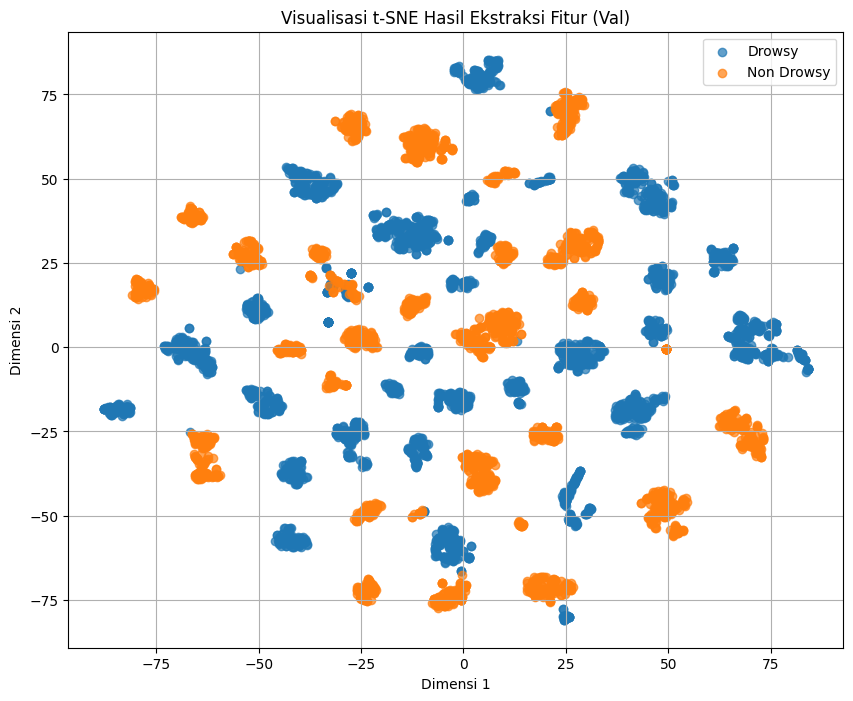

In [ ]:
# Visualisasi menggunakan t-SNE
print("Memulai visualisasi t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
fitur_2d = tsne.fit_transform(fitur_val)

# Plot hasil t-SNE
plt.figure(figsize=(10, 8))
for kategori in ["Drowsy", "Non Drowsy"]:
    idx = np.array(label_val) == kategori
    plt.scatter(fitur_2d[idx, 0], fitur_2d[idx, 1], label=kategori, alpha=0.7)

plt.title("Visualisasi t-SNE Hasil Ekstraksi Fitur (Val)")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.legend(loc="best")
plt.grid(True)
plt.show()